<a href="https://colab.research.google.com/github/newspeedtech/ABC_Reproduction/blob/master/Scalable_ML_HW2_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Scalable Machine Learning: Homework Assignement 2

# Question 1.Cross Validation: Implementation and Use in Model Selection
In this problem we guide you to implement the k-fold cross validation (CV) from scratch. Then, we explore the use of CV in model selection (hyperparameter search).

The code below provides you with the interface to run linear regression. (As you can see, the code solves linear regression using the normal equation. It ensures that there are no colinearity-related issues by using the pseudo-inverse of the data matrix in np.linalg.pinv(X).dot(y)).

In [14]:
import numpy as np
# random data with Gaussian error
np.random.seed(0)
D = 5 # feature dimension
w_ = np.random.normal(size=(D,)) # generate some random underlying parameters
b_ = np.random.normal()
noise_ = np.random.normal(size=(100,))
X = np.random.normal(size=(100,D))
y = X.dot(w_) + b_ + noise_
X = np.concatenate([X**i for i in range(5)],axis=1)

In [15]:
# This is a complete implementation of linear regression
class LR:
    def __init__(self,L2=0,bias=True):
        self.bias = bias
        self.L2 = L2

    def fit(self,X,y):
        if self.bias: X = np.concatenate([X,np.zeros((X.shape[0],1))],axis=1)
        if self.L2 > 0:
            self.w = np.linalg.inv(X.T.dot(X)+self.L2*np.identity(X.shape[1])).dot(X.T.dot(y))
        else:
            self.w = np.linalg.pinv(X).dot(y)
        return self.w

    def predict(self,X):
        if self.bias: X = np.concatenate([X,np.zeros((X.shape[0],1))],axis=1)
        return X.dot(self.w)

We will also use the k-fold CV to look at the variance (uncertainty) of estimated errors, and in particular, its dependence on the size of the training set. (That's because each time we fit a regression model using a new training set, we get a different value of fitted paramerers (w) and also a different error on validation/test data).

<!-- *Report the variance of estimators using the sample size 800 (800 for train, 200 for validation/evaluation).* The pseudo-code below provides guidance on how to approach this problem.  -->

Following are the description and guide for you to implement k-fold cross validation. A detailed explanation of k-fold cross validation is available on [scikit-learn](https://scikit-learn.org/stable/modules/cross_validation.html).
First, study k-fold cross validation on scikit-learn and answer the following questions assuming 10-fold cross validation is used.

1. how much data is used for train and how much is for validation?
2. how many times the model is trained?
3. are the training sets used in different runs(train-validation) disjoint?
4. are the validation sets used in different runs disjoint?

1. 9 folds for training and 1 fold for validating
2. k times - 10
3. Yes the folds are partitions of the dataset so they don't overlap
4. Yes, the validation set is itself a partition of the dataset and is disjoint with the other folds in a run.

In [16]:
# complete the implementation below
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

def cross_validation(lr,X,y,k):
    # k-fold cross validation function
    # input:
    #       model: LR model
    #       X,y: samples,labels
    #       k: parameter k for k-fold cross validation
    # return:
    #       estimated statistics of kfold cross validation
    #       type: dictionary:
    #       {train_err_mean,train_err_std,test_err_mean,test_err_std,model_coe_mean,model_coe_std}

    # step 1, random partition of X,y in to k random disjoint sets with approximately equal size
    # s1,s2,...,sk

    # step 2, repeat the following procedure k times:
    # Train with samples from (k-1) sets
    # Test the trained model on the left set

    # step 3, calculate the statistics and return the dictionary

    # your codes go below
    train_errors = list()
    test_errors = list()
    kfold = KFold(n_splits=10, shuffle=True, random_state=10)

    for train_idx, test_idx in kfold.split(X):
      #print("Train: ", train_idx, "Test: ", test_idx)
      X_train, X_test = X[train_idx], X[test_idx]
      Y_train, Y_test = y[train_idx], X[test_idx]

      #print("### TRAIN SHAPE ###")
      #print(X_train.shape)
      ##print(Y_train.shape)

      w = lr.fit(X_train,Y_train)
      y_pred = lr.predict(X_train)
      #print(y_pred.shape)
      #print("w:", w)
      #print("y_pred:", y_pred)
      train_errors.append(np.mean((y_pred - Y_train)**2))
      #print("train errors: ", train_errors)
      model_coe_mean = np.mean(w)
      #print("model_coe_mean : ",model_coe_mean)

      model_coe_std = np.std(w)
      #print("model_coe_std: ",model_coe_std)

      #print("### TEST SHAPE ###")
      #print(X_test.shape)
      #print(Y_test.shape)

      lr.fit(X_test,Y_test)
      y_pred = lr.predict(X_test)
      test_errors.append(np.mean((lr.predict(X_test) - Y_test)**2))
      #print("test errors: ", test_errors)
      #print("mean sqr err: ",metrics.mean_squared_error(Y_test, y_pred))


      #print(np.mean(X_train), np.mean(X_test),'\n')
      #print(np.mean(Y_train), np.mean(Y_test),'\n')

    train_err_mean = np.mean(train_errors)
    train_err_std = np.std(train_errors)
    test_err_mean = np.mean(test_errors)
    test_err_std = np.std(test_errors)
    stats = {'train_err_mean': train_err_mean, 'train_err_std': train_err_std, 'test_err_mean': test_err_mean, 'test_err_std': test_err_std,
          'model_coe_mean': model_coe_mean, 'model_coe_std': model_coe_std
            }
    return stats

lr = LR()
values = cross_validation(lr, X, y, 10)
print(values)


{'train_err_mean': 0.8086383324913561, 'train_err_std': 0.046734695943633796, 'test_err_mean': 1.3785153847549353e-29, 'test_err_std': 9.093128930924535e-30, 'model_coe_mean': 0.2272548716084901, 'model_coe_std': 0.6597820598250582}


Then, follow the comments to implement the function ``cross_validation``.
Next, use the function to perform 10-fold and 5-fold cross validation.
Report the mean and variance of estimated validation errors for both.

Now, use a 5-fold cross-validation to search for the best hyperparameters. In this case, this is the coefficient of L2 regularization that gives the lowest validation error. What is the corresponding L2 regularization coefficient and validation error?

In [17]:
# your codes go below
lr = LR()
values = cross_validation(lr, X, y, 5)
print(values)


{'train_err_mean': 0.8086383324913561, 'train_err_std': 0.046734695943633796, 'test_err_mean': 1.3785153847549353e-29, 'test_err_std': 9.093128930924535e-30, 'model_coe_mean': 0.2272548716084901, 'model_coe_std': 0.6597820598250582}


# Question 2. Linear Regression with Regularization
In this problem we explore the use of regularization as a way to fit models with low test (generalization) error. Sklearn provides an off-the-shelf implementation, known as Elastic Net, of linear regression that permits flexible use, and even combining, both L1- and L2-regularizations. Start by familiarizing yourself with the methods [Elastic Net](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html). As you can see, if you set l1_ratio=1, the regularization reduces to L1, and if you set l1_ratio=0, the regularization is of L2 type.

Use the starter code below. In working on this problem notice that Elastic Net method defines the score to be the R2 coefficient that we used in HW1.

``extended`` is a flag that controls whether higher order terms of raw features are inclueded in model training. With it set to be True, overfitting phenomenon can be more easily observed and it helps illustrate the impact of regularization.

Set ``extended`` to be True. Answer each question separately for L1- and L2-regularization.
1. What are the train/test errors and R2 coefficients when not using regularization?
2. How do train/test errors and R2 coefficients evolve as you increase the strength of regularization?
3. What is the best test error and R2 coefficient you can get with regularization?
4. Apply only L1 regularization, plot how the parameters evolve as you increase the regularization coefficient (alpha).
5. Repeat above for L2 regularization.
6. Differences in the impact of L1 and L2 regularization: can you notice any difference between the impact of L1 and L2 regularization?

In [18]:
np.random.seed(0)
D = 5 # feature dimension
extended = True

# random dataset
w1_ = np.random.normal(size=(D,))
b1_ = np.random.normal()
noise1_ = np.random.normal(size=(50,))
X1 = np.random.normal(size=(50,D))
y1 = X1.dot(w1_) + b1_ + noise1_

if extended: X1 = np.concatenate([X1**i for i in range(4)],axis=1)
X1_train,y1_train = X1[:30],y1[:30]
X1_test,y1_test = X1[30:],y1[30:]

In [19]:
from sklearn.linear_model import ElasticNet

In [20]:
# your code goes below

#With Lasso
model = ElasticNet(alpha=1, l1_ratio = 1)
model.fit(X1_train, y1_train)
print(model.score(X1_train, y1_train))
print(model.score(X1_test, y1_test))

pred = model.predict(X1_train)
print(pred)

#With Ridge
model2 = ElasticNet(alpha=1, l1_ratio = .000000001)
model2.fit(X1_train, y1_train)
print(model2.score(X1_train, y1_train))
print(model2.score(X1_test, y1_test))
pred2 = model2.predict(X1_test)
print(pred2)


alphas = np.logspace(-5, 1, 60)
enet = linear_model.ElasticNet(max_iter=10000)
train_errors = list()
test_errors = list()
for alpha in alphas:
    enet.set_params(alpha=alpha)
    enet.fit(X1_train,y1_train)
    train_errors.append(enet.score(X1_train, y1_train))
    test_errors.append(enet.score(X1_test, y1_test))

print("Train Error: ",np.mean(train_errors))
print("Test Error: ",np.mean(test_errors))

import matplotlib.pyplot as plt

0.7070942852662061
0.6442509499070135
[-1.17910252 -2.42675511 -2.38699335 -1.59946087 -2.08704704  4.03027213
 -0.14330604  0.23567608  3.13896935  2.11820642  6.6228211   1.65608414
 -0.11918666 -0.86045501 -1.08201342 -0.7867828  -3.44987795  6.38948
 -1.86616357  0.51021991 -0.95167974  1.04920505 -0.28303141 -1.32402864
 -1.13396705 -7.29958998 -0.96699897 -1.28252713  3.30928622 -3.23096162]
0.8356728918794196
0.6148616079241247
[ -0.32273952  -1.82671591   2.07073513  -3.05842988  -3.04080662
  -1.6866763    0.38384349  -4.27058491  -1.53681665  -0.50666707
  -3.66512009  -4.72247261  -0.57282659 -11.85107467   1.96566954
   1.62514601  -0.69875909  -0.76127813  -2.36348537   0.94208017]
Train Error:  0.8813229664865252
Test Error:  0.5154279753034919


# Question 3: Multiclass Logistic (Softmax) Regression using Pytorch

Pytorch is an open-source  framework for deep learning. In this problem, we Pytorch to implement the multiclass logistic regression.
<!--
On your local machine, please set up Pytorch in your Python environment by following [this guide](https://pytorch.org/get-started/locally/). If your machine has a CUDA-supported GPU, we recommend that you install the CUDA-supported version of Pytorch (by checking the "Compute Platform" tab in the "start locally" page).   -->

On colab, the PyTorch environment is already installed for you.

In [21]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import pandas as pd
import matplotlib.pyplot as plt
import torchvision


Recall that unlike linear regression, logistic regression does not have a closed-form solution, and therefore, we must use gradient-based optimizer, such as SGD, to learn the parameters of the model. We define the following hyperparameters for SGD.

In [22]:
torch.manual_seed(0)
# Hyper-parameters
num_epochs = 10
batch_size = 512
learning_rate = 1

We will use the MNIST dataset, which contains images of size 28 x 28, representing handwritten digits from 0 to 9. The following code implements data loading:

In [23]:
input_size = 784 # 28 x 28, flatten out
num_classes = 10 # 0-9, 10 different label classes
# MNIST Dataset (Images and Labels)
train_dataset = dsets.MNIST(root ='./data',download=True,transform = transforms.ToTensor())
test_dataset = dsets.MNIST(root ='./data',download=True,transform = transforms.ToTensor())
# Dataset Loader (Input Pipeline)
#train_loader = torch.utils.data.DataLoader(dataset = train_dataset,batch_size = batch_size,shuffle = True)
#test_loader = torch.utils.data.DataLoader(dataset = test_dataset,batch_size = batch_size,shuffle = False)
#train_loader.num_workers = 4 # how many threads for loader
#test_loader.num_workers = 4

train_loader = torch.utils.data.DataLoader(dataset =
train_dataset,batch_size = batch_size,shuffle = True, num_workers=2)

test_loader = torch.utils.data.DataLoader(dataset = test_dataset,batch_size
= batch_size,shuffle = False, num_workers=2)

Recall that logistic regression can be considered the simplest neural network. Therefore, to define the logistic regression model, we use a layer that is treated as a neural net in PyTorch. This is done using a class that inherits from nn.Module. We define the layers of the network in the __init__ function and specify how data passes through the network in the forward function. In logistic regression, only a linear layer ``nn.Linear`` is needed. (See more documentation on how to use ``nn.Linear`` [here](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html).)

**GPU acceleration in PyTorch.** To speedup neural network training and inference, we can use GPUs, if they are available. See the code below. When ``cuda_available`` is ``True``, computation will be done on a GPU instead of a CPU. Note that GPU-based training  is faster when the models are large. However, when a model is small and not computationally expensive, moving computation to the GPU may not be beneficial. To force computation to be on the CPU, set ``cuda_available`` to ``False``. To use GPUs on Colab, under the "Runtime" tab, go to "Change tuntime type", and select "GPU" as the hardware instance.


In [24]:
# Model
class LogisticRegression(nn.Module):
    def __init__(self, input_size, num_classes):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, x):
        out = self.linear(x)
        return out

model = LogisticRegression(input_size, num_classes)

cuda_available = torch.cuda.is_available()
if cuda_available:  model.cuda()

The next step of the PyTorch flow, after declaring the model, is to define the loss function and the optimization algorithm (aka the optimizer) to train the model.

To train logistic regression, we use the Cross-Entropy Loss. In PyTorch, it is implemented as ``nn.CrossEntropyLoss`` (refer to [document](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html) for details. Note that the softmax is embedded into this function).

In the example below, we use the SGD optimizer. (There are several other popular optimizers for DNNs, including Adam, Adagrad, and RMSprop. Refer to [this site](https://pytorch.org/docs/stable/optim.html) to see the  choices available in Pytorch and how to use them).

In [25]:
# Loss and Optimizer
# Softmax is internally computed.
# Set parameters to be updated.
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

#optimizer = torch.optim.SGD(model.parameters(), lr=0.01, weight_decay=0.01)  # L2 regularization


The code below contains the main training loop. In each loop iteration, the loss on a minibatch of data is computed, and the batch gradient is calculated by PyTorch's auto differentiation engine via ``loss.backward()``. Before updating the parameters, we need to clear the cached gradient values by calling ``optimizer.zero_grad()``. The model parameters are updated using ``optimizer.step()``, that performs one step of gradient-based optimization.

tot loss:  0.6470468044281006
tot loss:  1.2923958897590637
tot loss:  1.923292875289917
tot loss:  2.5816463828086853
tot loss:  3.2576067447662354
tot loss:  3.902353048324585
tot loss:  4.515370965003967
tot loss:  5.192559659481049
tot loss:  5.872372210025787
tot loss:  6.591141998767853
tot loss:  7.355138659477234
tot loss:  8.142433881759644
tot loss:  8.775891959667206
tot loss:  9.418727815151215
tot loss:  10.019222676753998
tot loss:  10.618955433368683
tot loss:  11.227919161319733
tot loss:  11.897076308727264
tot loss:  12.516779363155365
tot loss:  13.165849924087524
tot loss:  13.819994568824768
tot loss:  14.519985854625702
tot loss:  15.157022655010223
tot loss:  15.789773404598236
tot loss:  16.449407696723938
tot loss:  17.121581256389618
tot loss:  17.90454602241516
tot loss:  18.511919856071472
tot loss:  19.12617129087448
tot loss:  19.742673933506012
tot loss:  20.355633974075317
tot loss:  21.01835036277771
tot loss:  21.726509392261505
tot loss:  22.343183338

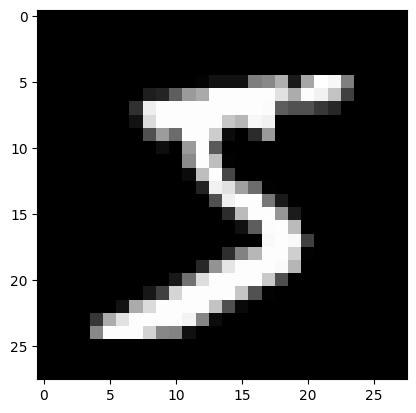

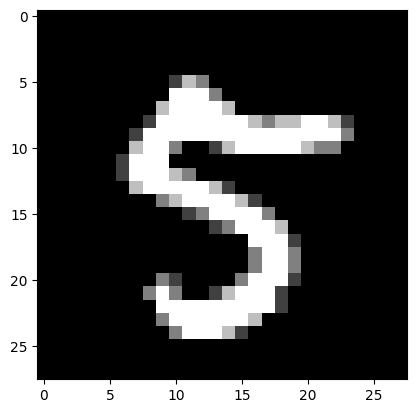

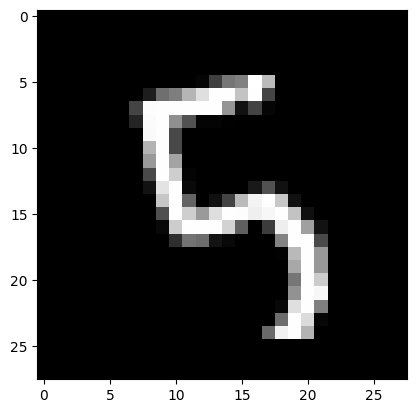

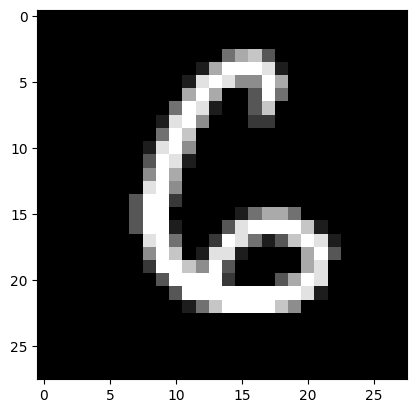

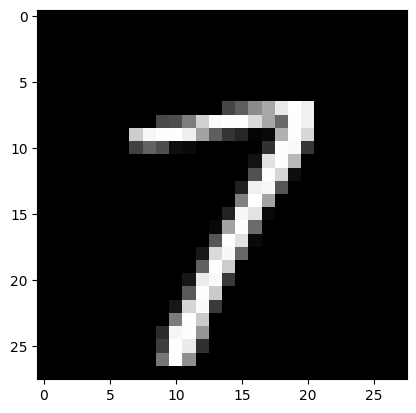

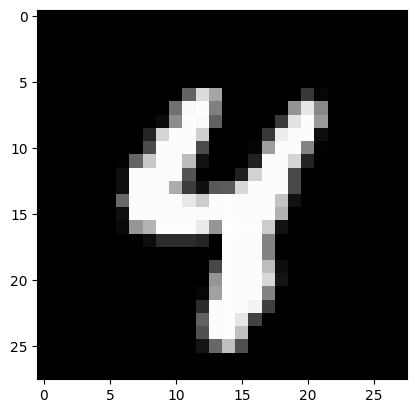

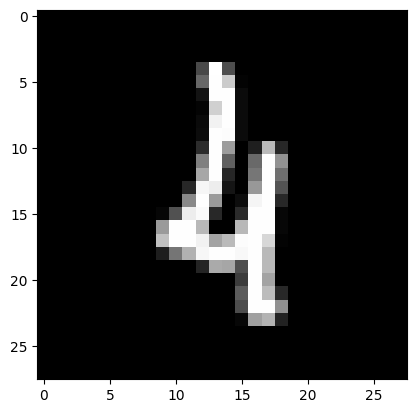

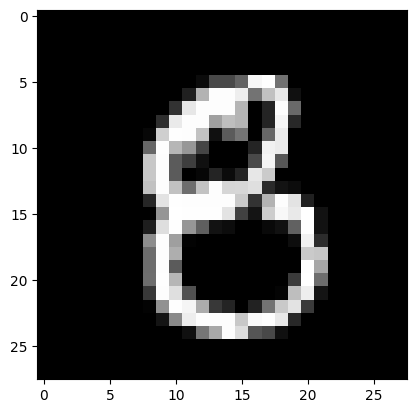

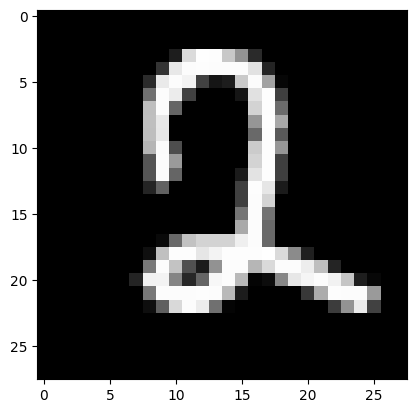

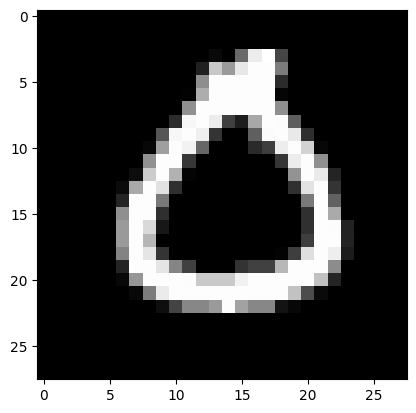

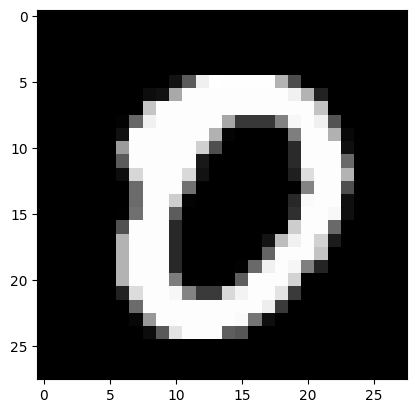

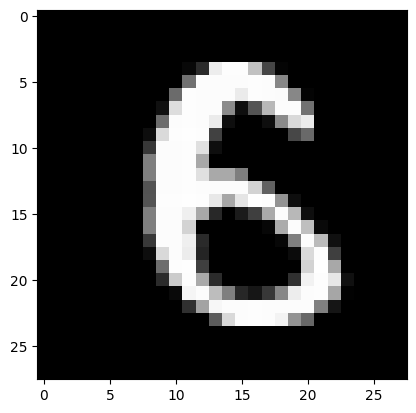

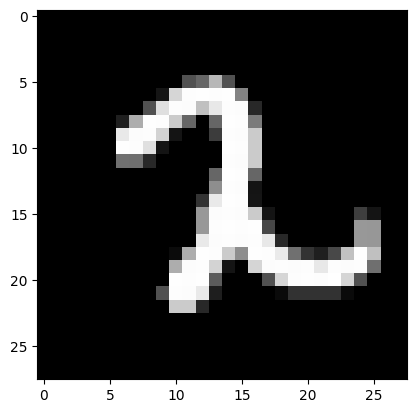

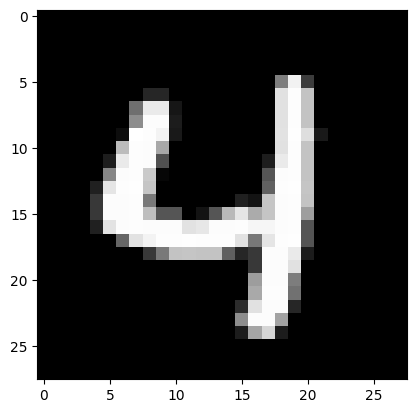

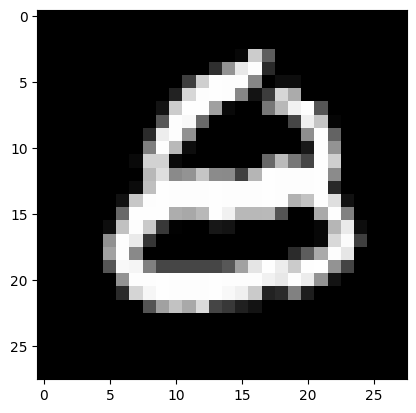

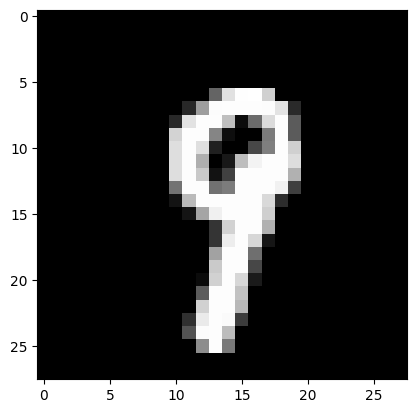

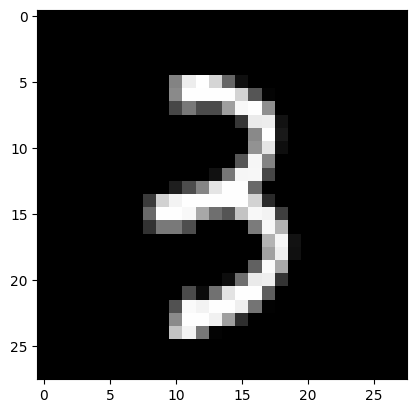

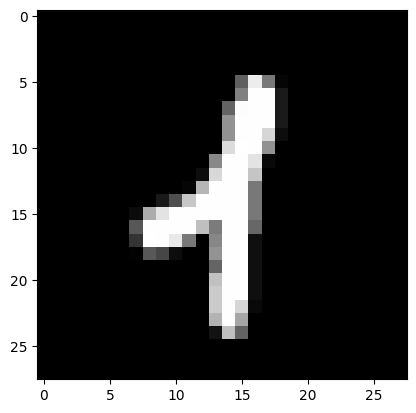

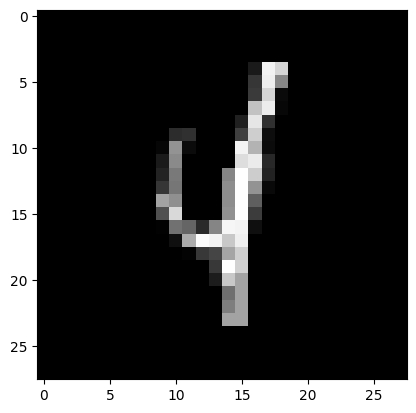

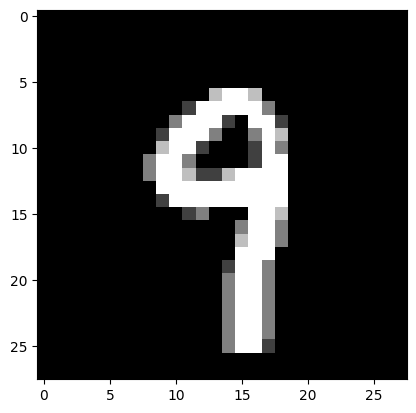

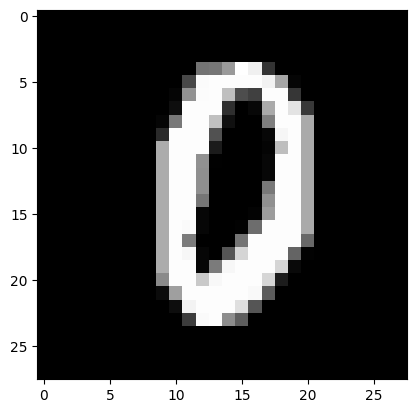

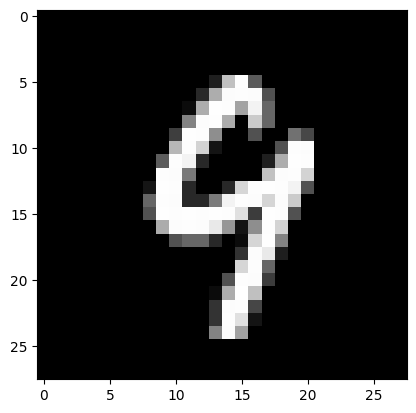

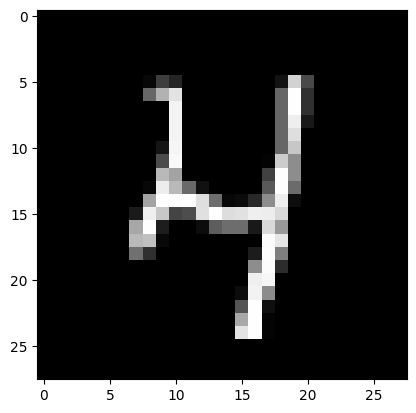

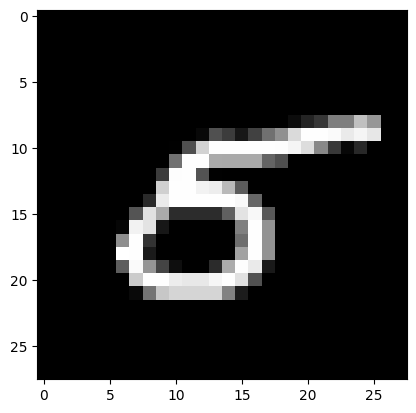

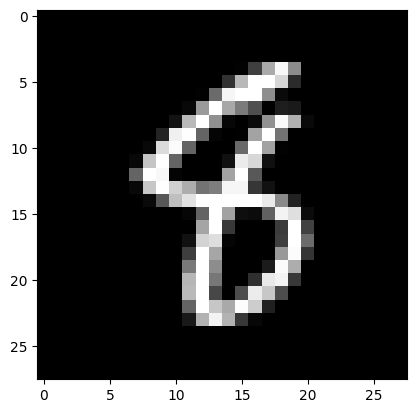

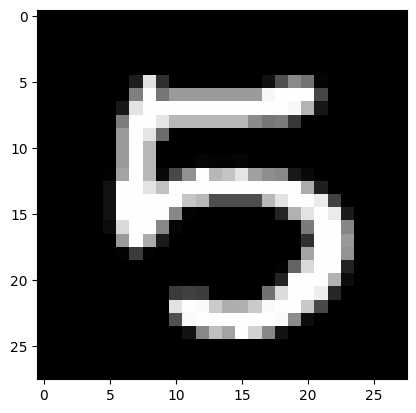

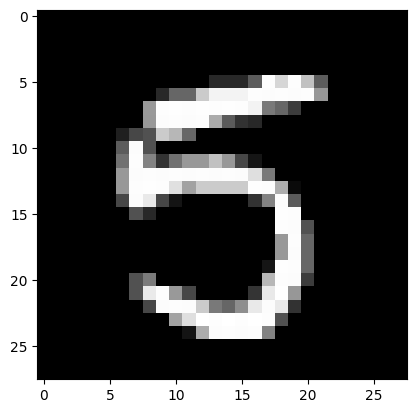

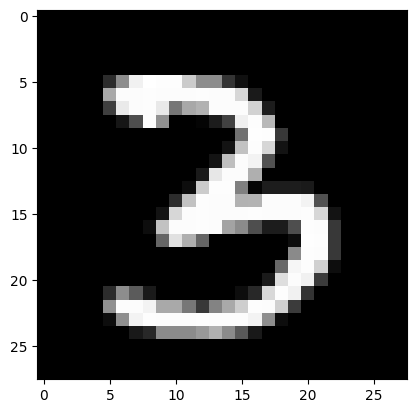

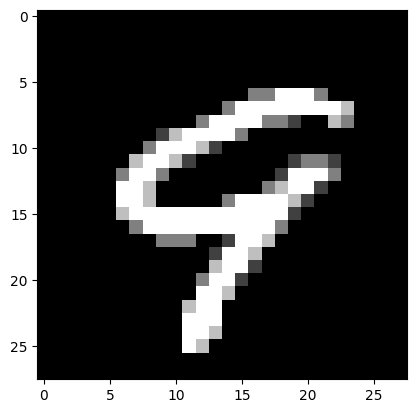

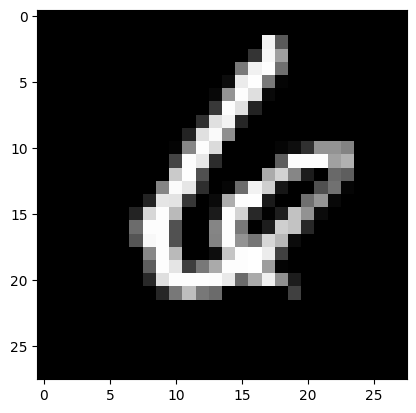

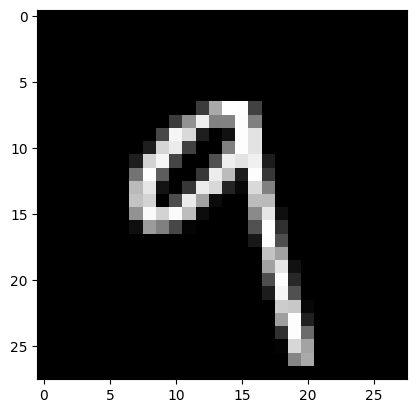

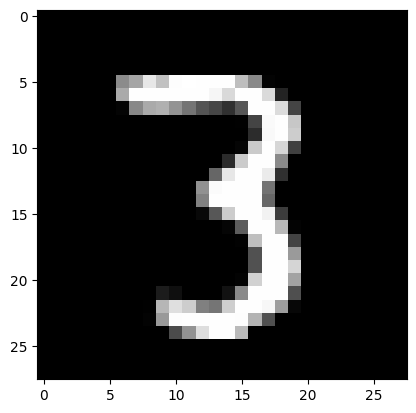

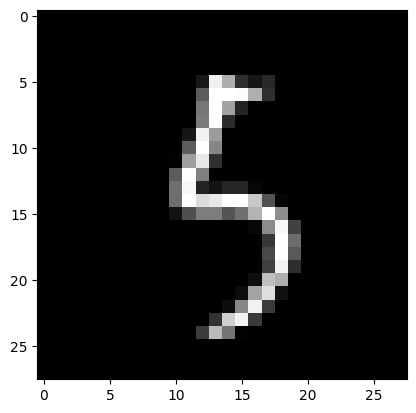

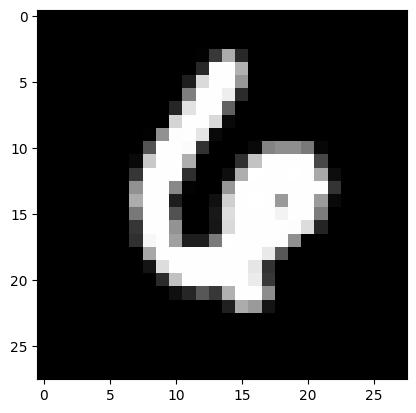

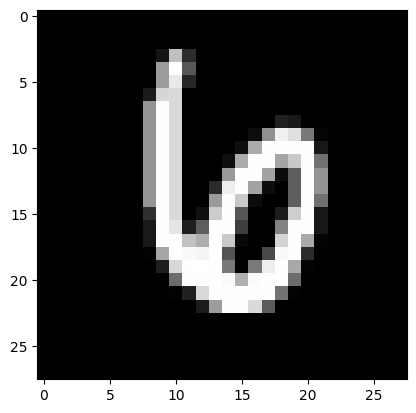

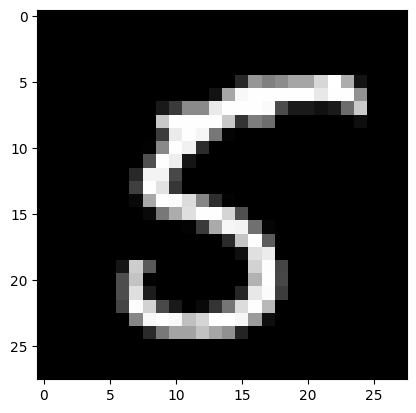

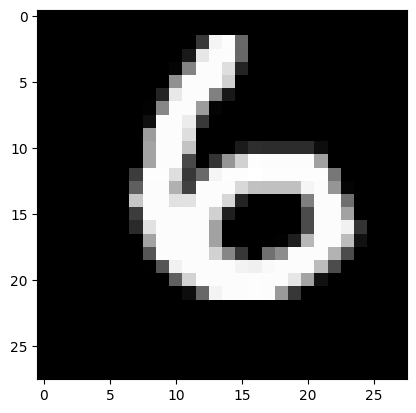

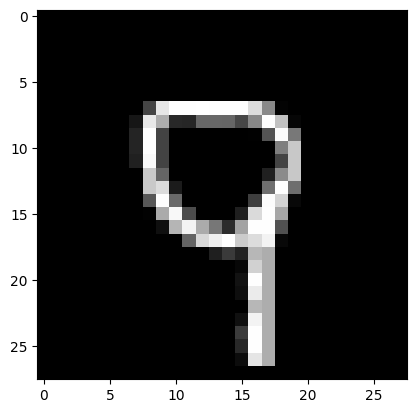

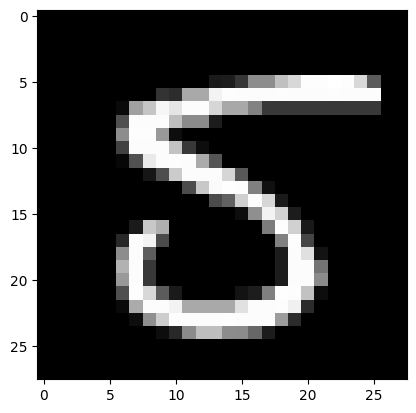

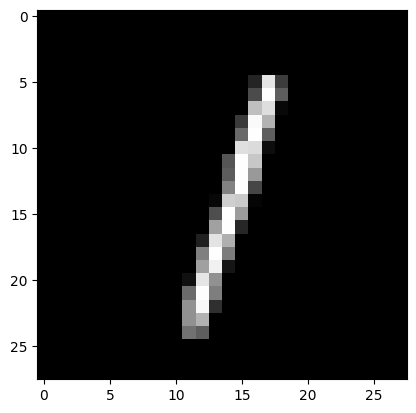

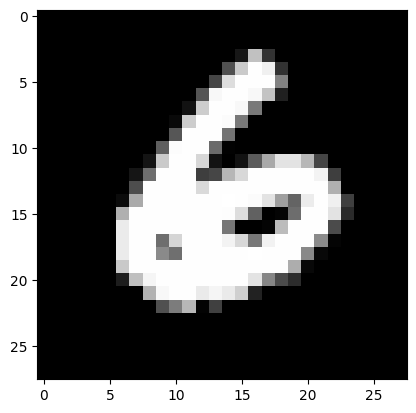

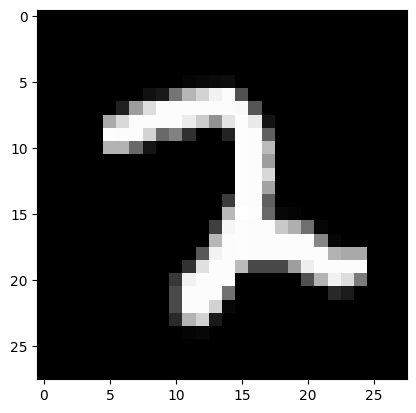

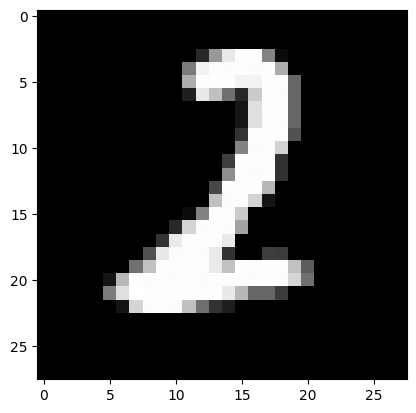

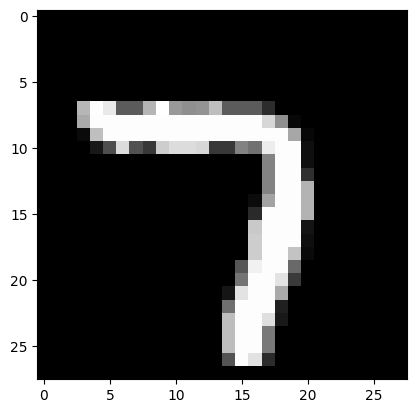

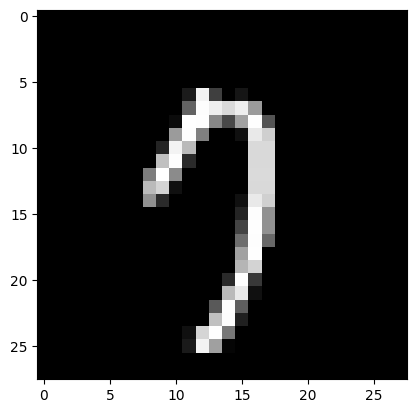

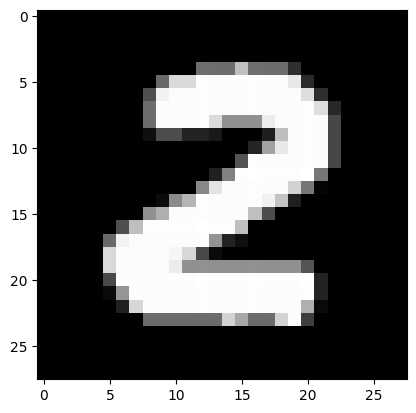

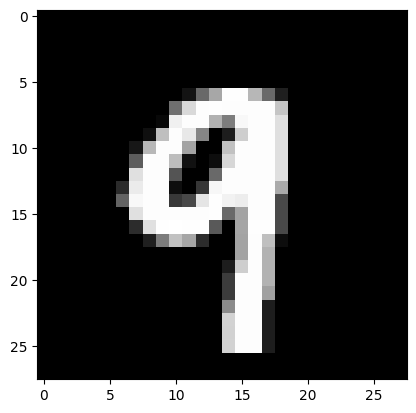

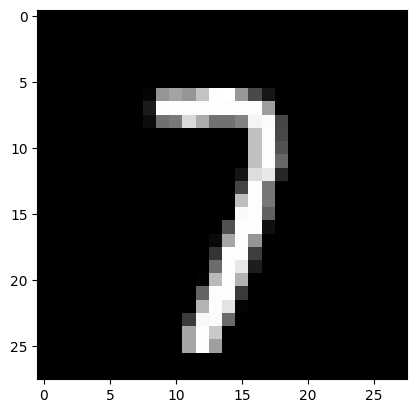

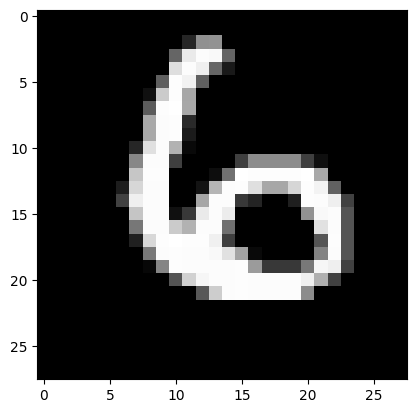

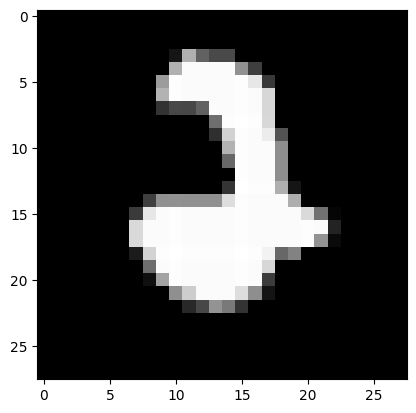

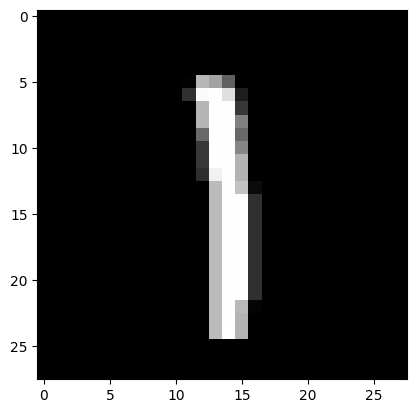

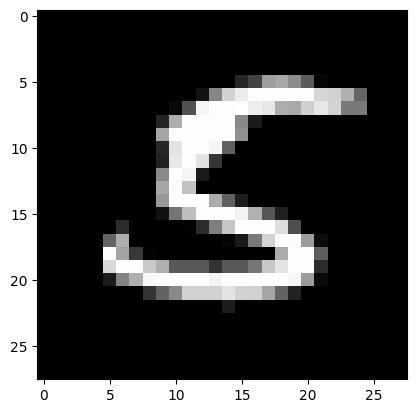

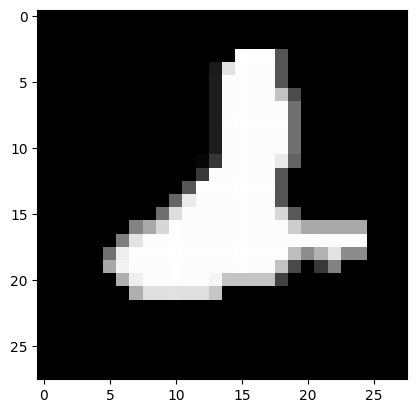

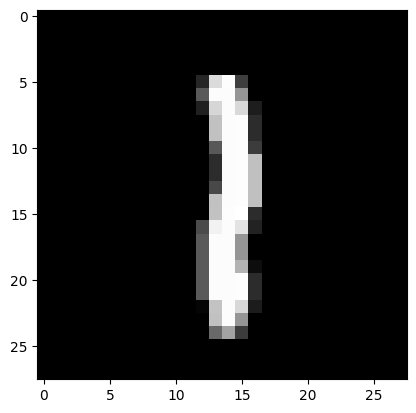

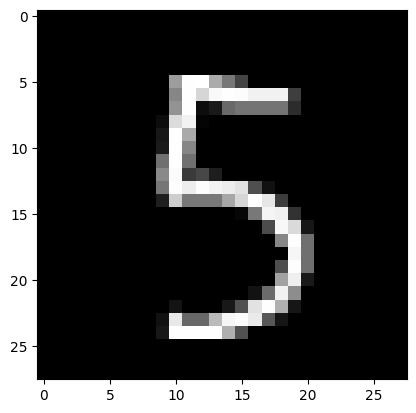

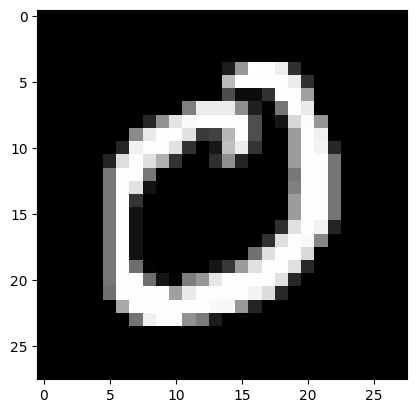

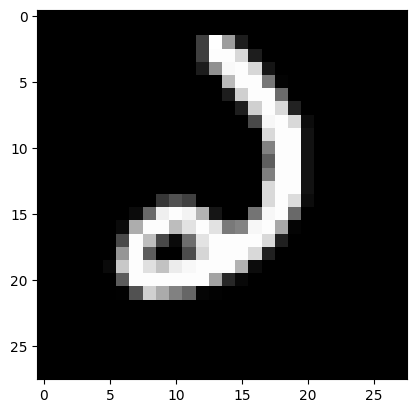

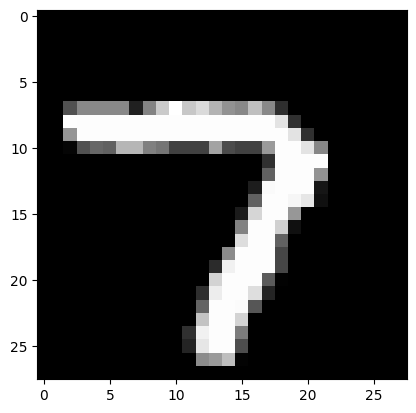

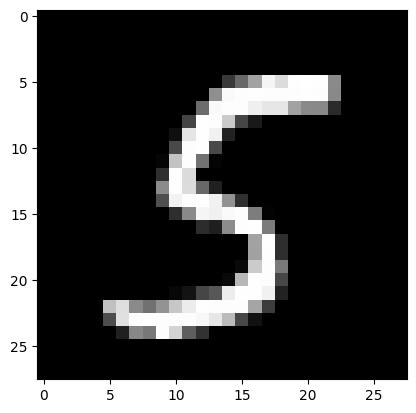

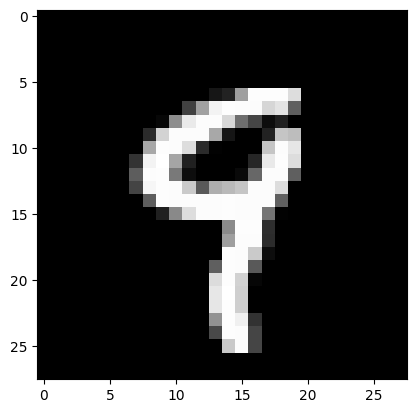

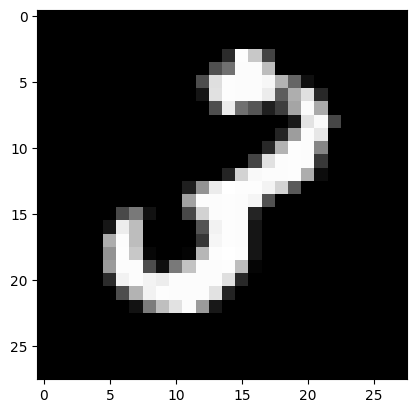

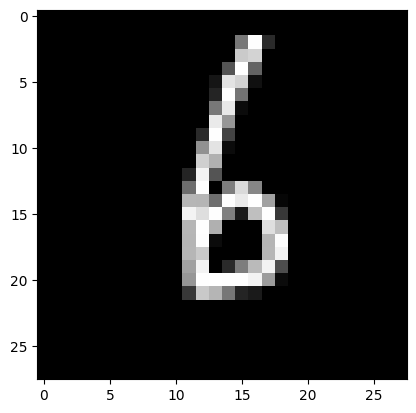

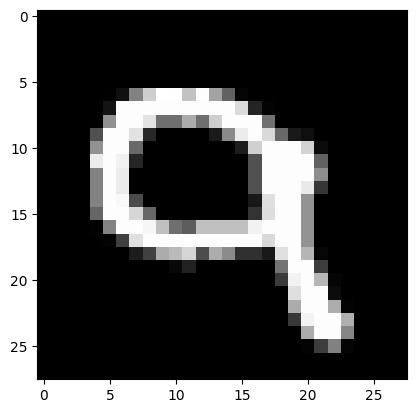

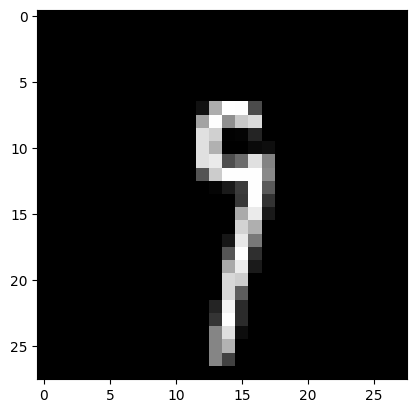

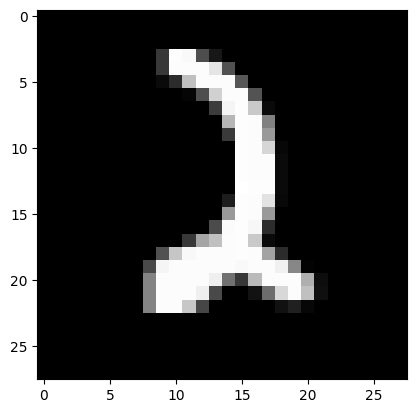

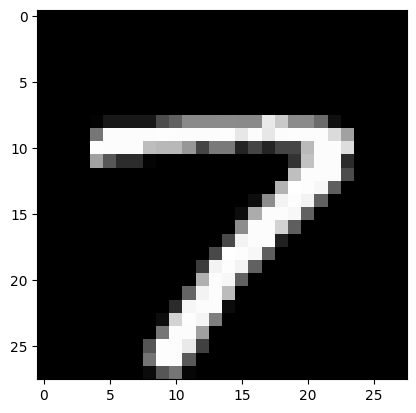

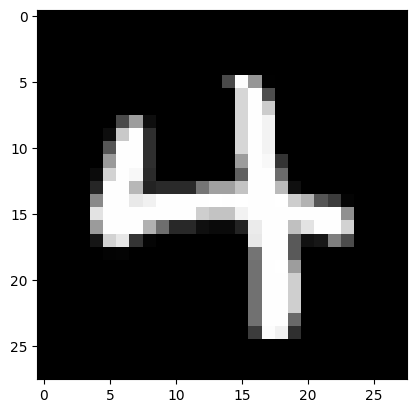

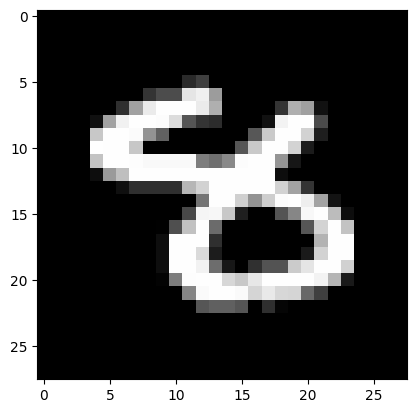

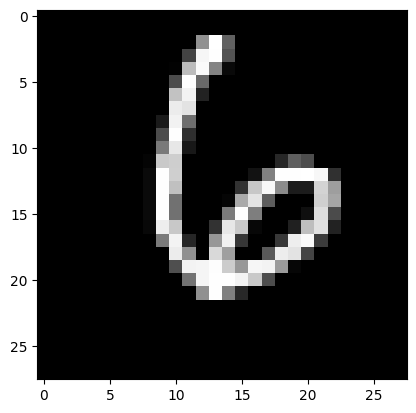

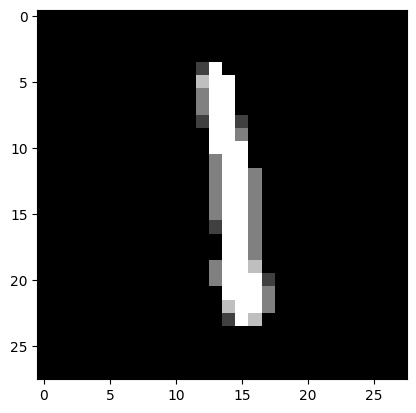

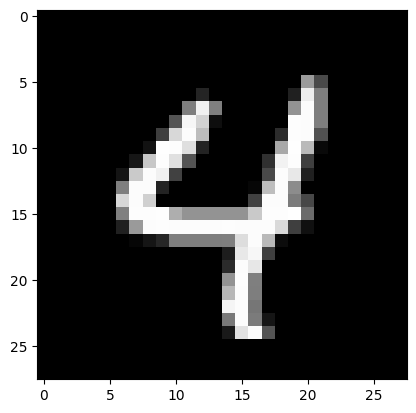

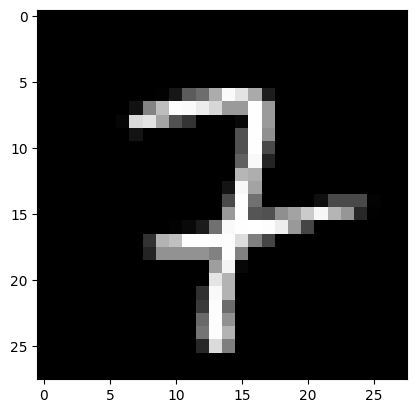

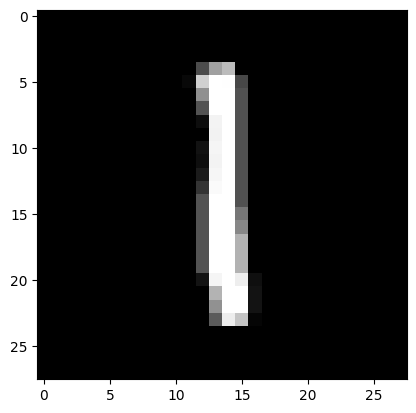

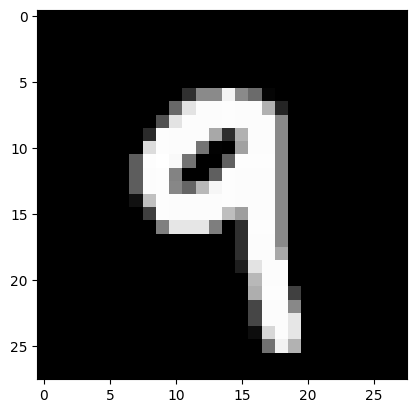

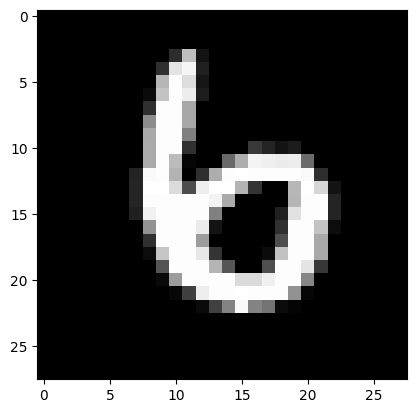

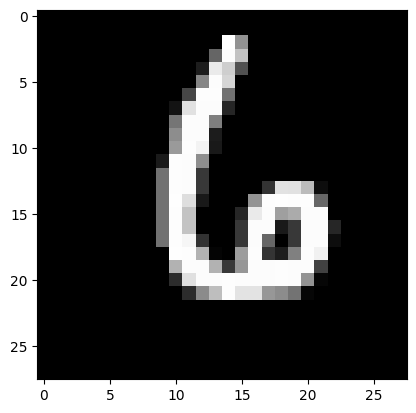

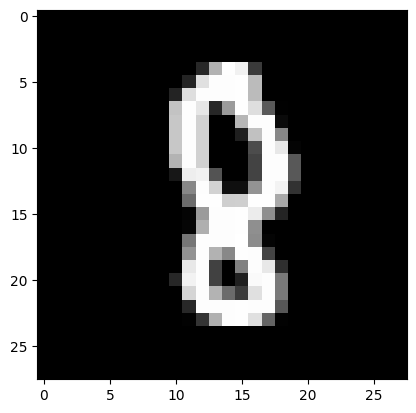

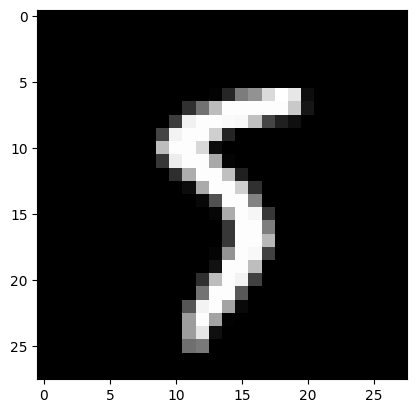

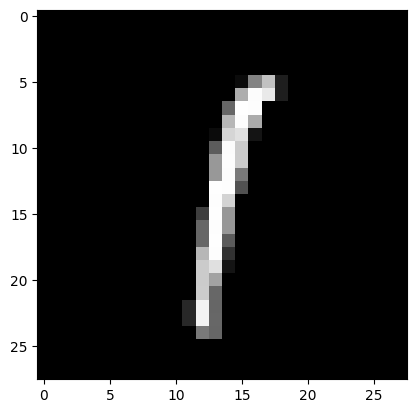

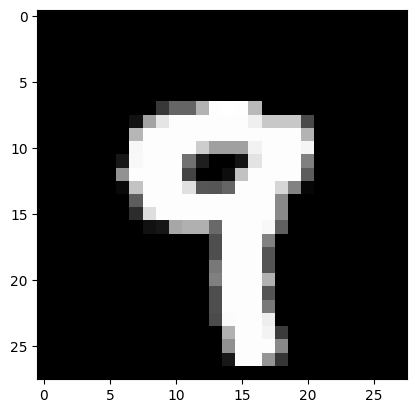

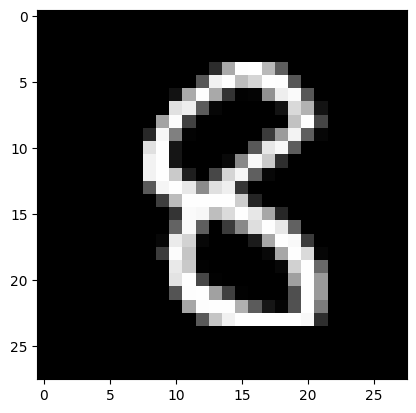

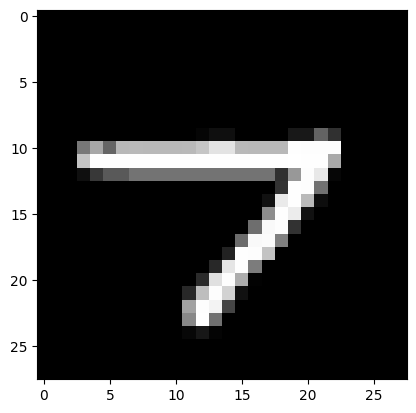

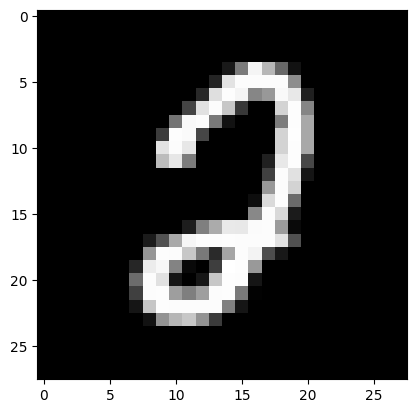

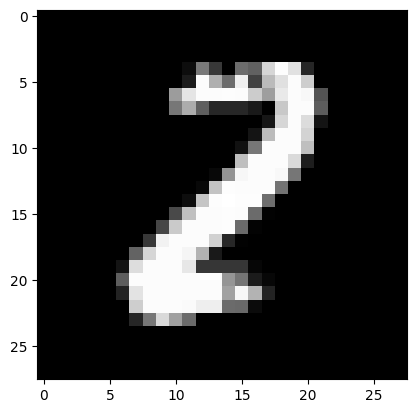

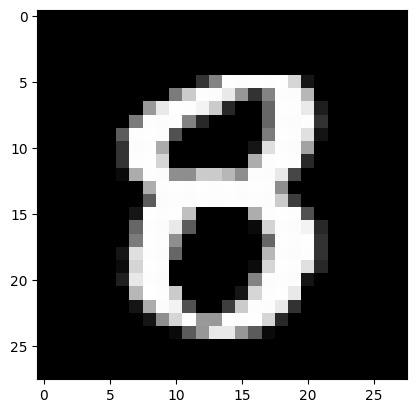

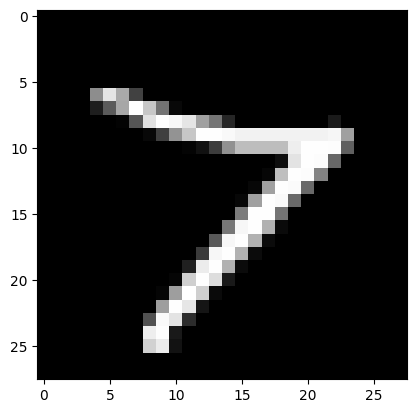

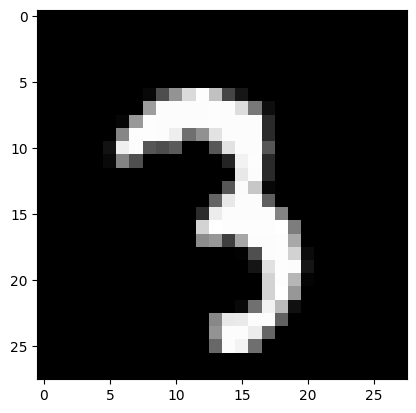

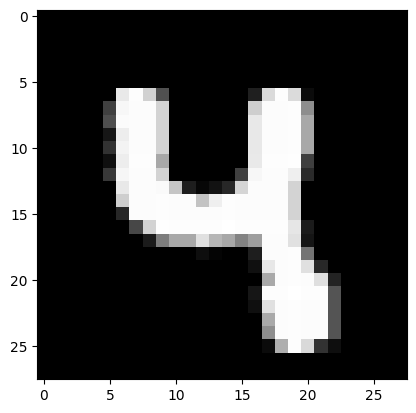

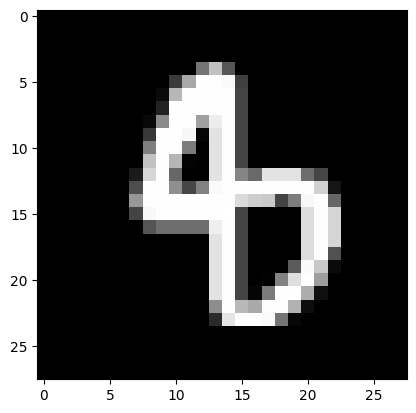

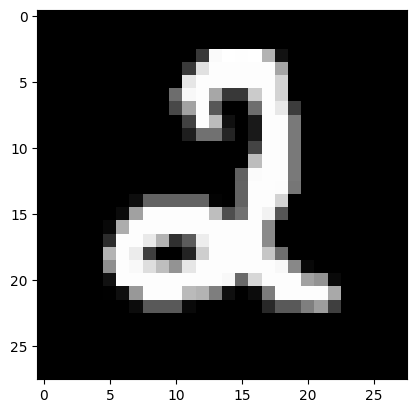

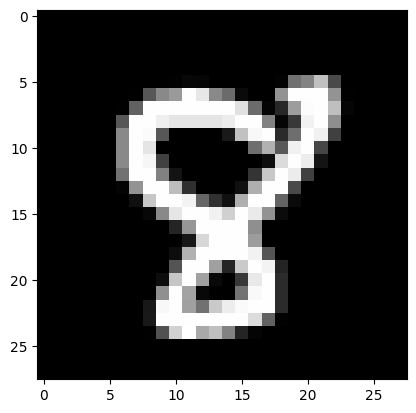

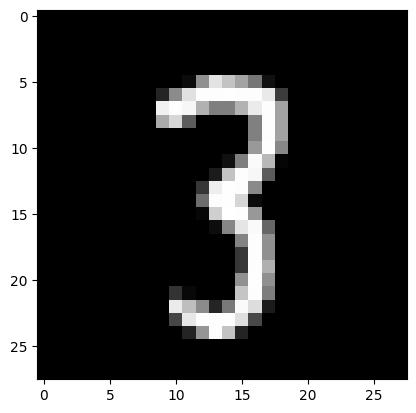

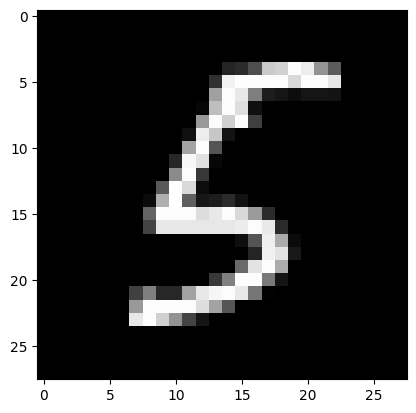

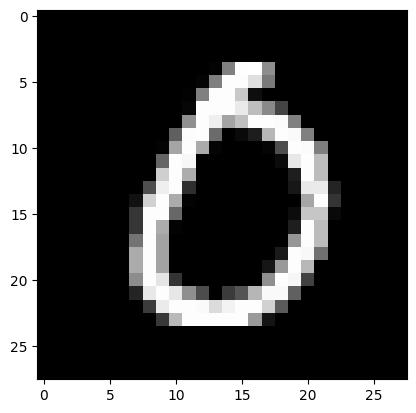

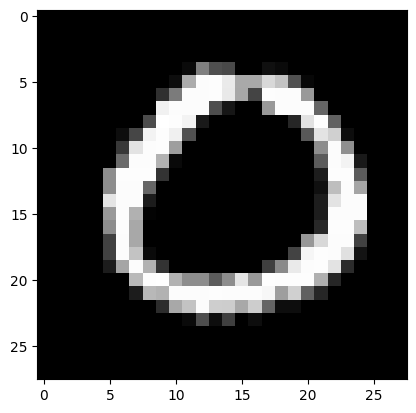

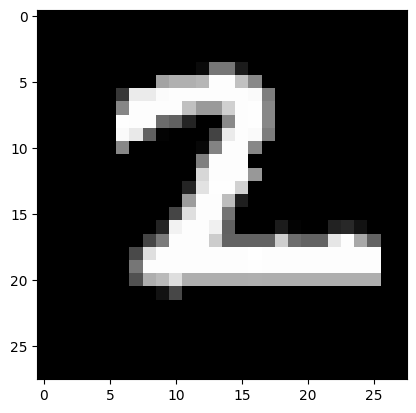

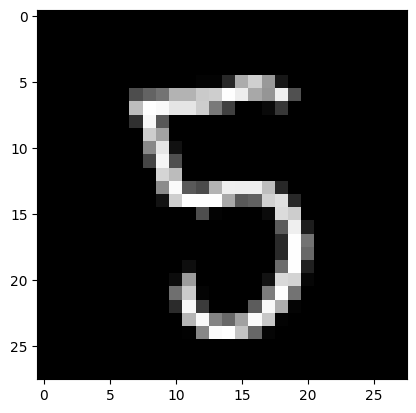

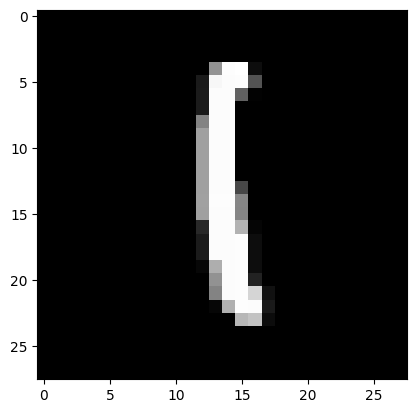

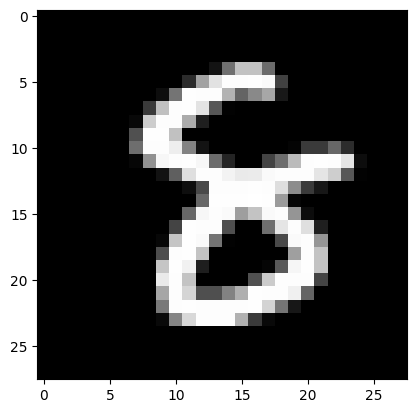

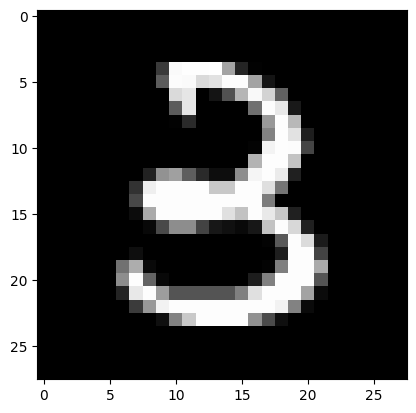

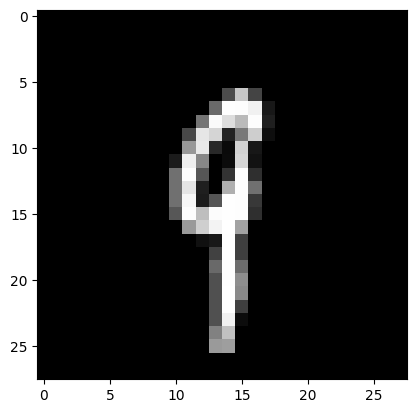

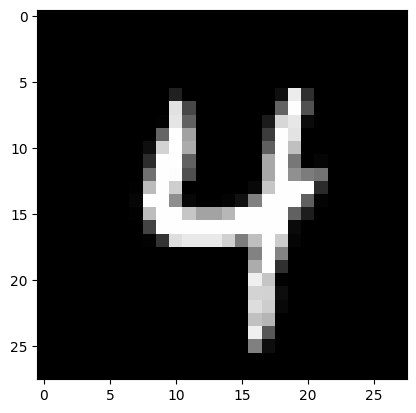

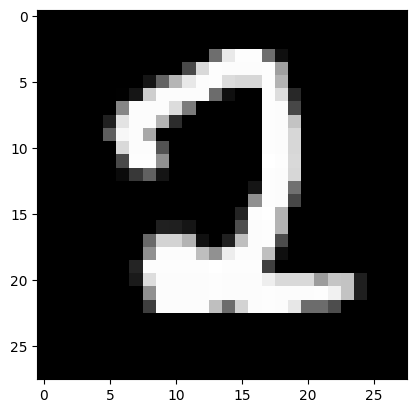

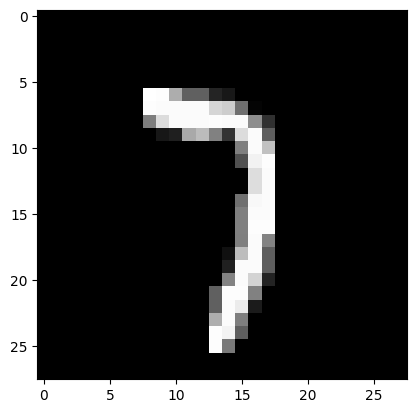

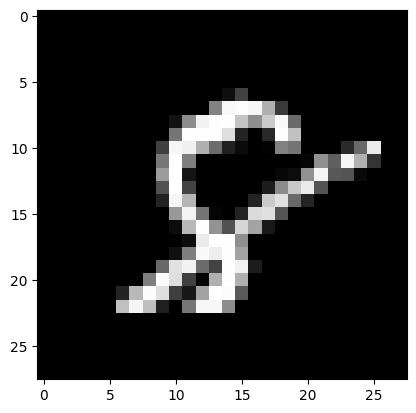

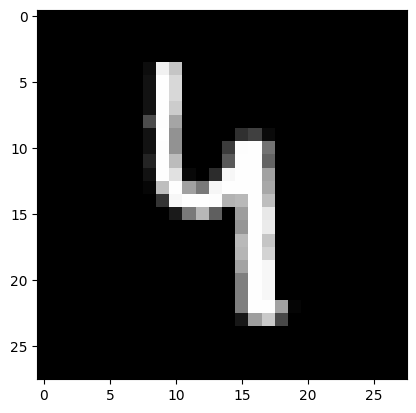

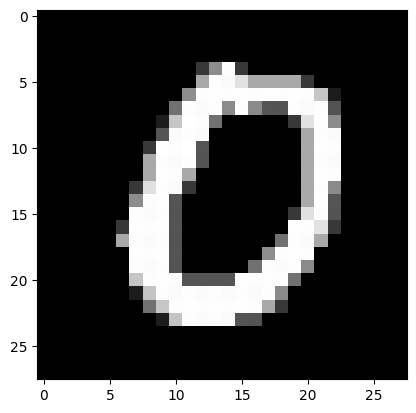

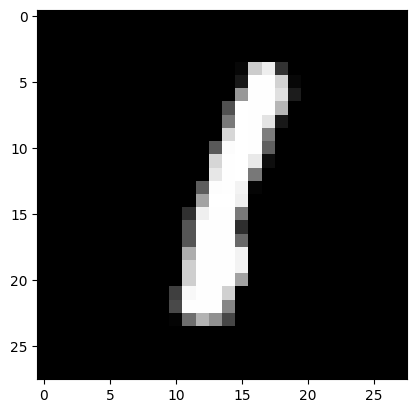

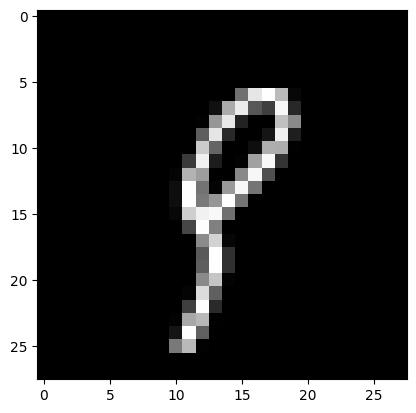

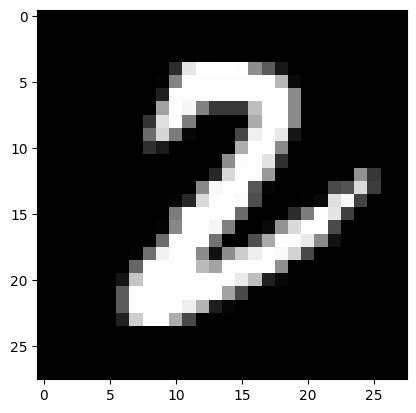

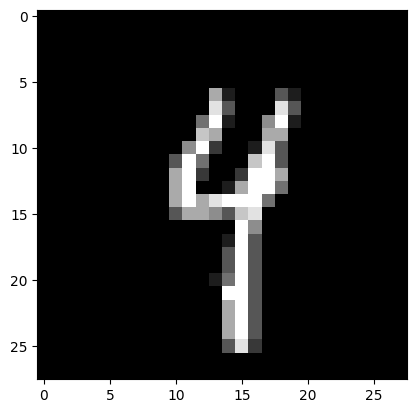

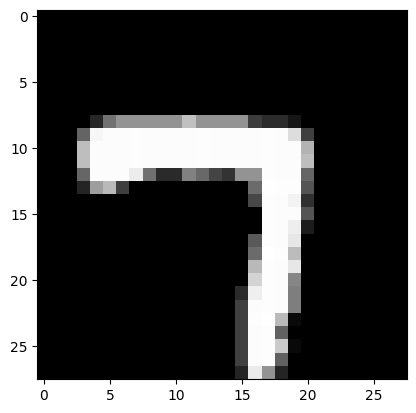

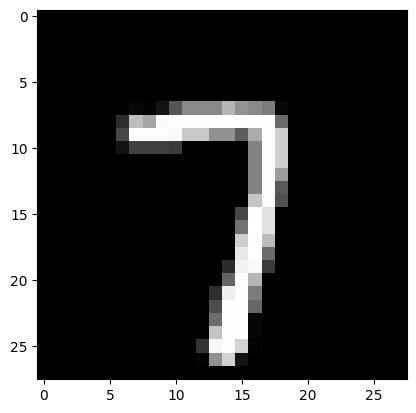

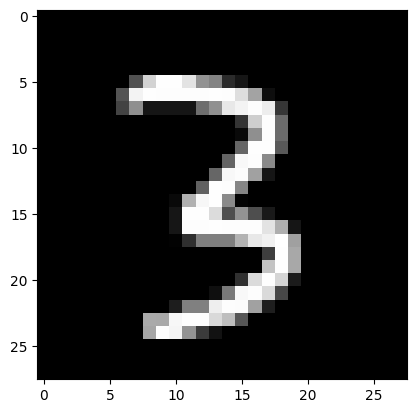

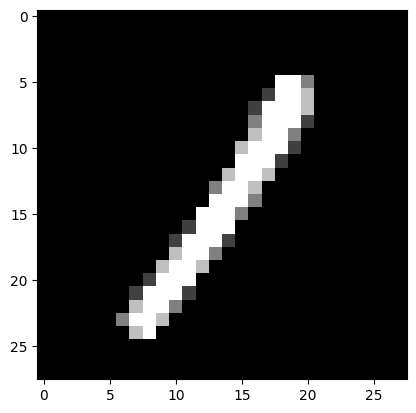

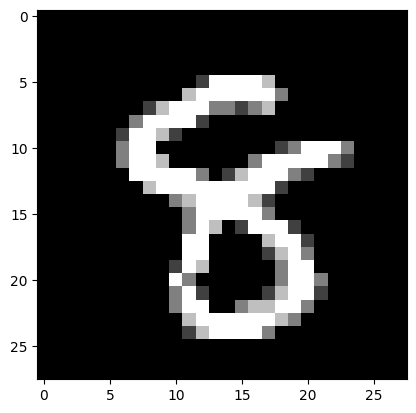

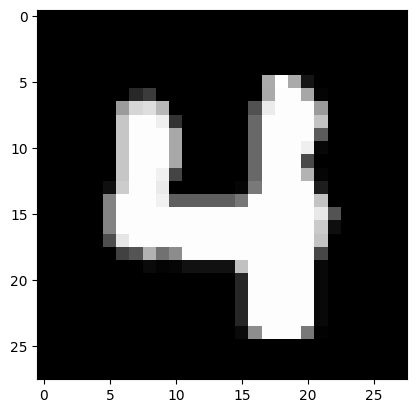

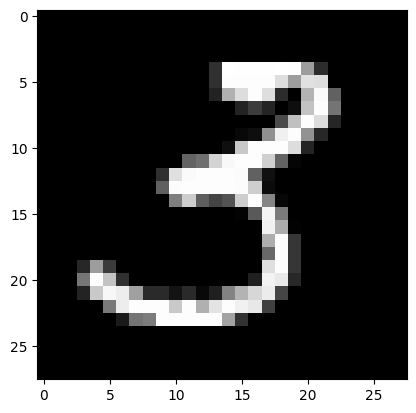

Accuracy of the model on test: 87.29 %
tot loss:  0.6994764804840088
tot loss:  1.3499116897583008
tot loss:  2.0427934527397156
tot loss:  2.7408222556114197
tot loss:  3.331209897994995
tot loss:  3.919913172721863
tot loss:  4.555320143699646
tot loss:  5.200813591480255
tot loss:  5.856161177158356
tot loss:  6.560693860054016
tot loss:  7.179878413677216
tot loss:  7.853815138339996
tot loss:  8.511192381381989
tot loss:  9.15651947259903
tot loss:  9.795872628688812
tot loss:  10.443781435489655
tot loss:  11.10741537809372
tot loss:  11.719416081905365
tot loss:  12.34662914276123
tot loss:  12.982425808906555
tot loss:  13.631863951683044
tot loss:  14.265045285224915
tot loss:  14.925169050693512
tot loss:  15.530006289482117
tot loss:  16.10748428106308
tot loss:  16.743510246276855
tot loss:  17.388337790966034
tot loss:  17.98618060350418
tot loss:  18.570264041423798
tot loss:  19.17695665359497
tot loss:  19.82407659292221
tot loss:  20.438299596309662
tot loss:  21.01116

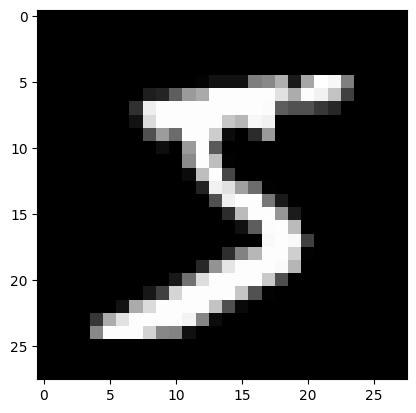

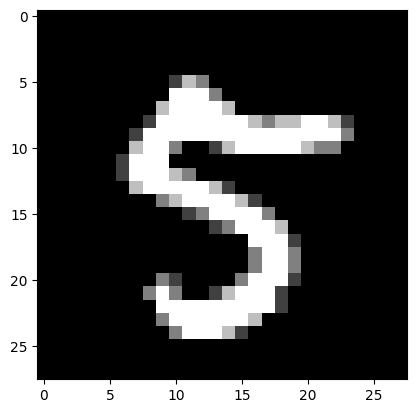

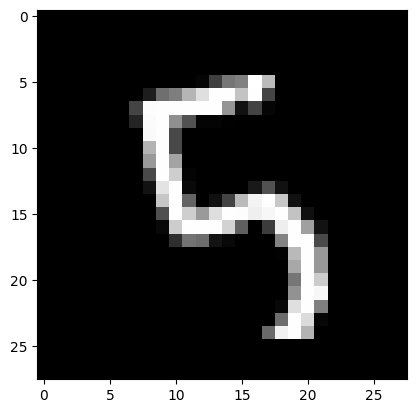

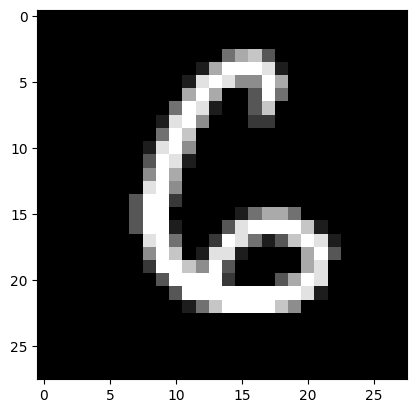

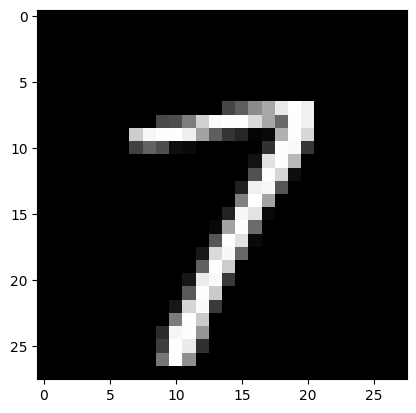

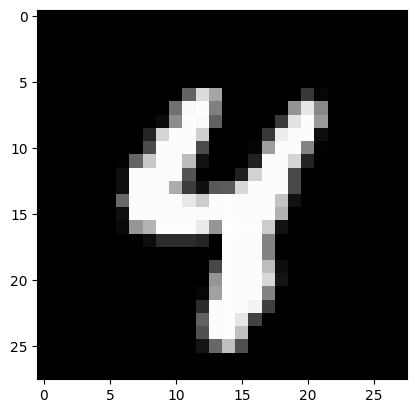

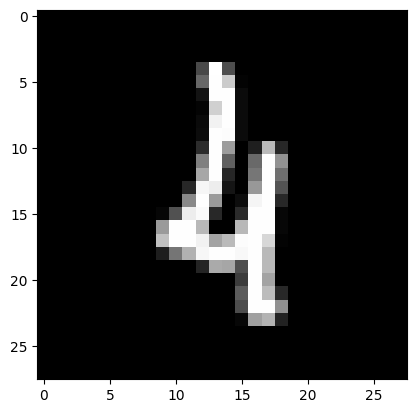

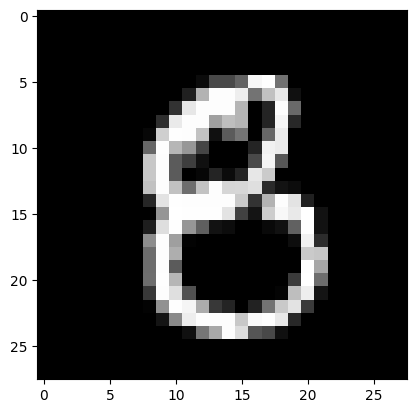

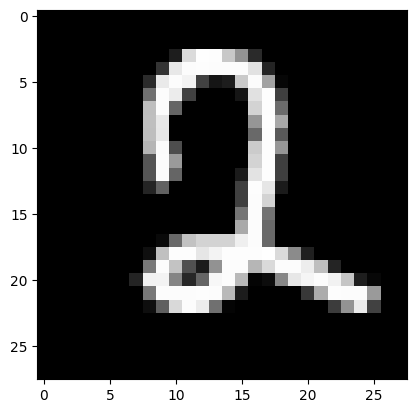

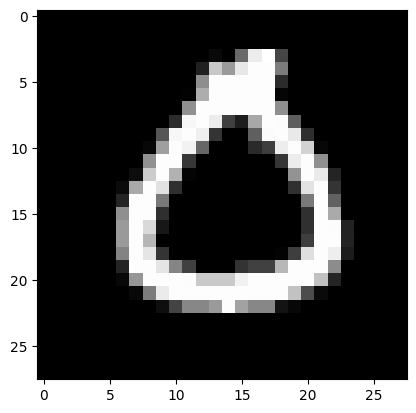

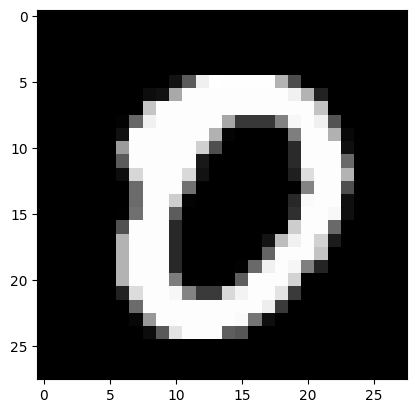

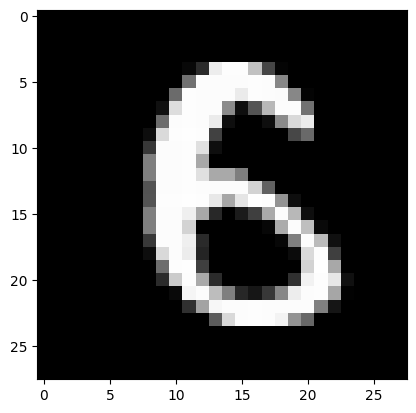

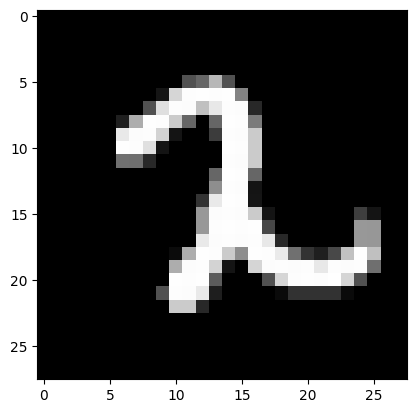

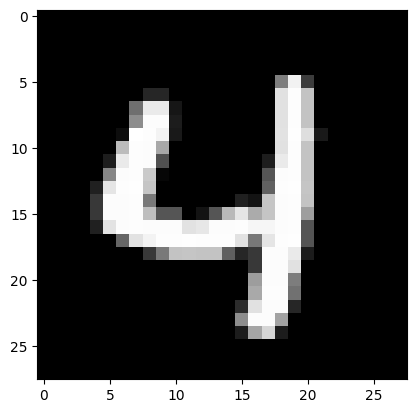

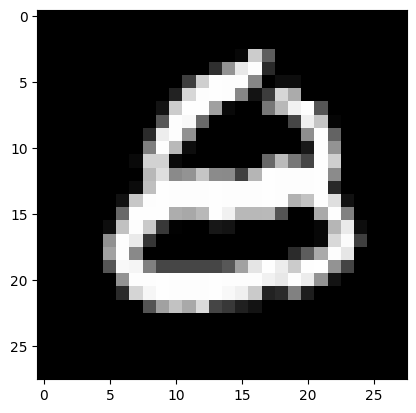

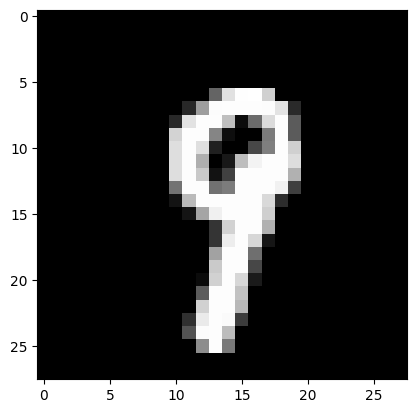

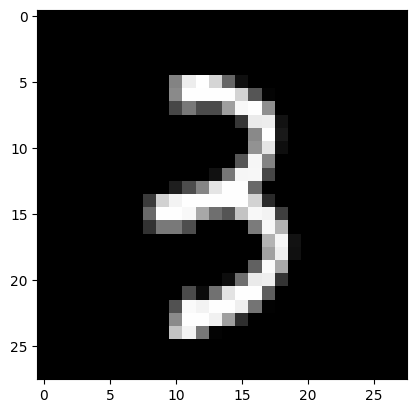

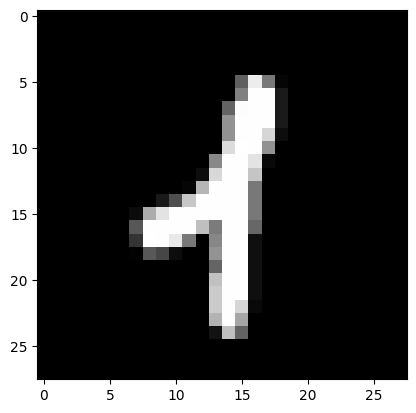

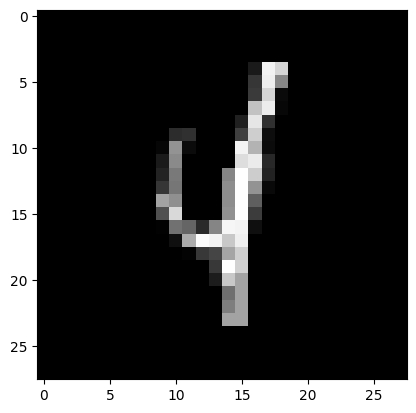

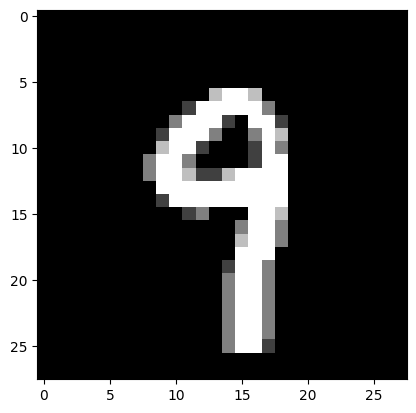

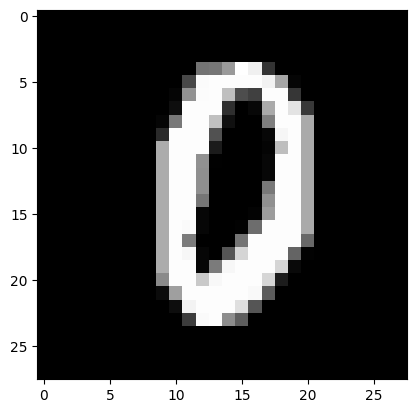

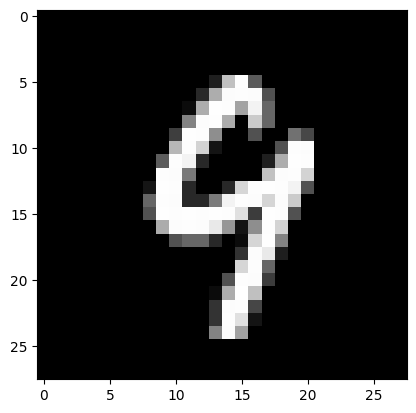

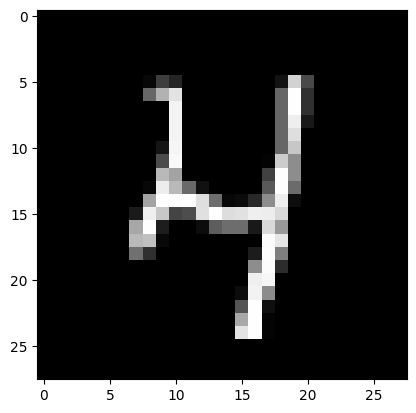

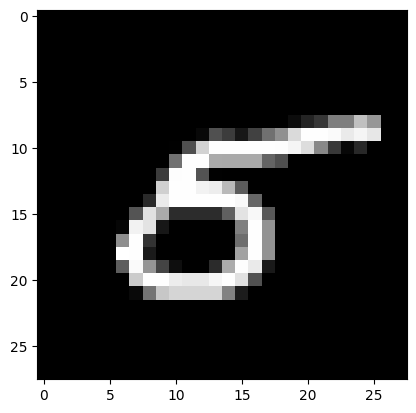

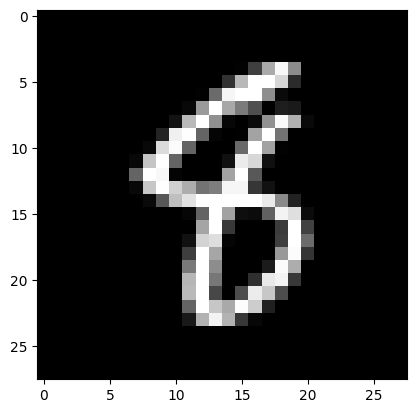

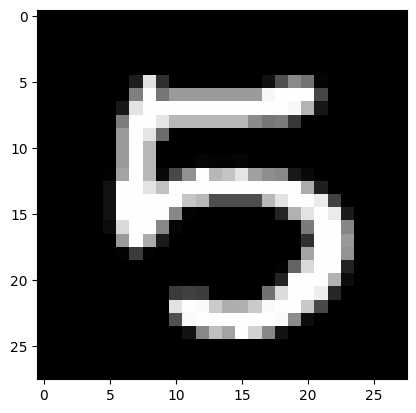

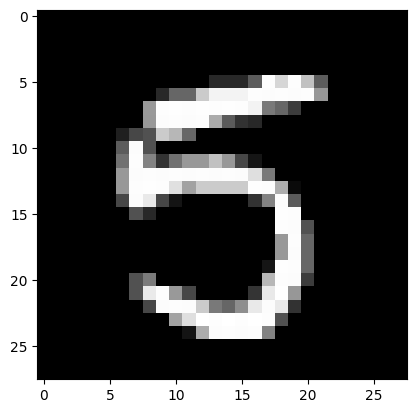

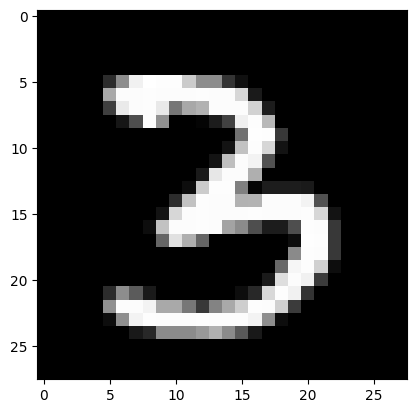

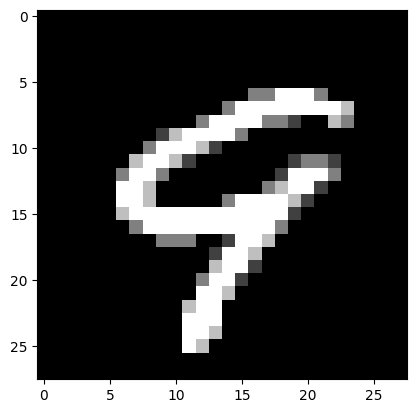

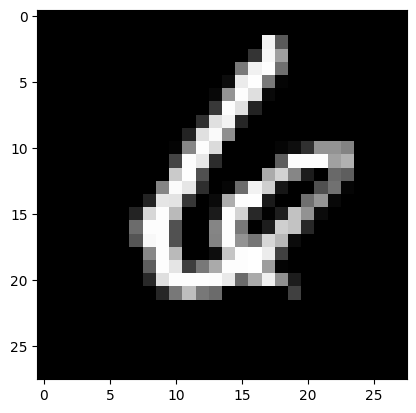

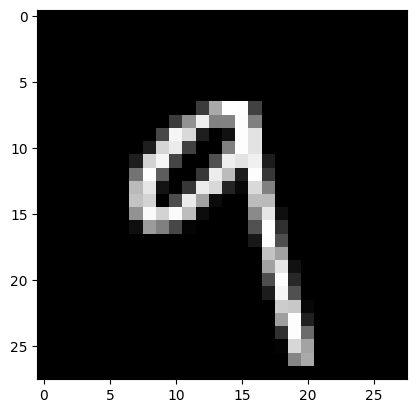

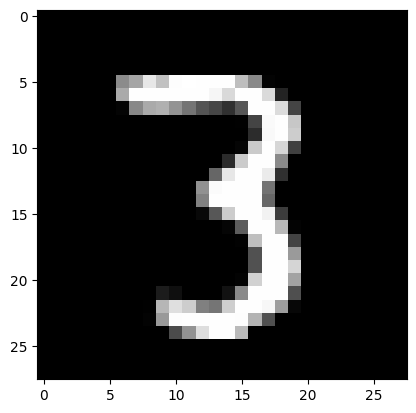

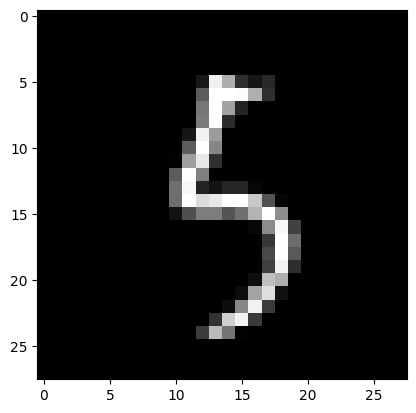

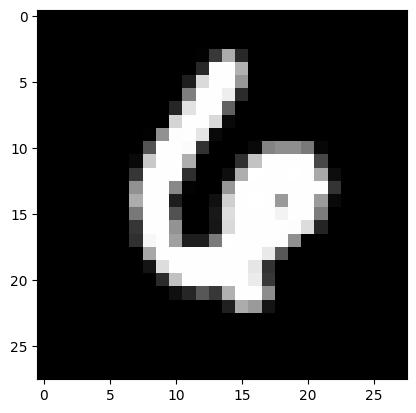

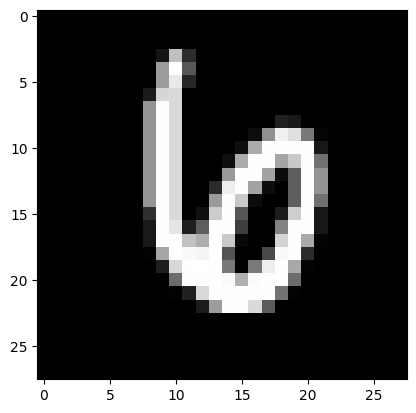

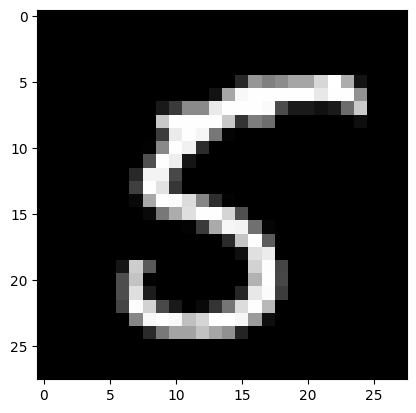

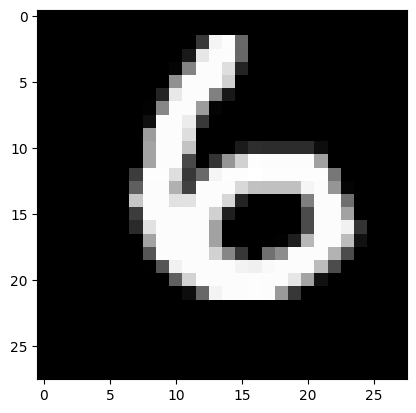

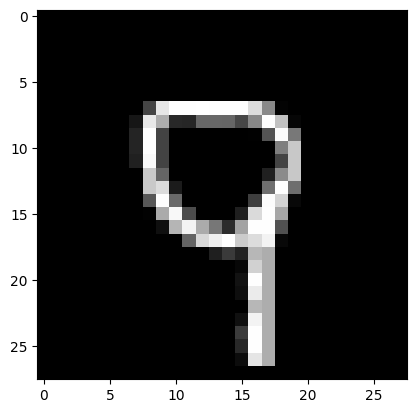

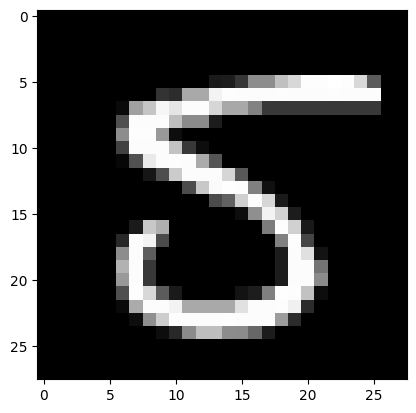

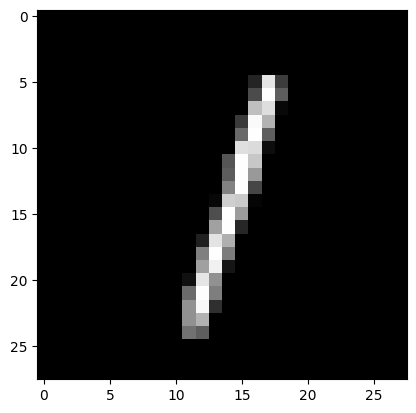

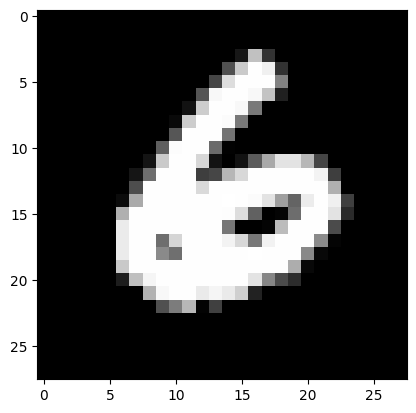

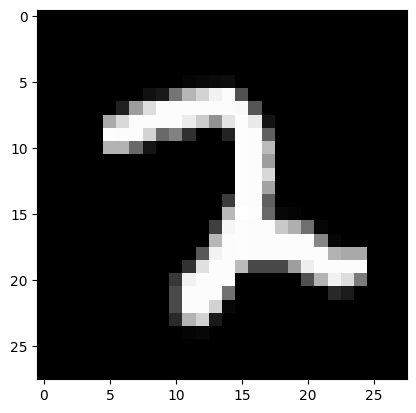

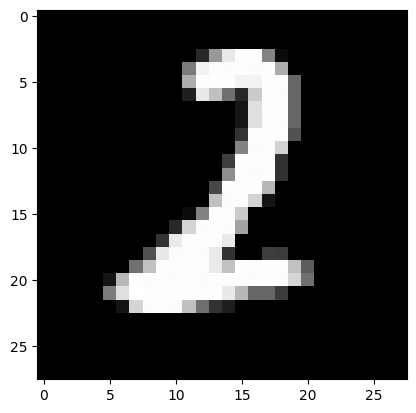

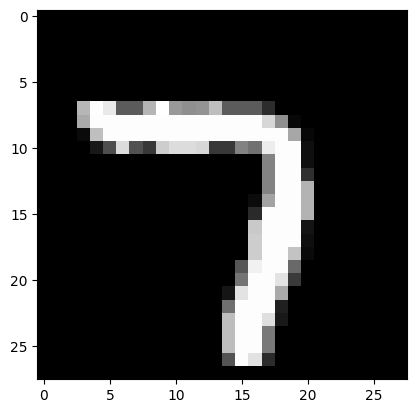

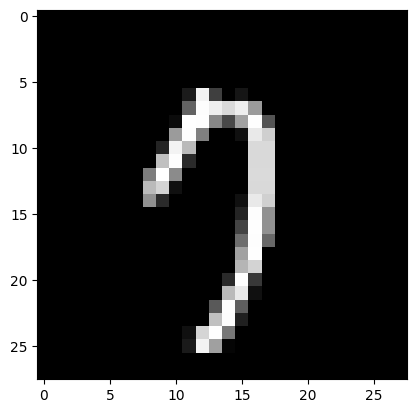

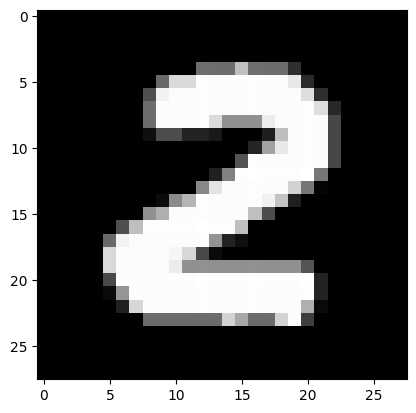

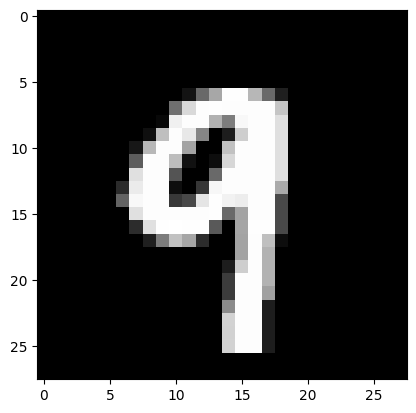

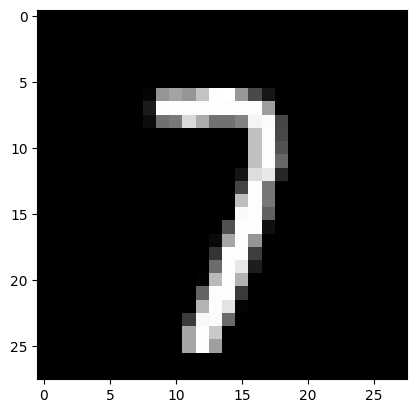

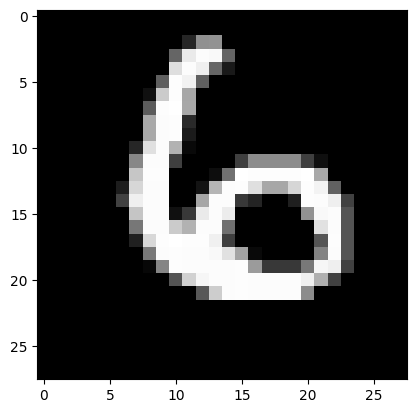

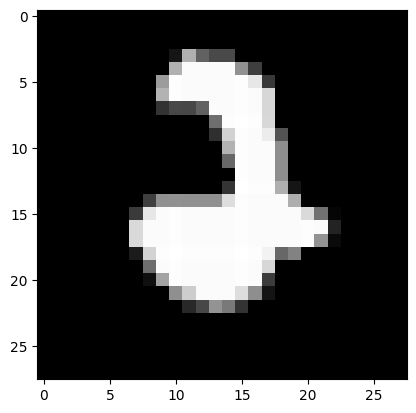

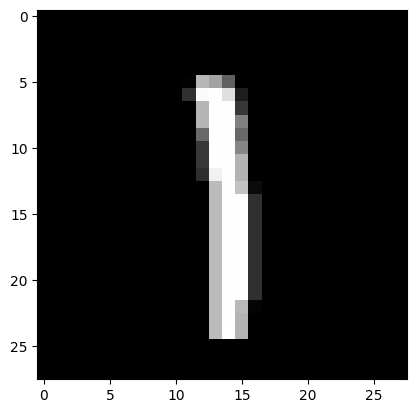

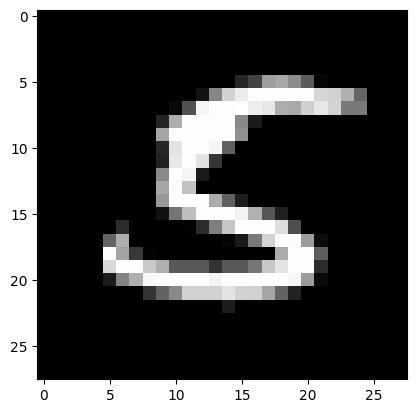

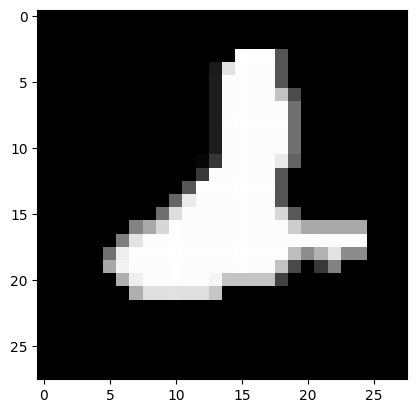

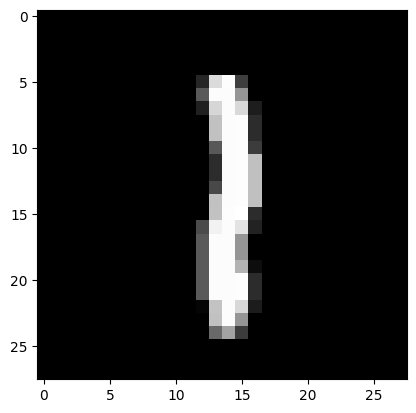

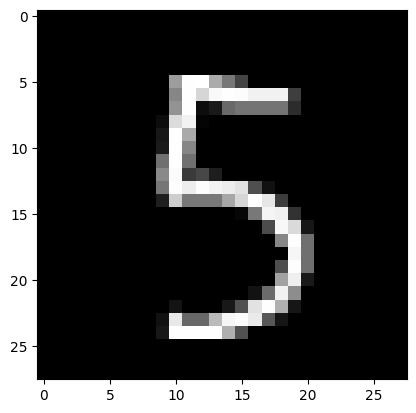

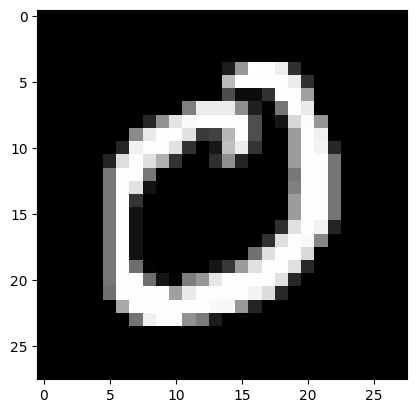

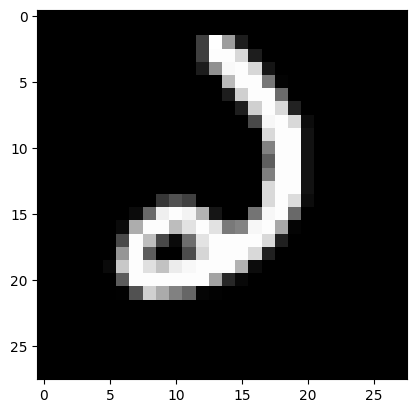

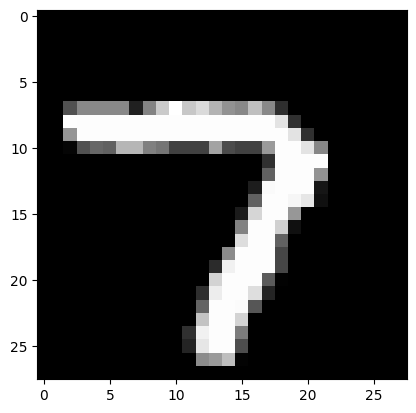

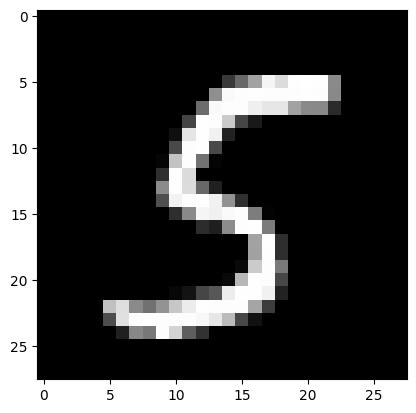

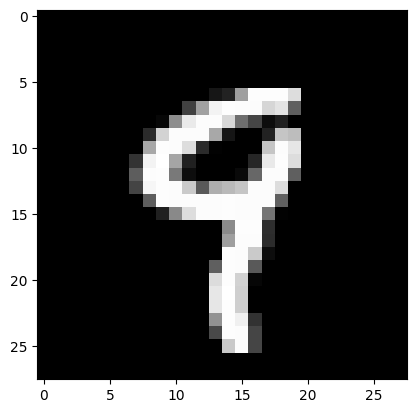

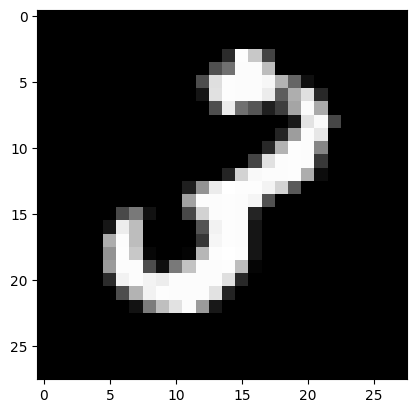

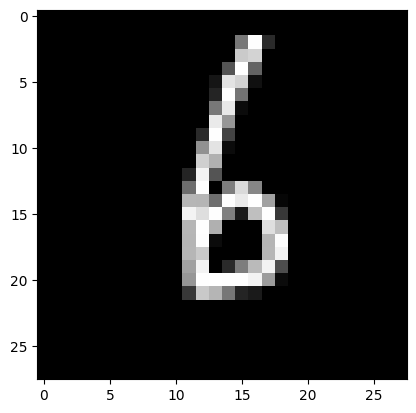

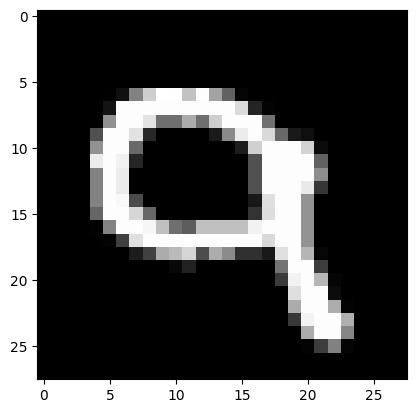

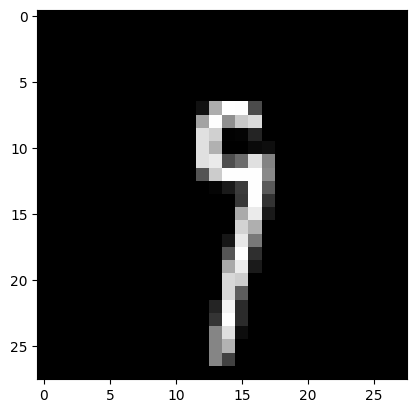

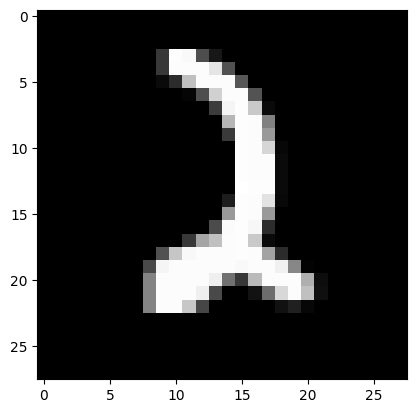

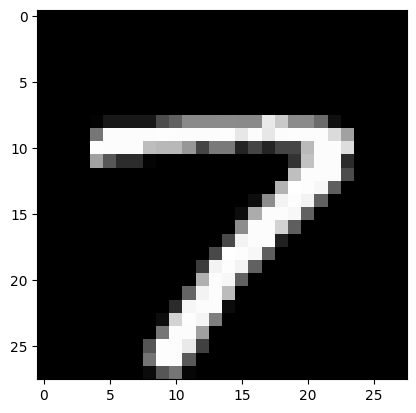

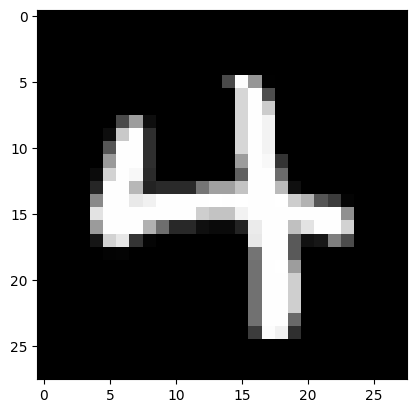

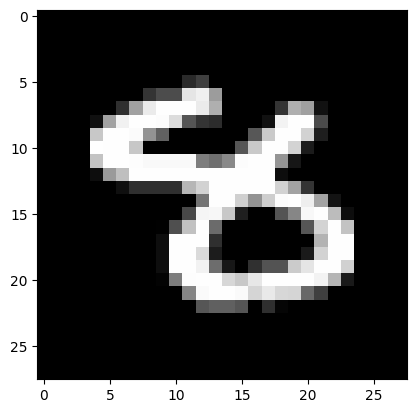

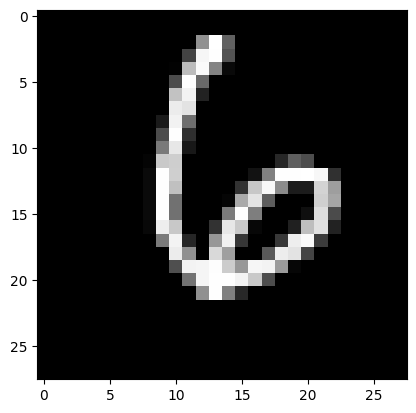

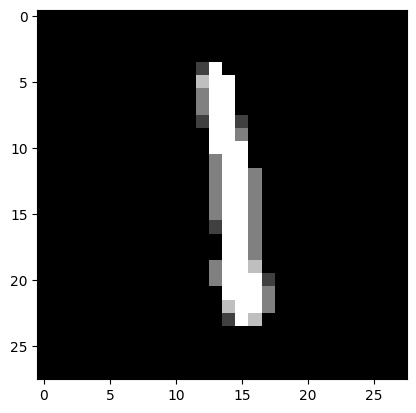

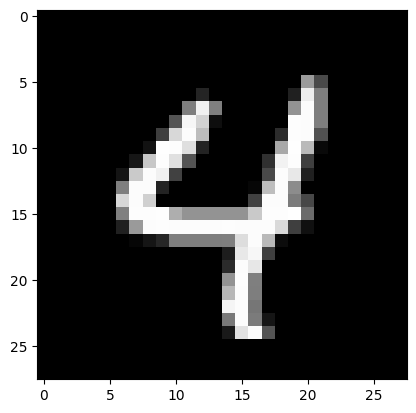

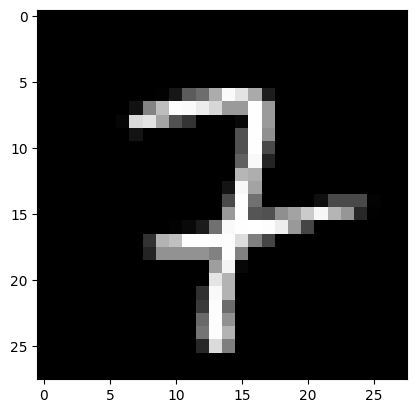

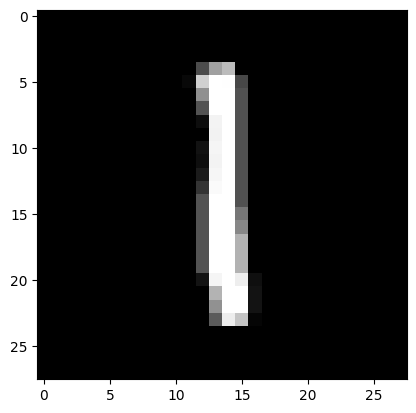

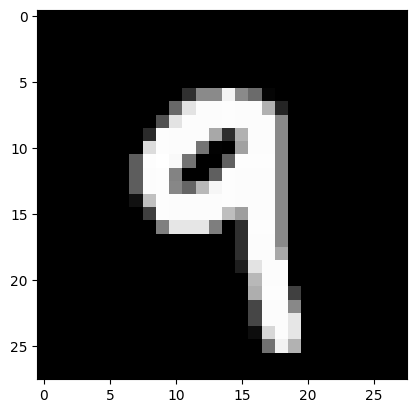

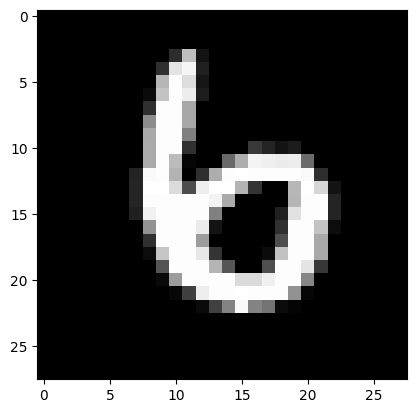

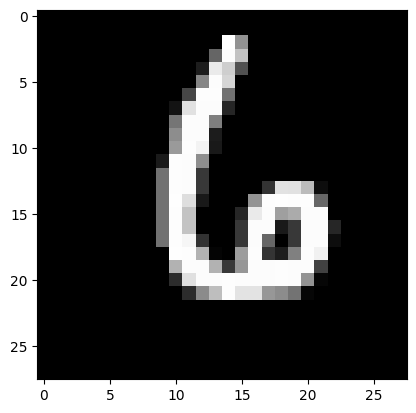

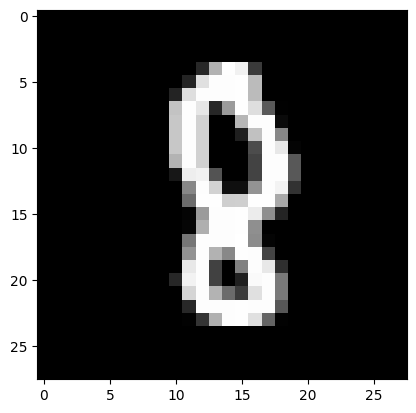

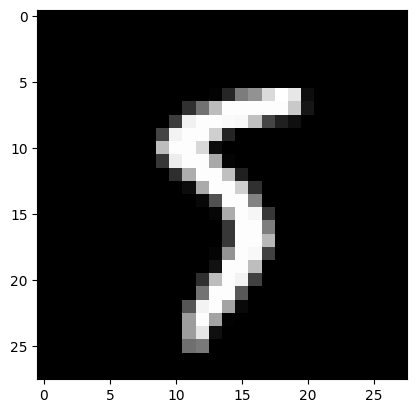

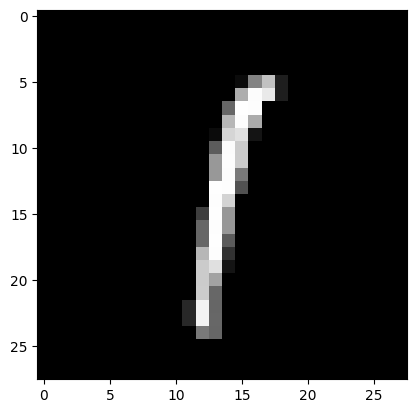

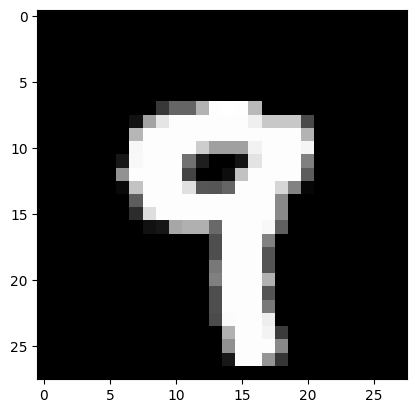

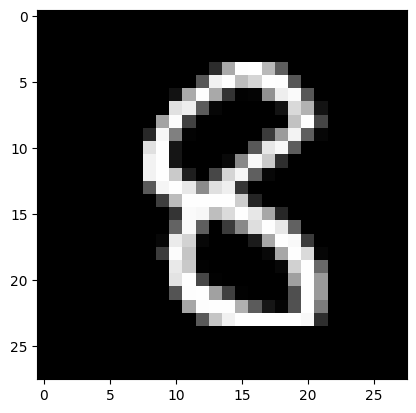

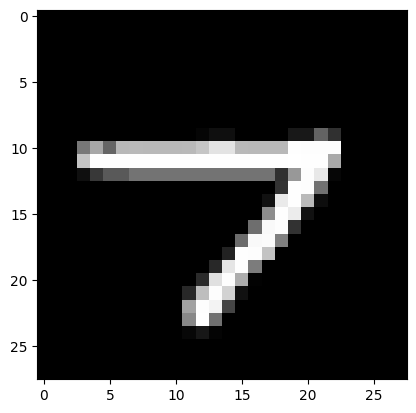

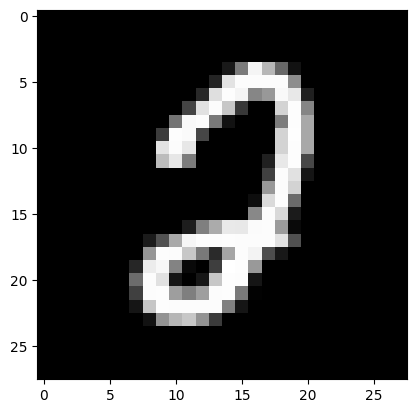

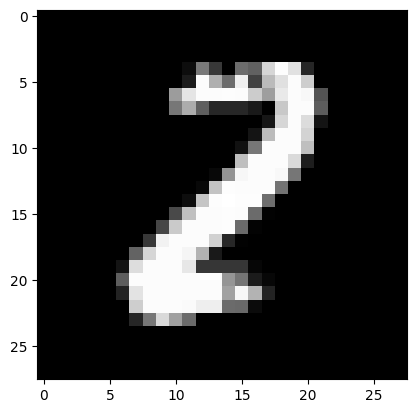

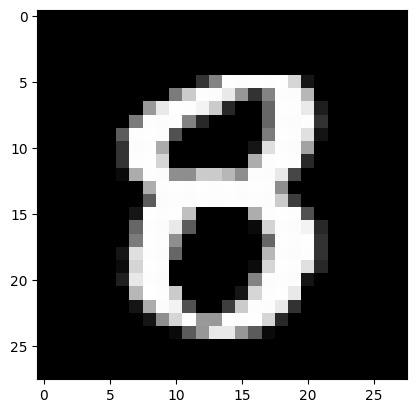

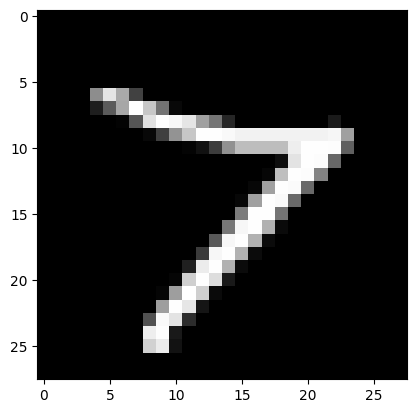

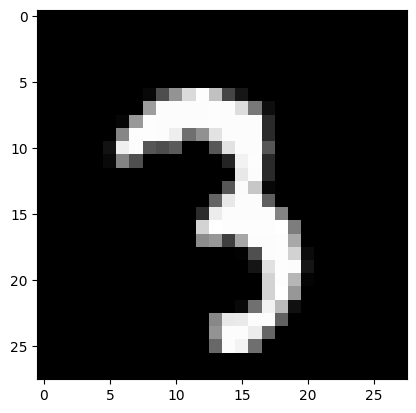

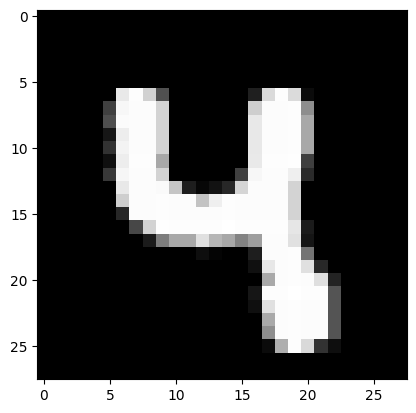

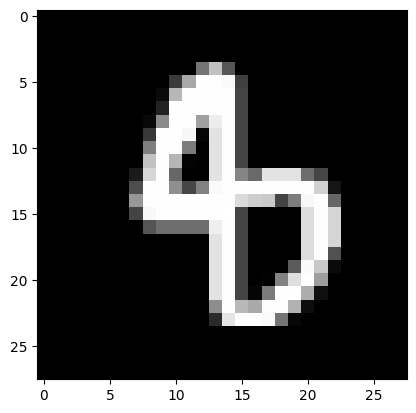

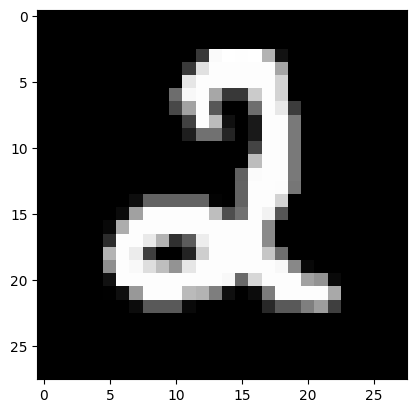

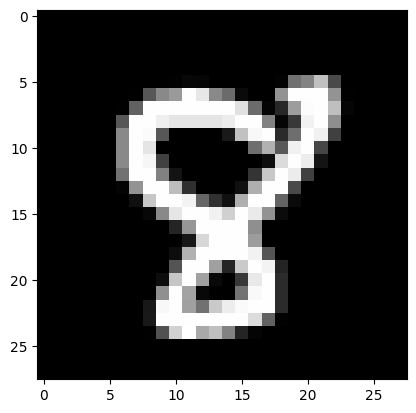

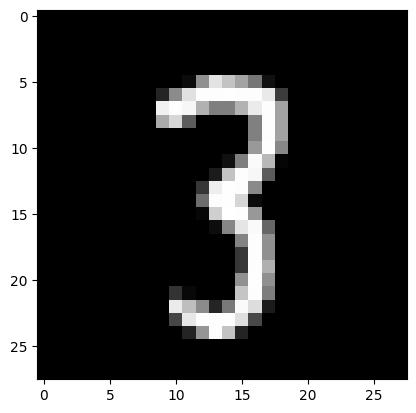

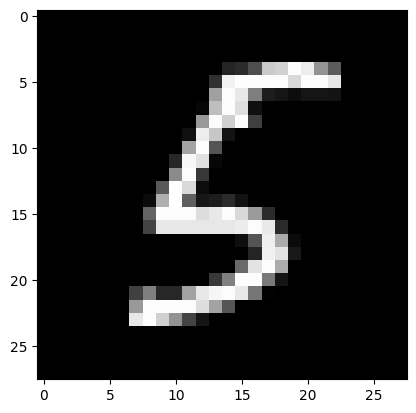

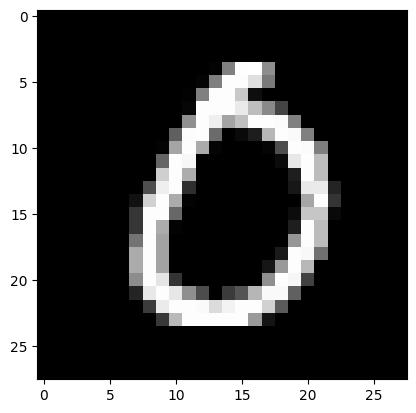

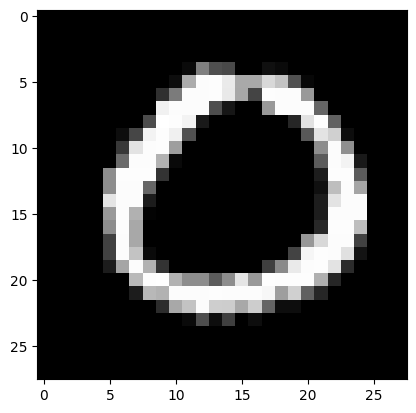

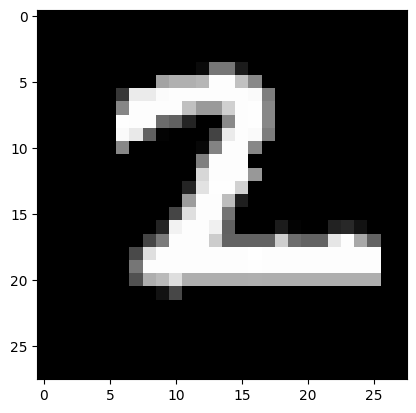

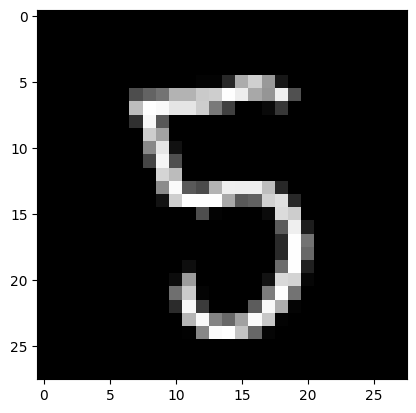

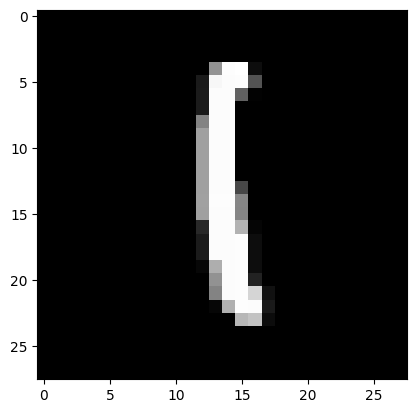

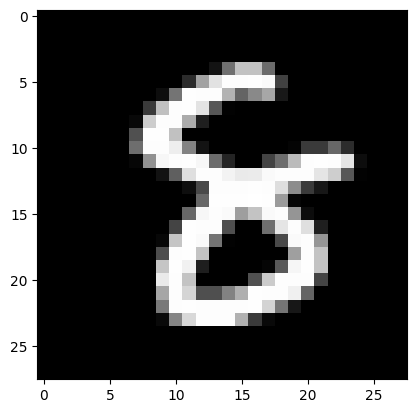

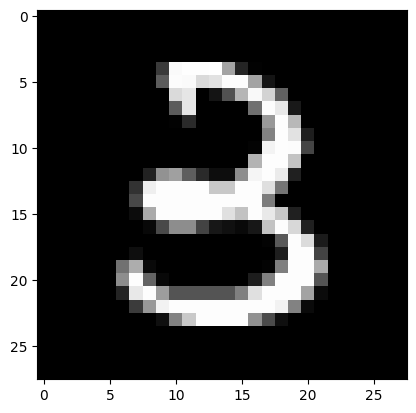

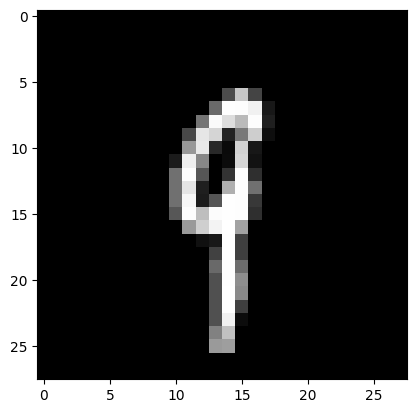

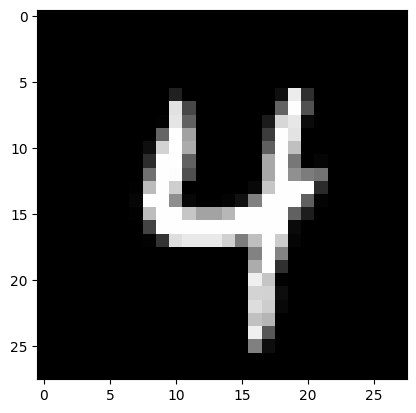

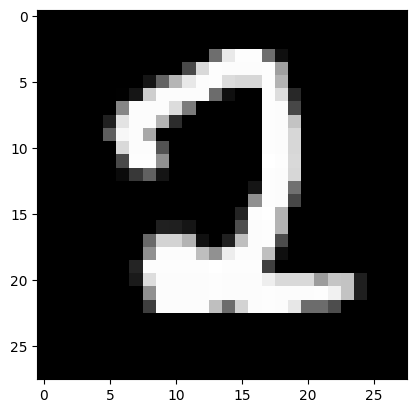

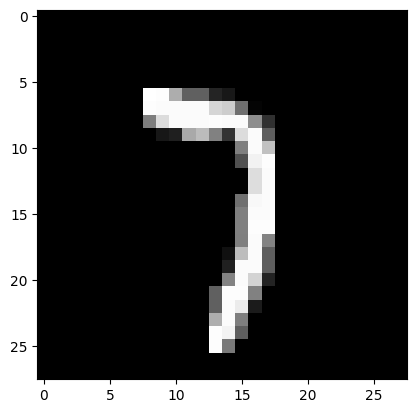

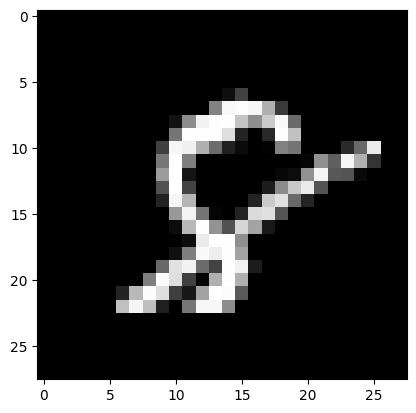

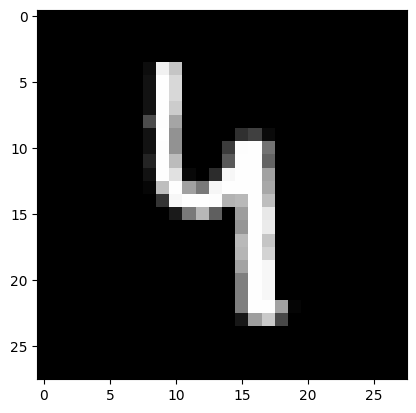

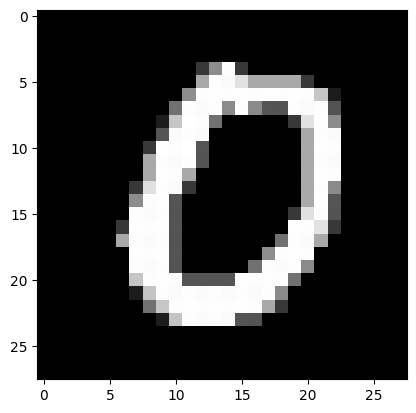

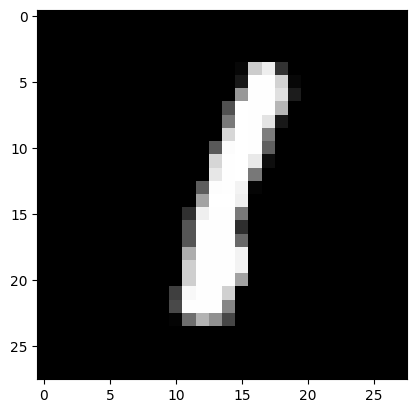

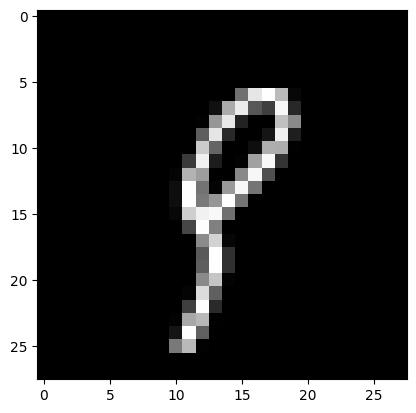

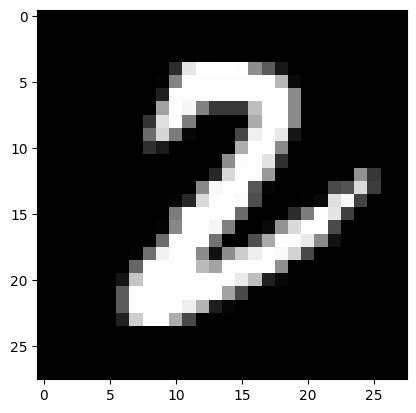

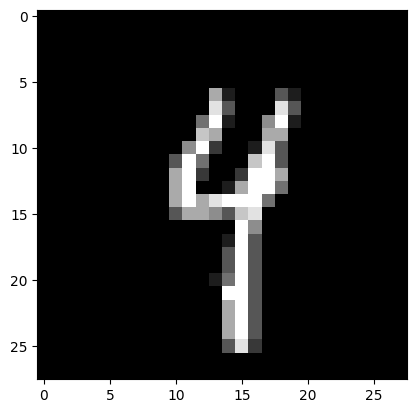

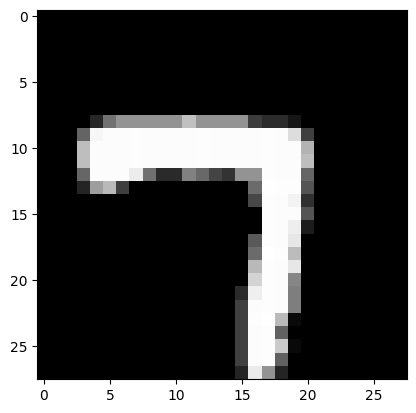

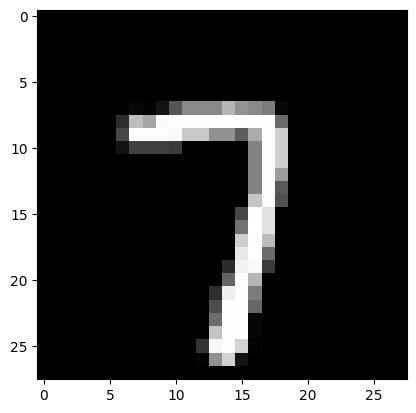

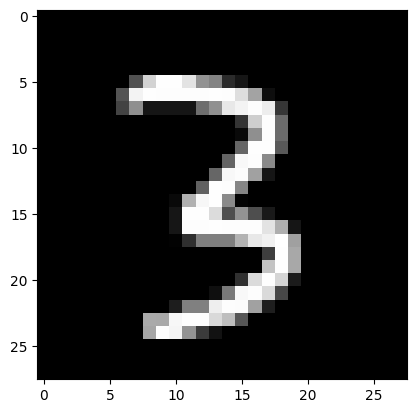

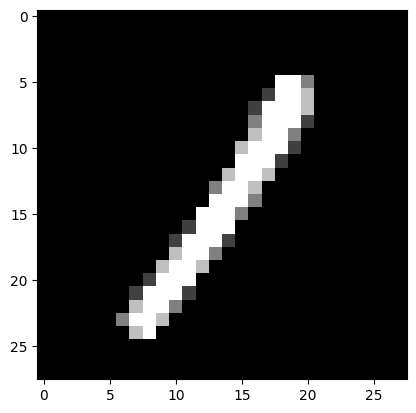

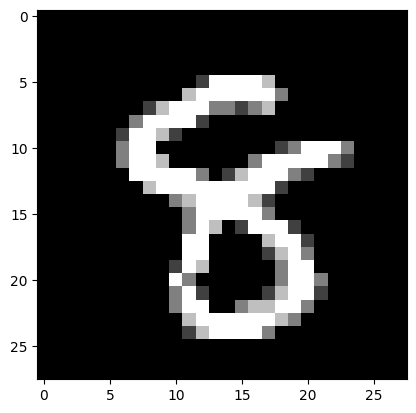

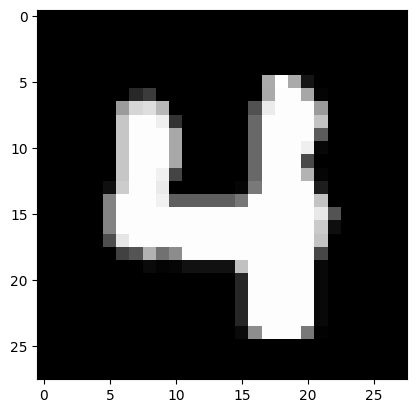

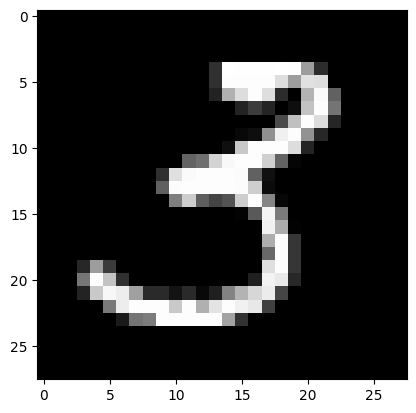

Accuracy of the model on test: 81.79 %
tot loss:  0.7583245038986206
tot loss:  1.5382326245307922
tot loss:  2.1678930521011353
tot loss:  2.791773200035095
tot loss:  3.452952742576599
tot loss:  4.063765108585358
tot loss:  4.750303685665131
tot loss:  5.354545891284943
tot loss:  5.992573440074921
tot loss:  6.720953643321991
tot loss:  7.456334710121155
tot loss:  8.107218146324158
tot loss:  8.739763855934143
tot loss:  9.373567819595337
tot loss:  10.024719178676605
tot loss:  10.670323550701141
tot loss:  11.335375368595123
tot loss:  11.981148481369019
tot loss:  12.593421518802643
tot loss:  13.291598200798035
tot loss:  13.95814859867096
tot loss:  14.631713628768921
tot loss:  15.283012747764587
tot loss:  15.950234591960907
tot loss:  16.59801071882248
tot loss:  17.224647641181946
tot loss:  17.857415914535522
tot loss:  18.464468359947205
tot loss:  19.08049190044403
tot loss:  19.707559883594513
tot loss:  20.319200456142426
tot loss:  20.98474246263504
tot loss:  21.60

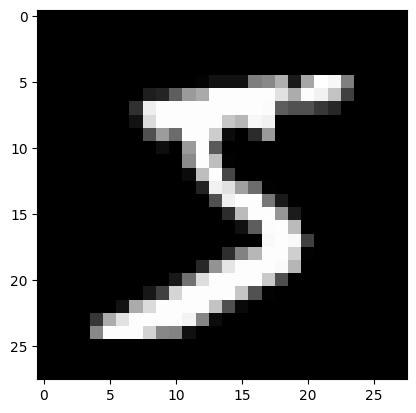

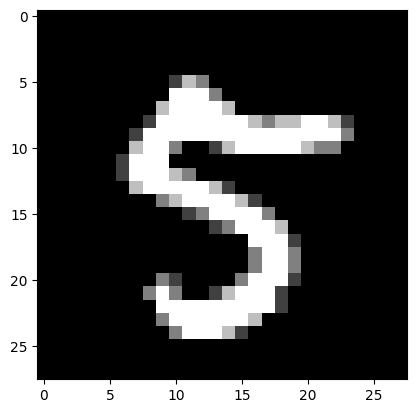

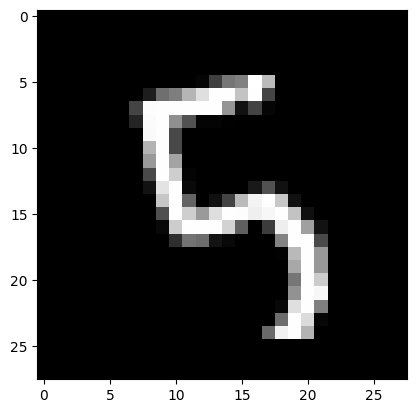

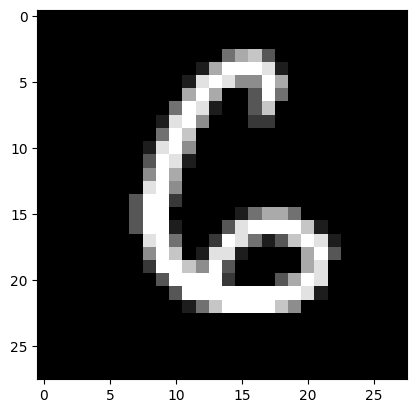

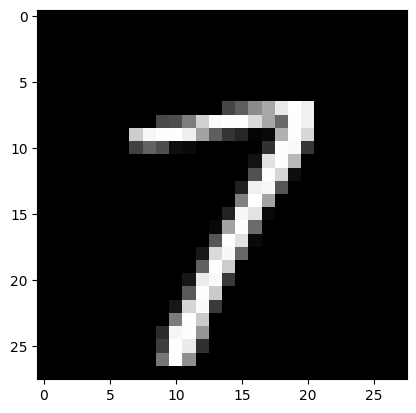

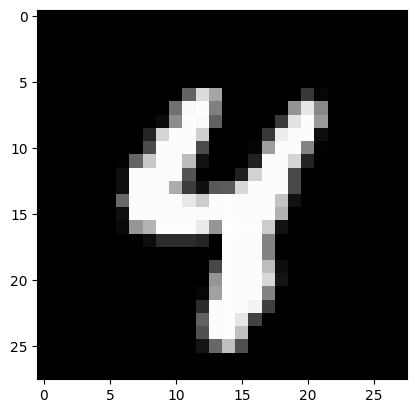

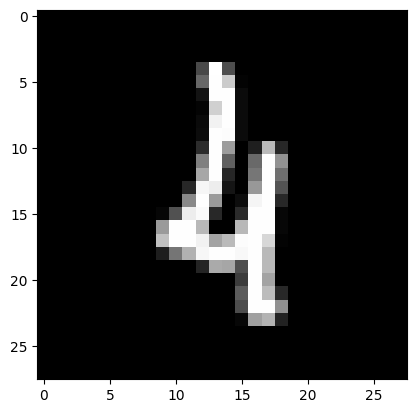

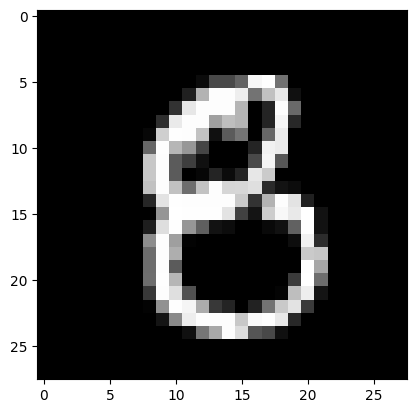

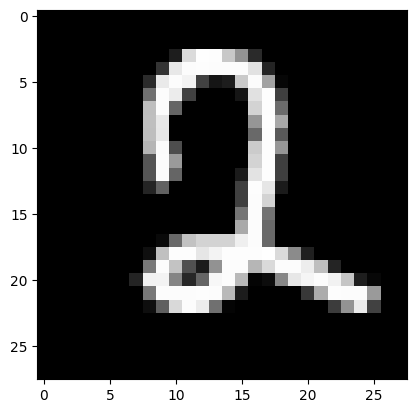

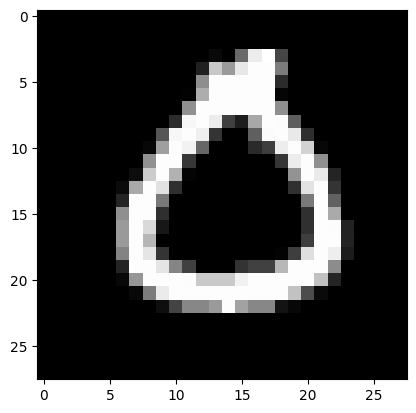

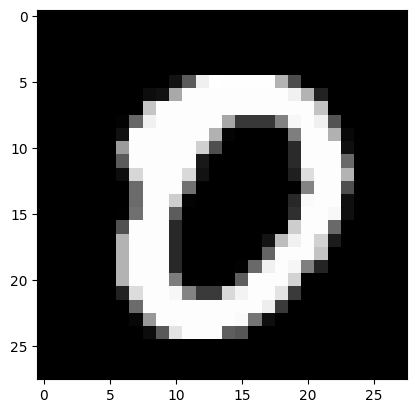

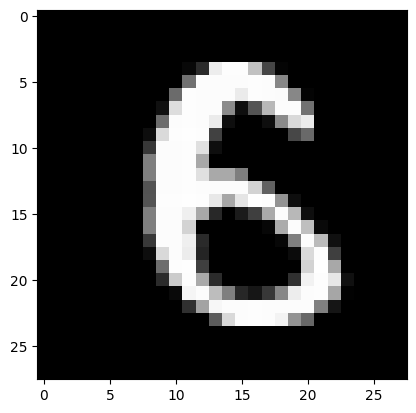

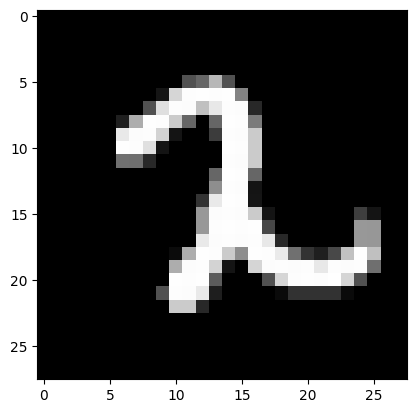

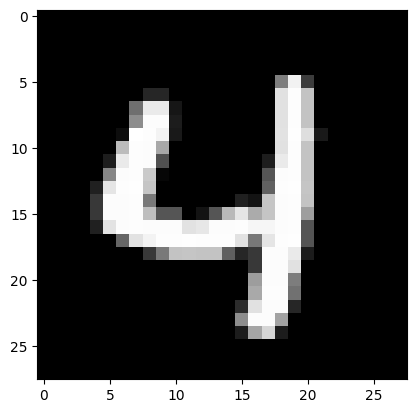

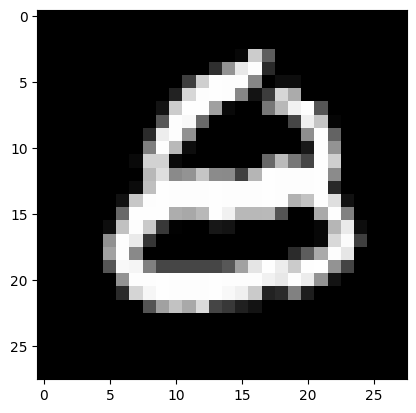

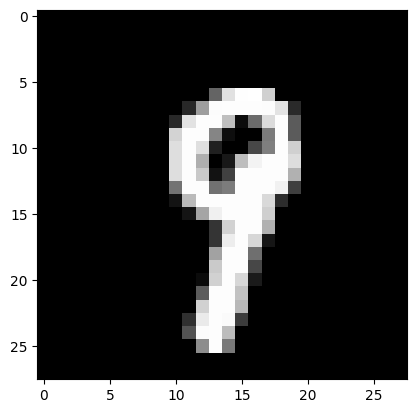

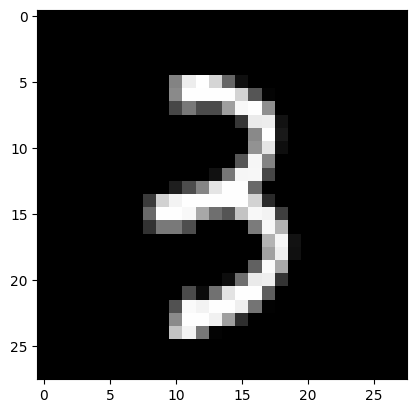

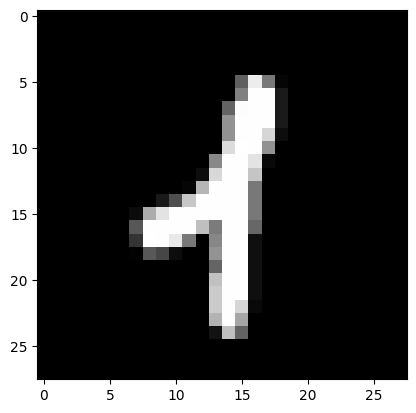

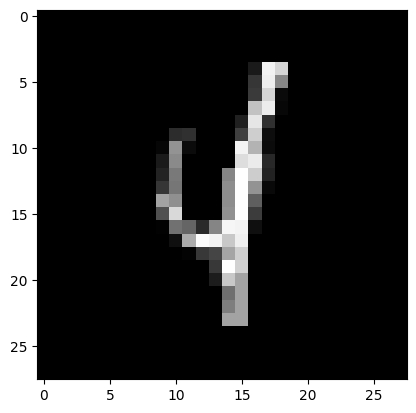

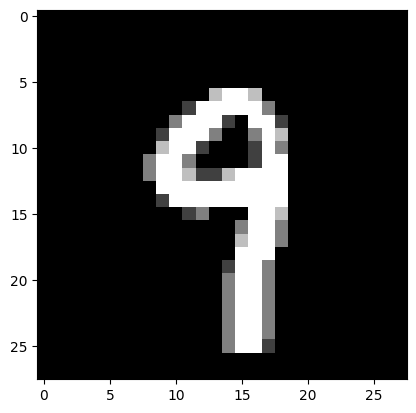

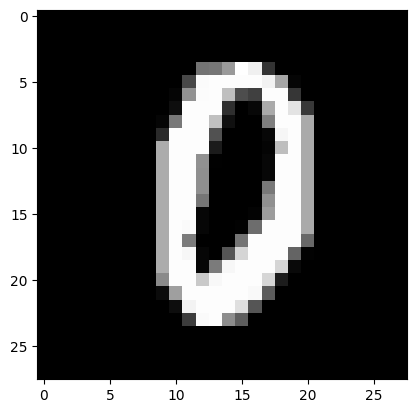

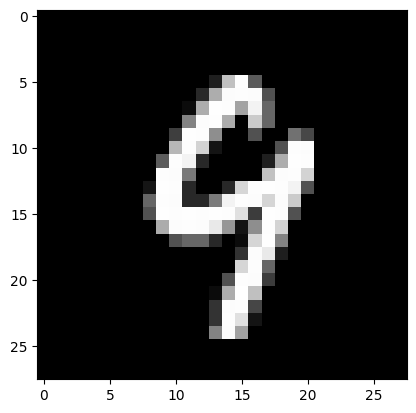

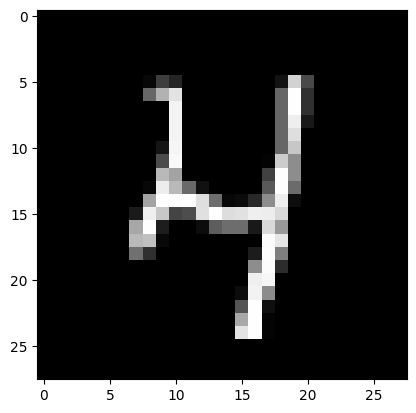

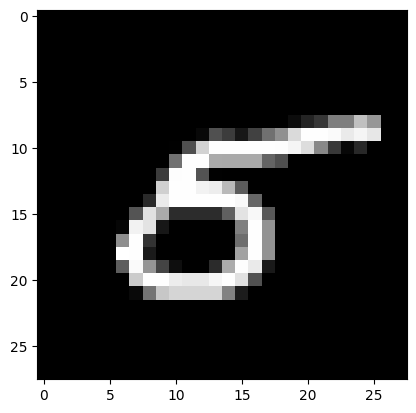

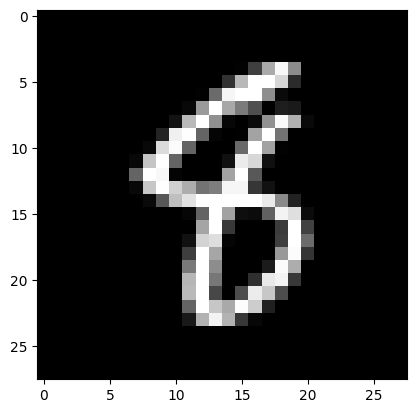

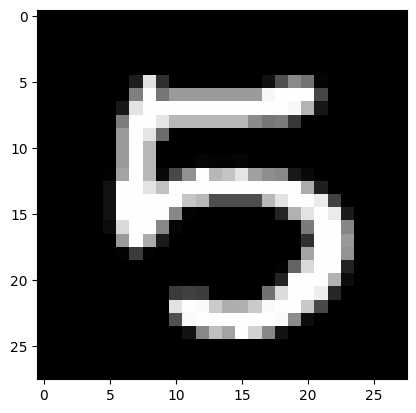

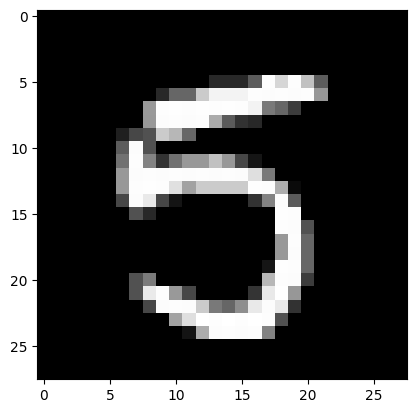

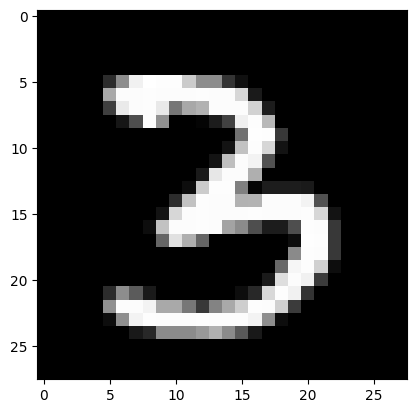

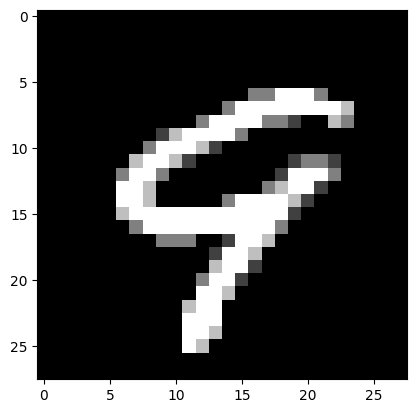

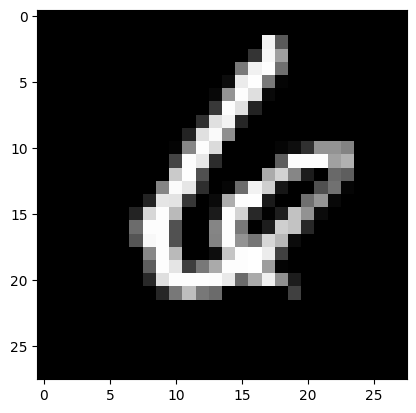

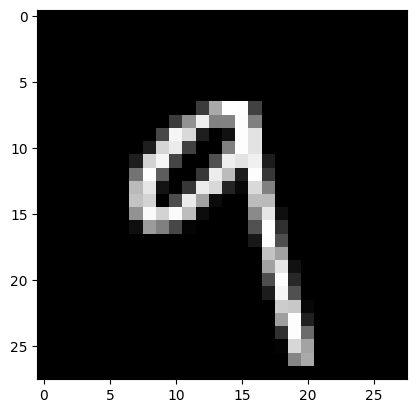

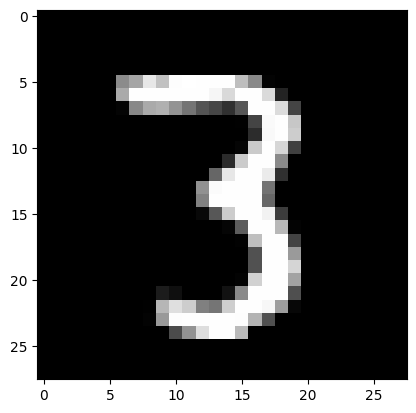

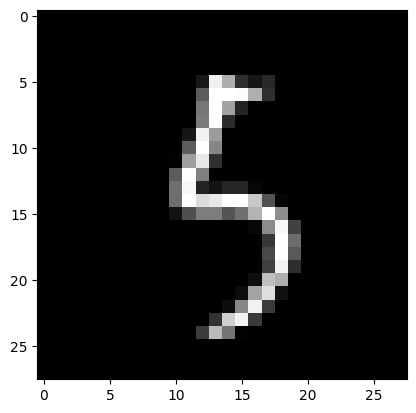

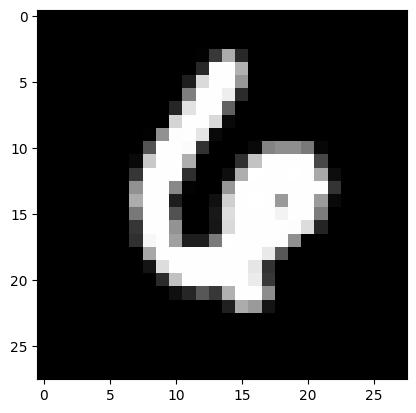

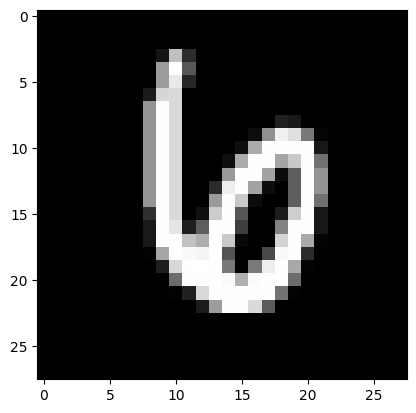

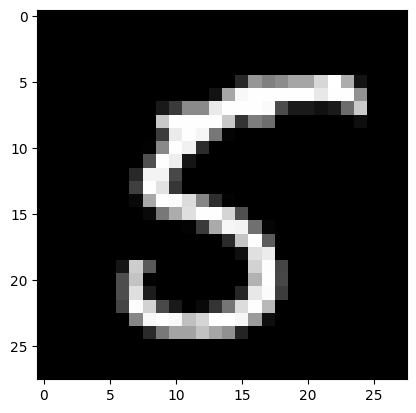

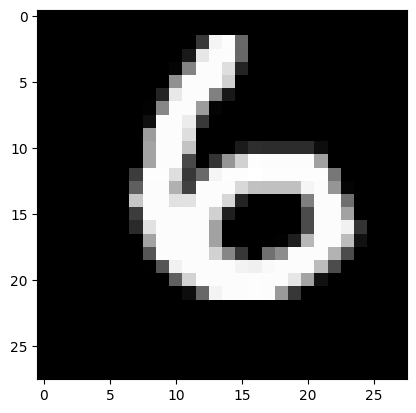

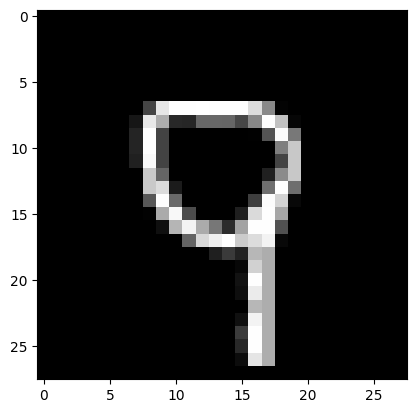

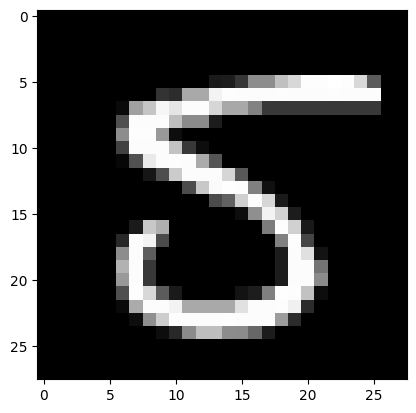

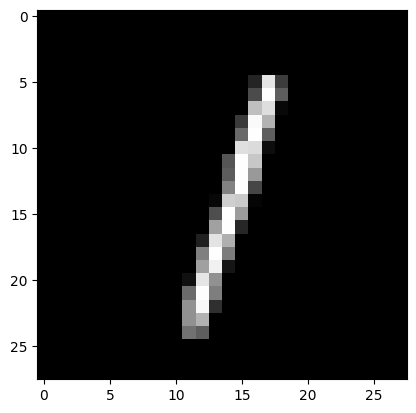

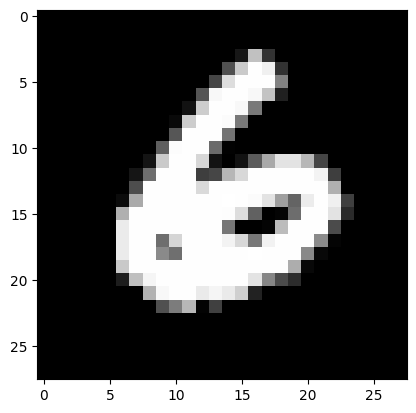

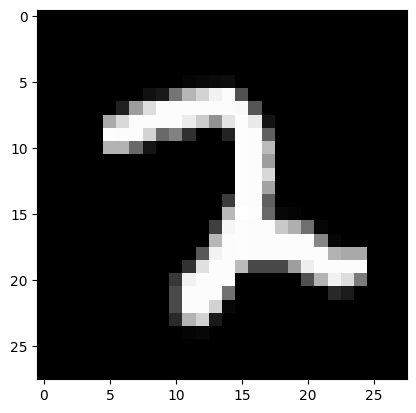

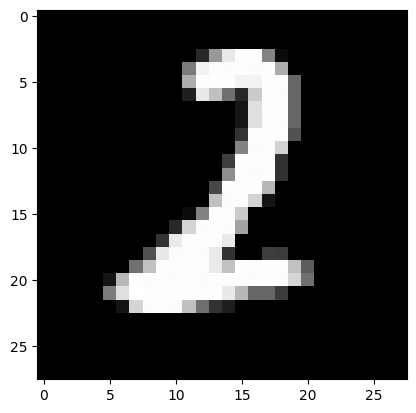

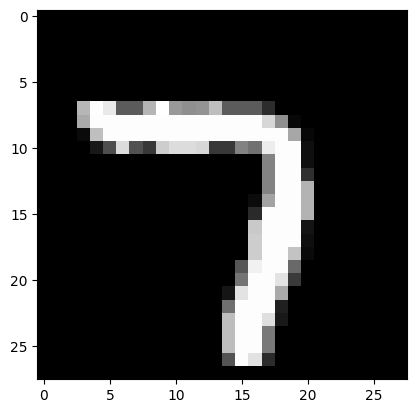

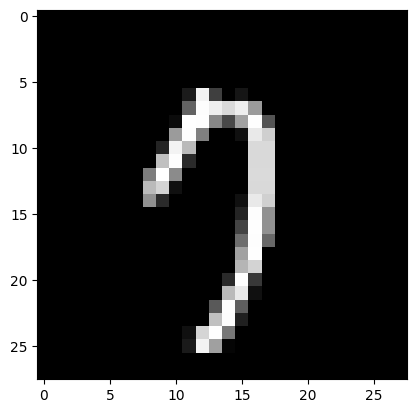

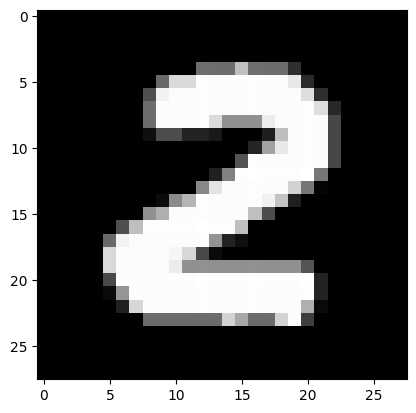

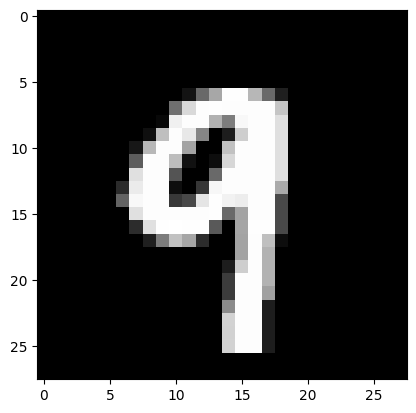

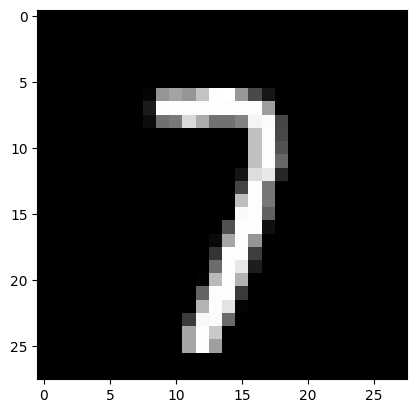

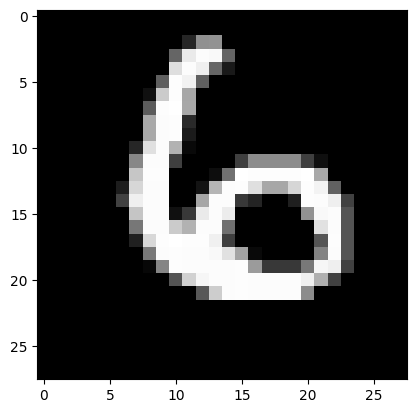

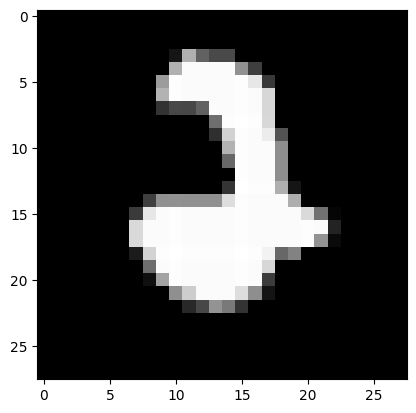

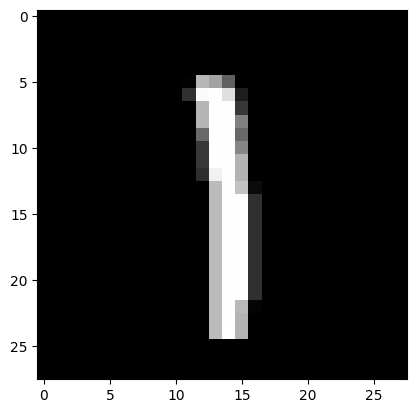

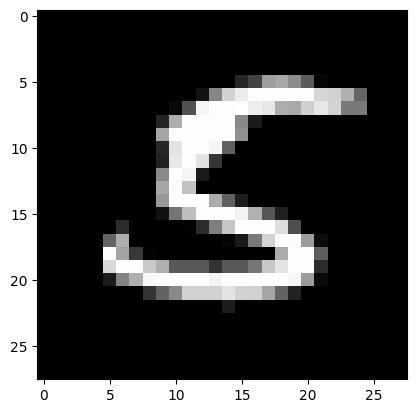

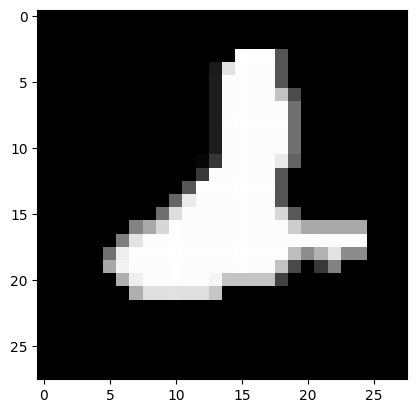

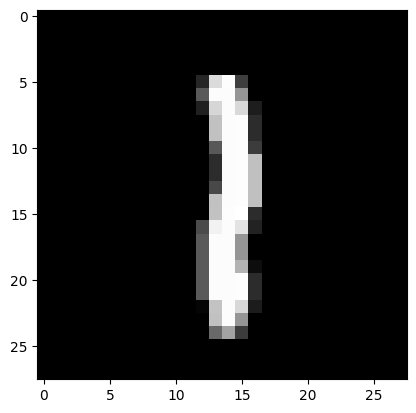

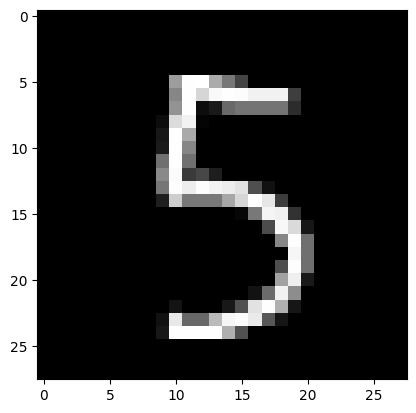

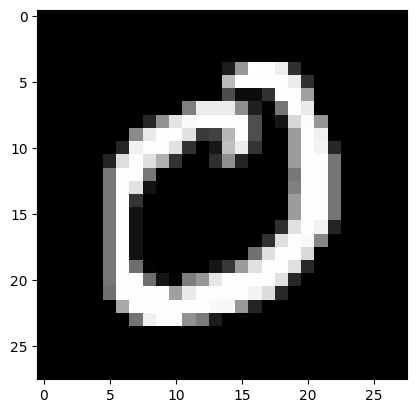

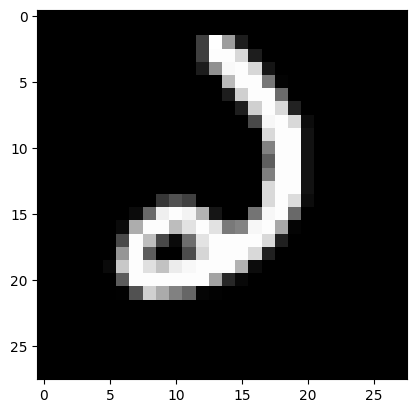

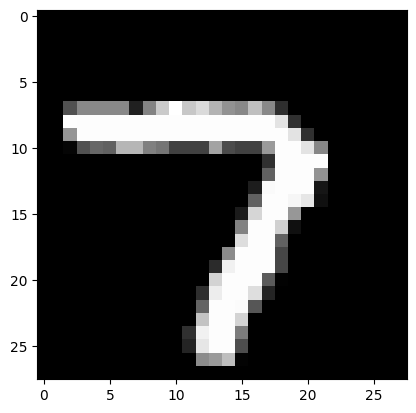

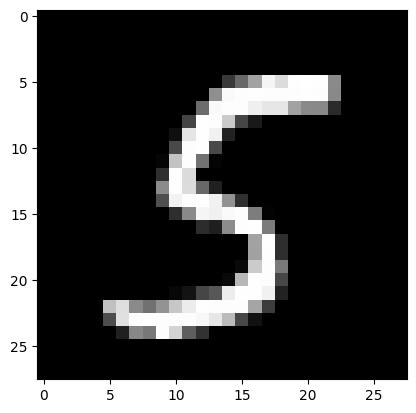

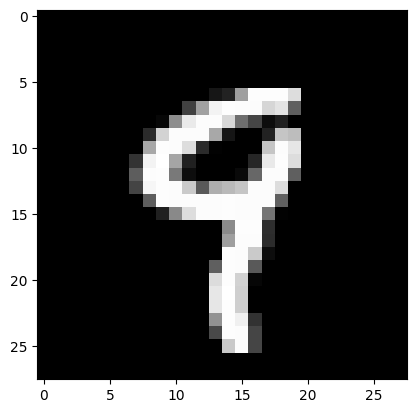

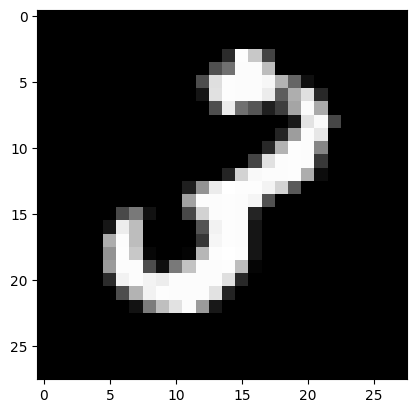

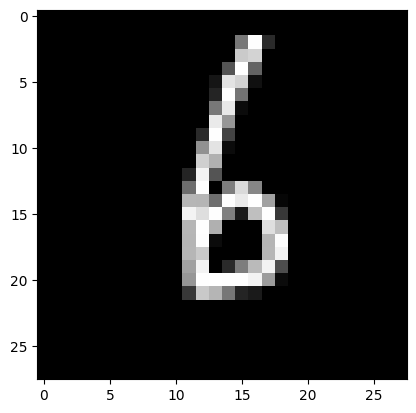

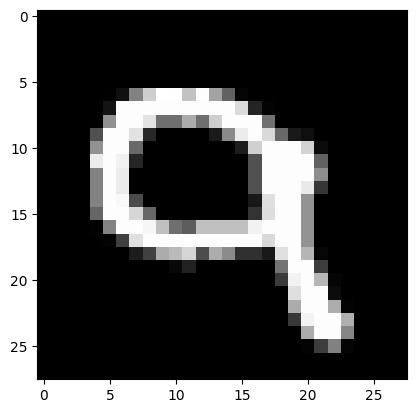

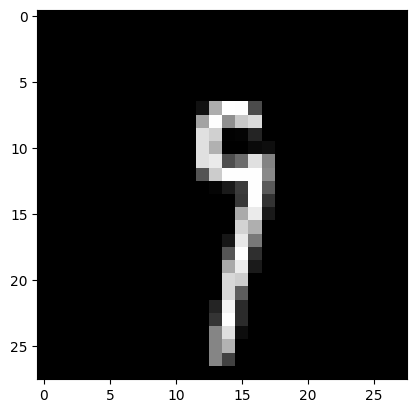

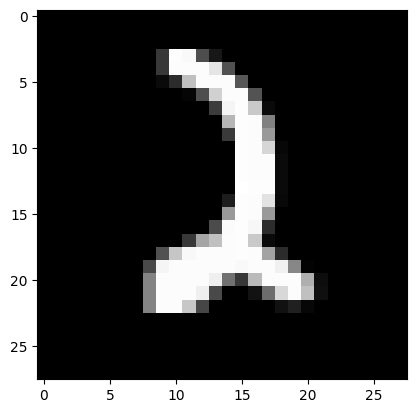

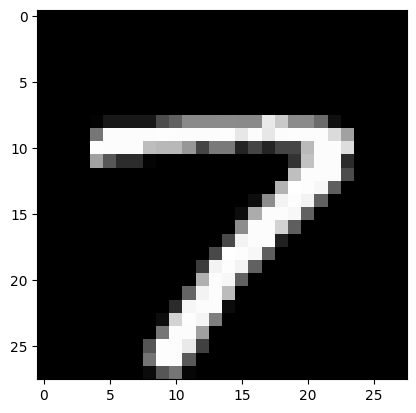

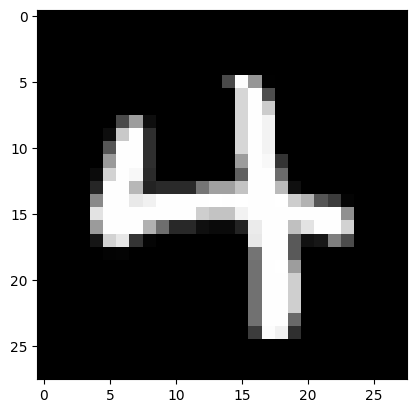

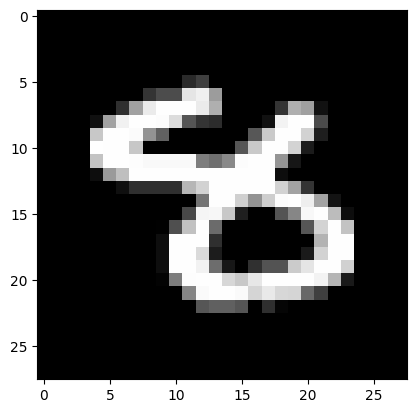

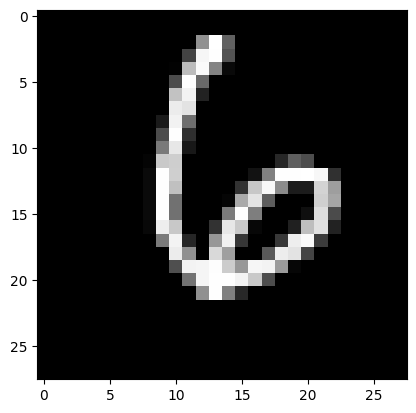

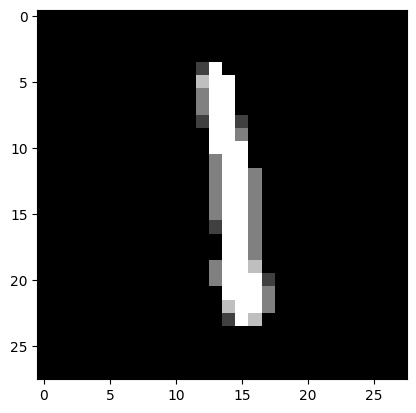

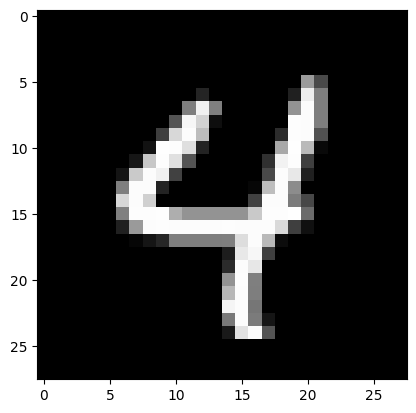

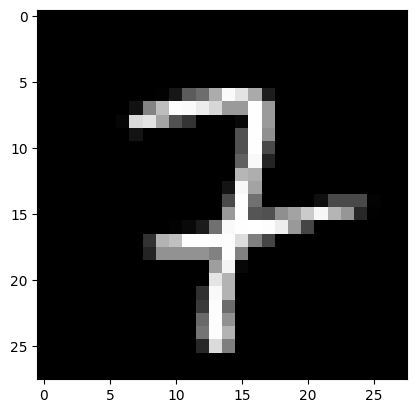

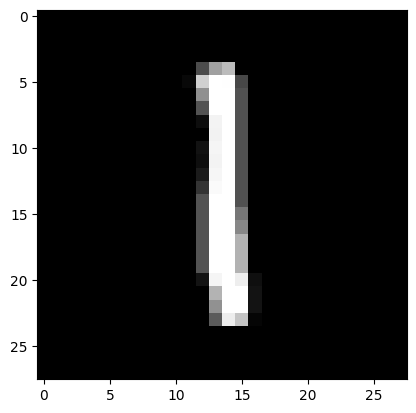

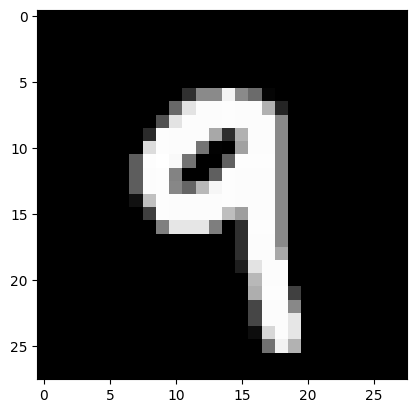

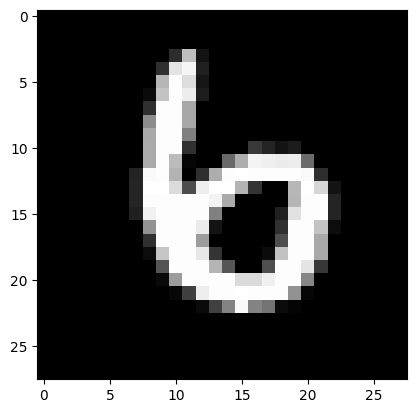

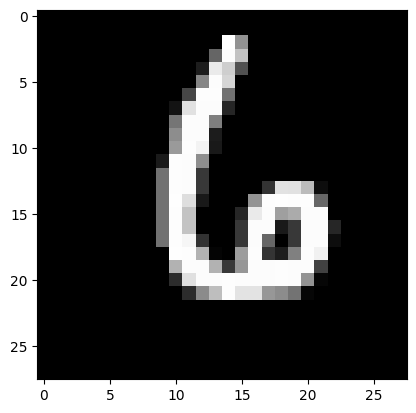

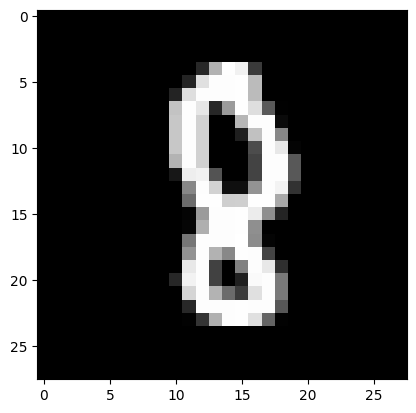

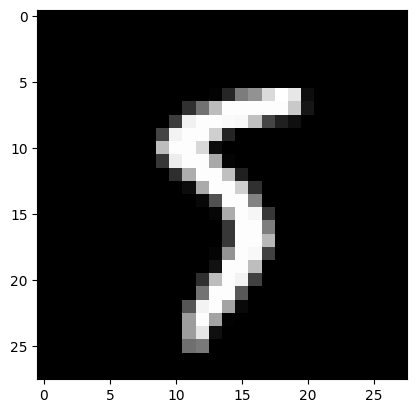

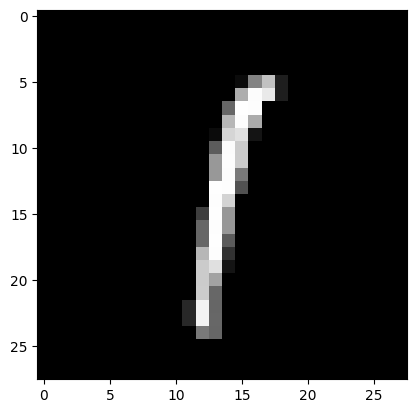

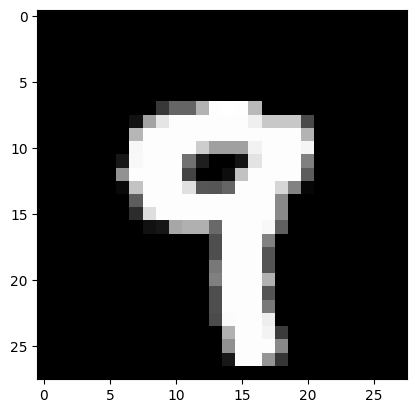

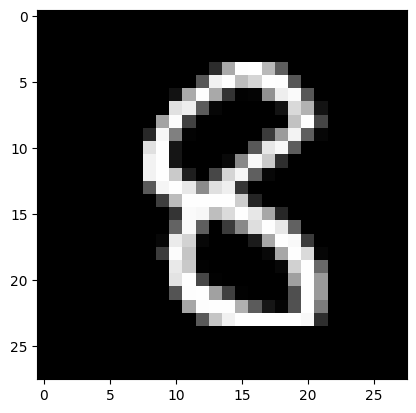

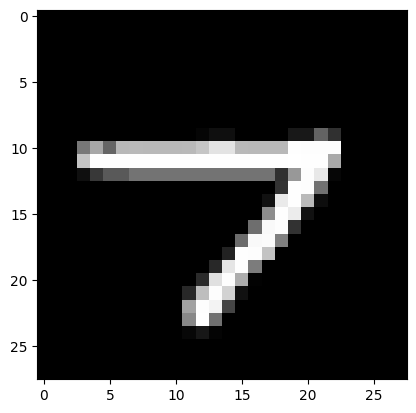

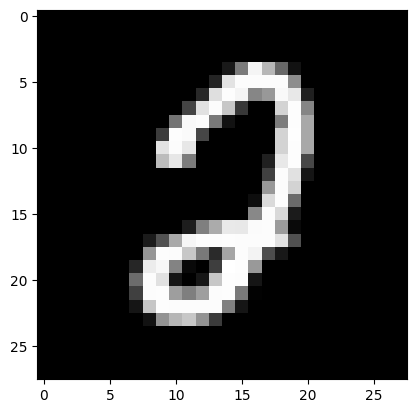

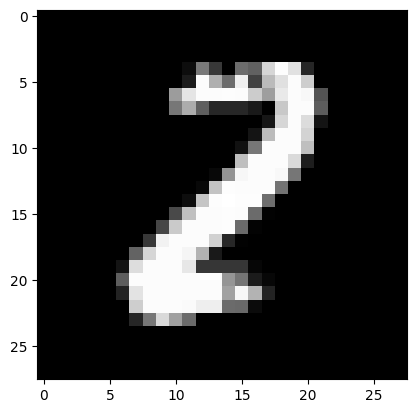

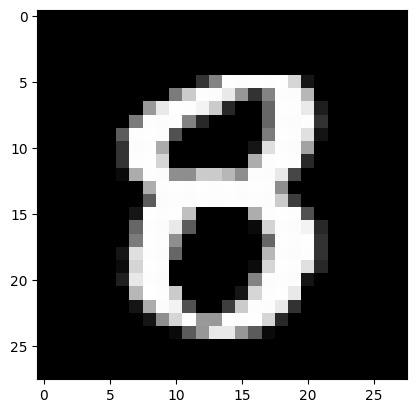

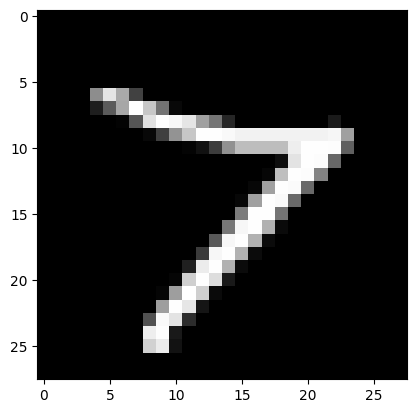

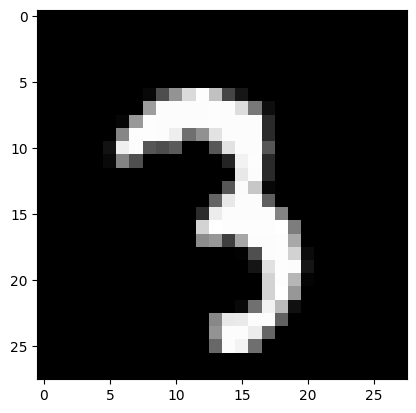

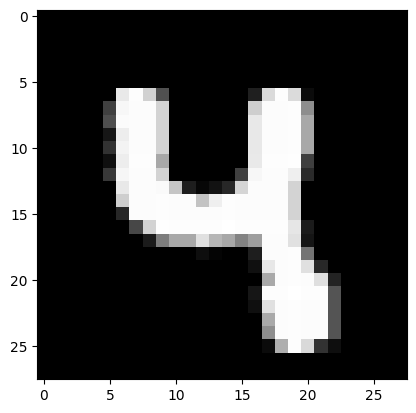

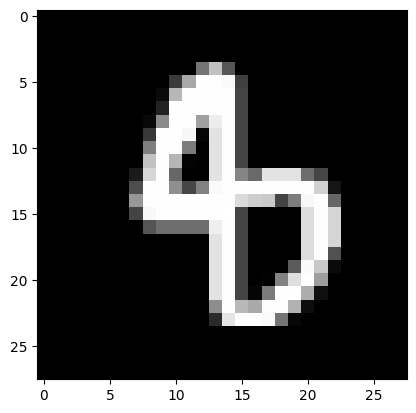

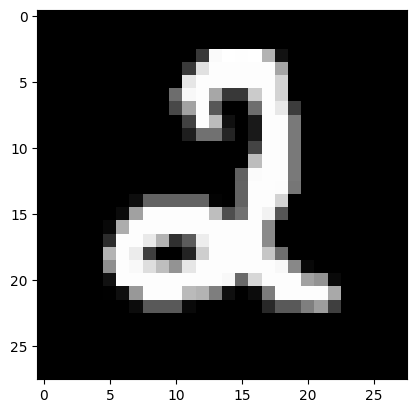

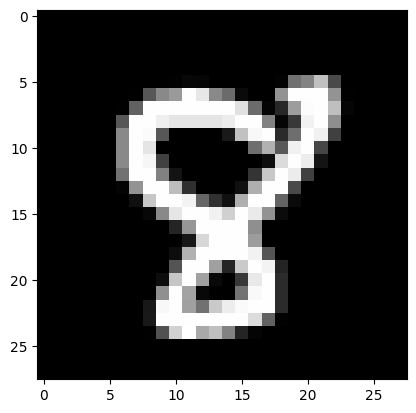

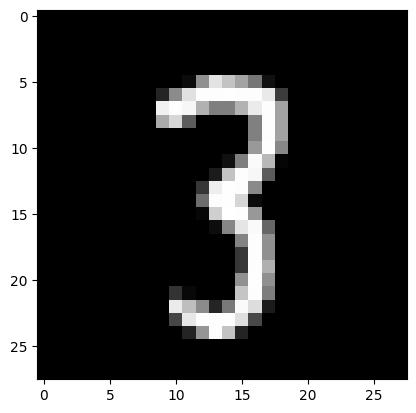

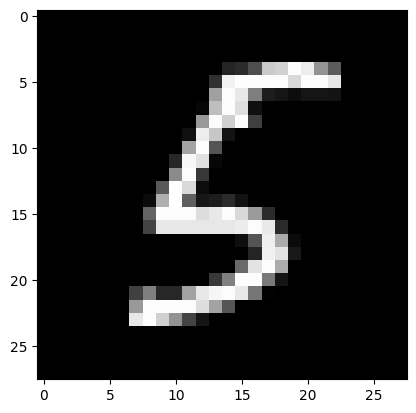

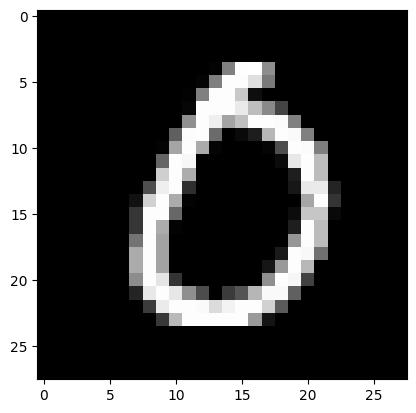

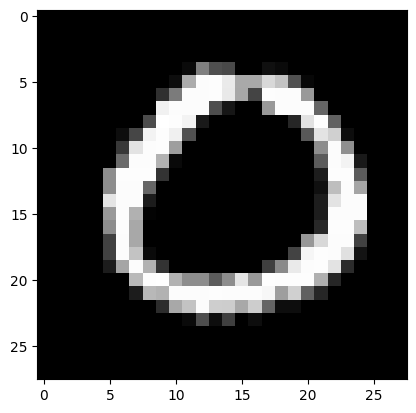

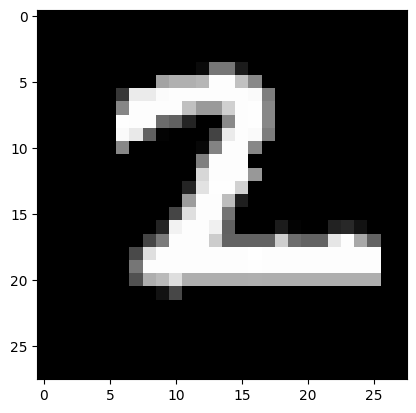

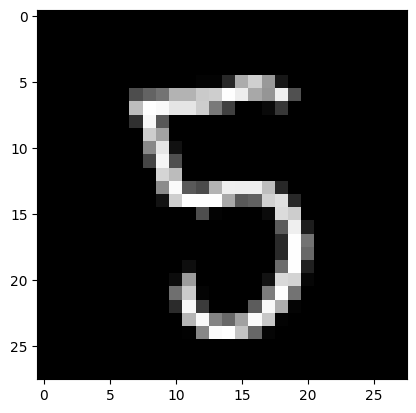

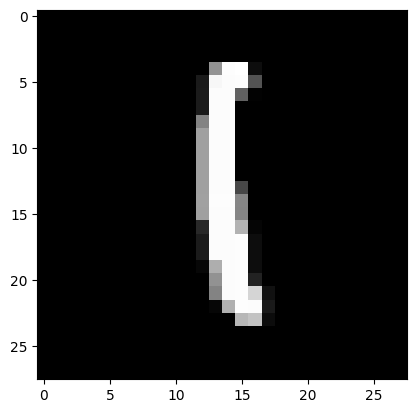

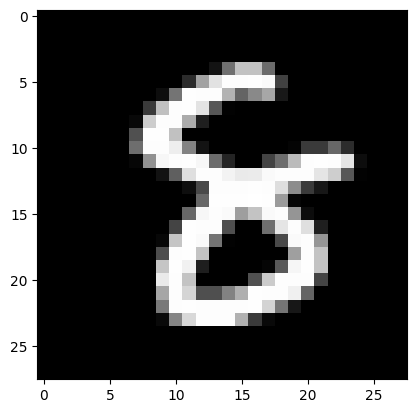

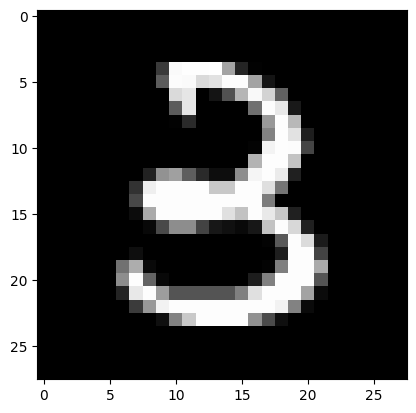

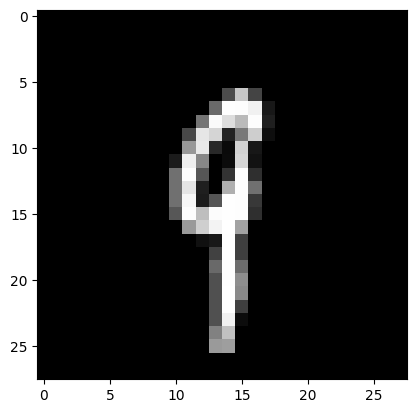

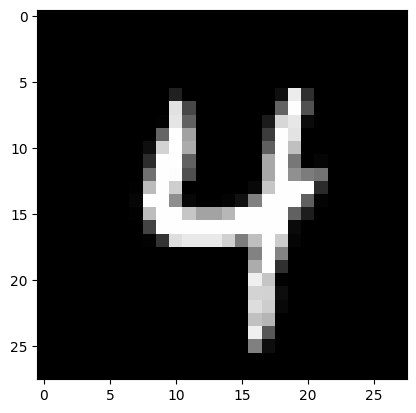

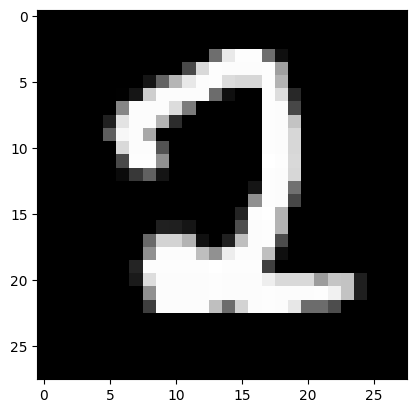

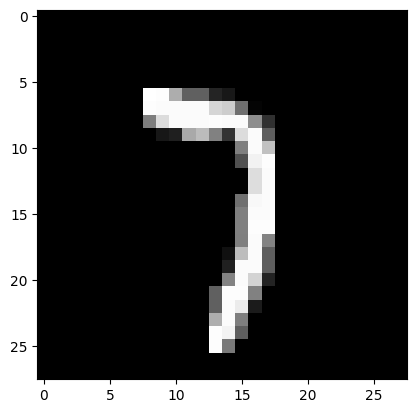

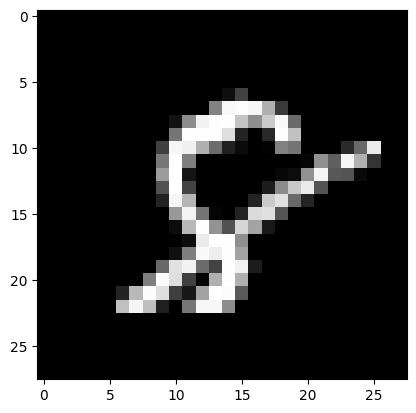

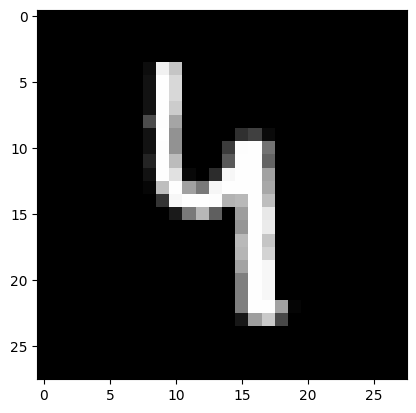

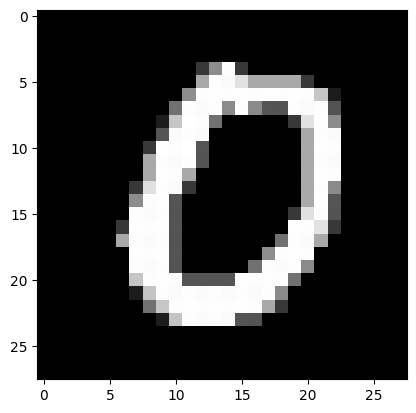

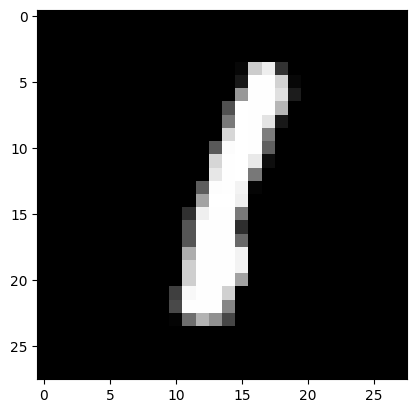

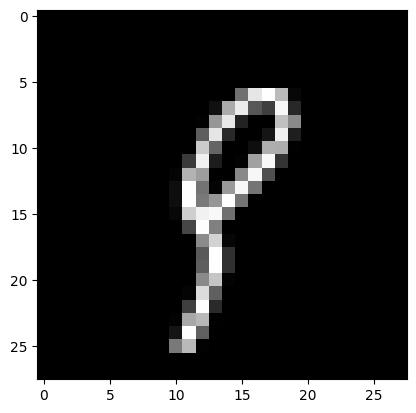

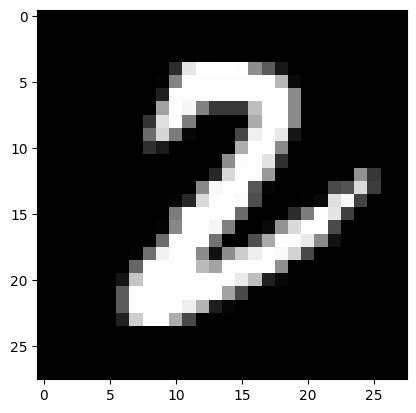

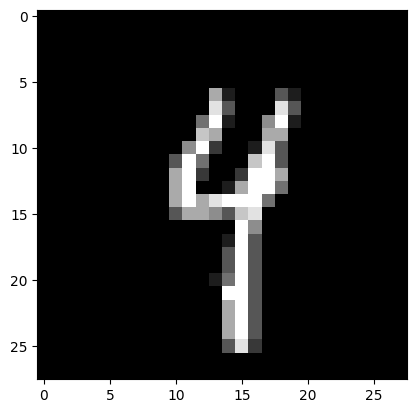

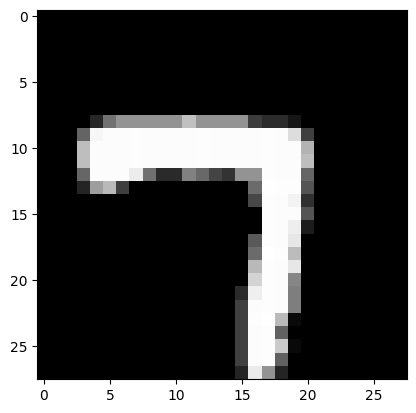

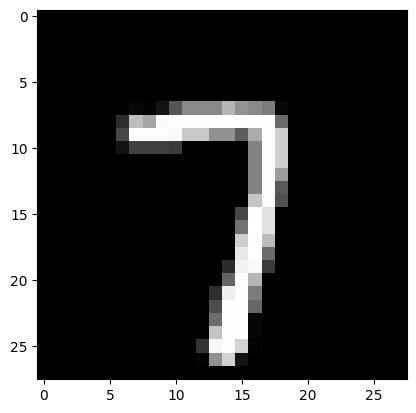

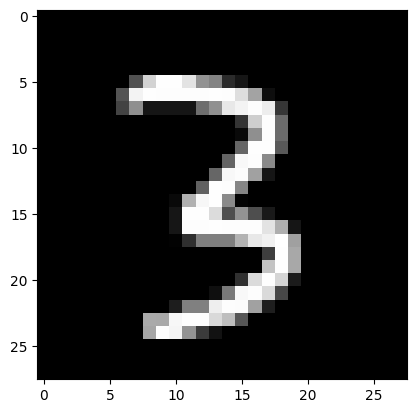

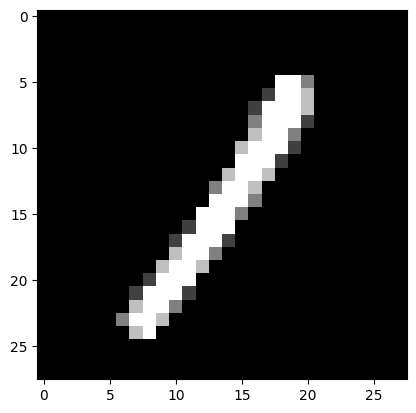

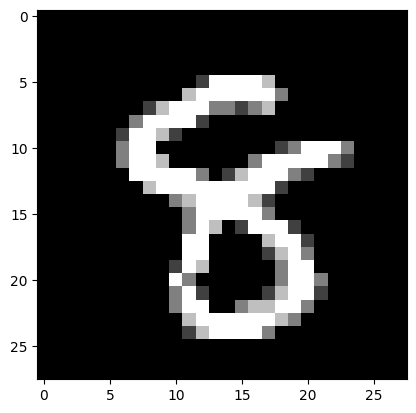

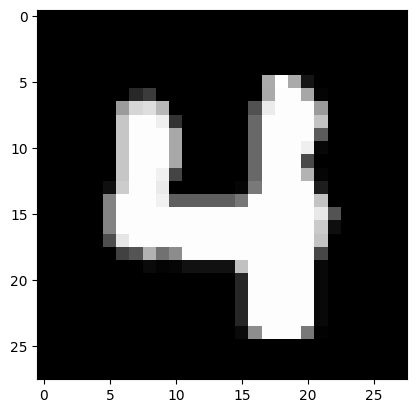

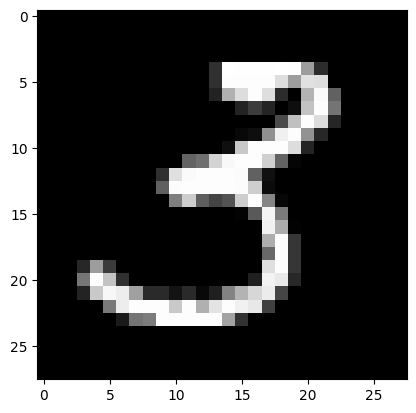

Accuracy of the model on test: 87.46 %
tot loss:  0.7481569647789001
tot loss:  1.3580989241600037
tot loss:  2.0121873021125793
tot loss:  2.6115264296531677
tot loss:  3.203188478946686
tot loss:  3.865150213241577
tot loss:  4.477766394615173
tot loss:  5.132002353668213
tot loss:  5.739463150501251
tot loss:  6.37066513299942
tot loss:  7.033640086650848
tot loss:  7.654787361621857
tot loss:  8.268599808216095
tot loss:  8.941077053546906
tot loss:  9.583050847053528
tot loss:  10.243727445602417
tot loss:  10.85241311788559
tot loss:  11.50688511133194
tot loss:  12.074795007705688
tot loss:  12.713362157344818
tot loss:  13.2949720621109
tot loss:  13.968187689781189
tot loss:  14.580698311328888
tot loss:  15.207586944103241
tot loss:  15.861962974071503
tot loss:  16.478348076343536
tot loss:  17.11829137802124
tot loss:  17.803857624530792
tot loss:  18.44149959087372
tot loss:  19.121205270290375
tot loss:  19.751061618328094
tot loss:  20.44561803340912
tot loss:  21.210780

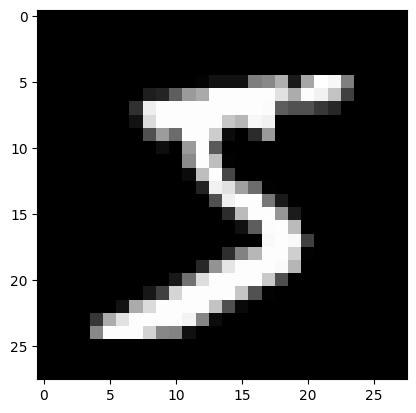

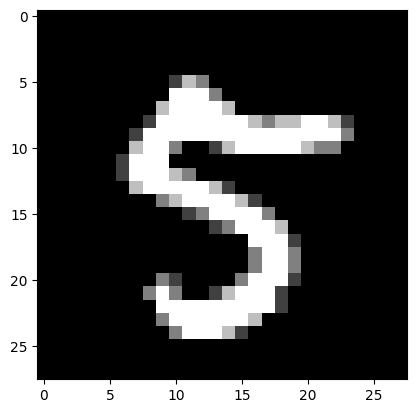

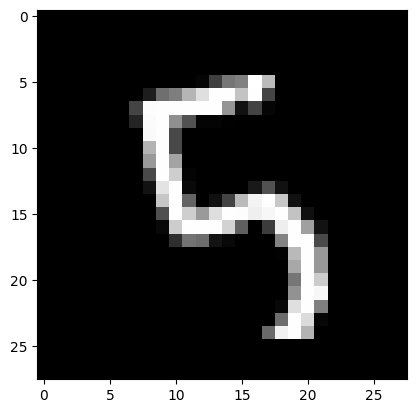

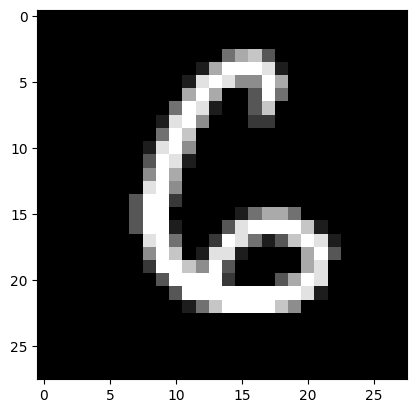

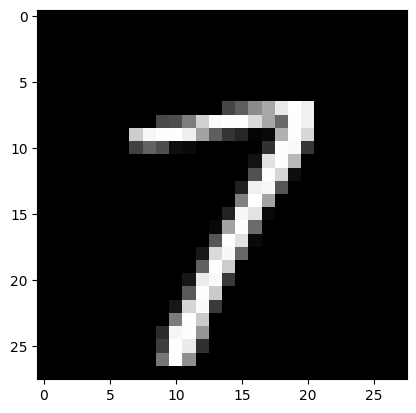

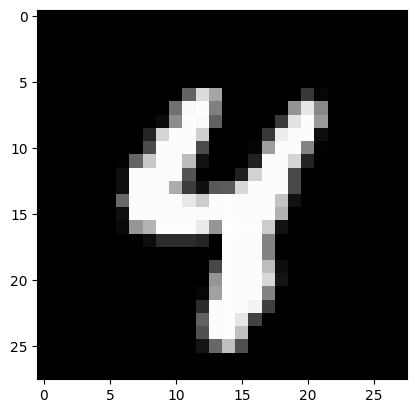

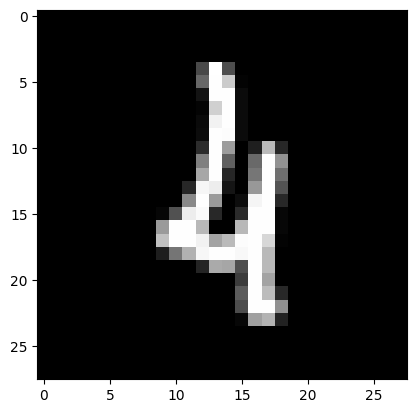

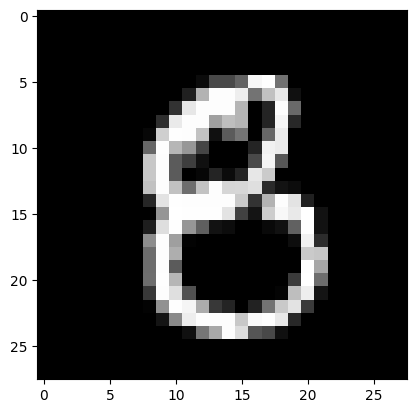

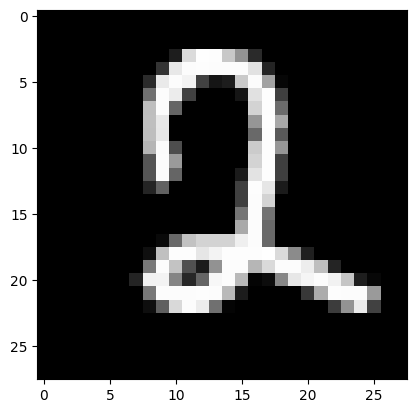

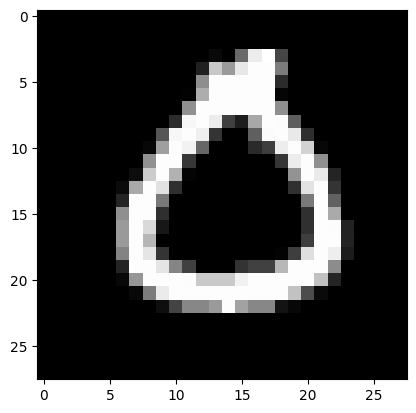

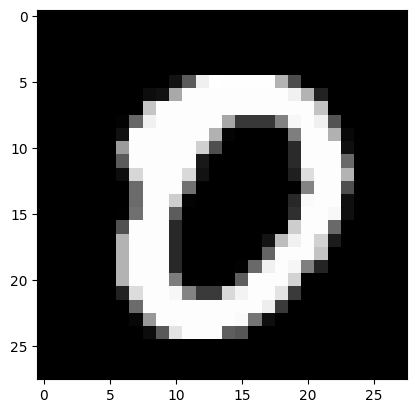

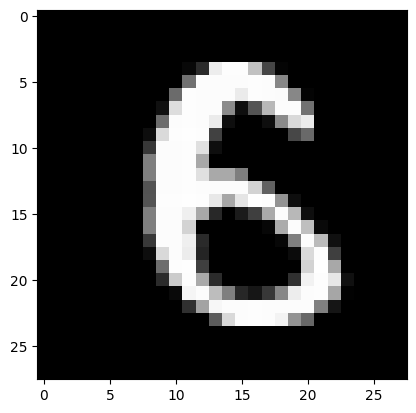

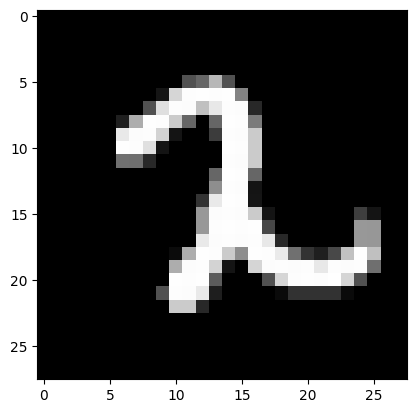

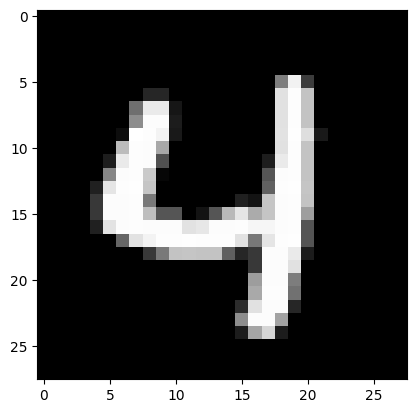

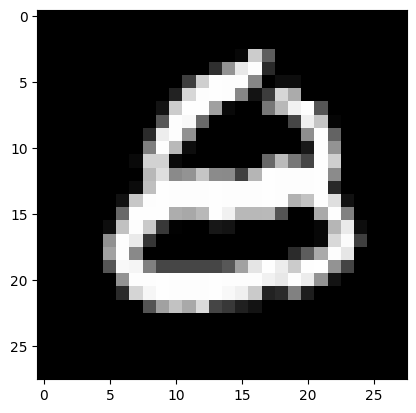

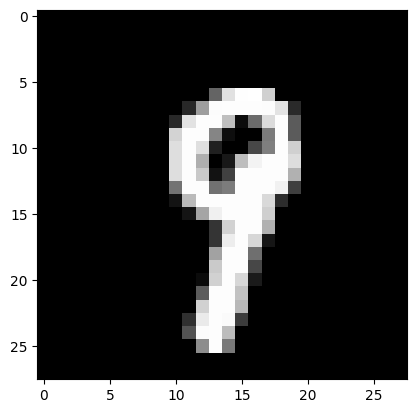

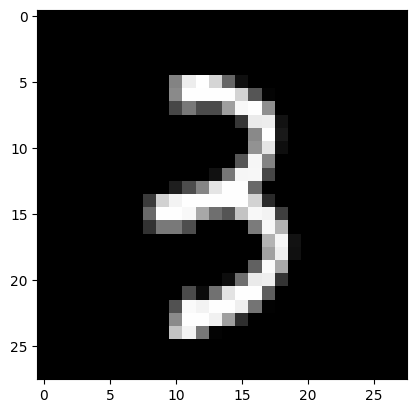

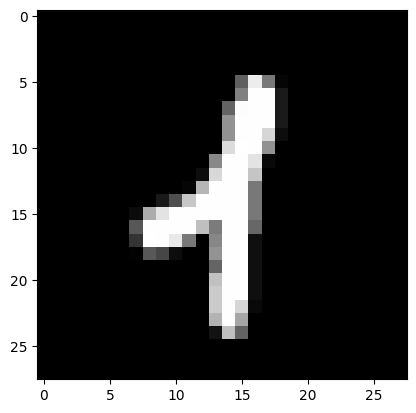

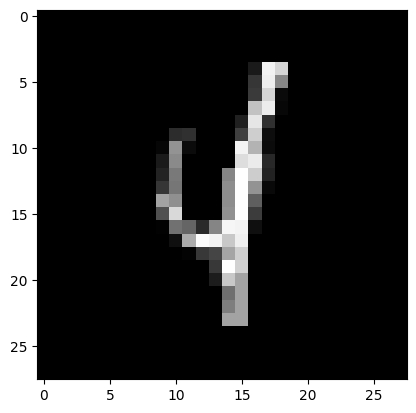

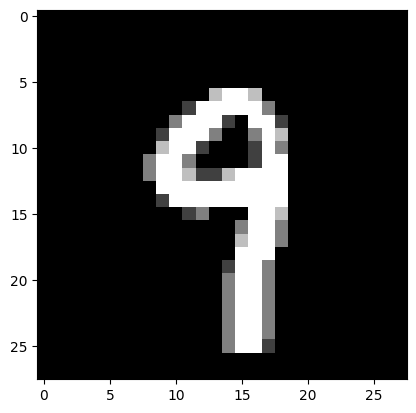

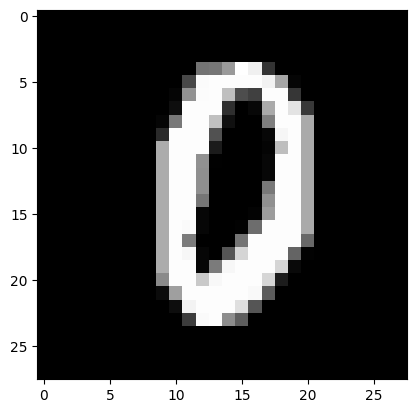

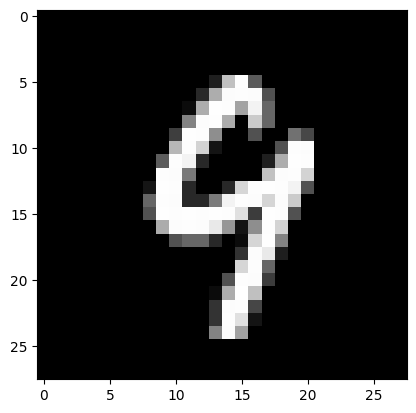

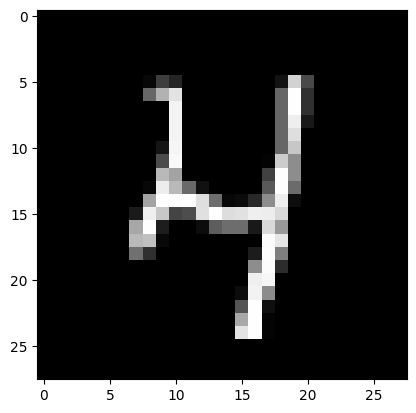

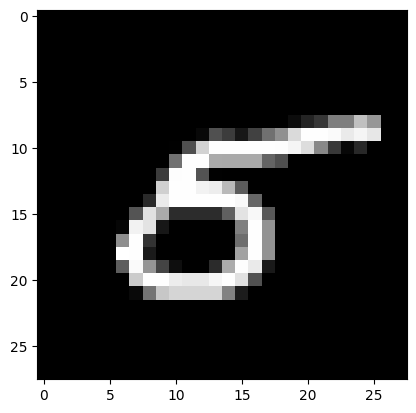

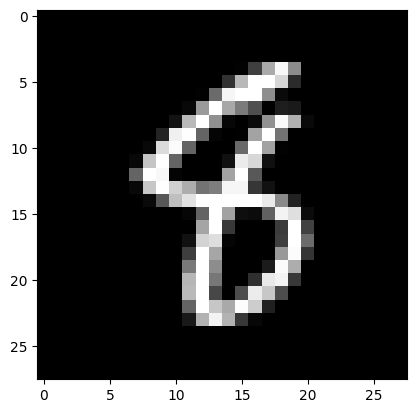

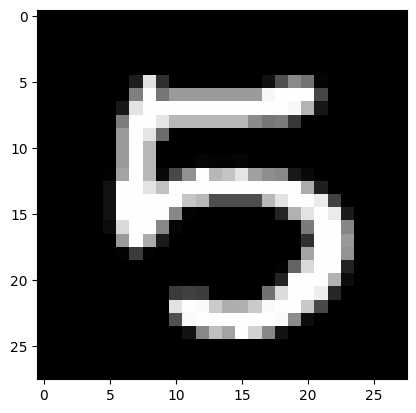

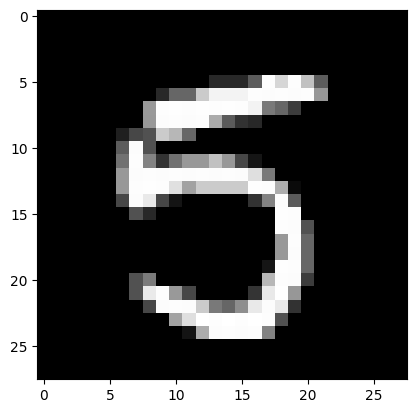

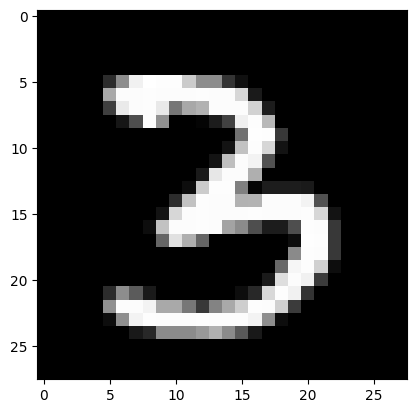

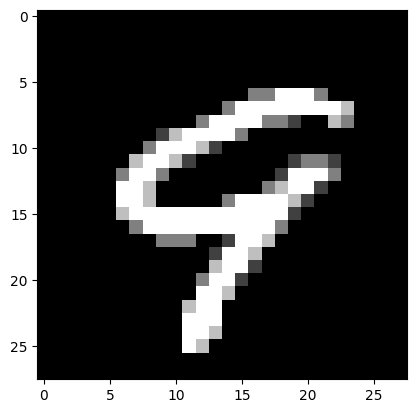

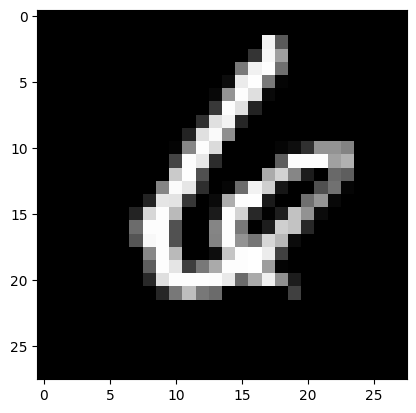

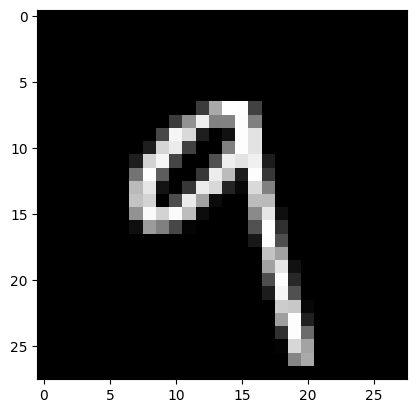

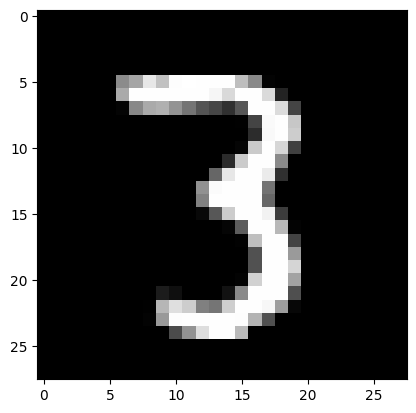

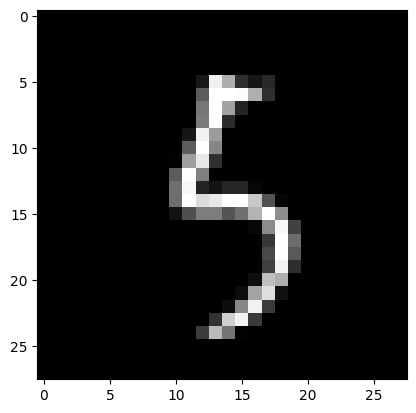

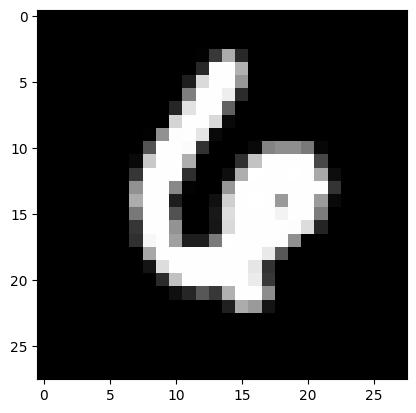

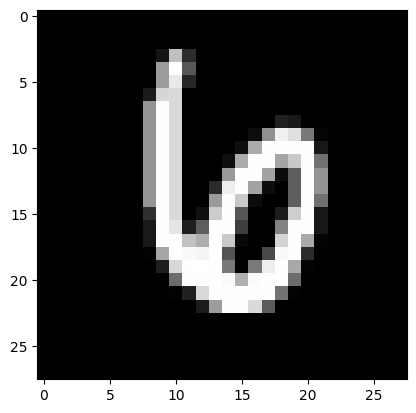

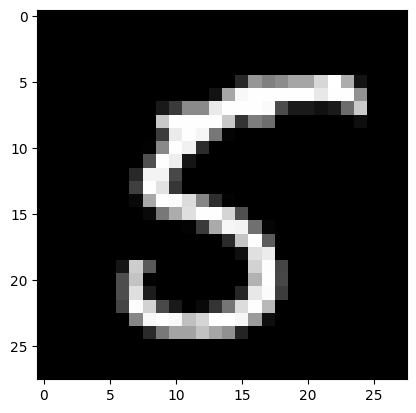

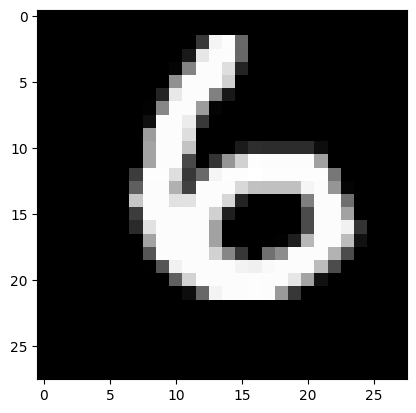

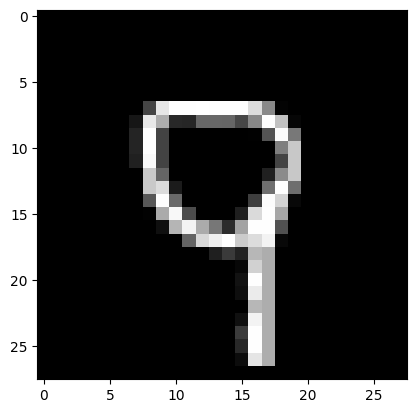

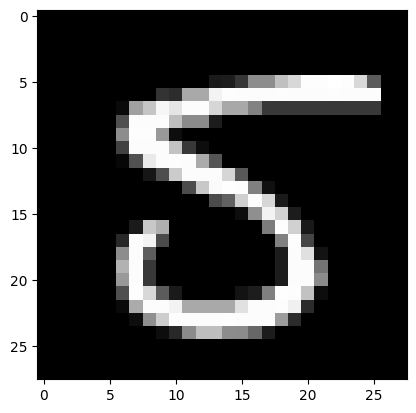

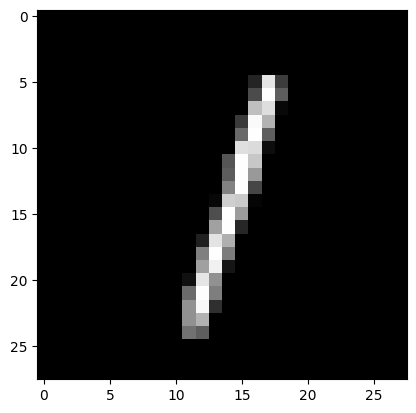

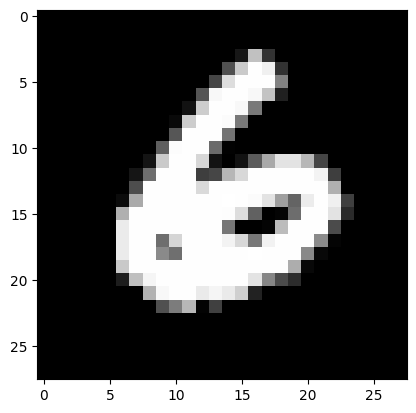

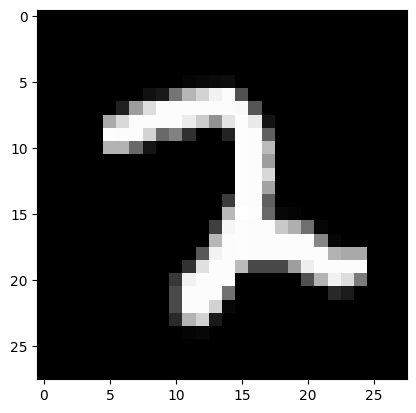

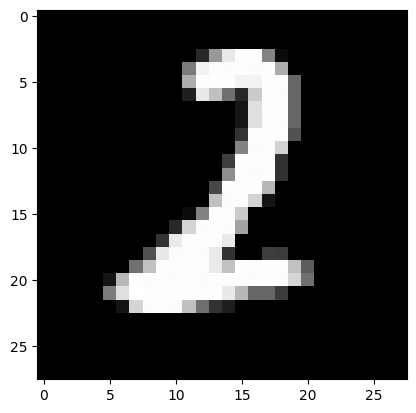

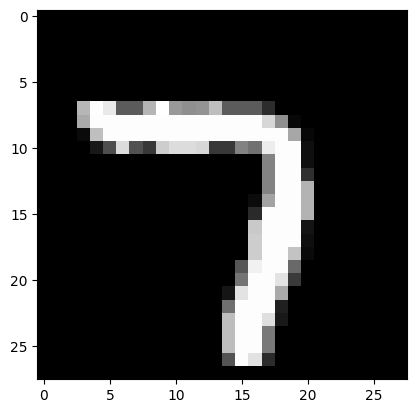

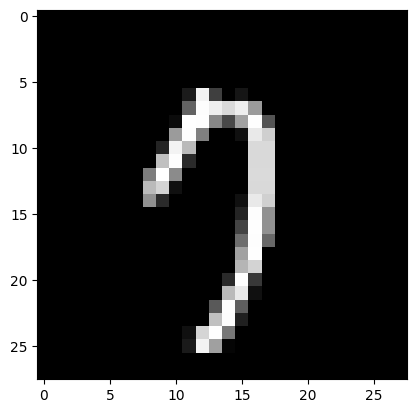

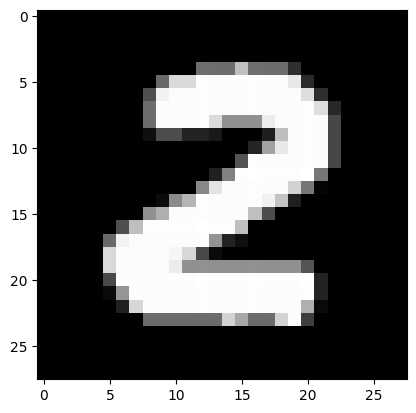

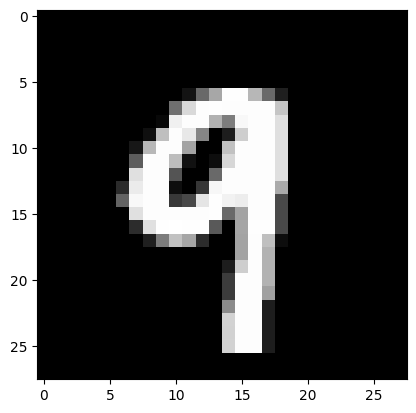

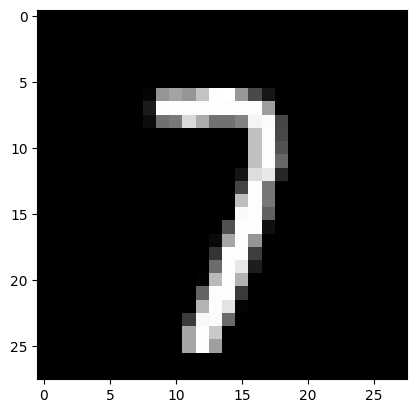

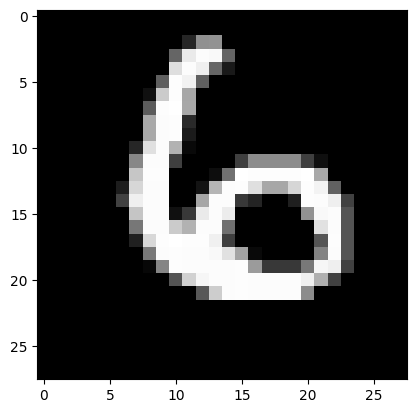

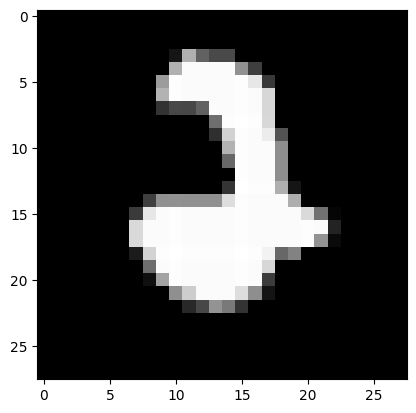

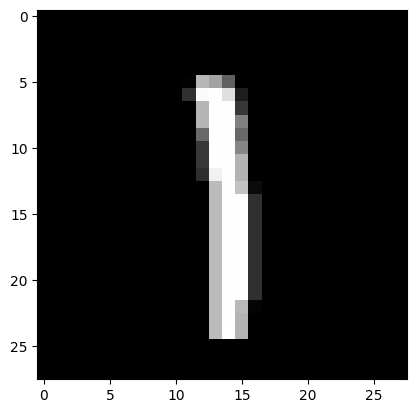

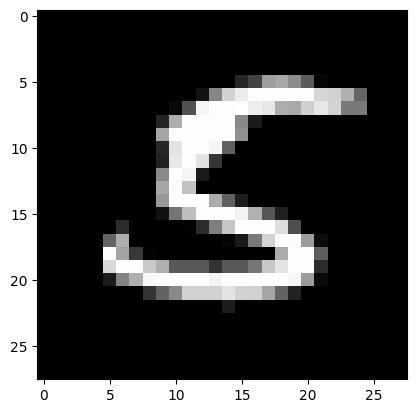

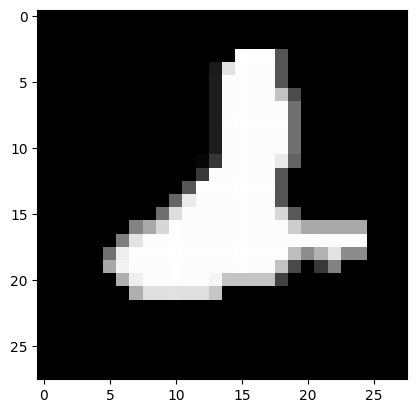

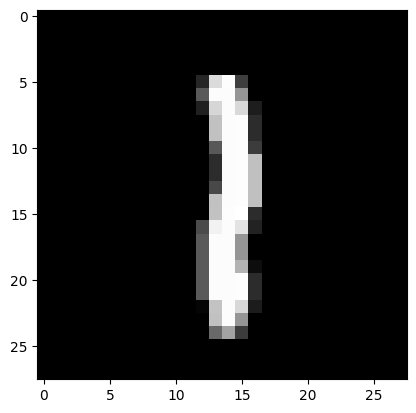

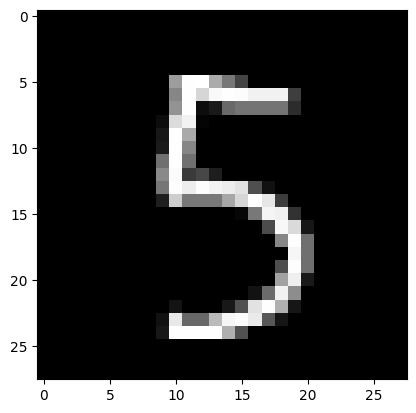

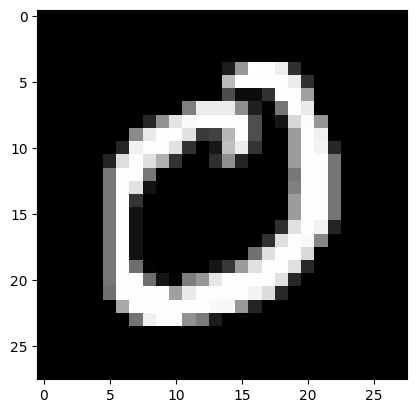

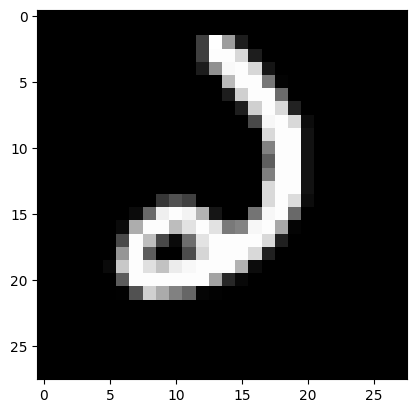

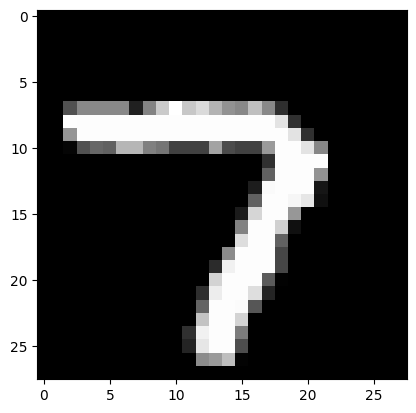

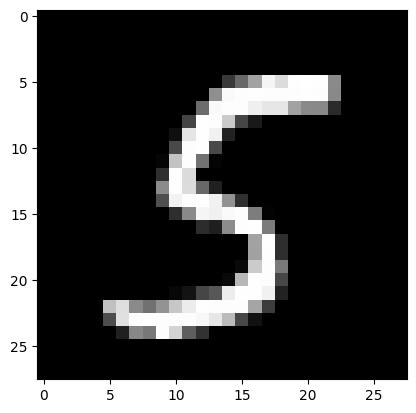

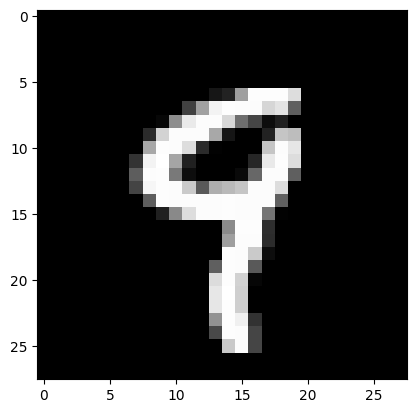

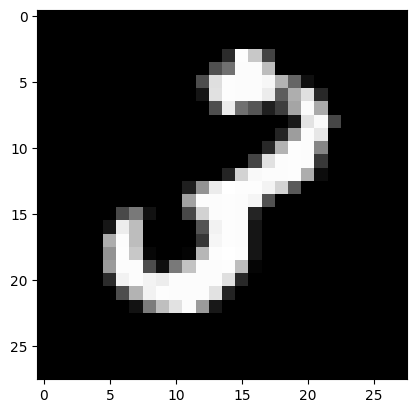

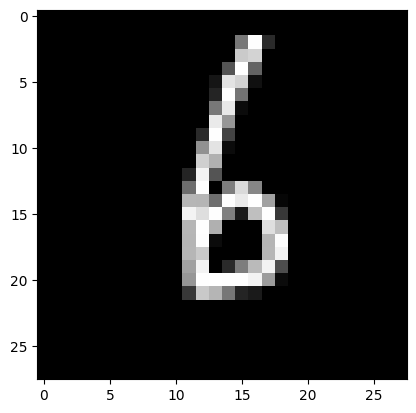

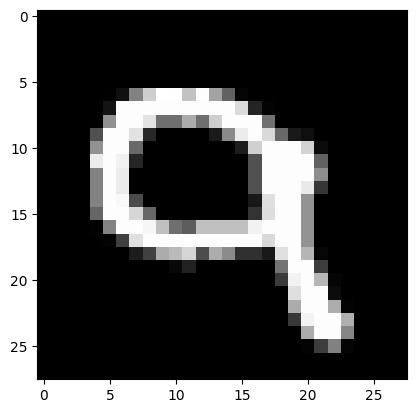

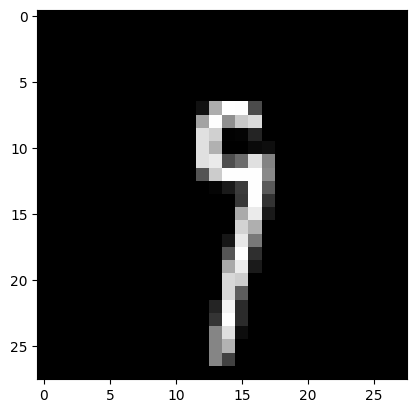

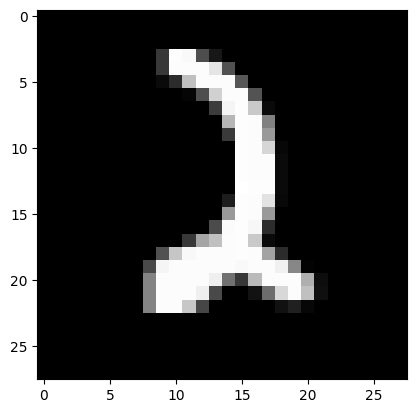

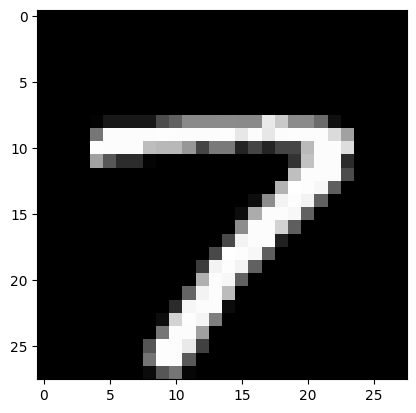

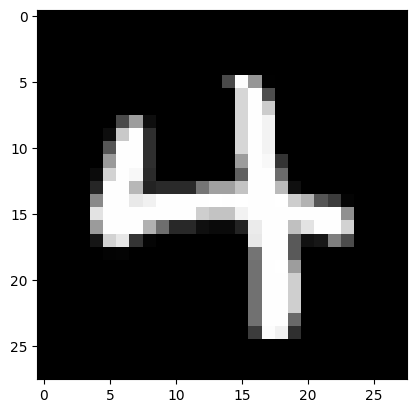

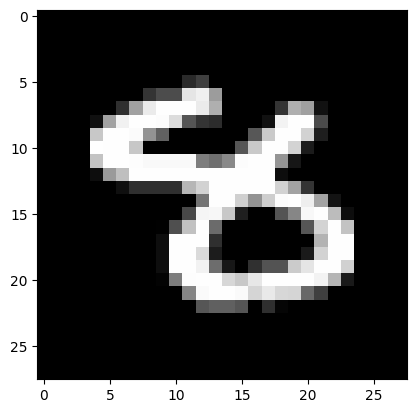

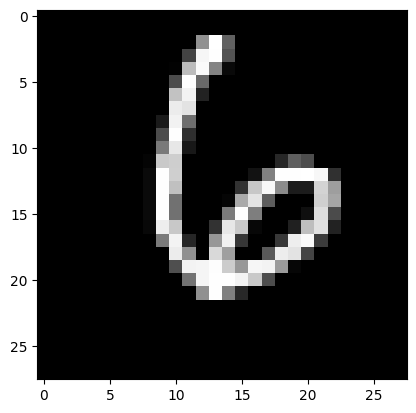

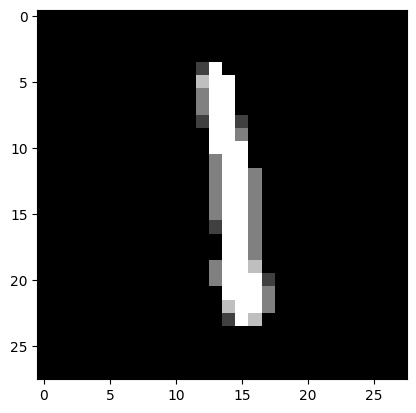

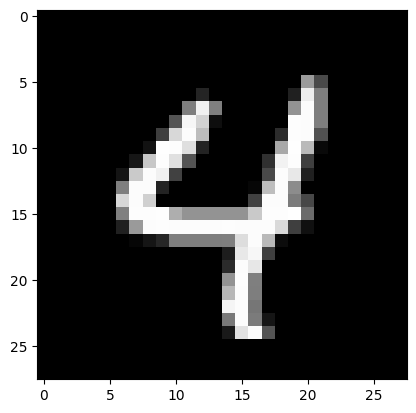

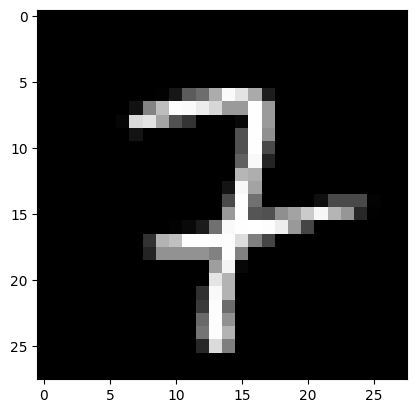

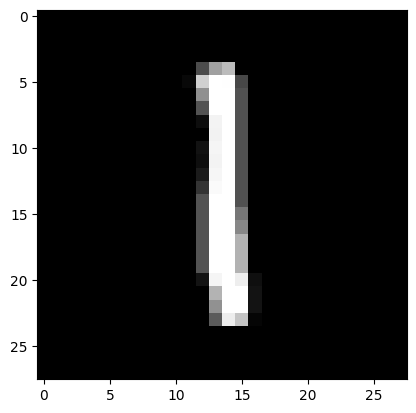

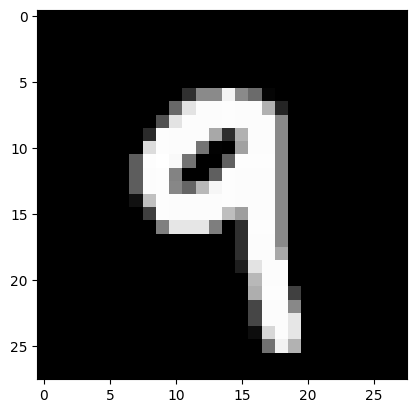

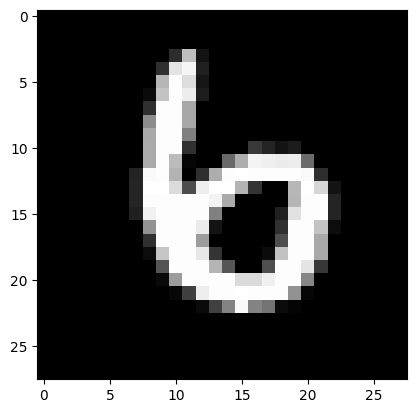

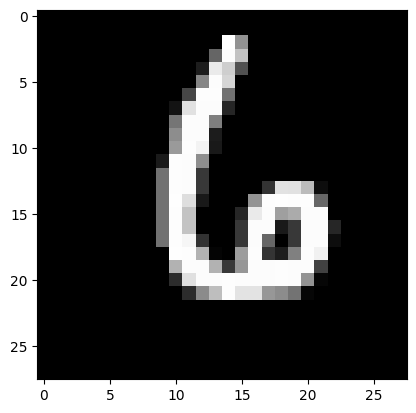

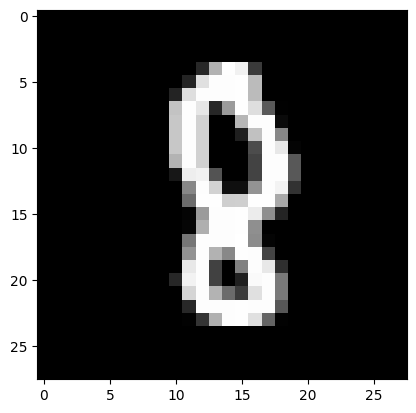

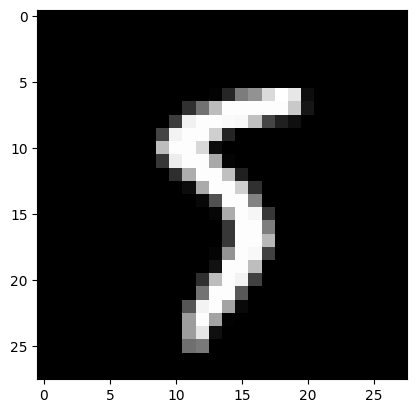

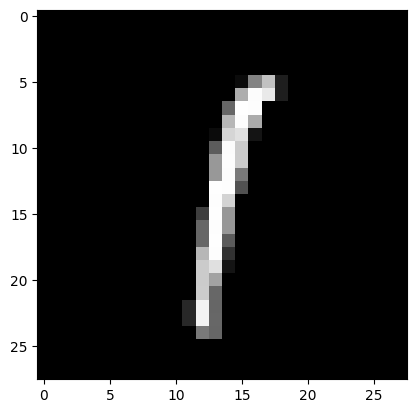

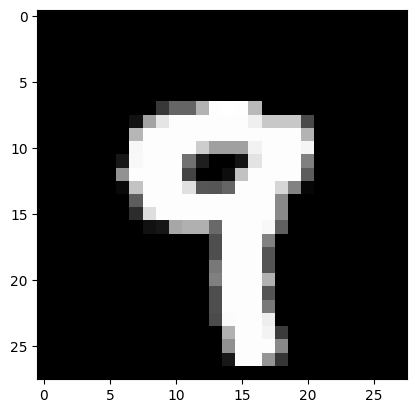

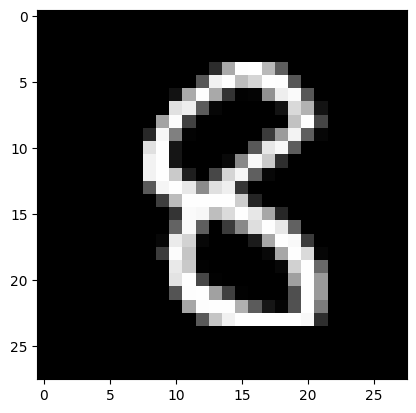

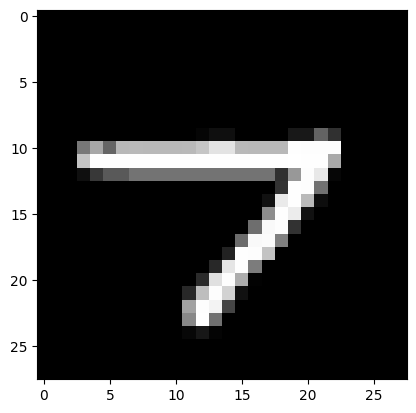

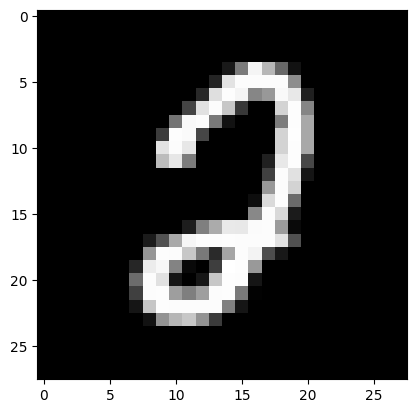

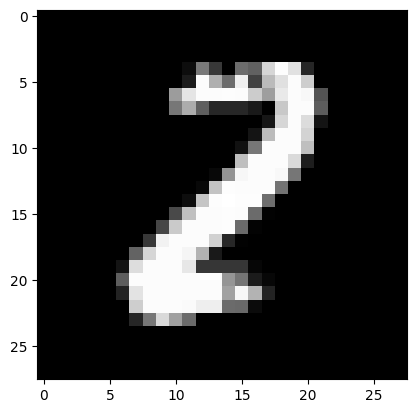

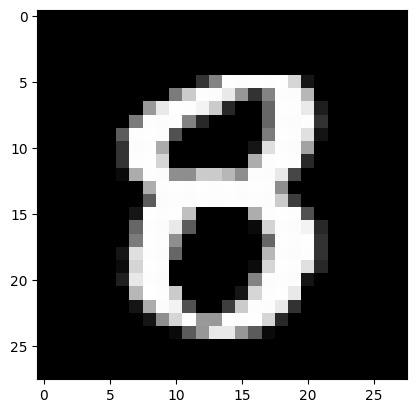

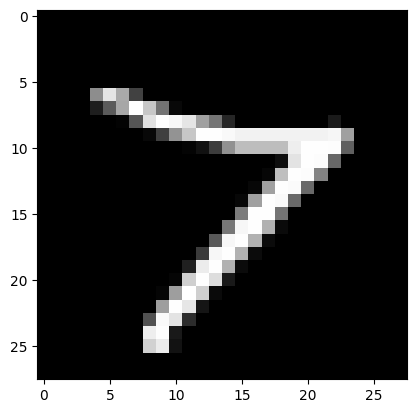

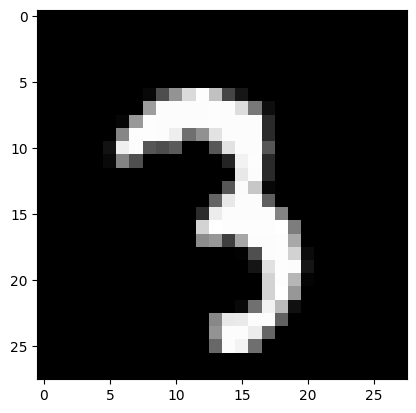

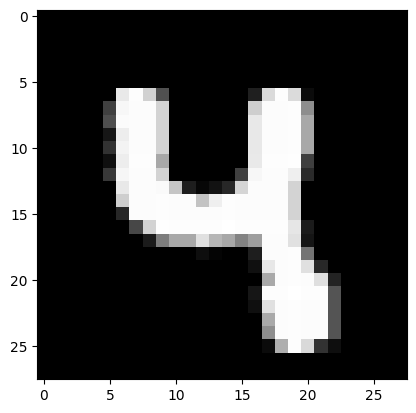

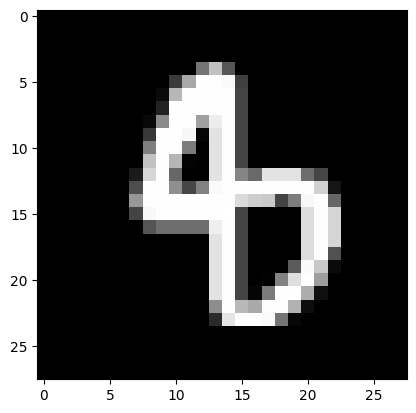

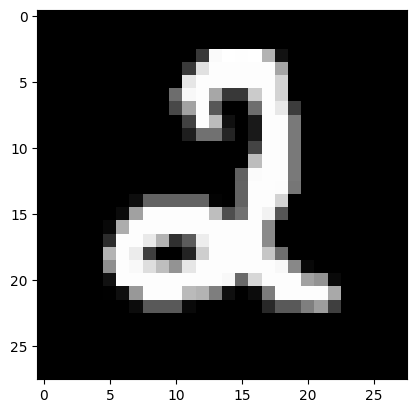

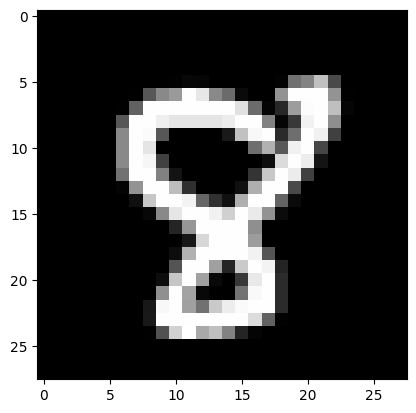

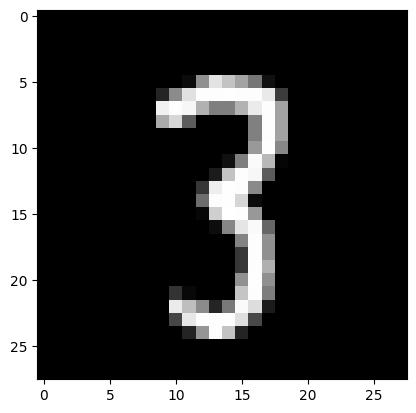

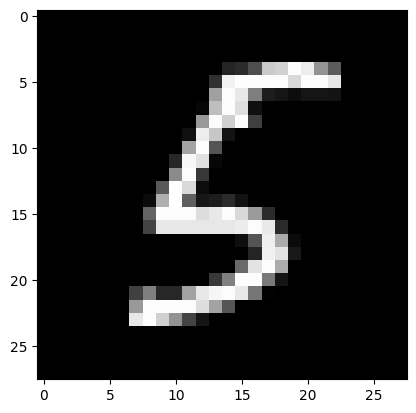

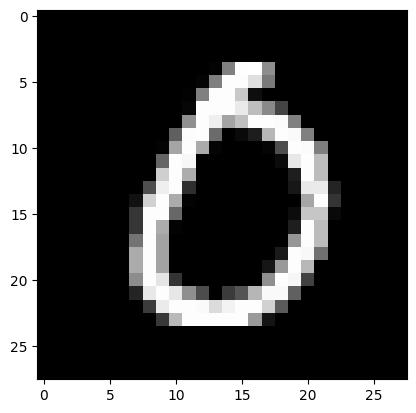

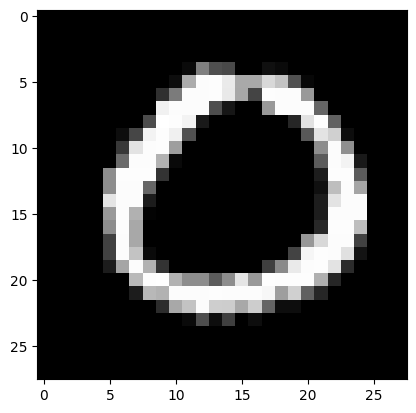

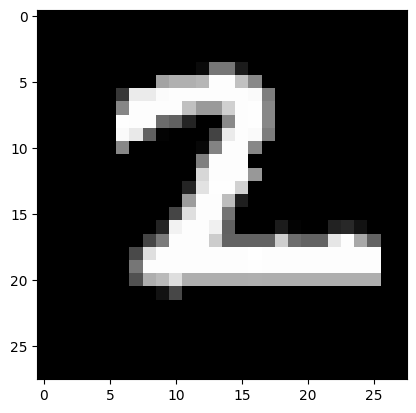

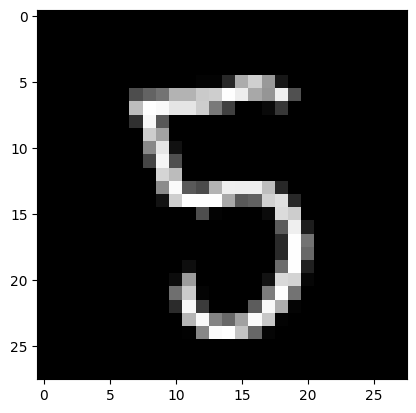

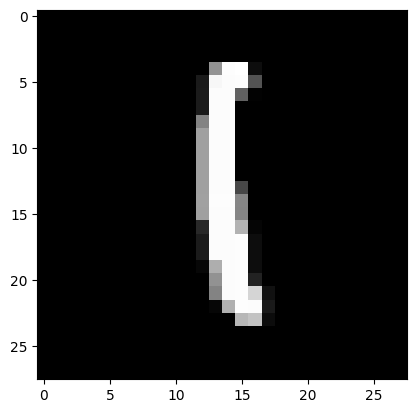

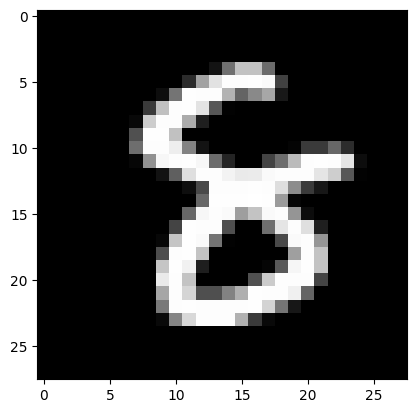

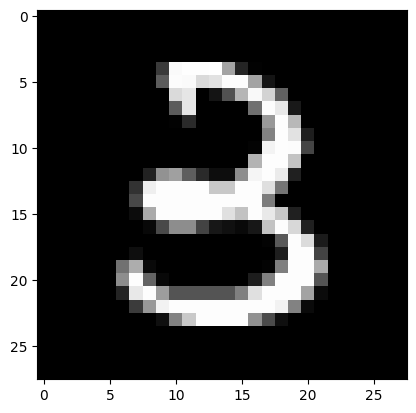

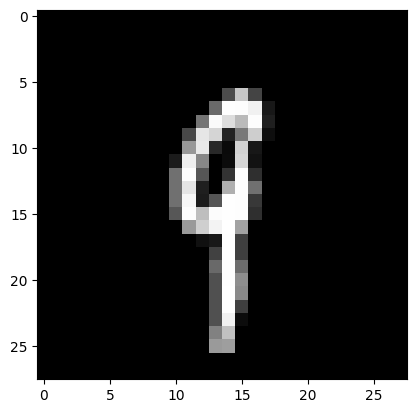

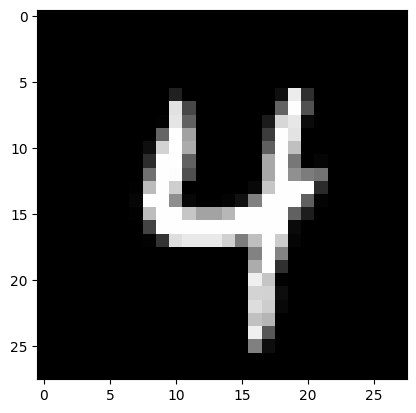

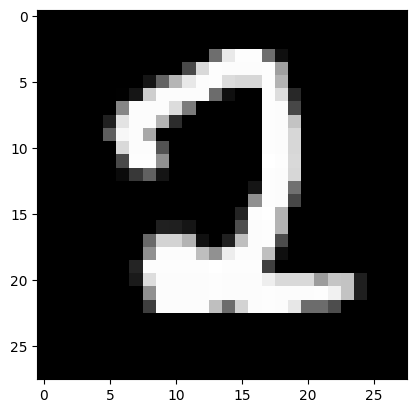

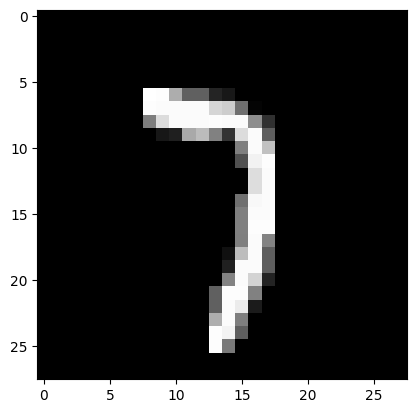

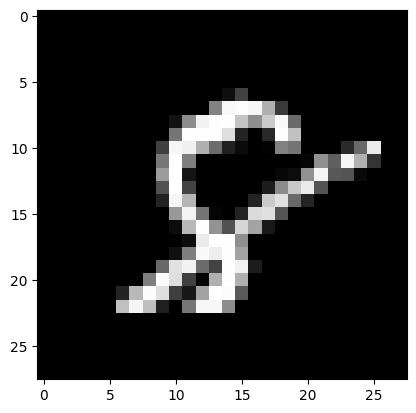

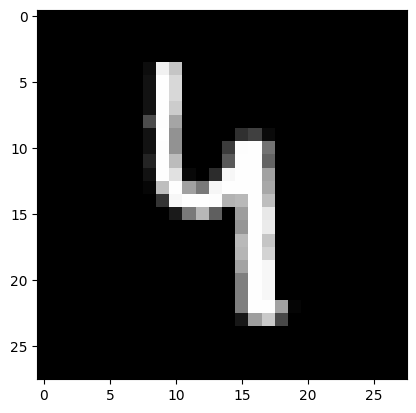

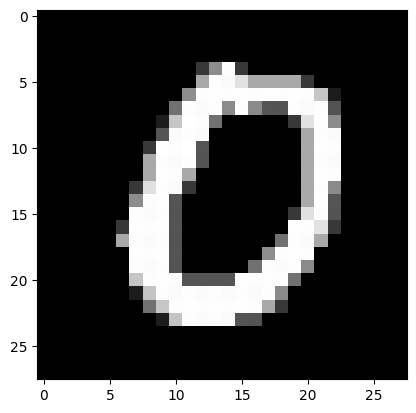

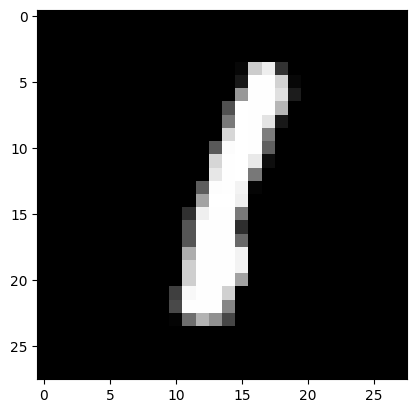

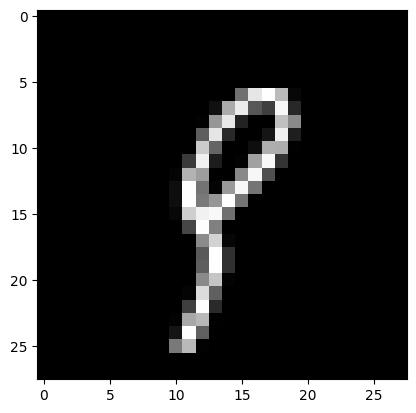

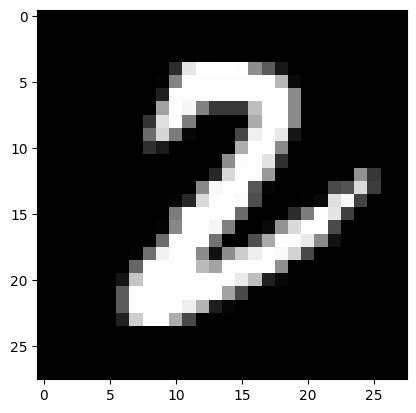

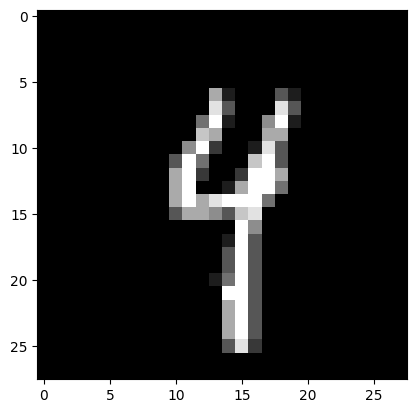

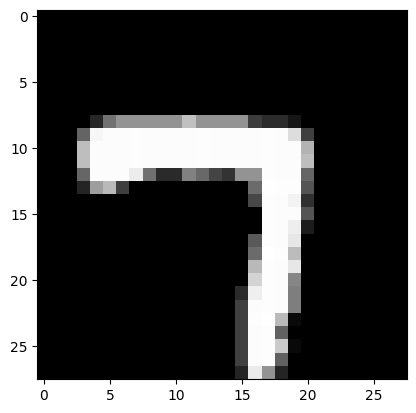

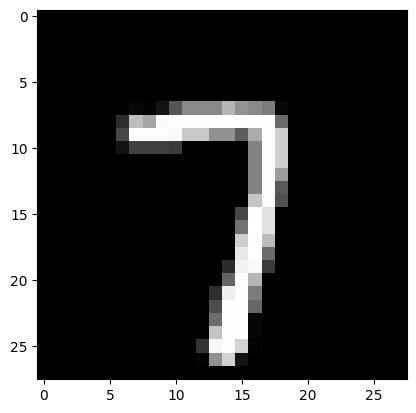

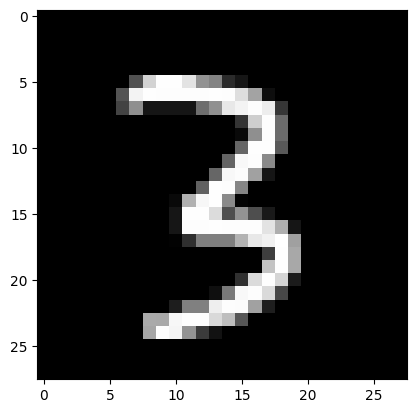

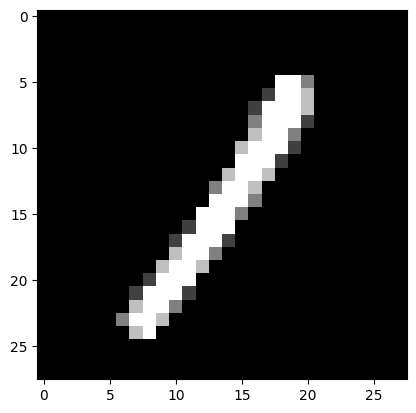

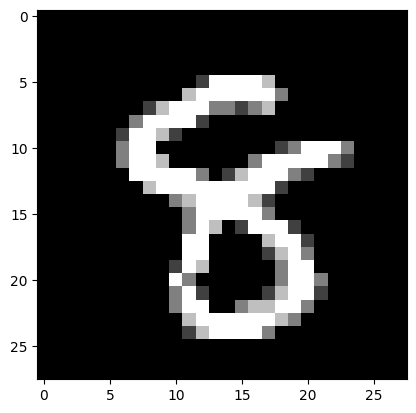

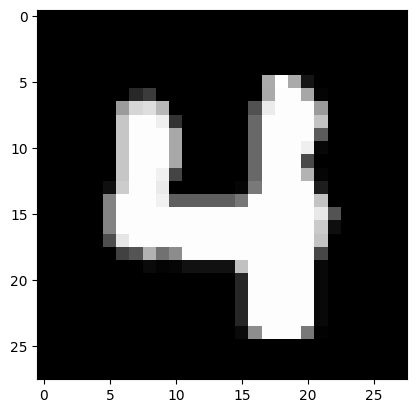

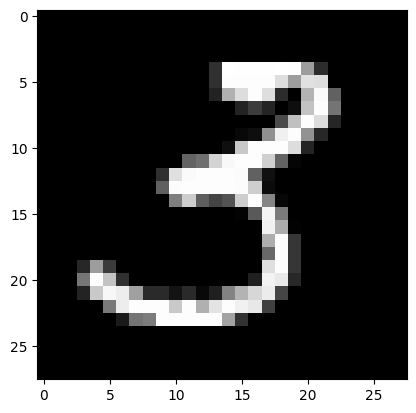

Accuracy of the model on test: 88.01 %
tot loss:  0.6357872486114502
tot loss:  1.3205428719520569
tot loss:  1.9736045002937317
tot loss:  2.5719926357269287
tot loss:  3.172701418399811
tot loss:  3.8278865218162537
tot loss:  4.496653378009796
tot loss:  5.193285763263702
tot loss:  5.8691710233688354
tot loss:  6.595295667648315
tot loss:  7.272882282733917
tot loss:  8.03076982498169
tot loss:  8.685689806938171
tot loss:  9.282468676567078
tot loss:  9.932269811630249
tot loss:  10.530091881752014
tot loss:  11.126026332378387
tot loss:  11.722211003303528
tot loss:  12.352025806903839
tot loss:  12.940864622592926
tot loss:  13.562113463878632
tot loss:  14.21015053987503
tot loss:  14.829052209854126
tot loss:  15.434123635292053
tot loss:  16.045250296592712
tot loss:  16.658175945281982
tot loss:  17.2644385099411
tot loss:  17.89852261543274
tot loss:  18.53317904472351
tot loss:  19.196563124656677
tot loss:  19.830583333969116
tot loss:  20.501372039318085
tot loss:  21.17

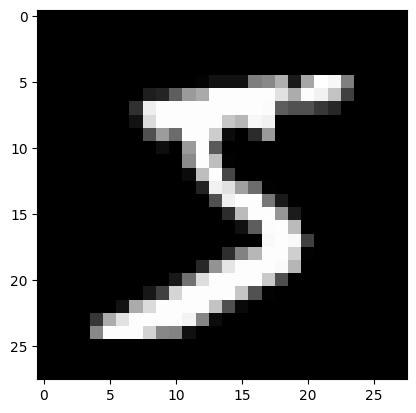

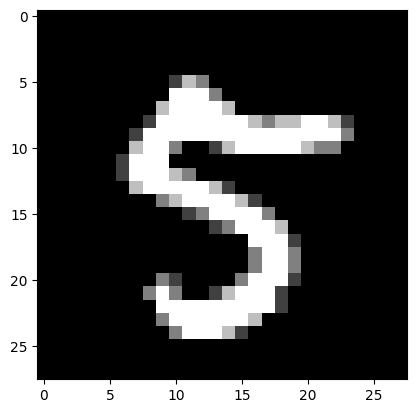

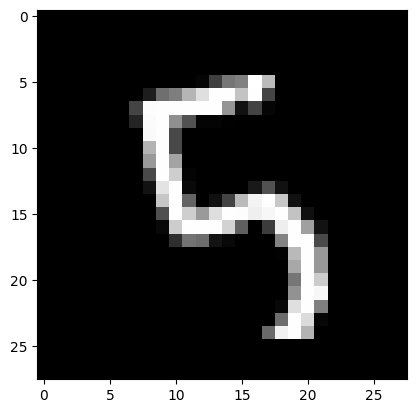

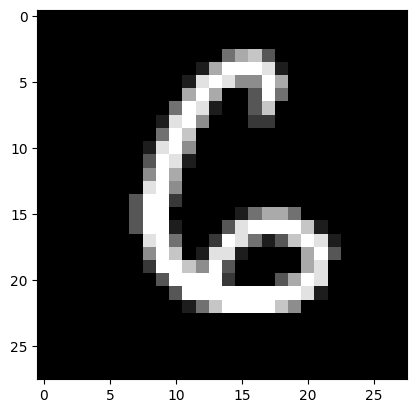

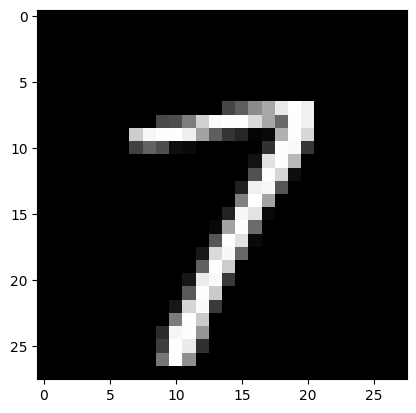

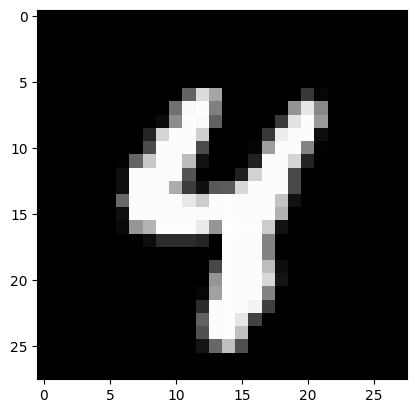

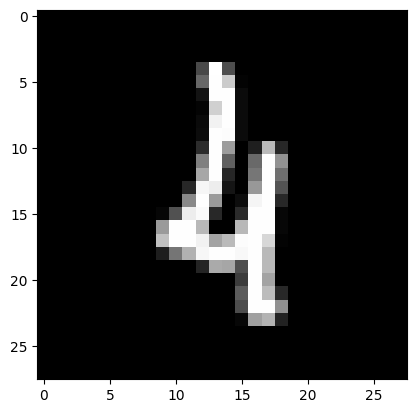

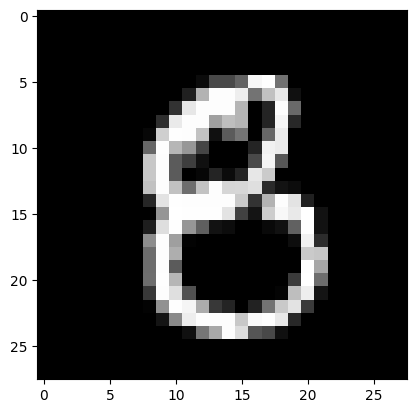

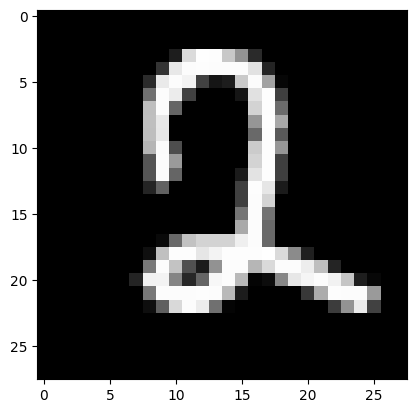

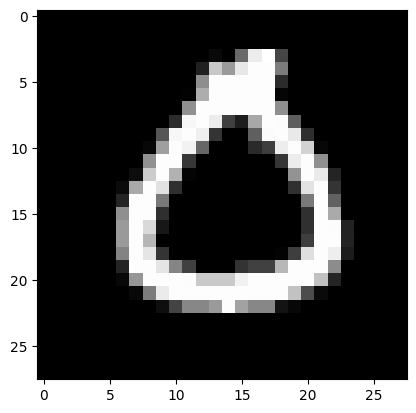

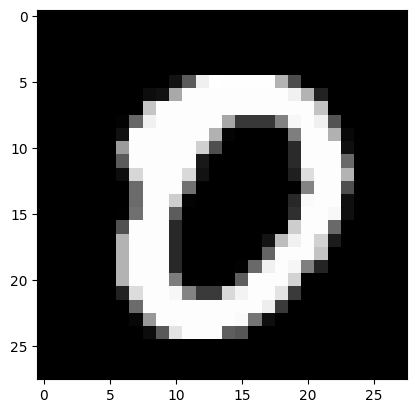

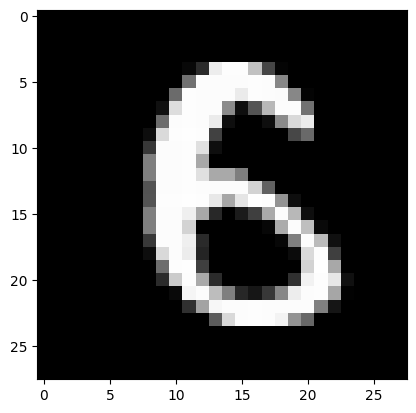

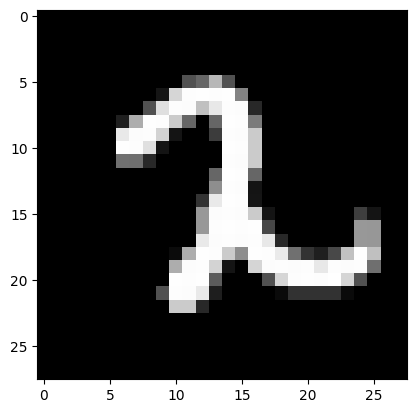

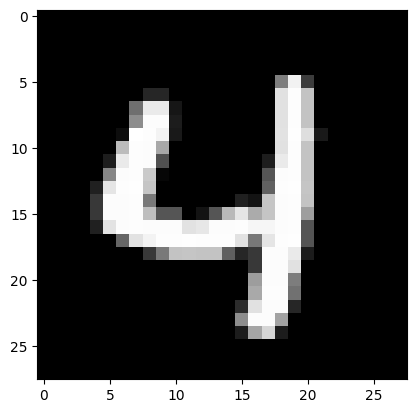

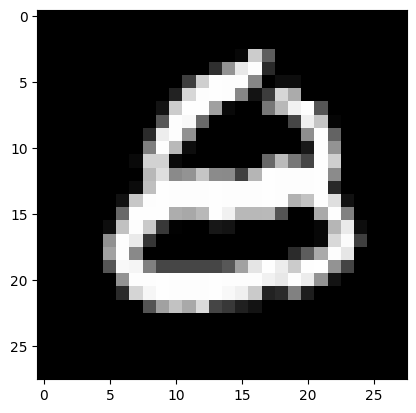

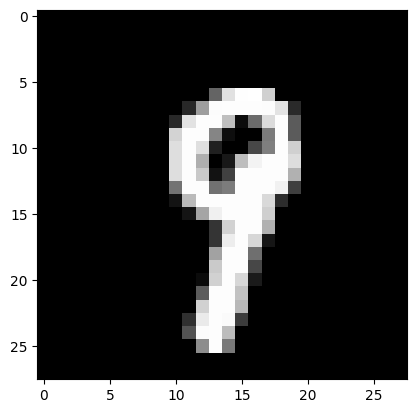

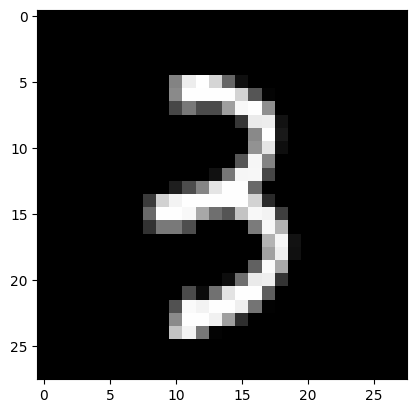

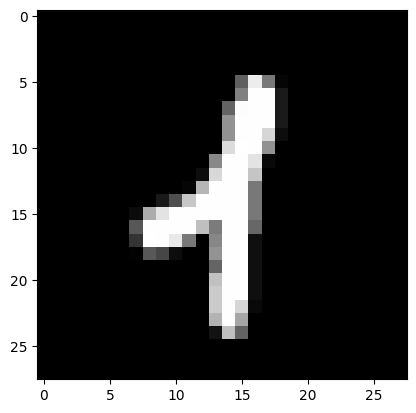

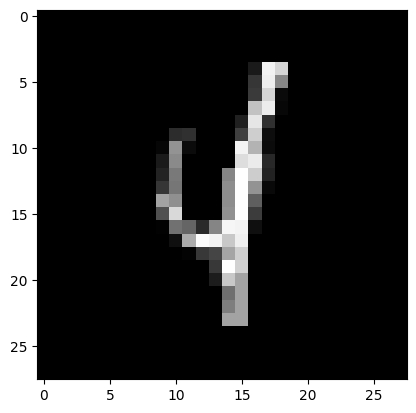

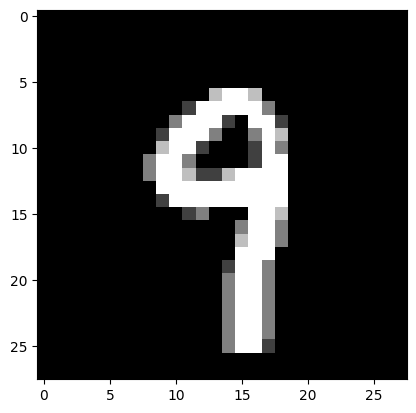

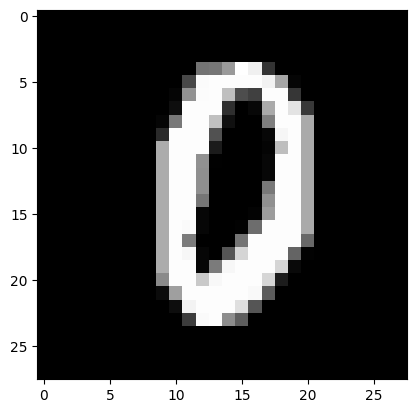

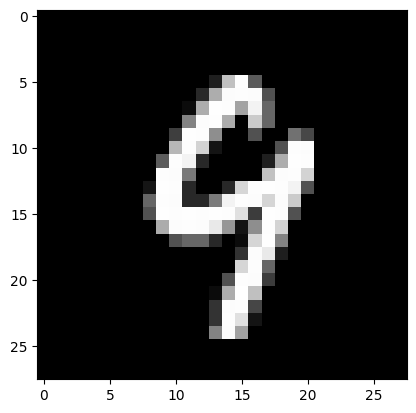

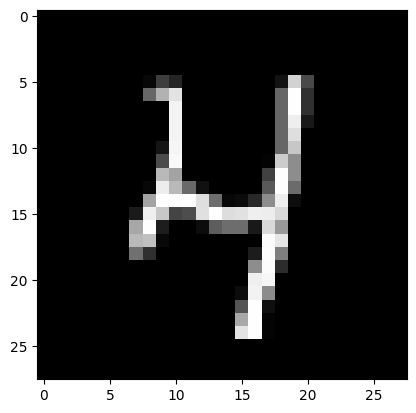

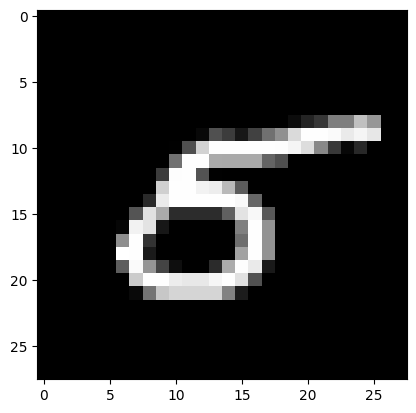

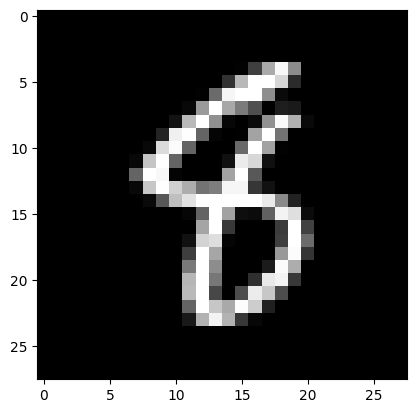

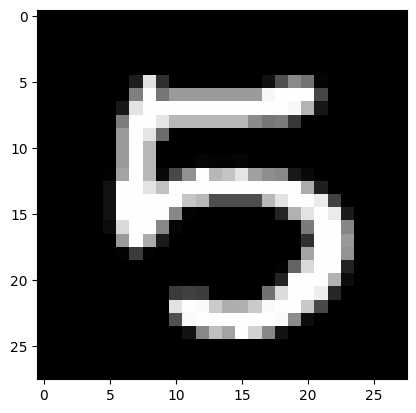

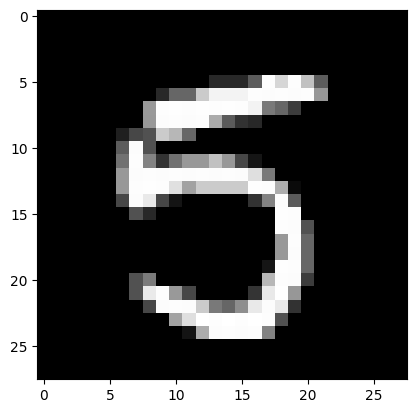

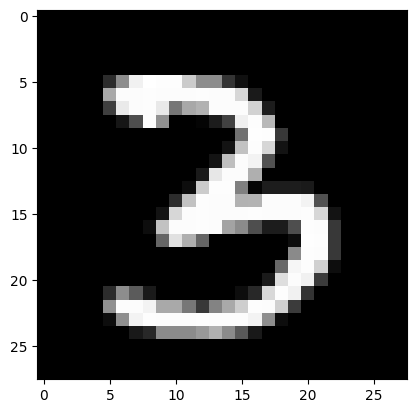

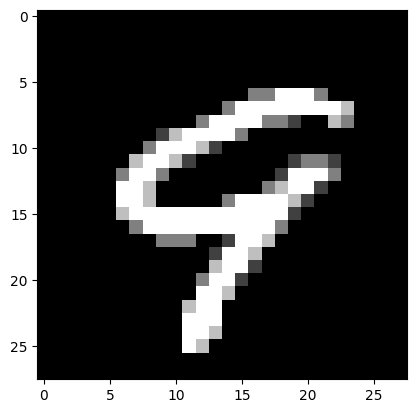

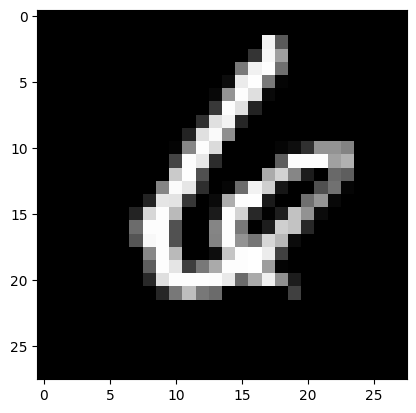

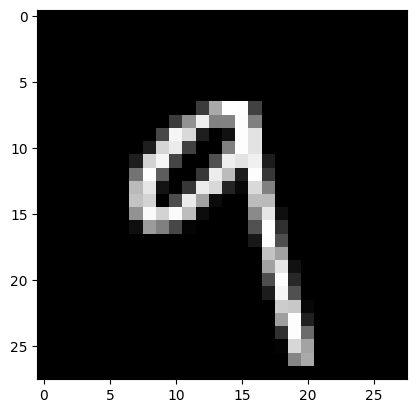

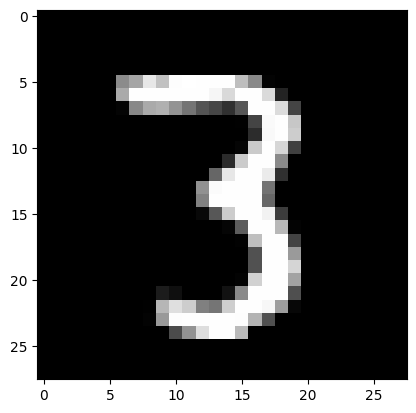

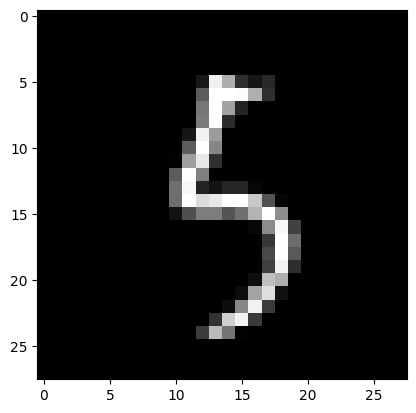

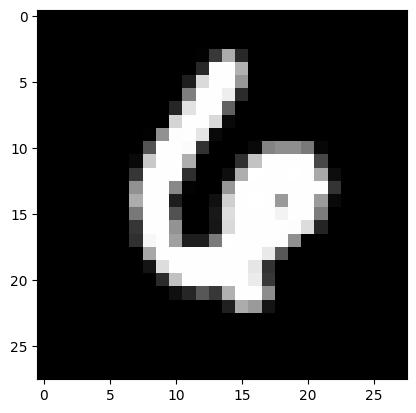

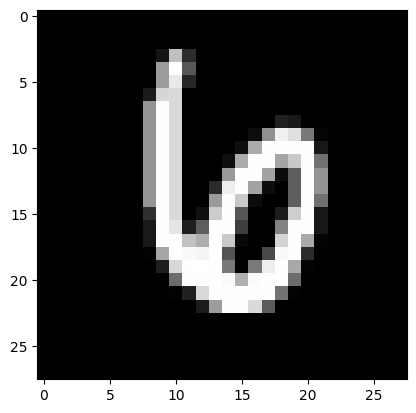

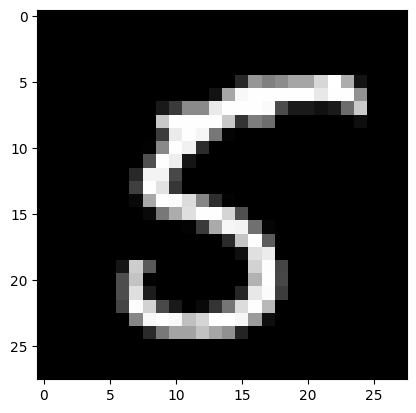

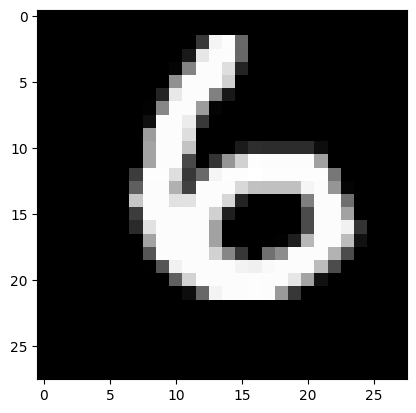

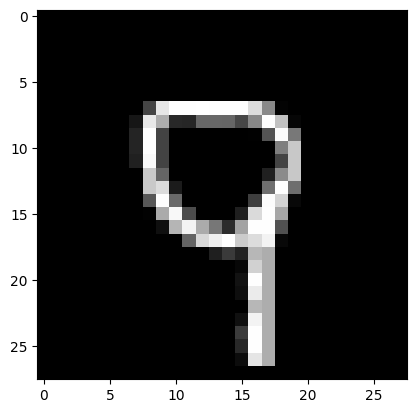

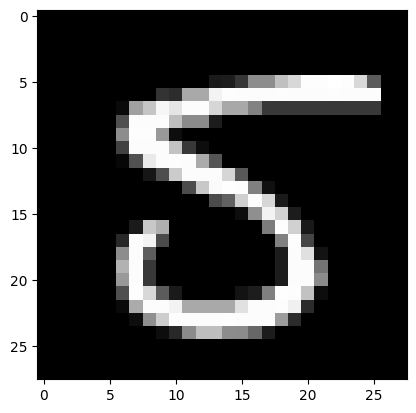

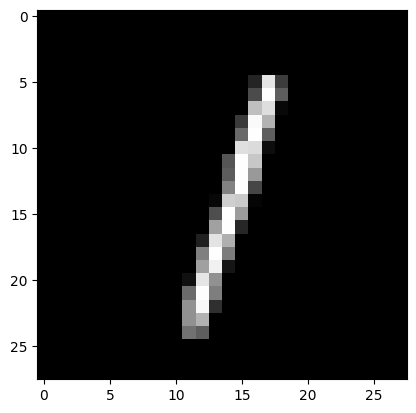

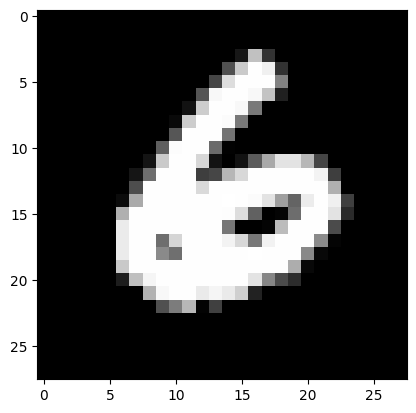

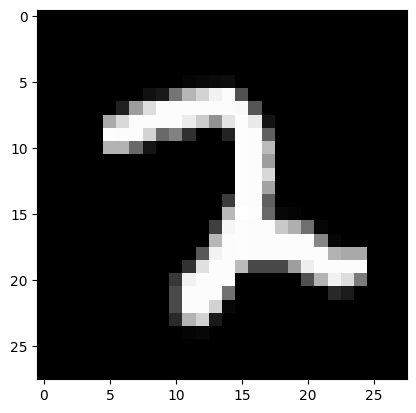

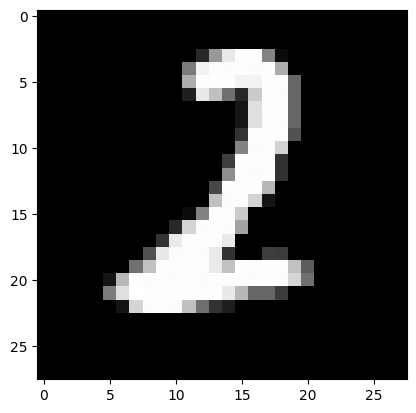

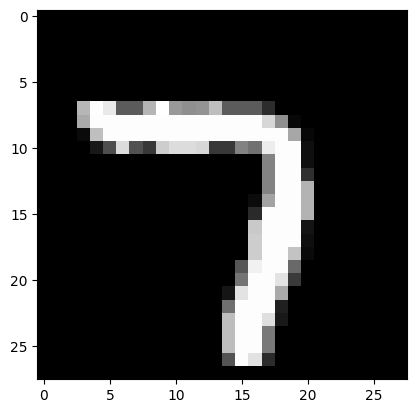

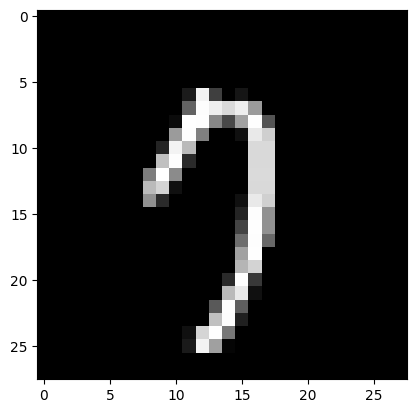

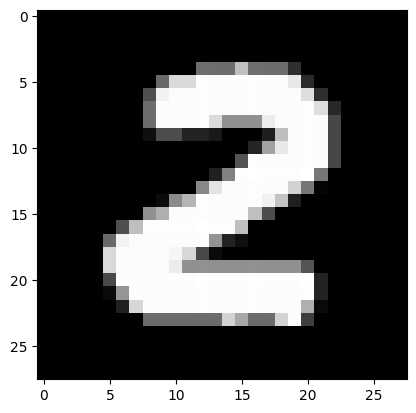

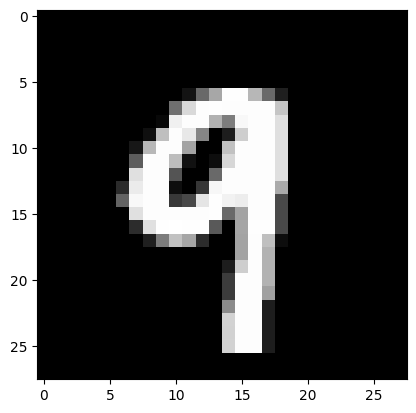

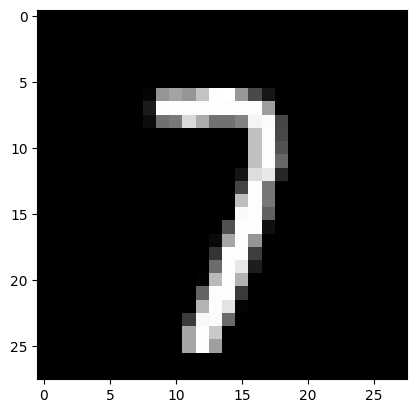

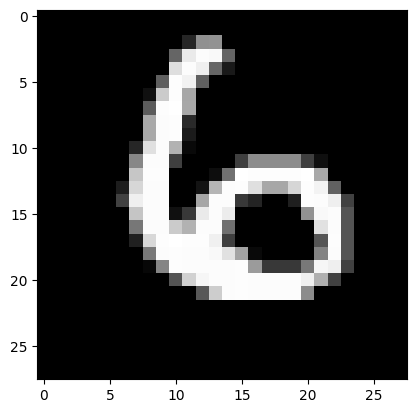

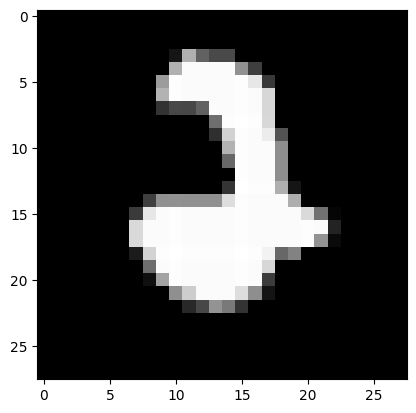

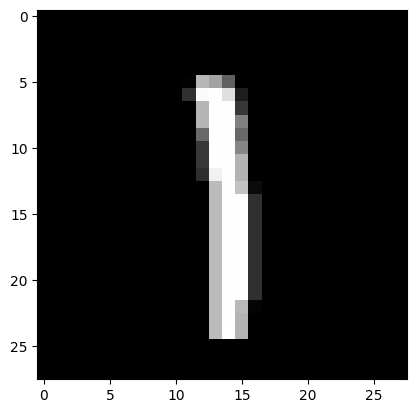

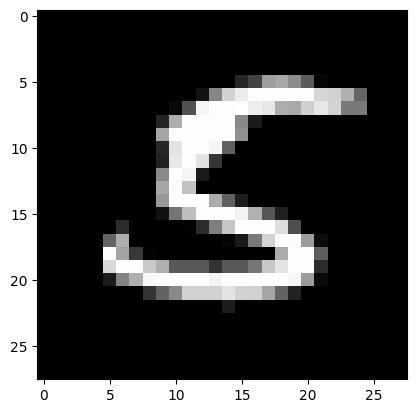

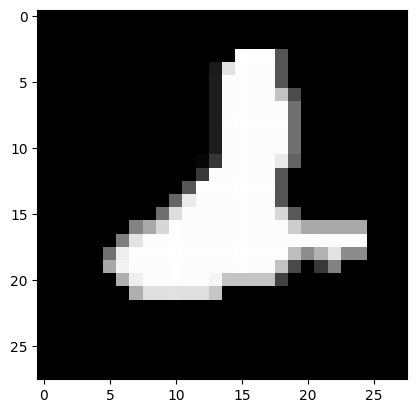

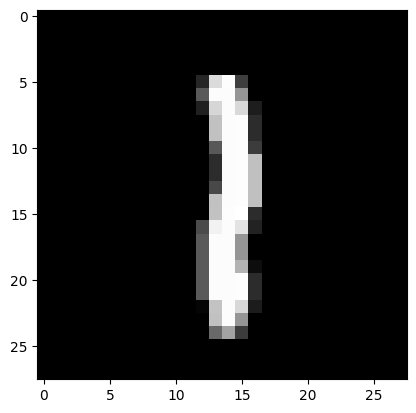

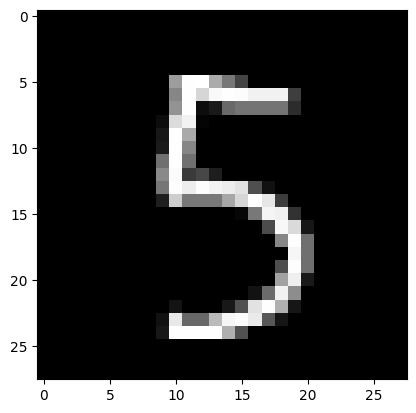

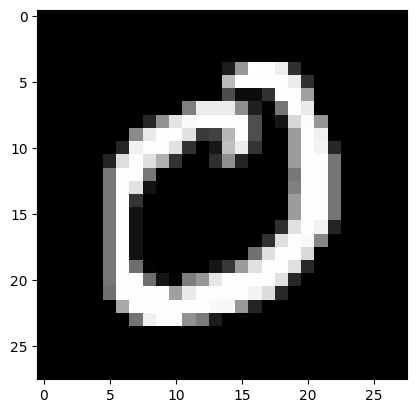

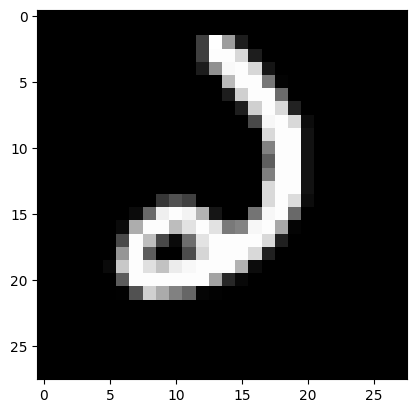

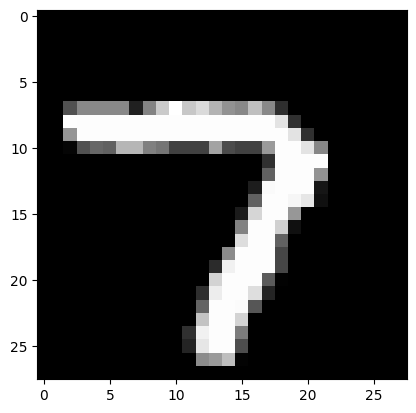

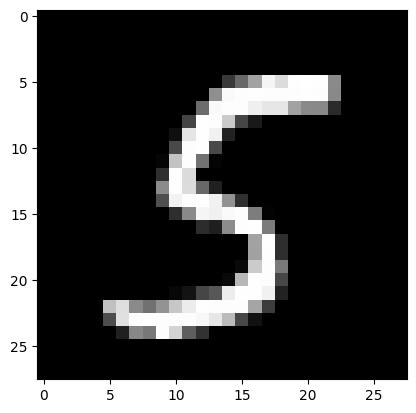

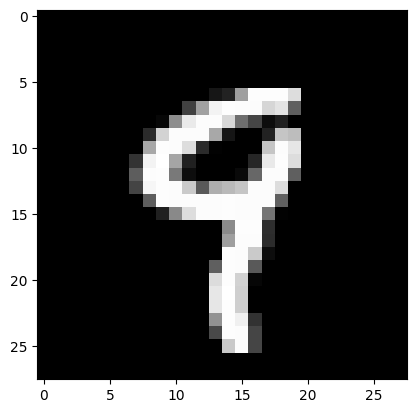

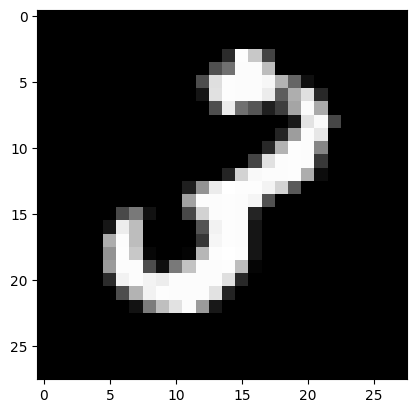

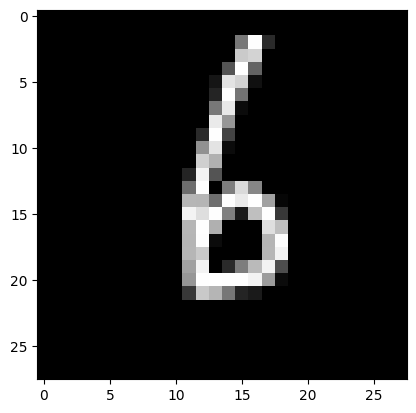

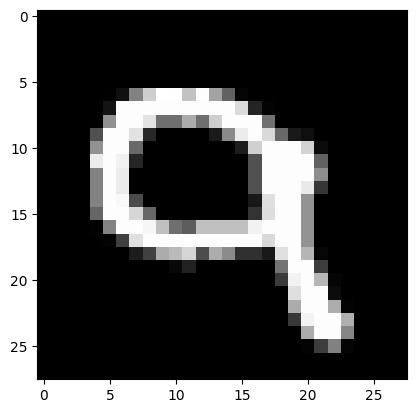

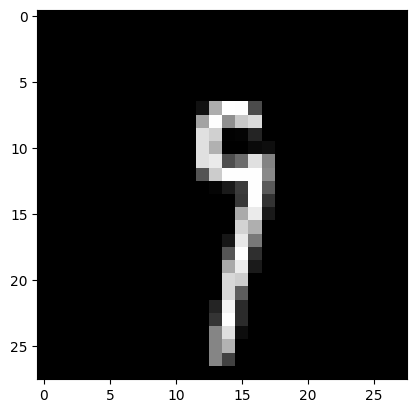

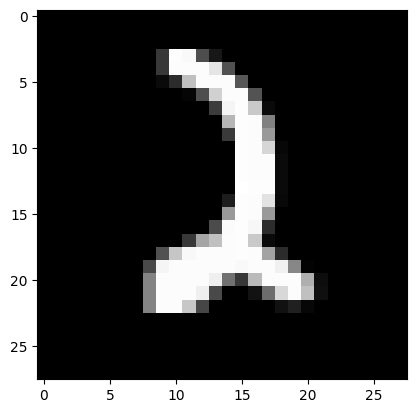

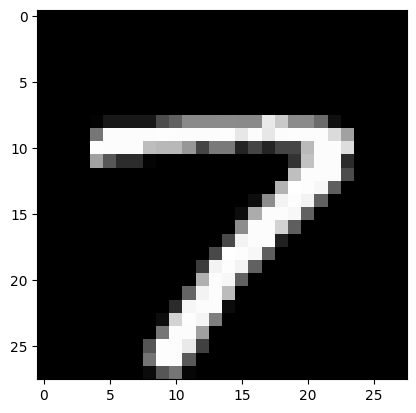

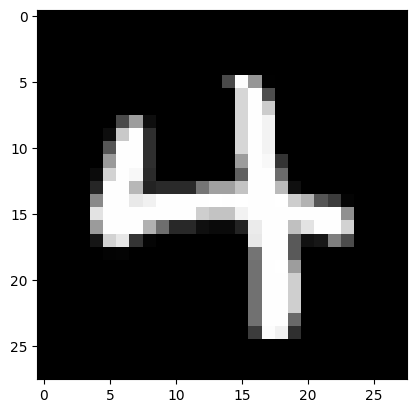

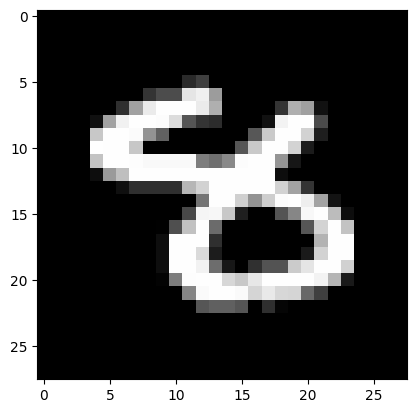

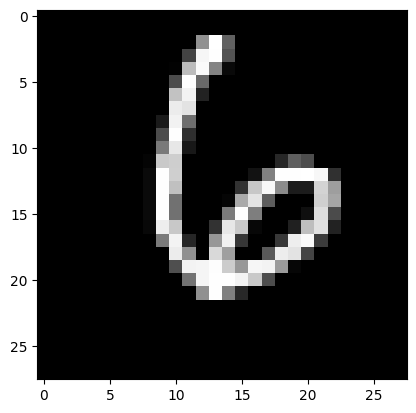

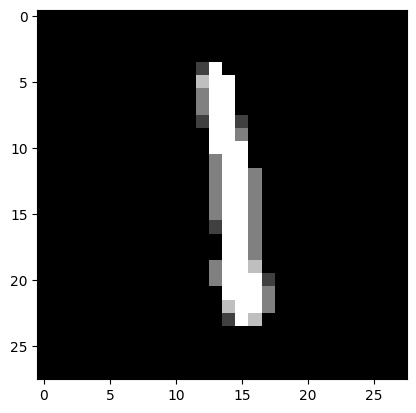

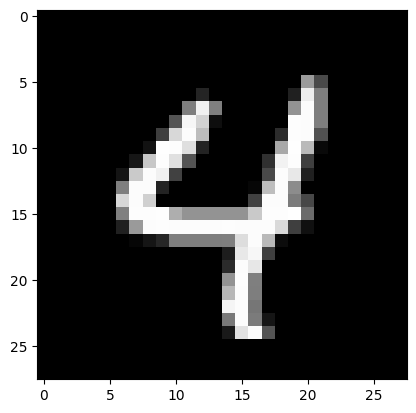

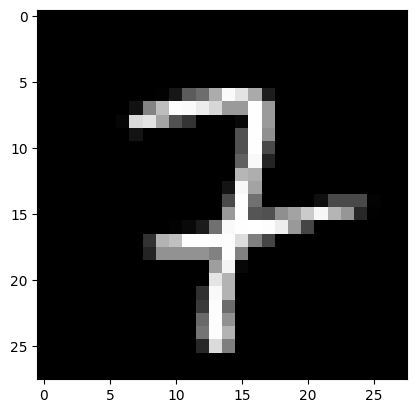

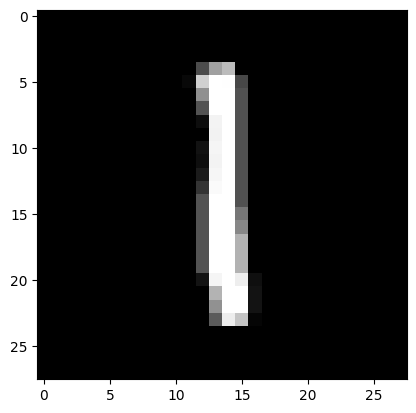

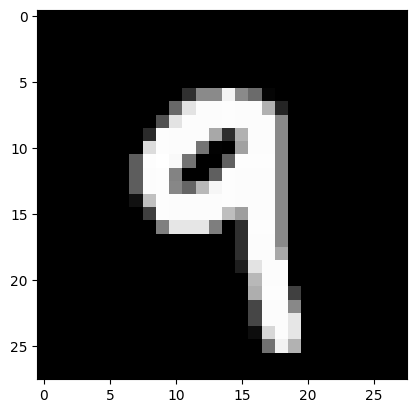

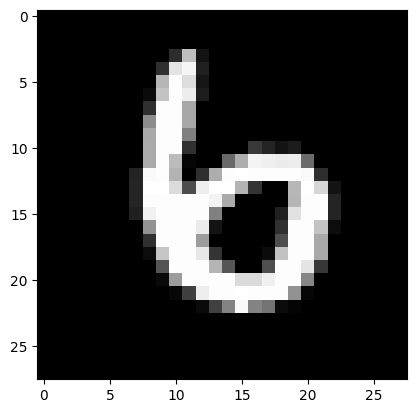

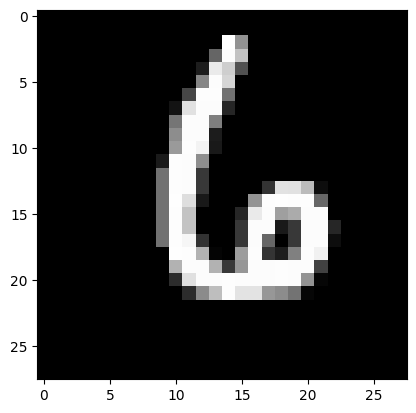

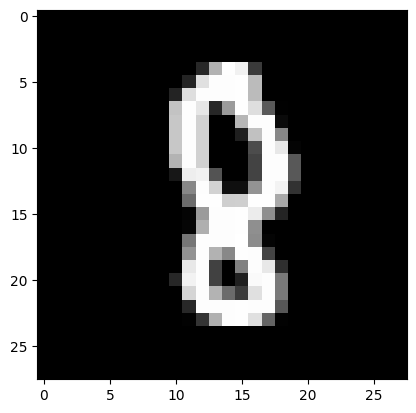

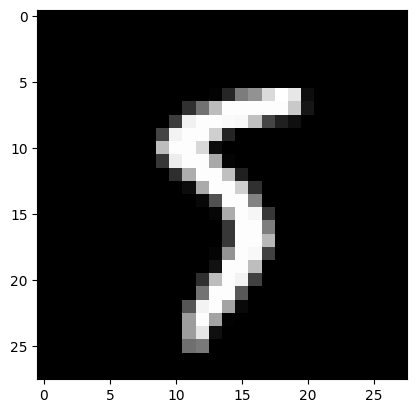

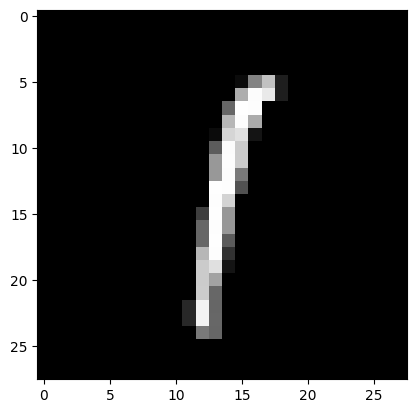

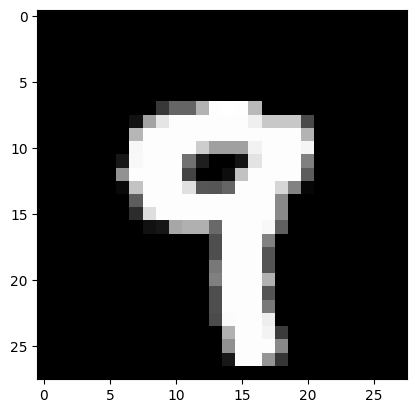

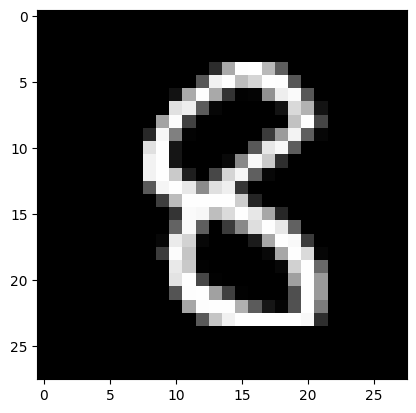

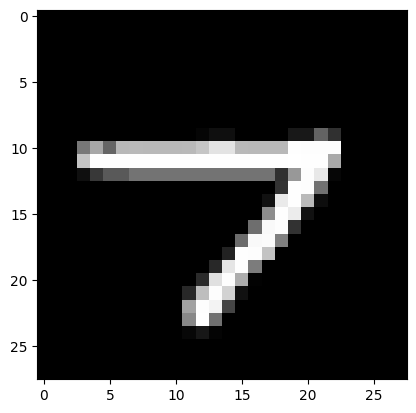

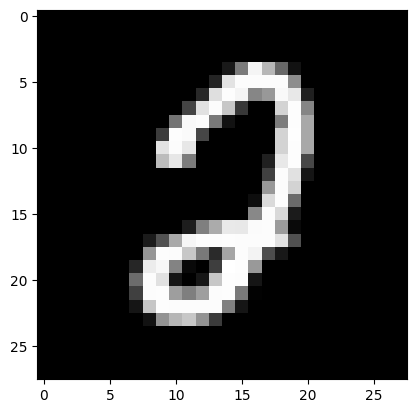

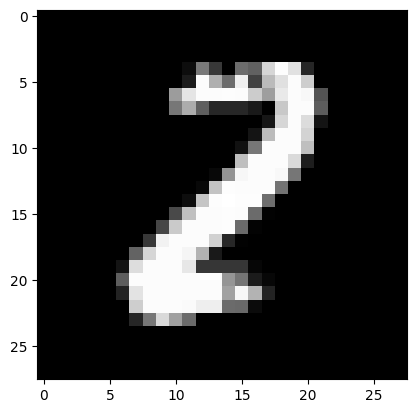

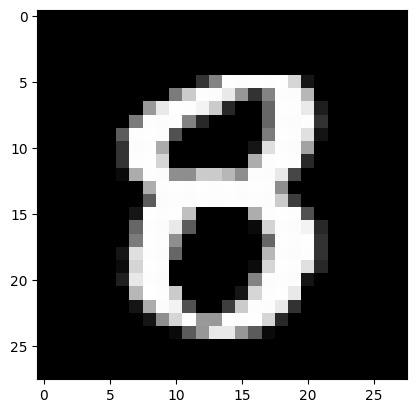

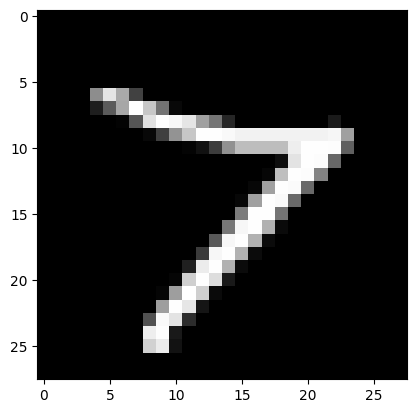

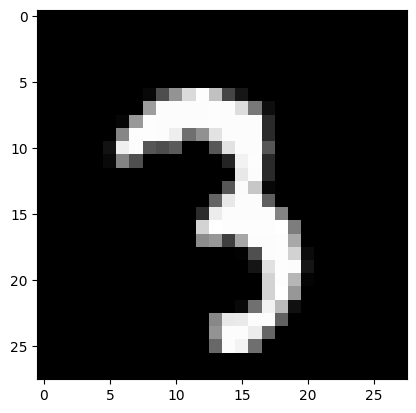

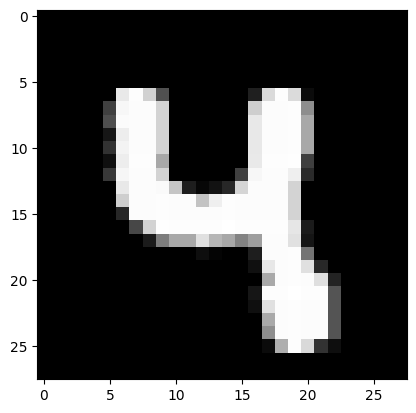

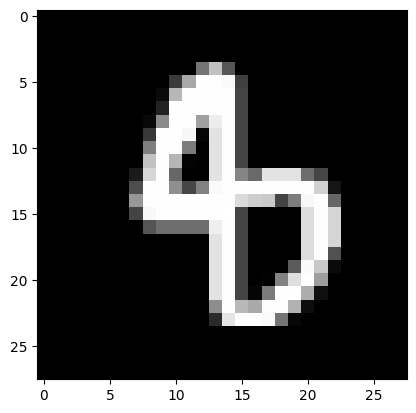

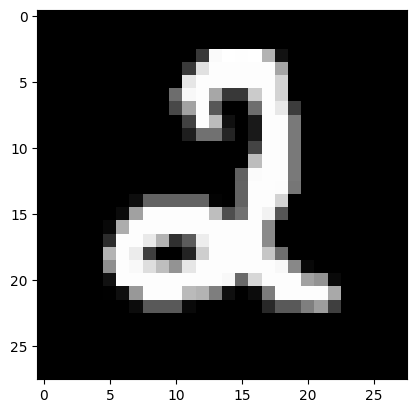

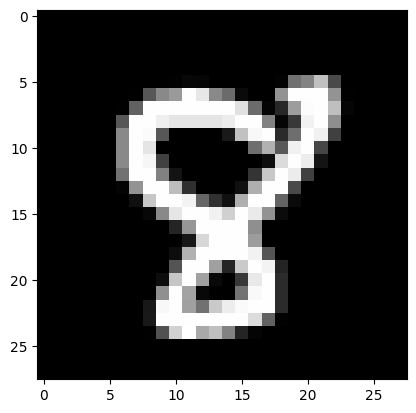

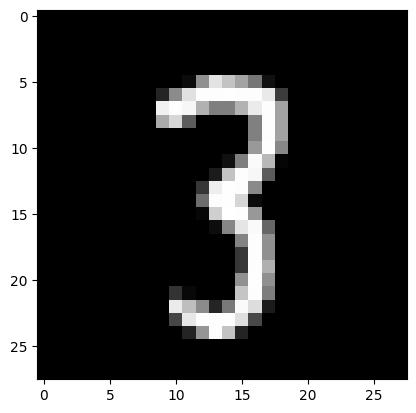

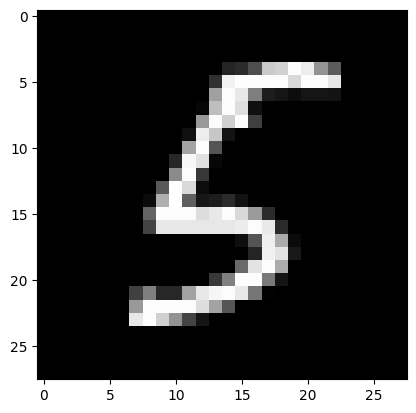

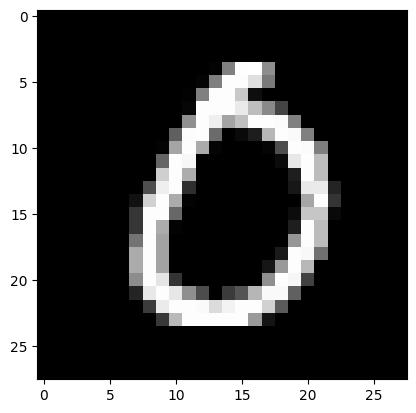

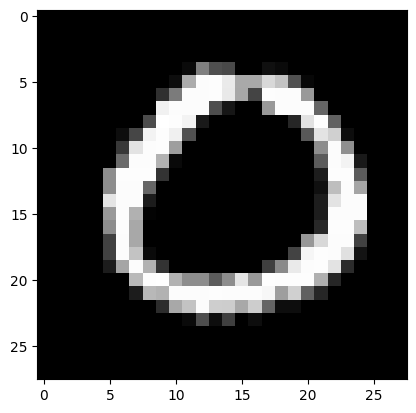

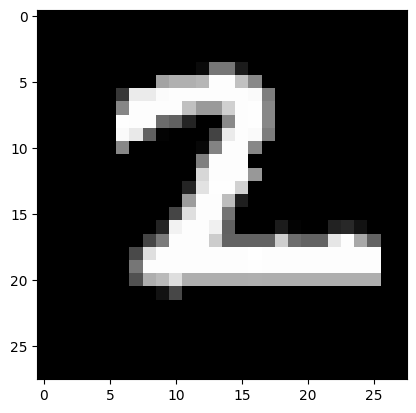

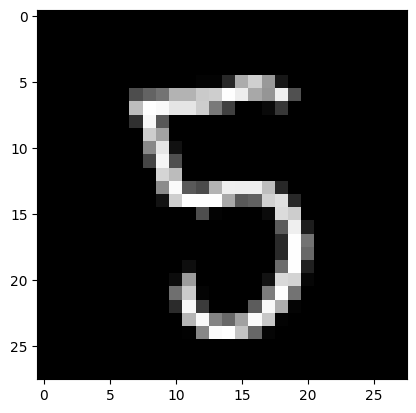

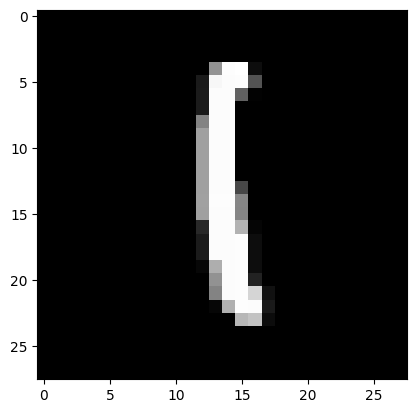

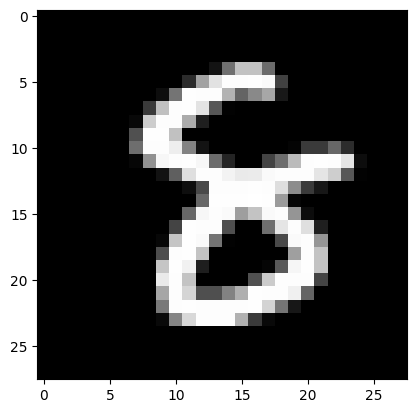

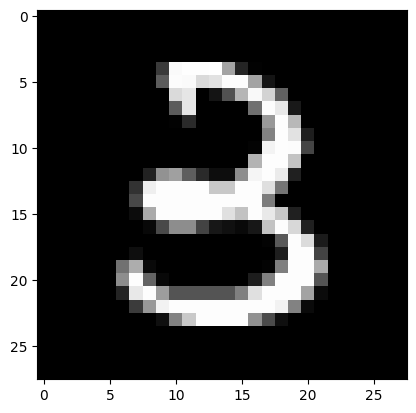

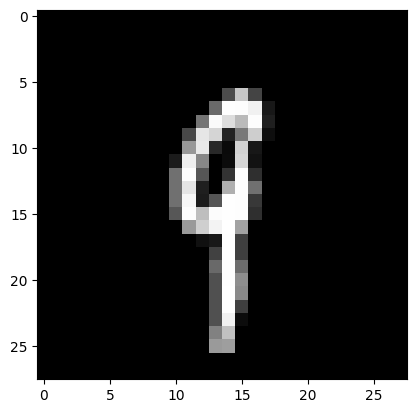

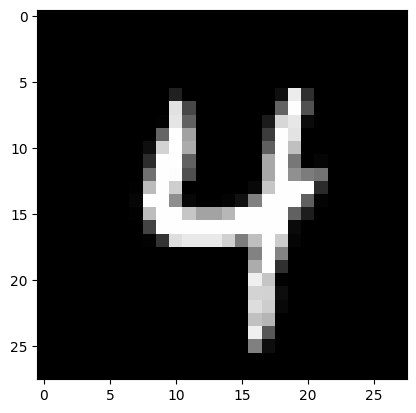

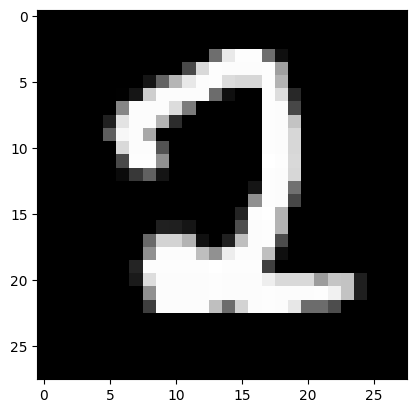

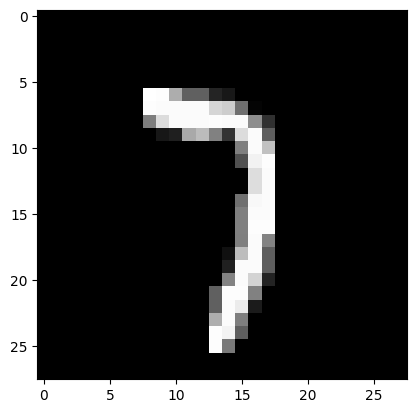

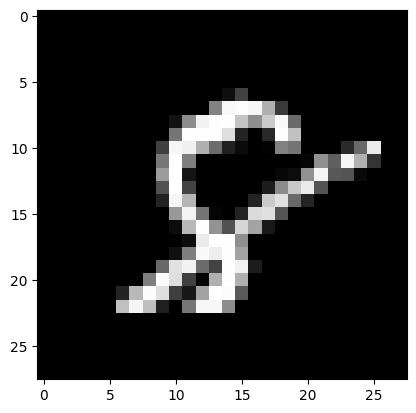

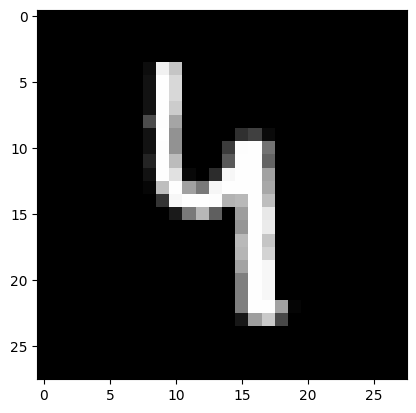

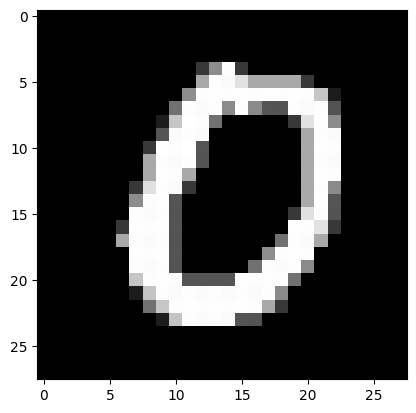

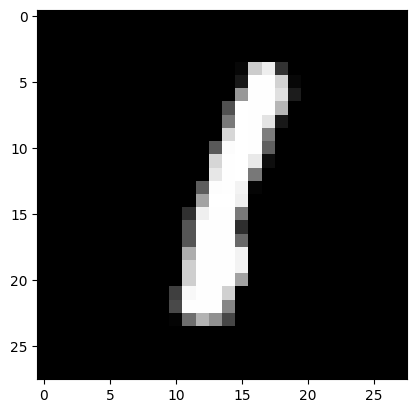

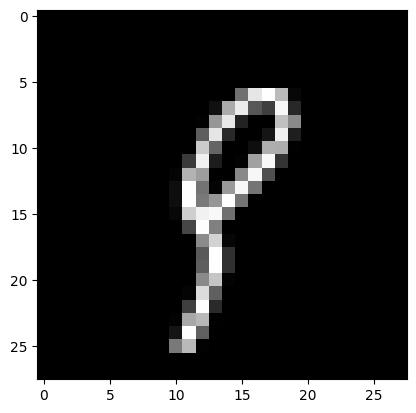

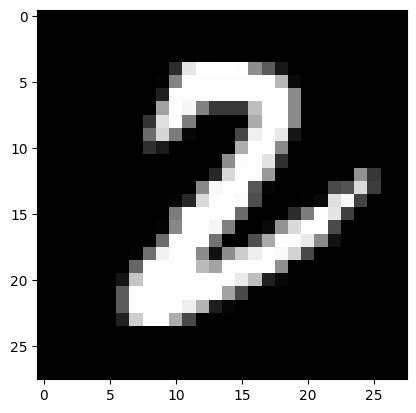

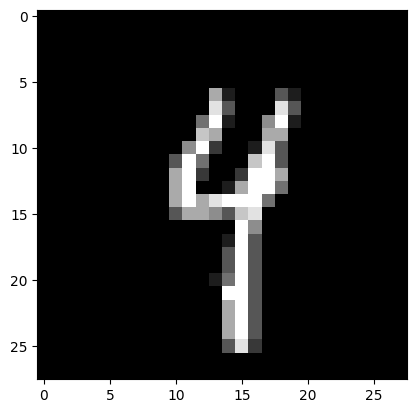

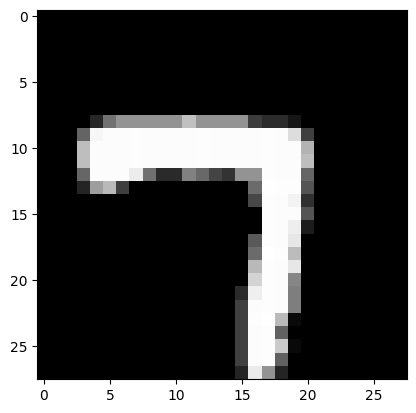

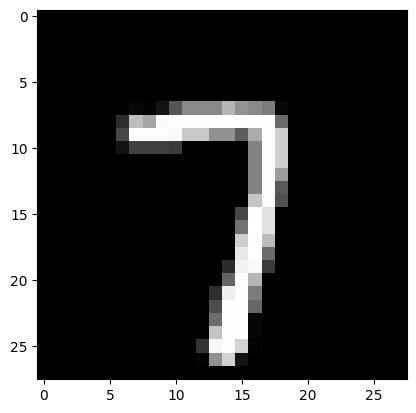

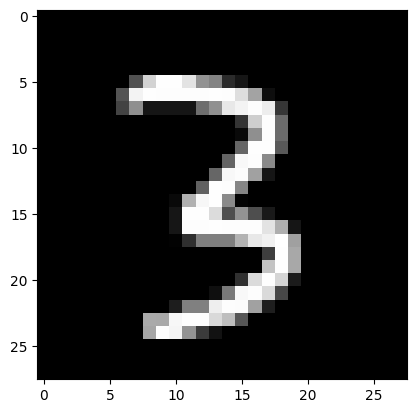

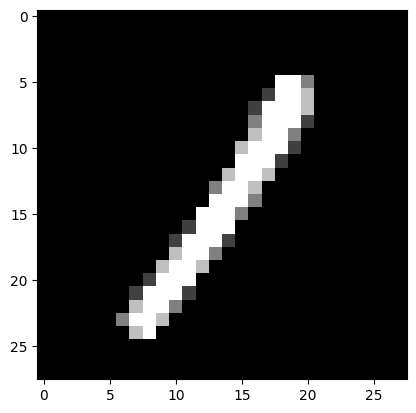

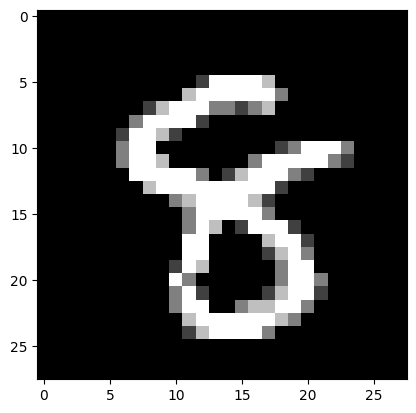

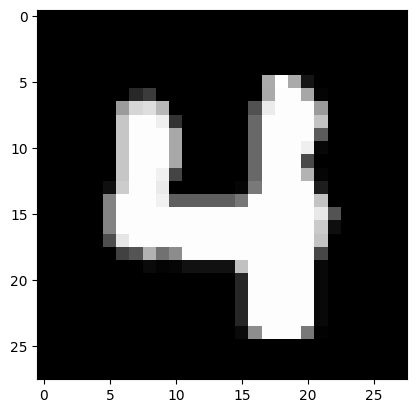

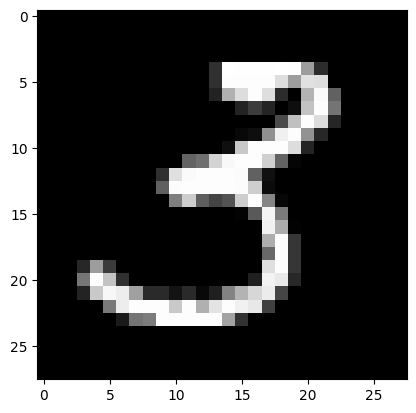

Accuracy of the model on test: 84.60 %
tot loss:  0.751142680644989
tot loss:  1.5612344145774841
tot loss:  2.2891088724136353
tot loss:  2.978050470352173
tot loss:  3.675278604030609
tot loss:  4.297067046165466
tot loss:  4.952922582626343
tot loss:  5.610331177711487
tot loss:  6.244325220584869
tot loss:  6.8549439907073975
tot loss:  7.571008920669556
tot loss:  8.197970271110535
tot loss:  8.79633891582489
tot loss:  9.393727898597717
tot loss:  10.082897305488586
tot loss:  10.737452864646912
tot loss:  11.367797553539276
tot loss:  12.018210232257843
tot loss:  12.686486184597015
tot loss:  13.357624888420105
tot loss:  14.069115161895752
tot loss:  14.826687574386597
tot loss:  15.59218144416809
tot loss:  16.35190862417221
tot loss:  17.043414413928986
tot loss:  17.66337078809738
tot loss:  18.259058952331543
tot loss:  18.927944779396057
tot loss:  19.596395432949066
tot loss:  20.25409710407257
tot loss:  20.865378856658936
tot loss:  21.514389634132385
tot loss:  22.071

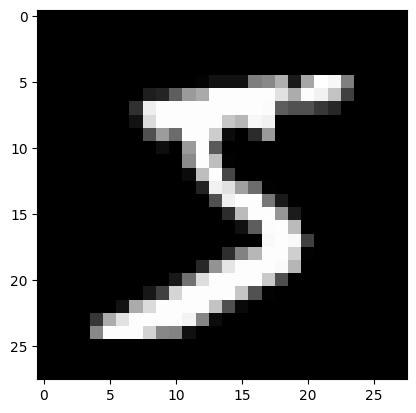

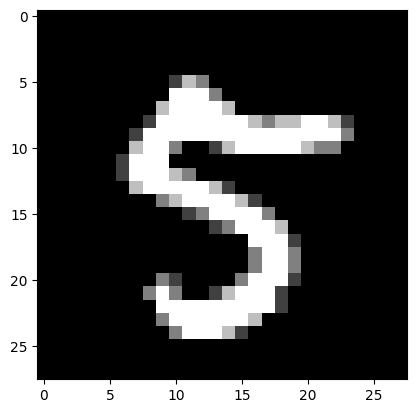

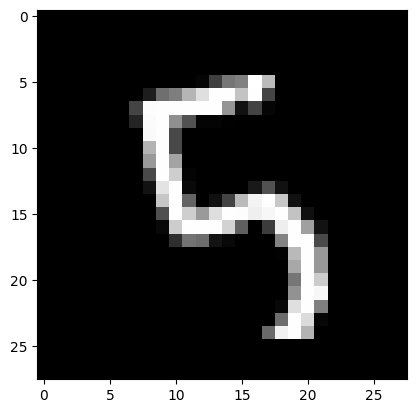

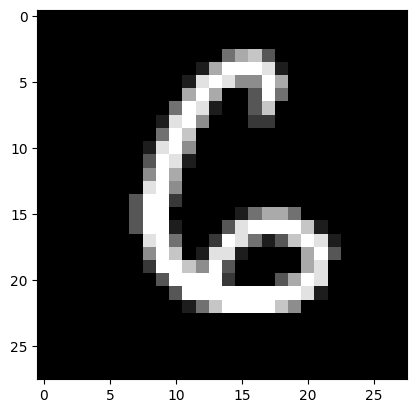

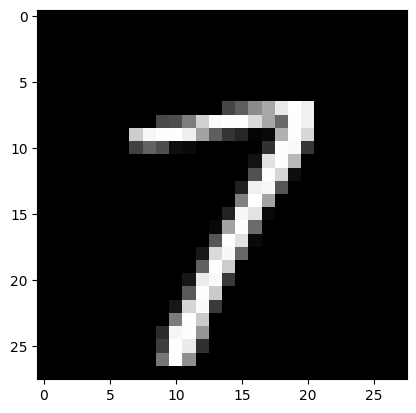

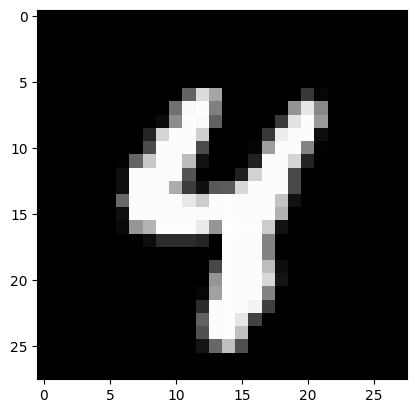

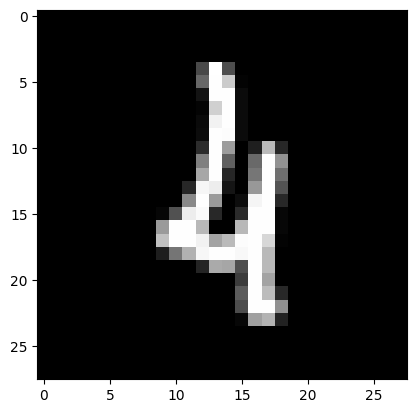

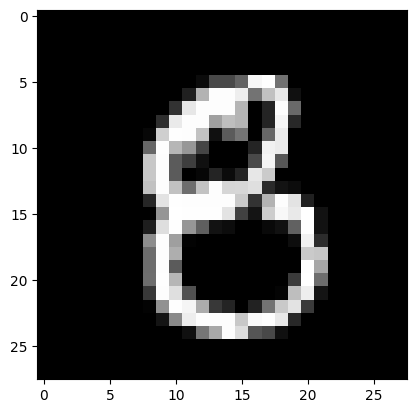

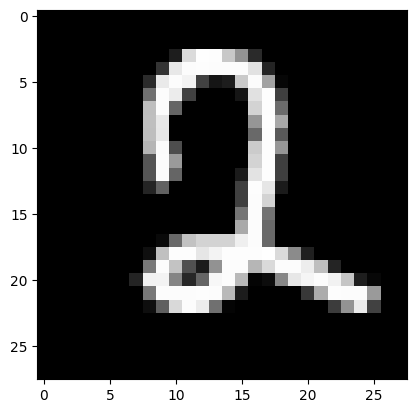

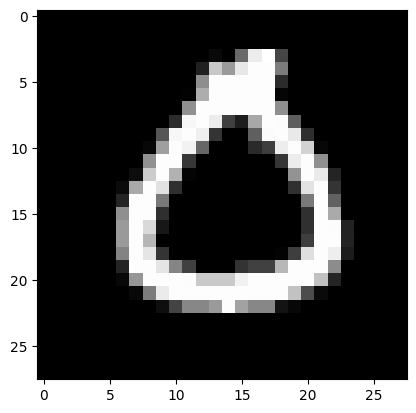

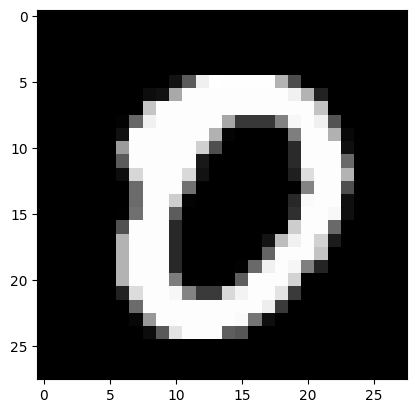

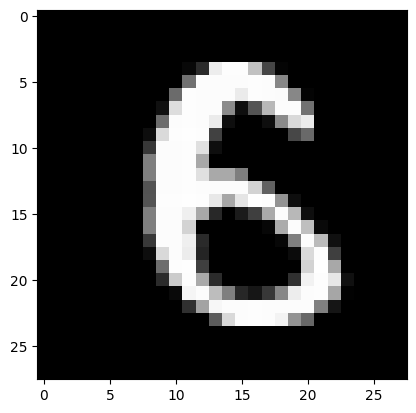

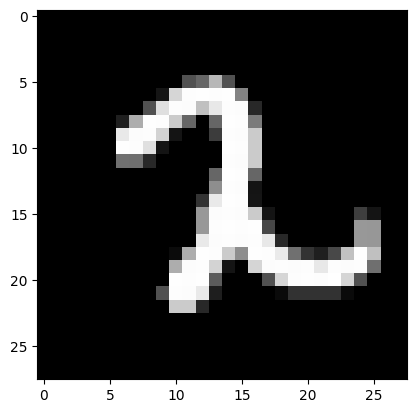

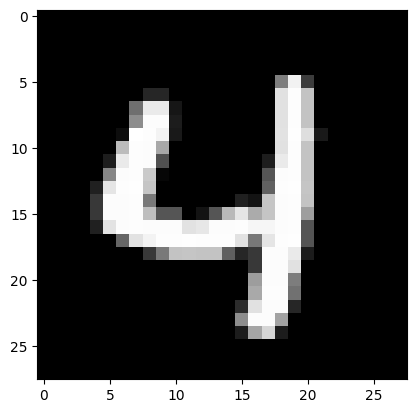

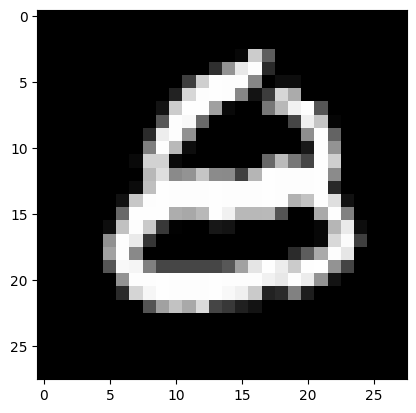

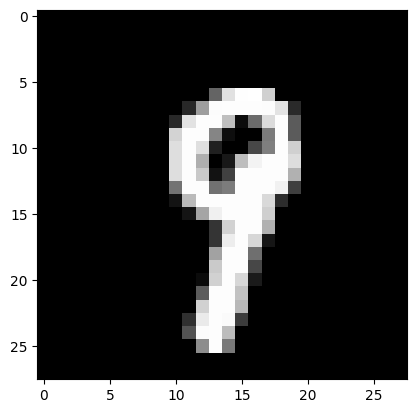

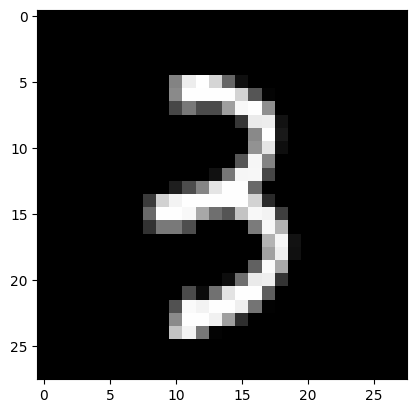

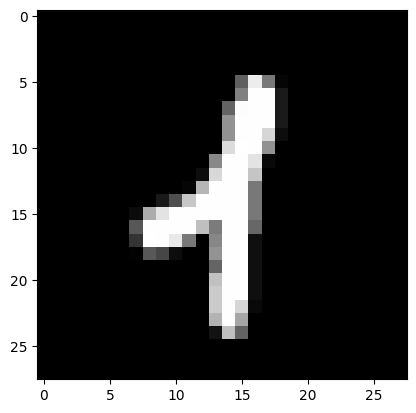

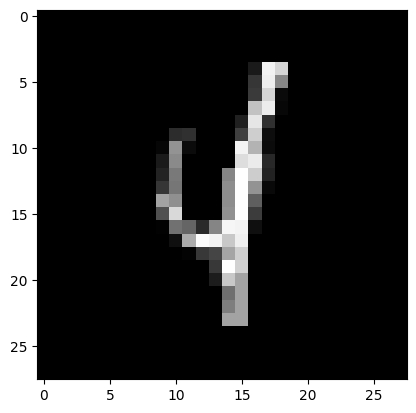

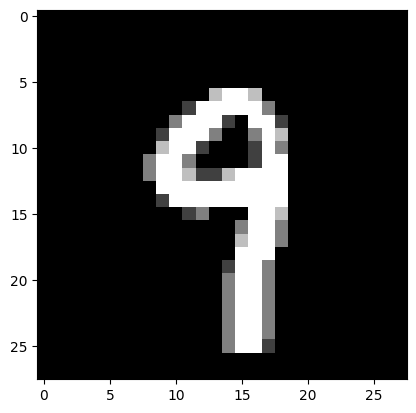

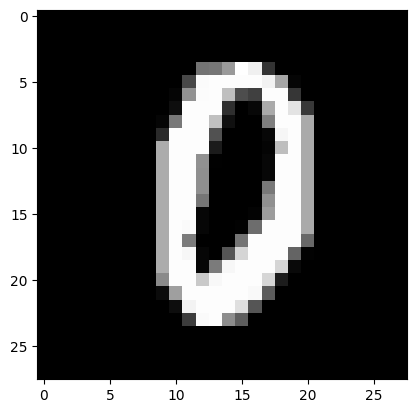

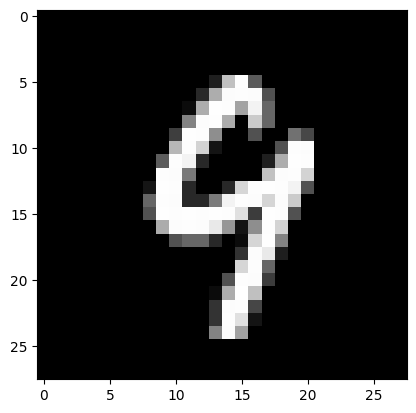

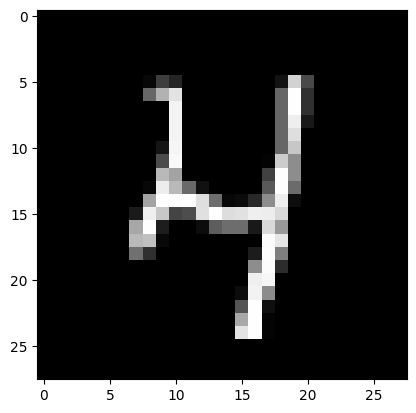

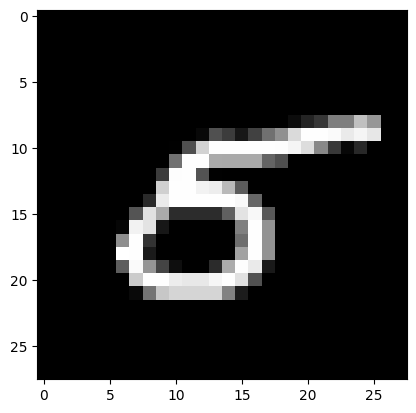

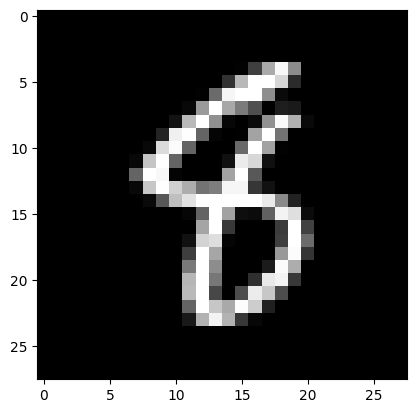

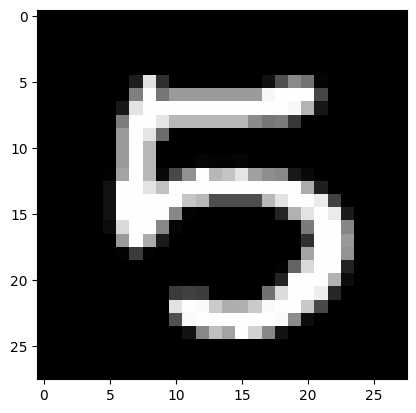

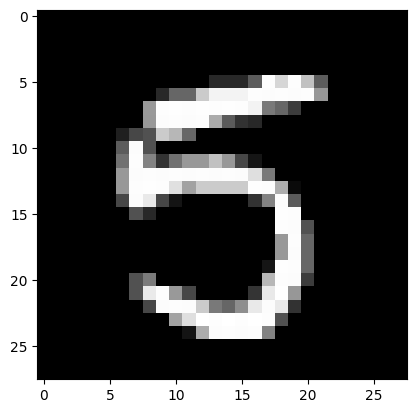

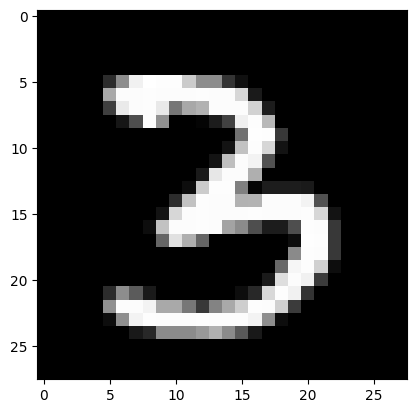

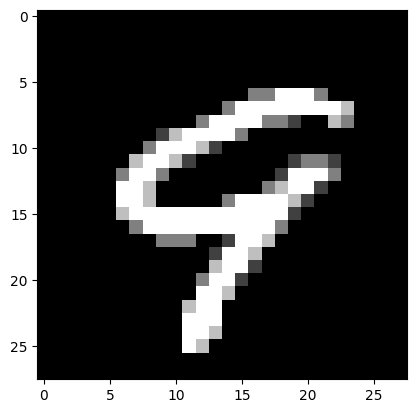

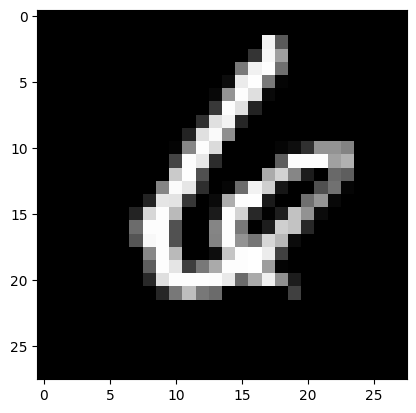

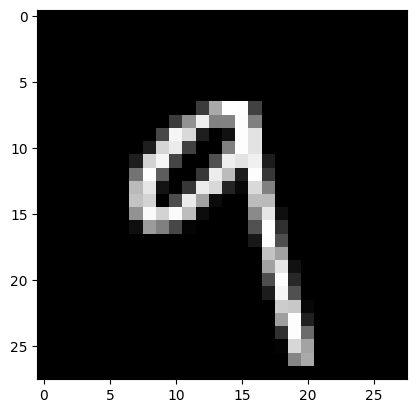

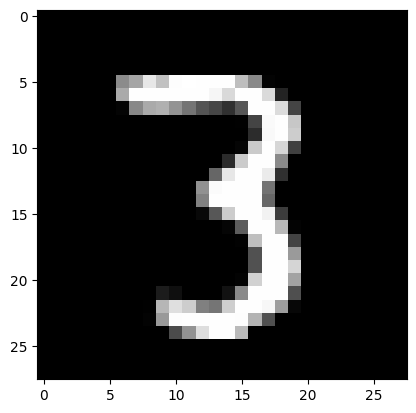

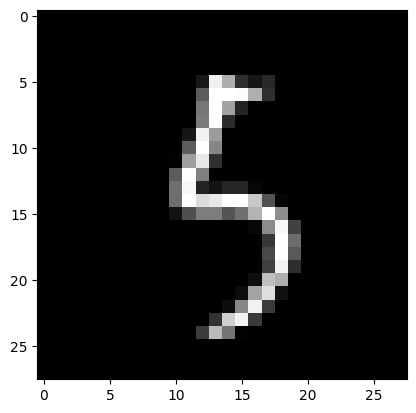

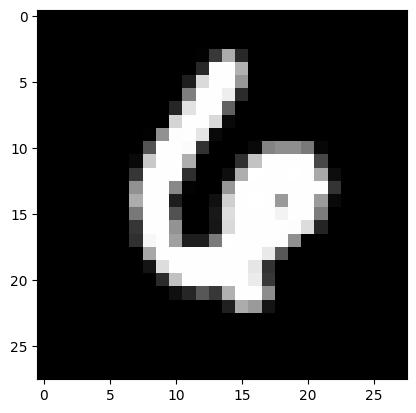

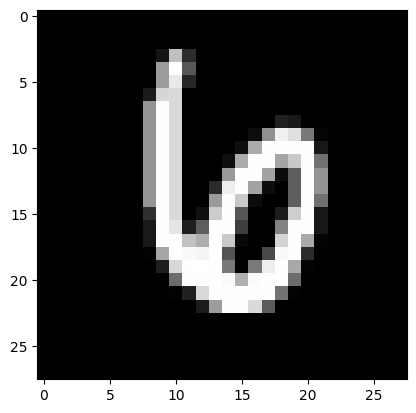

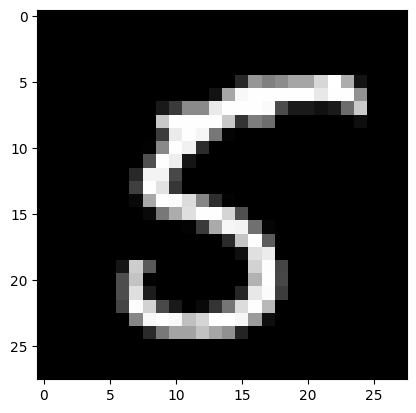

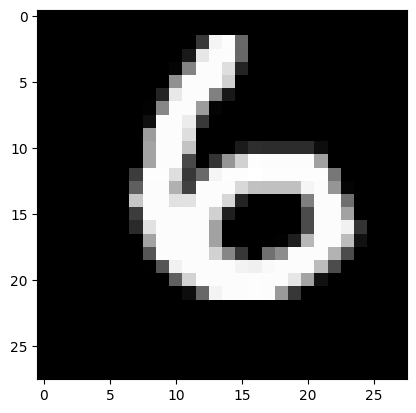

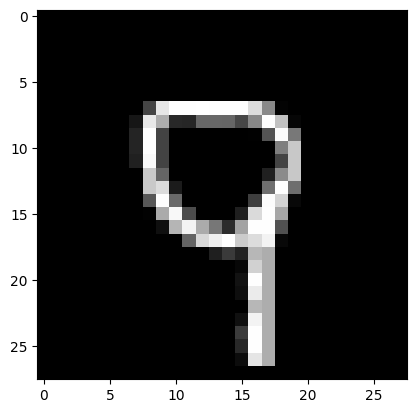

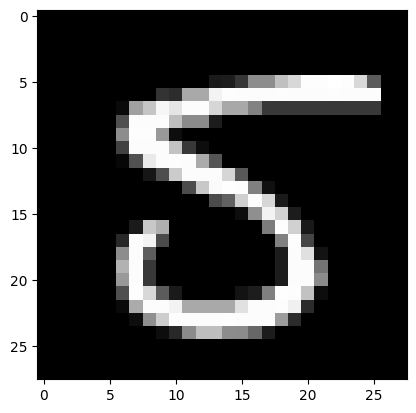

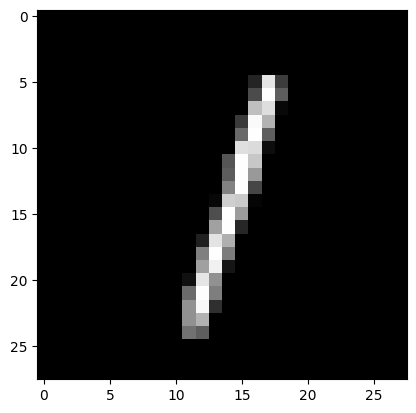

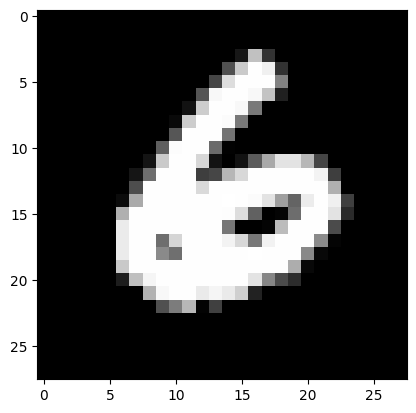

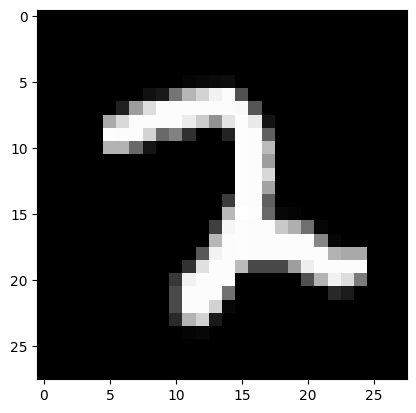

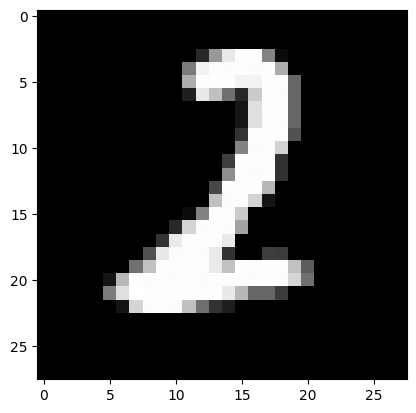

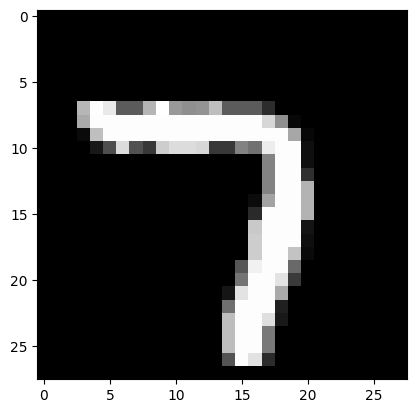

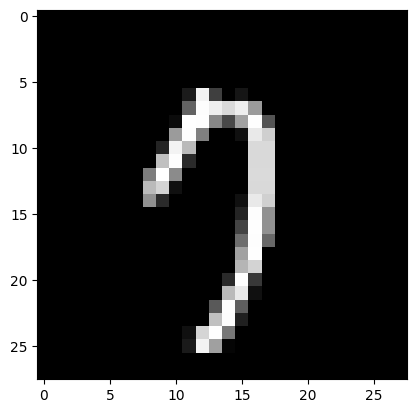

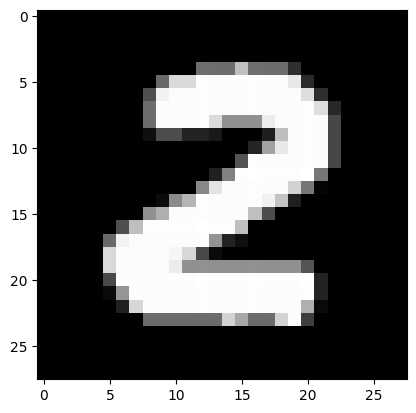

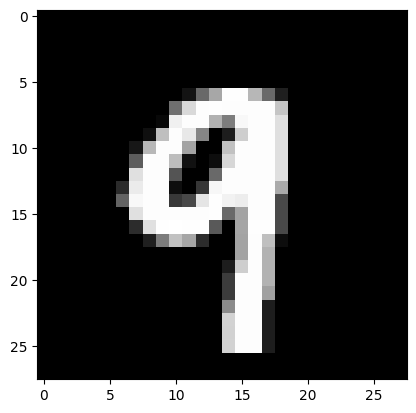

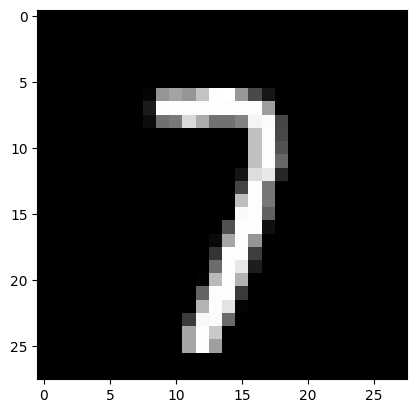

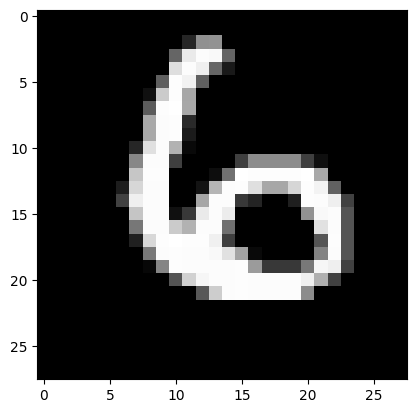

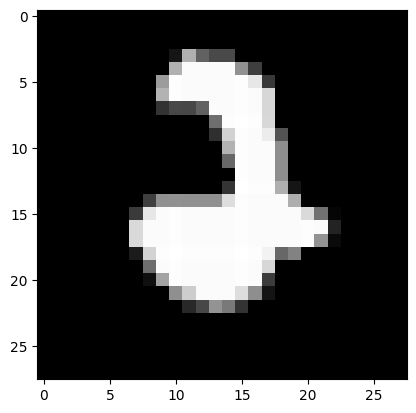

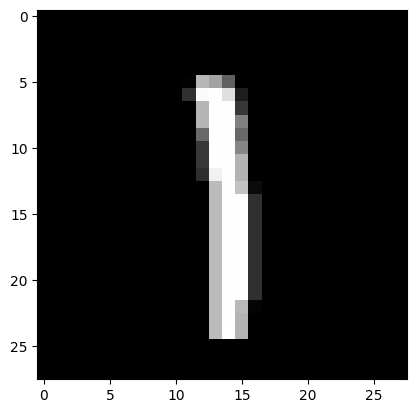

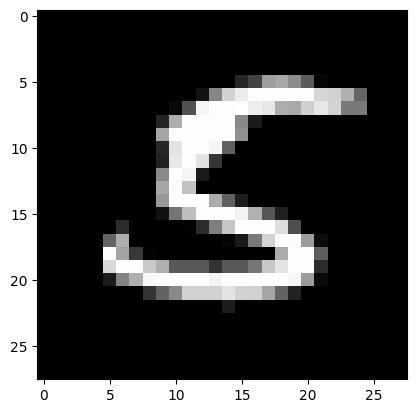

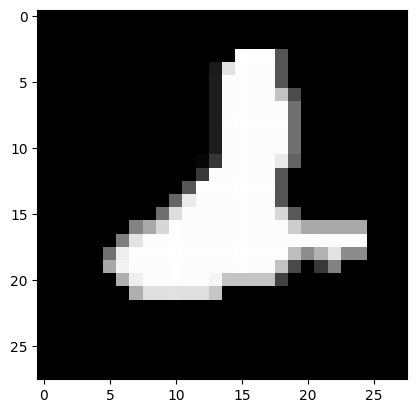

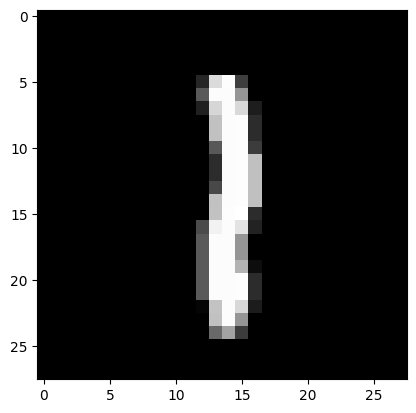

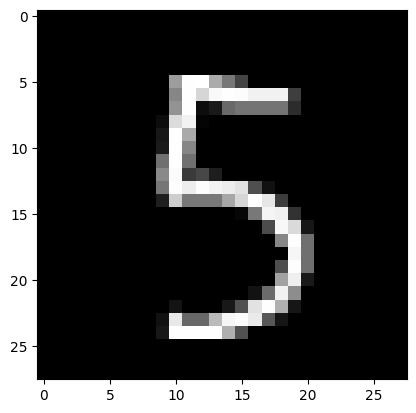

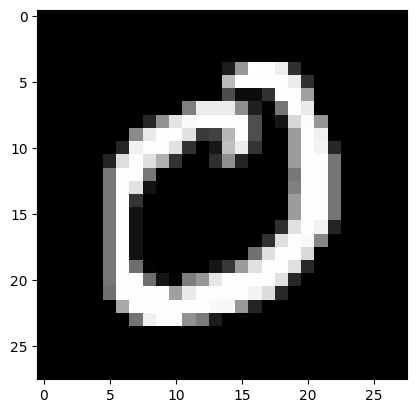

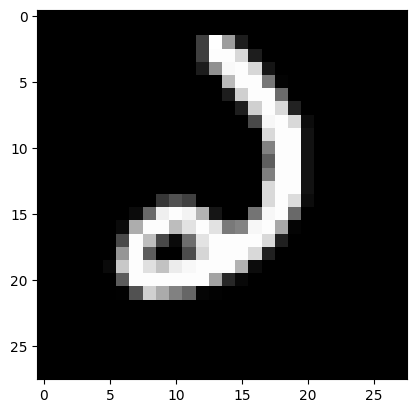

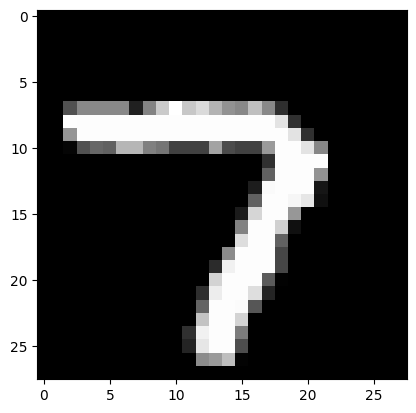

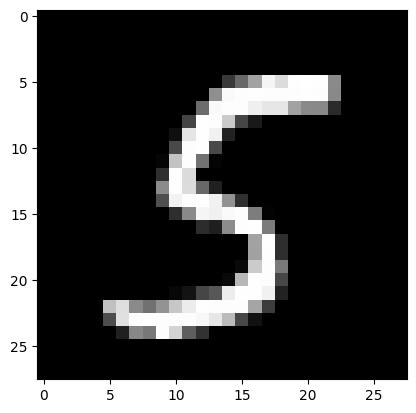

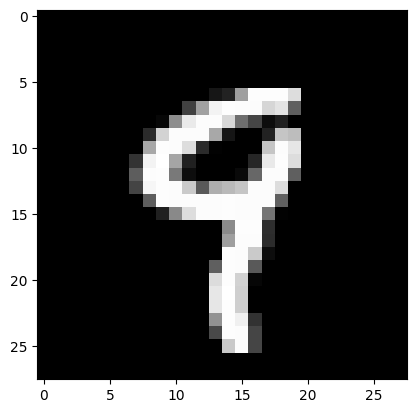

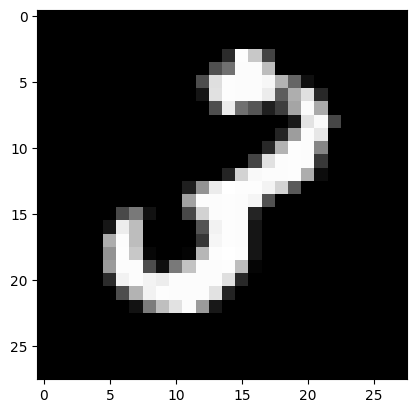

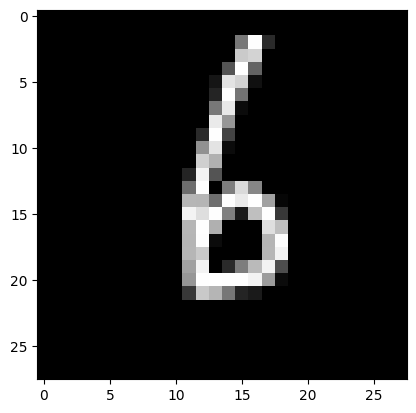

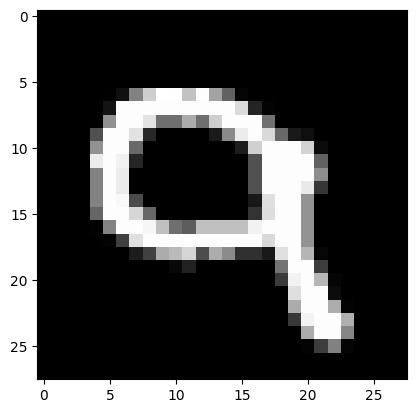

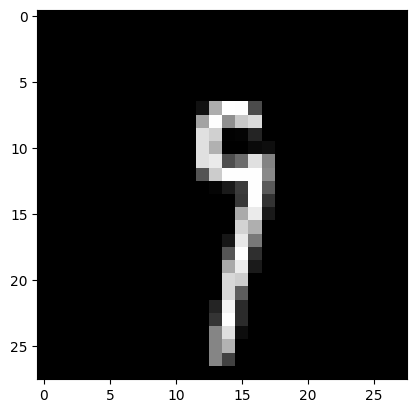

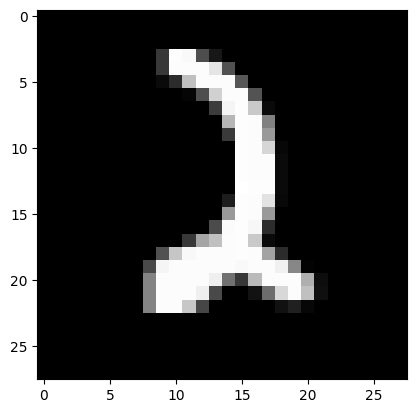

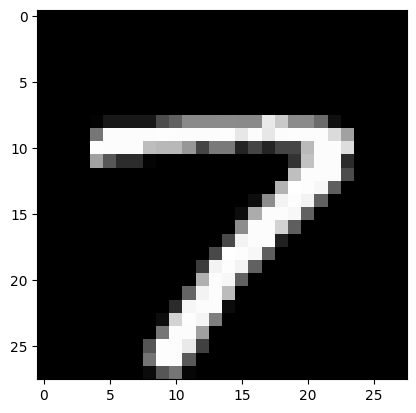

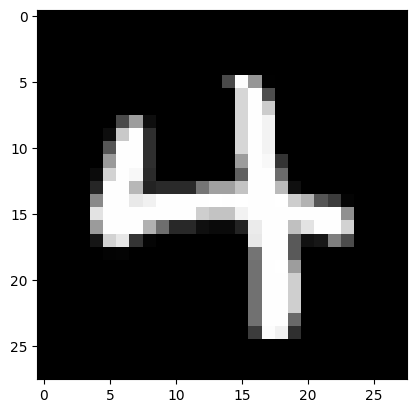

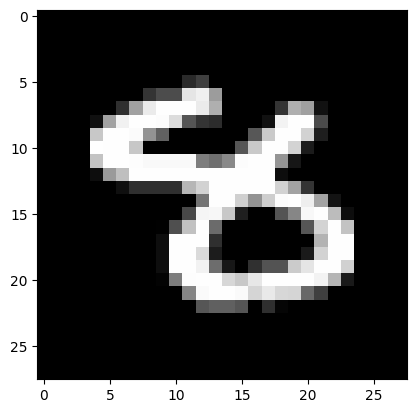

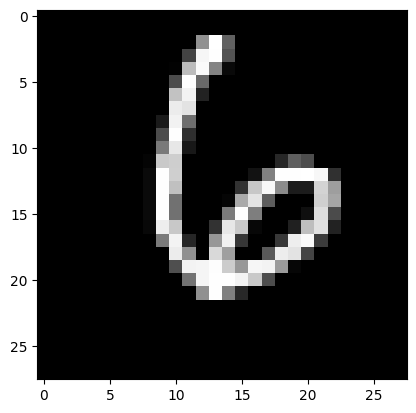

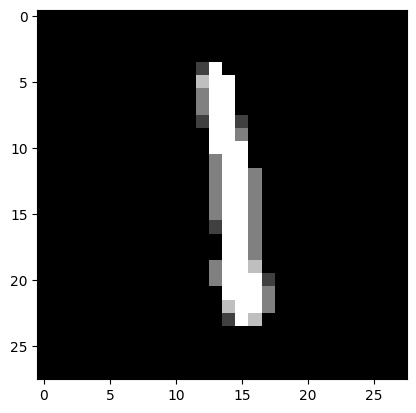

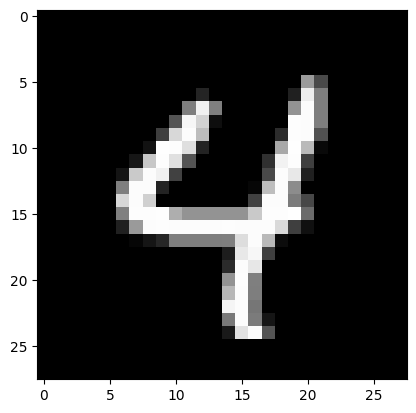

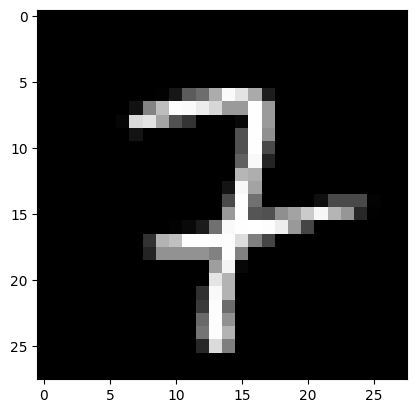

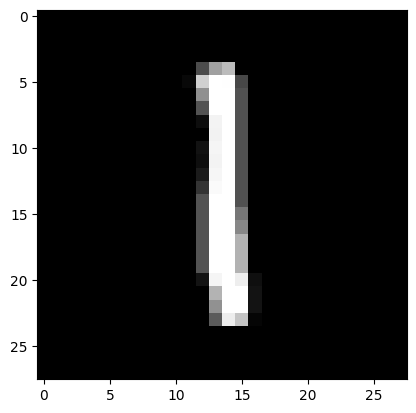

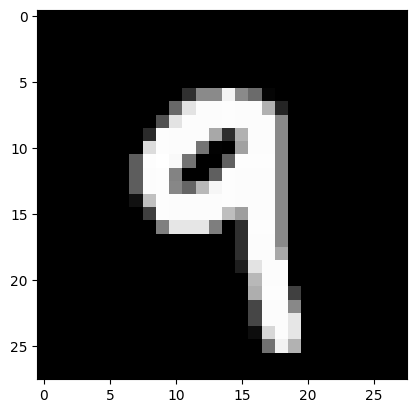

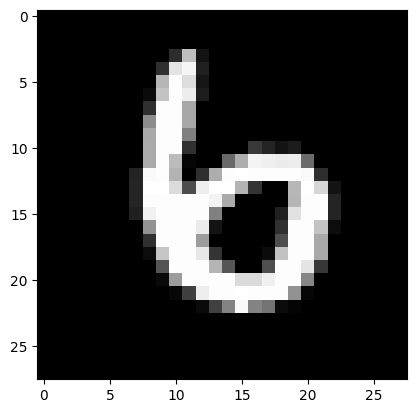

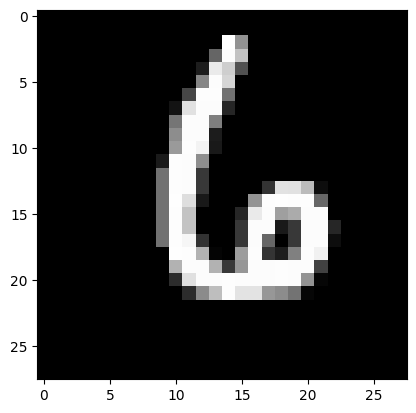

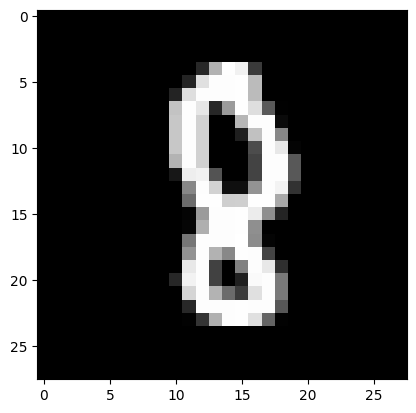

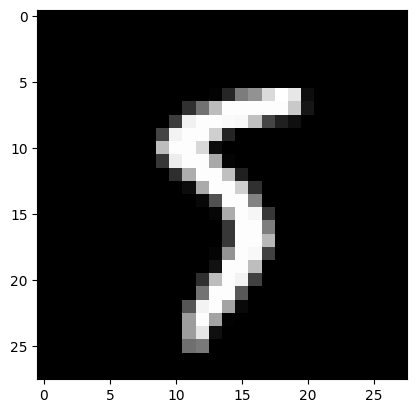

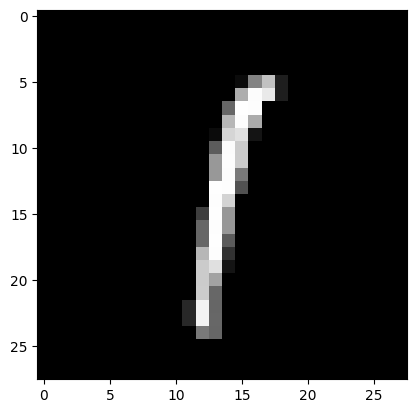

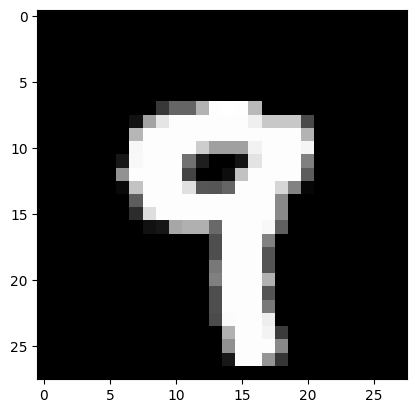

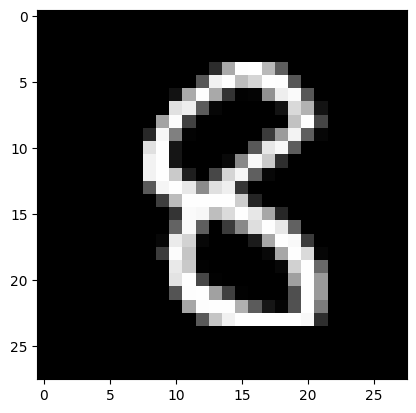

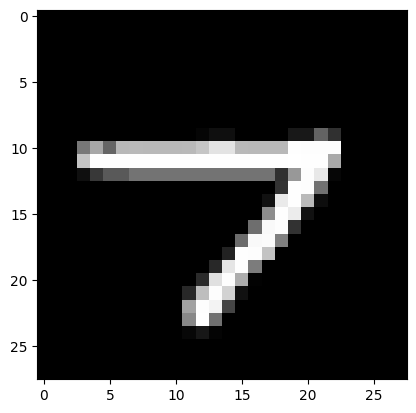

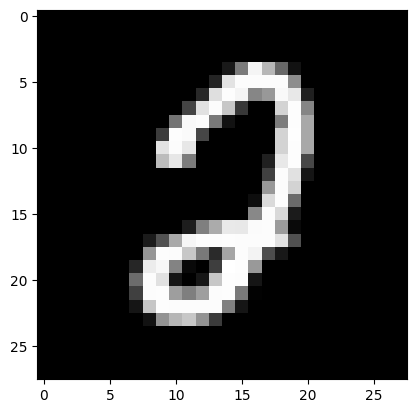

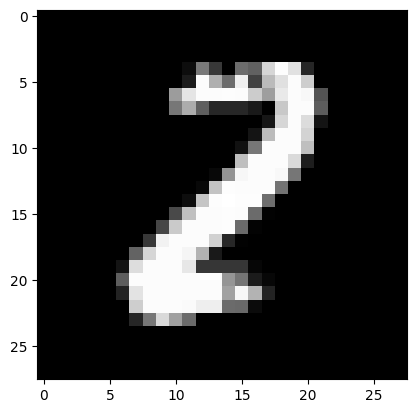

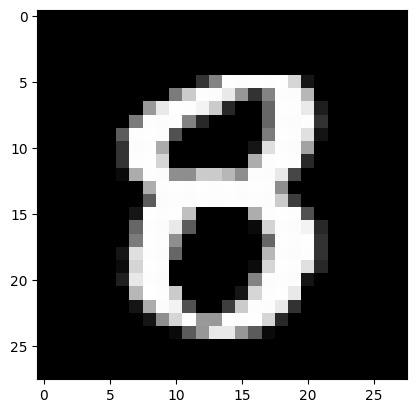

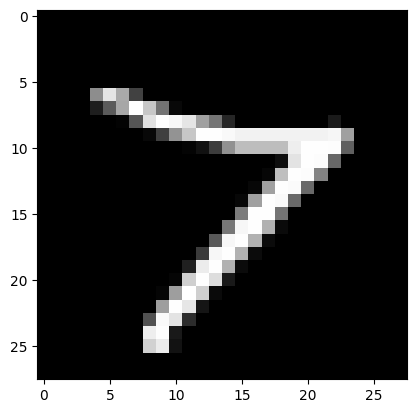

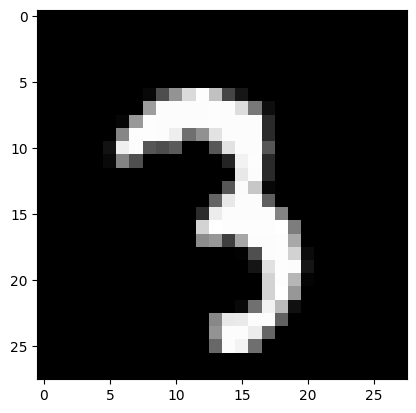

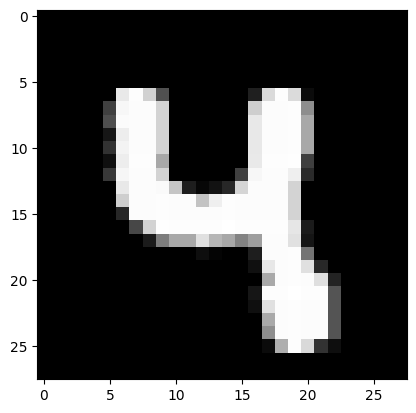

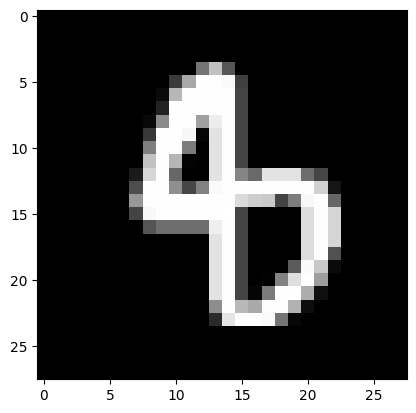

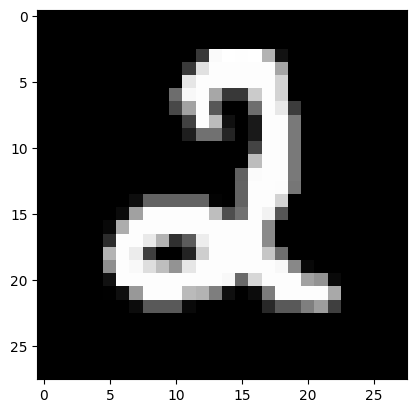

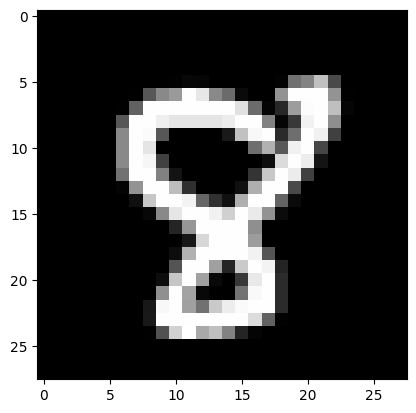

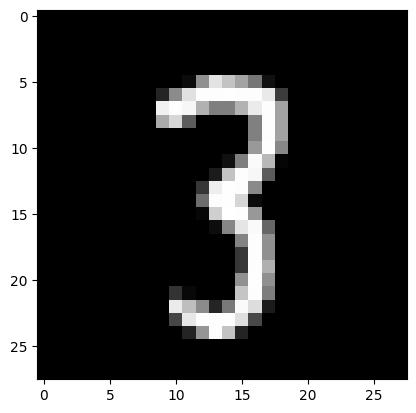

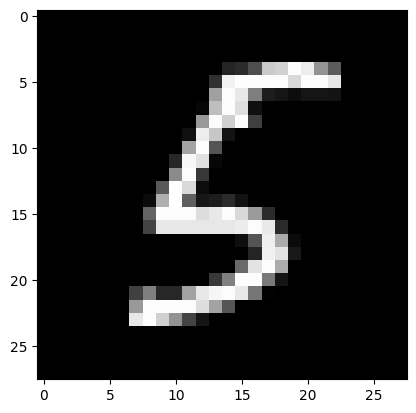

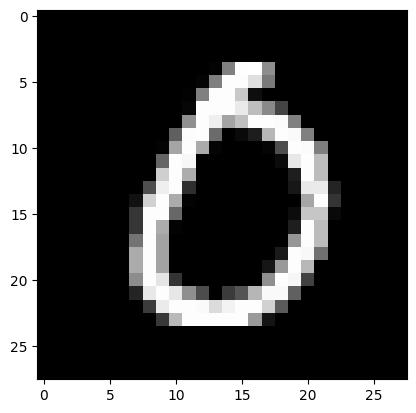

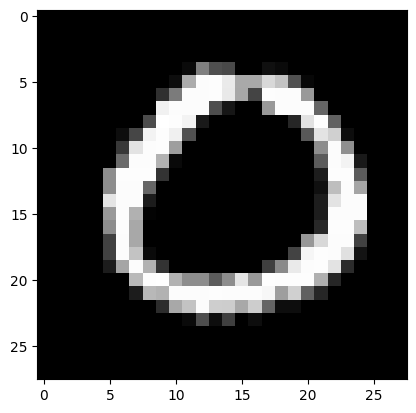

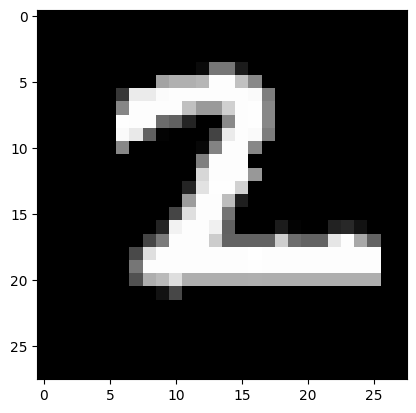

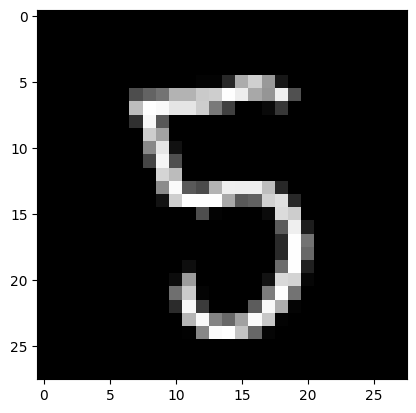

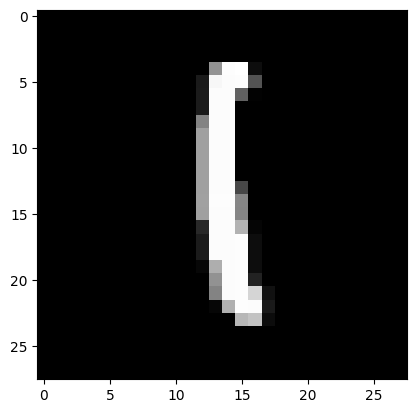

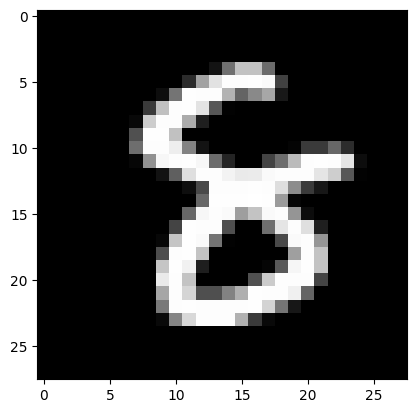

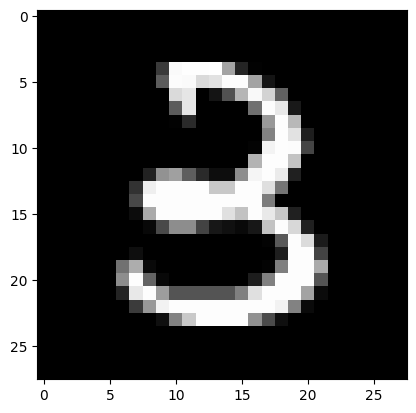

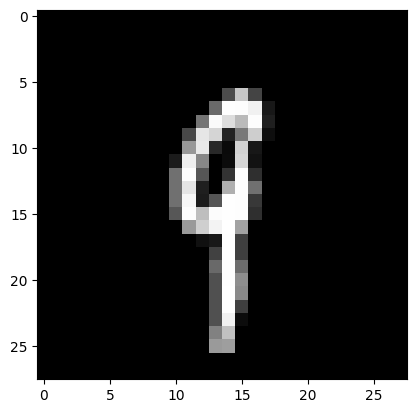

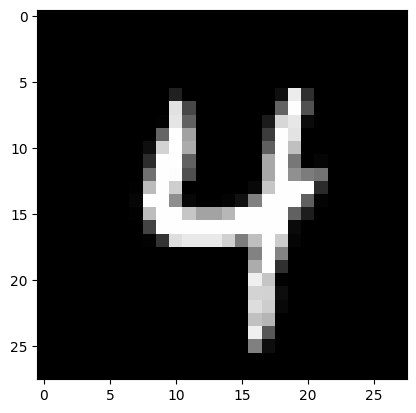

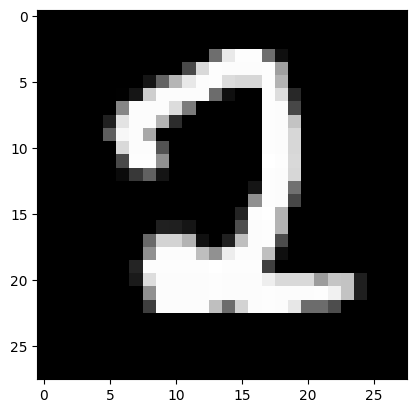

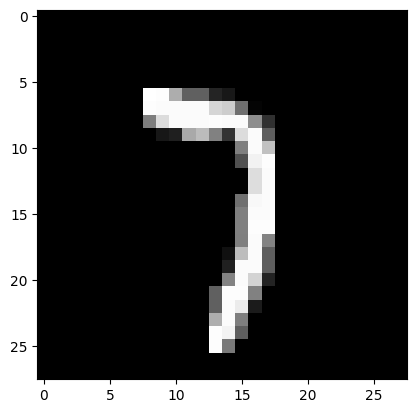

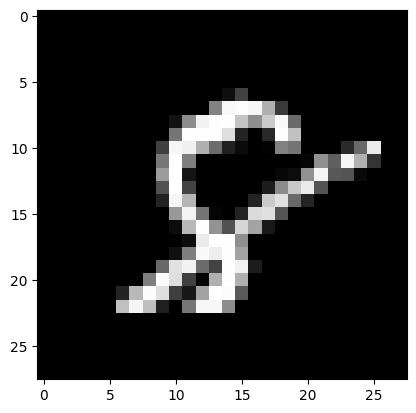

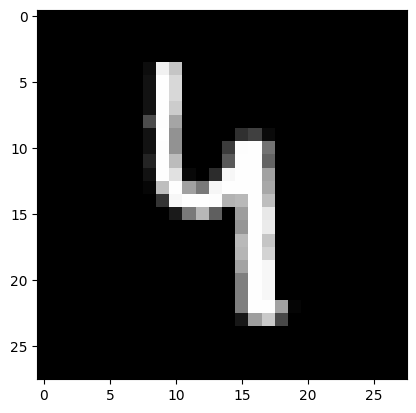

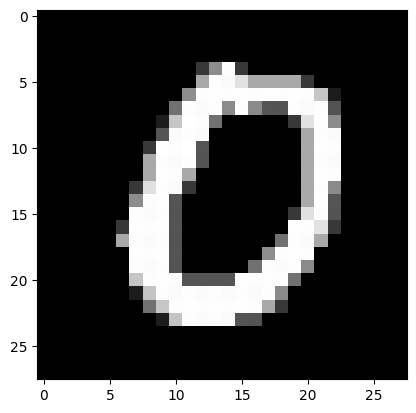

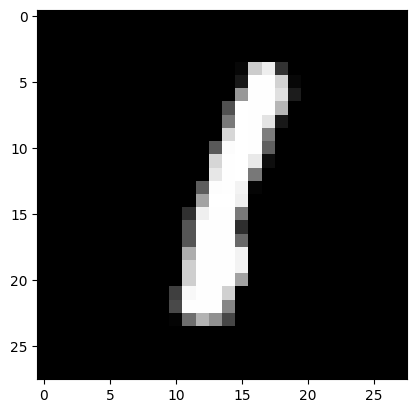

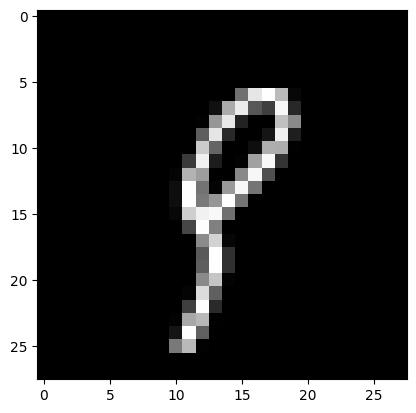

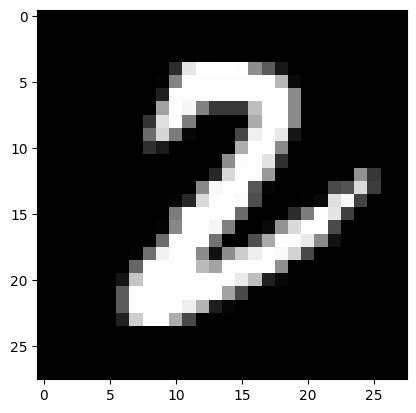

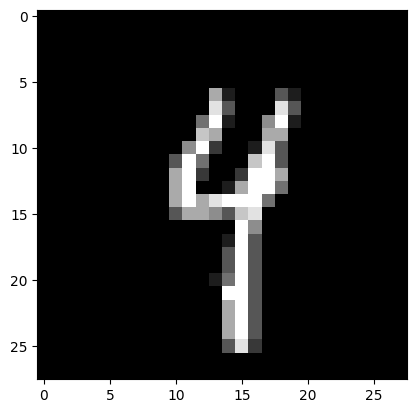

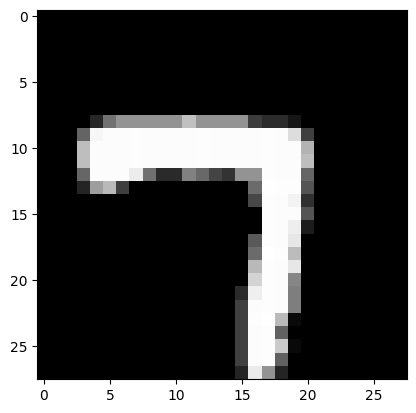

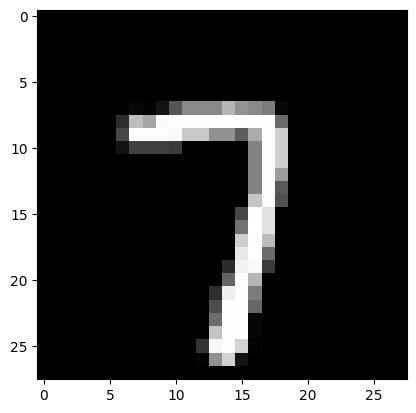

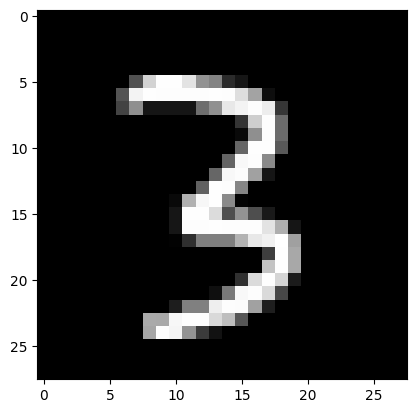

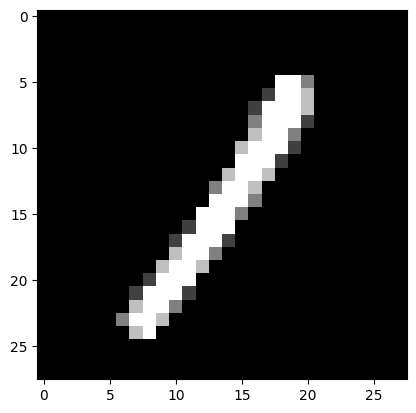

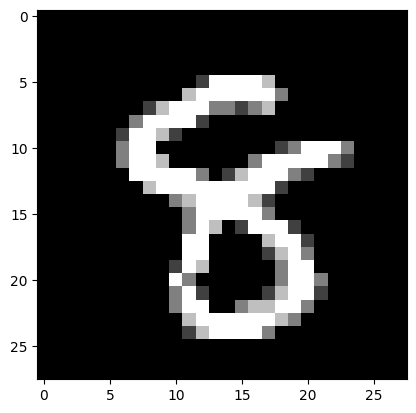

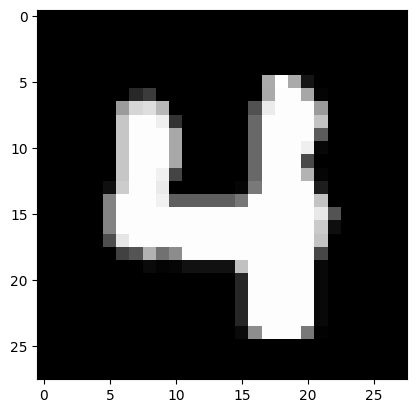

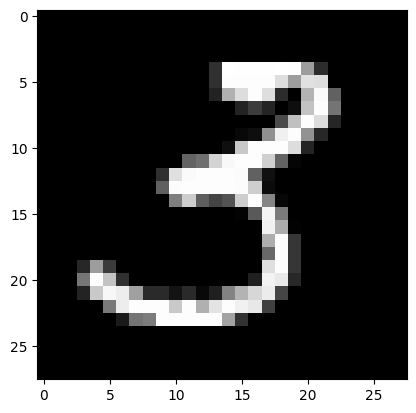

Accuracy of the model on test: 88.51 %
tot loss:  0.6445543766021729
tot loss:  1.2213908433914185
tot loss:  1.8583291172981262
tot loss:  2.4173567295074463
tot loss:  3.0509650707244873
tot loss:  3.6588167548179626
tot loss:  4.278036177158356
tot loss:  4.884878873825073
tot loss:  5.537144601345062
tot loss:  6.146370232105255
tot loss:  6.760467886924744
tot loss:  7.386990249156952
tot loss:  8.0059072971344
tot loss:  8.641781210899353
tot loss:  9.268814384937286
tot loss:  9.874716520309448
tot loss:  10.473530232906342
tot loss:  11.096263527870178
tot loss:  11.713244438171387
tot loss:  12.332284092903137
tot loss:  13.014469265937805
tot loss:  13.64375513792038
tot loss:  14.260254144668579
tot loss:  14.847534596920013
tot loss:  15.48677259683609
tot loss:  16.153258502483368
tot loss:  16.69896811246872
tot loss:  17.302028834819794
tot loss:  17.943395793437958
tot loss:  18.5618936419487
tot loss:  19.190531849861145
tot loss:  19.793636679649353
tot loss:  20.4179

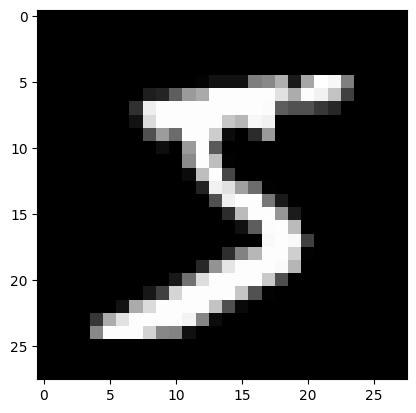

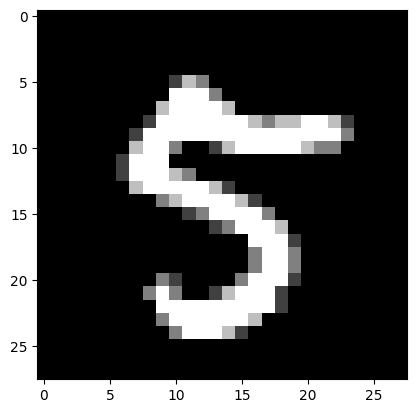

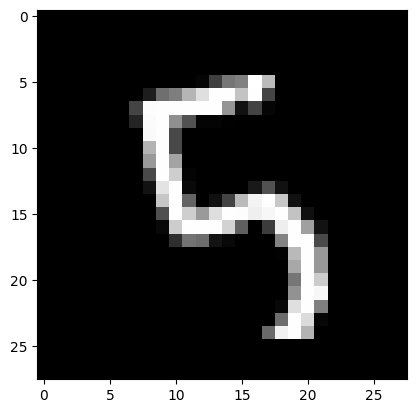

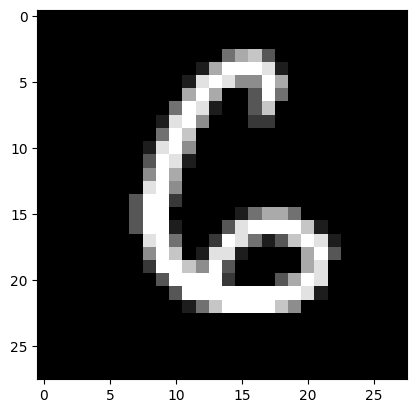

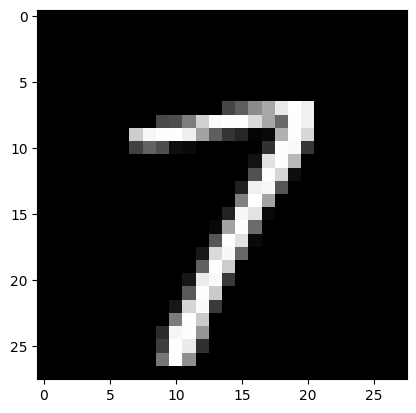

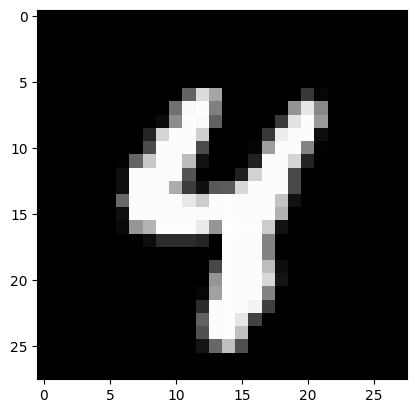

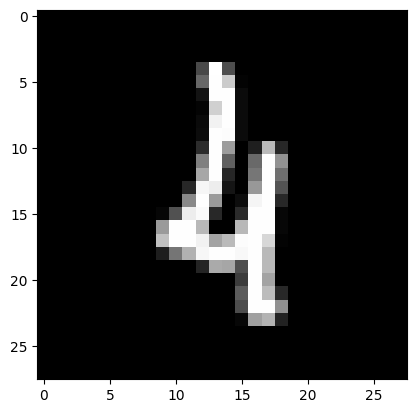

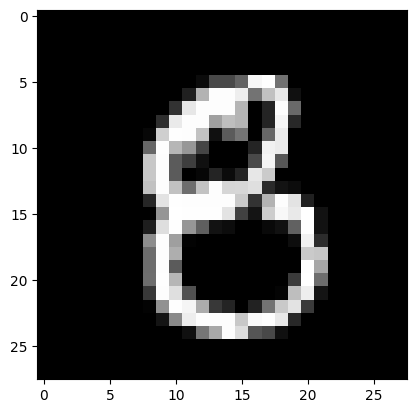

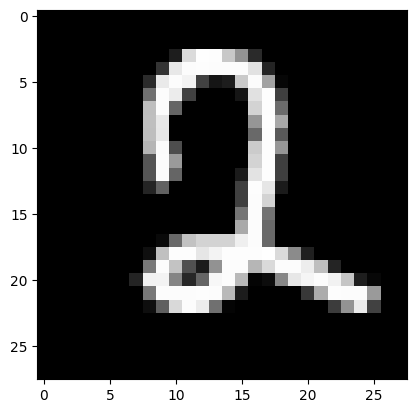

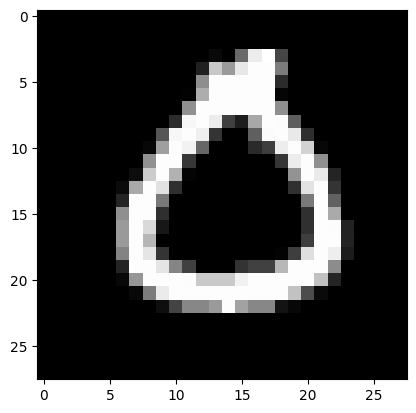

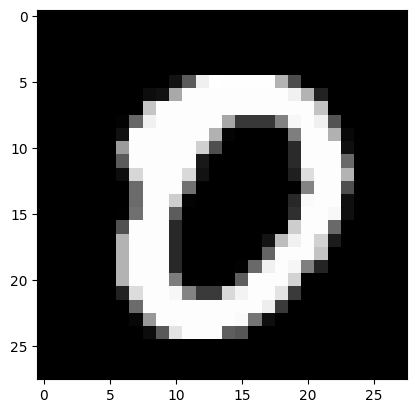

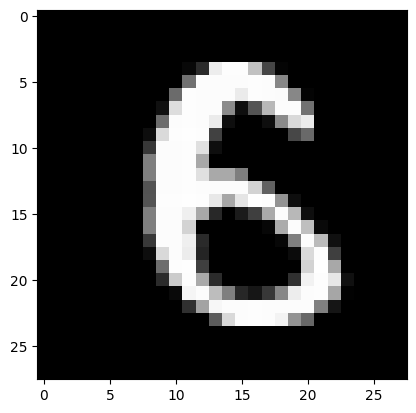

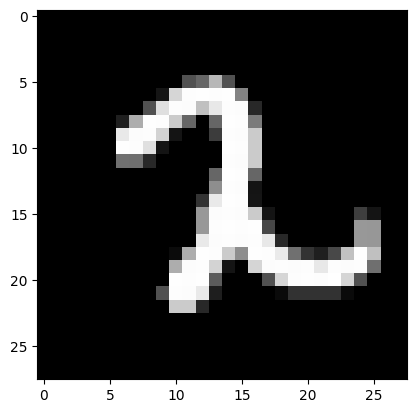

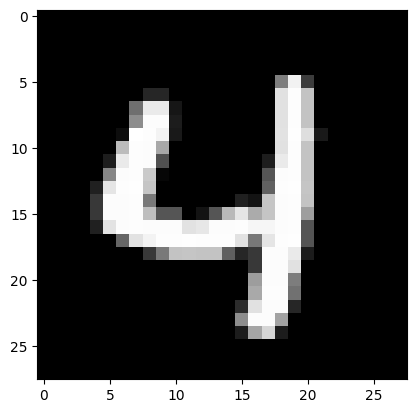

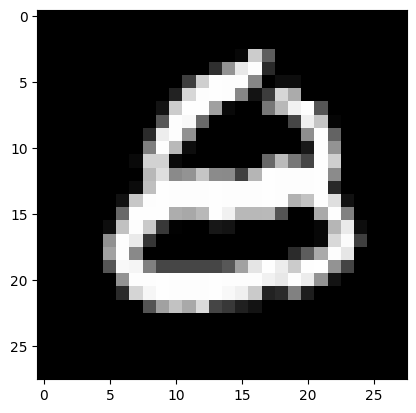

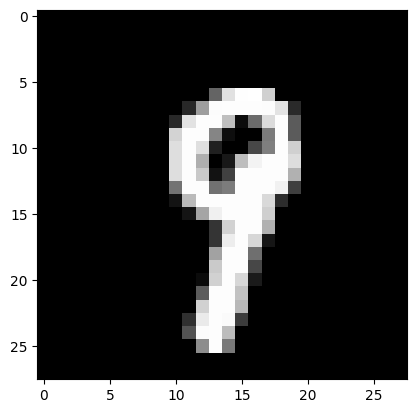

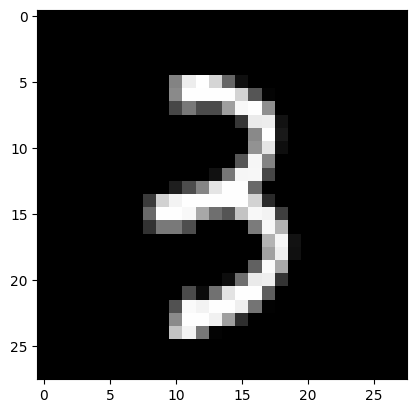

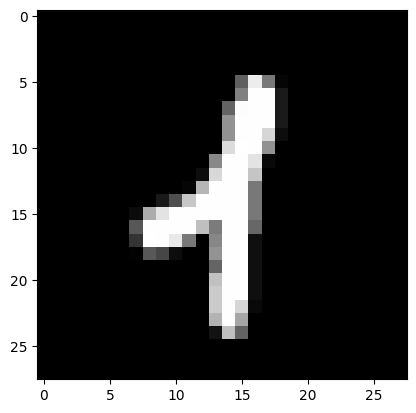

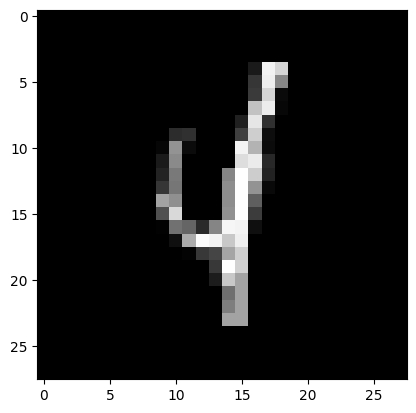

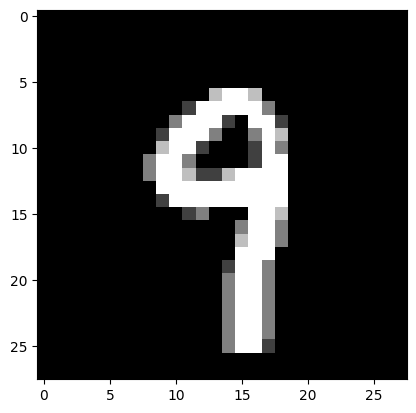

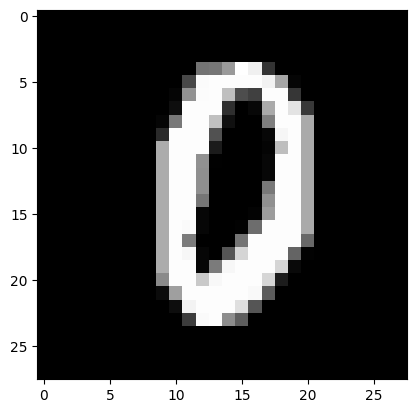

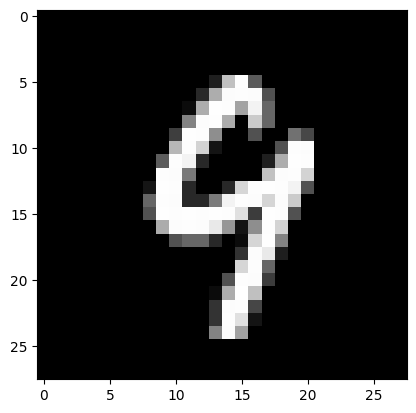

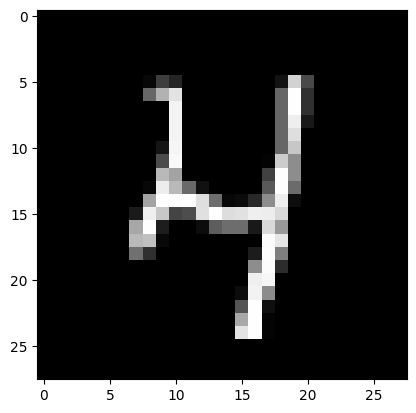

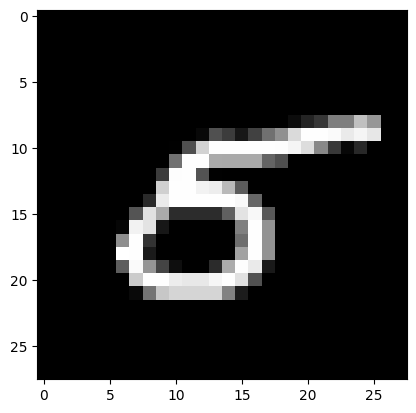

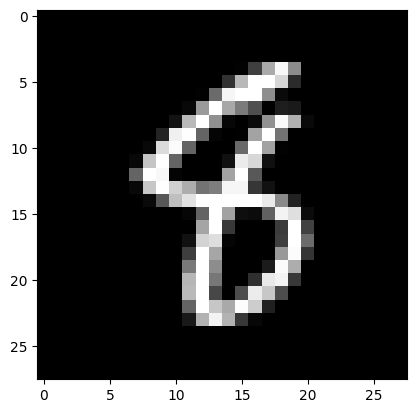

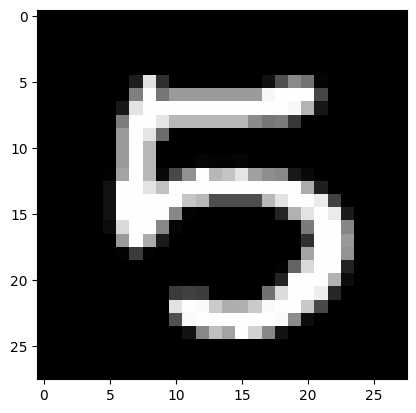

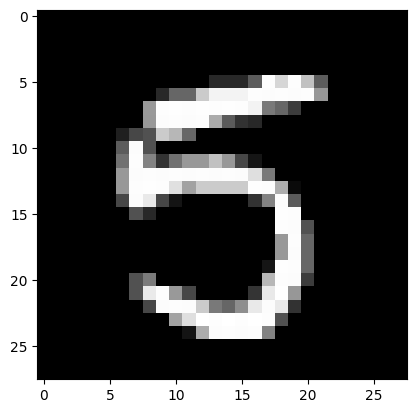

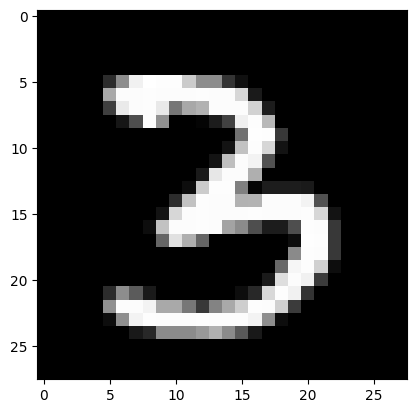

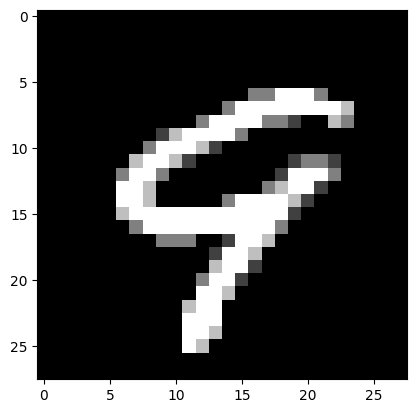

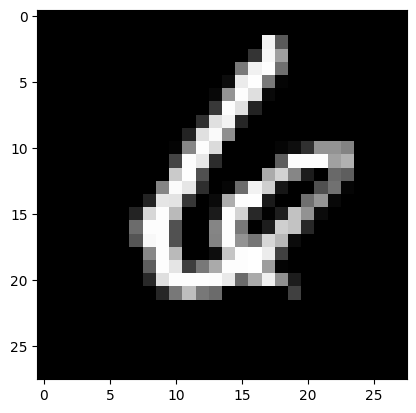

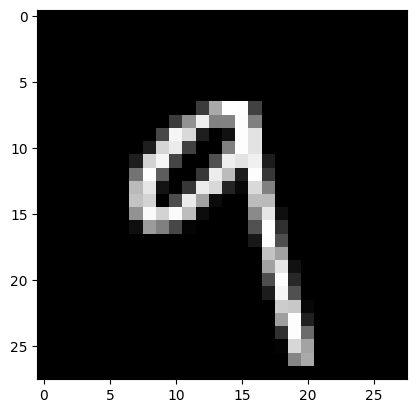

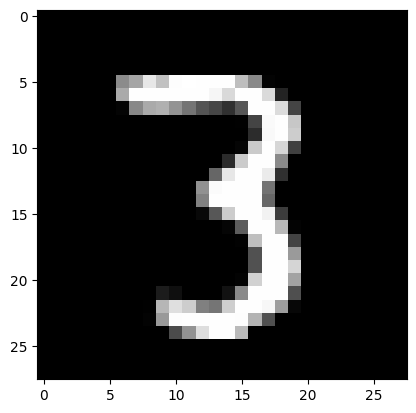

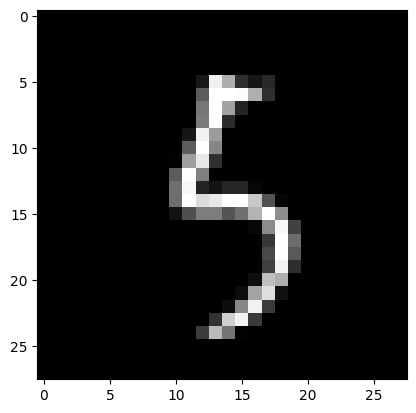

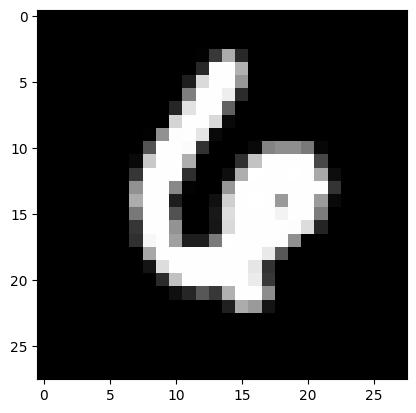

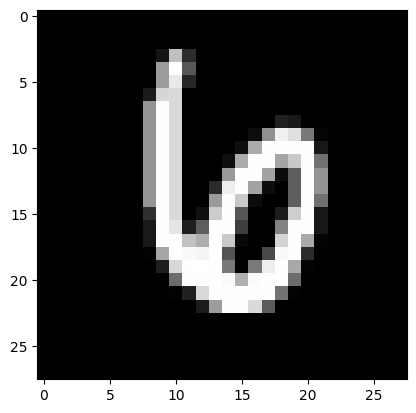

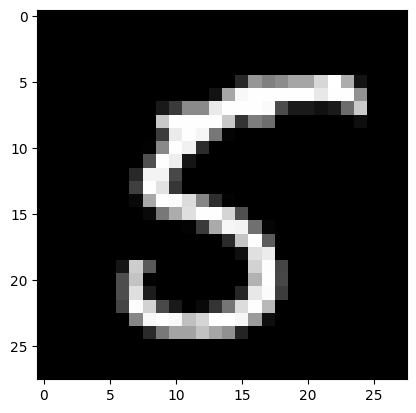

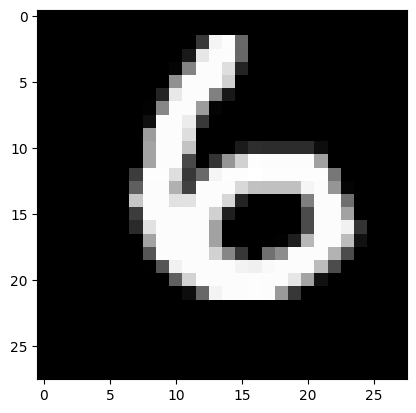

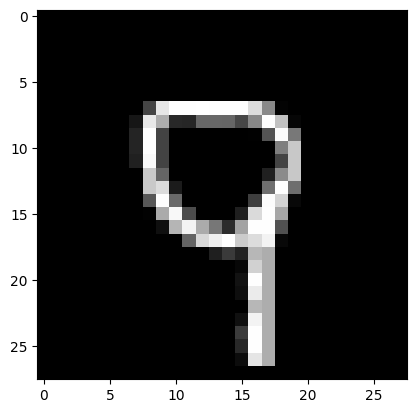

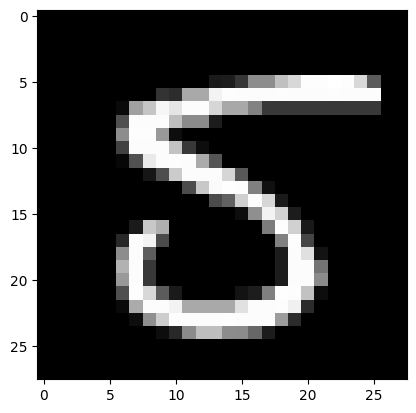

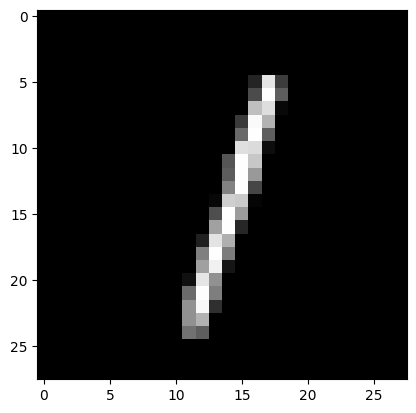

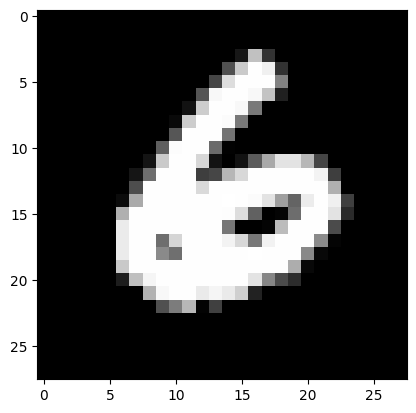

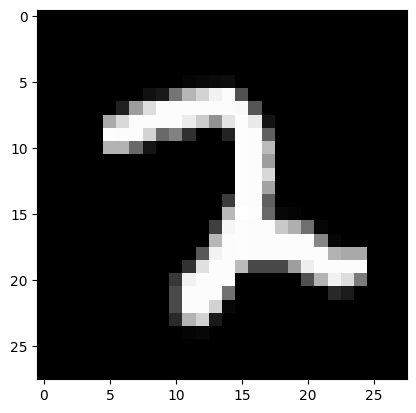

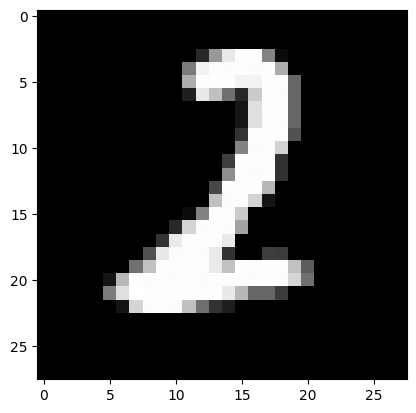

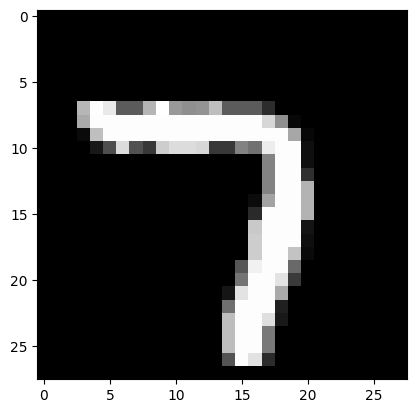

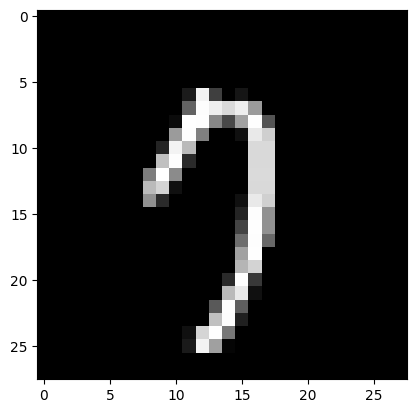

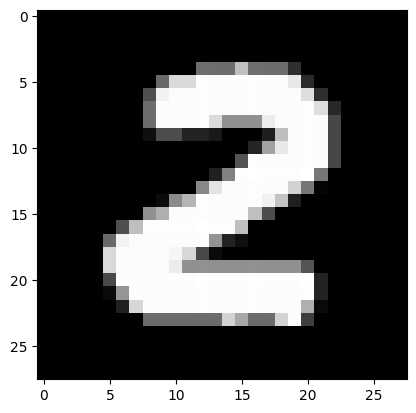

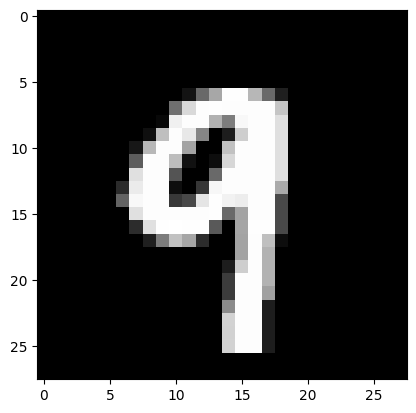

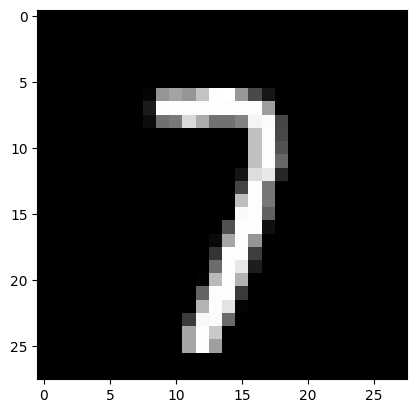

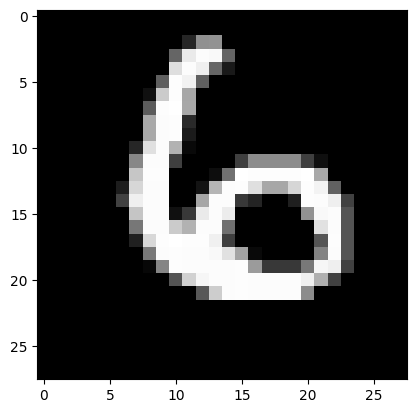

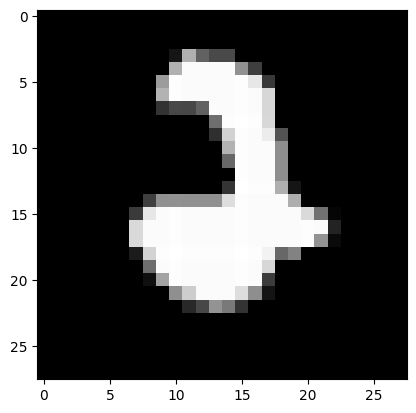

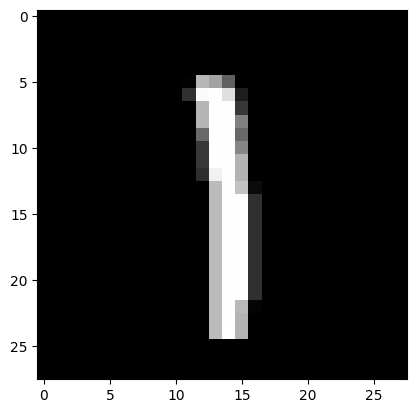

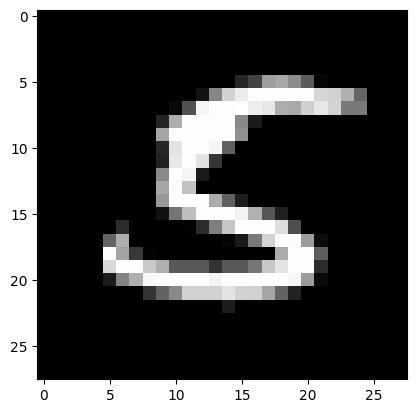

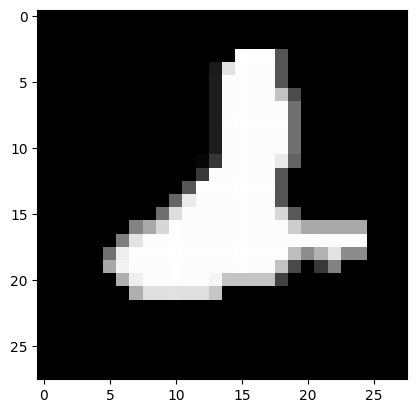

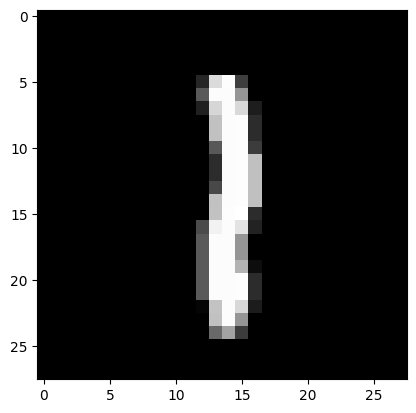

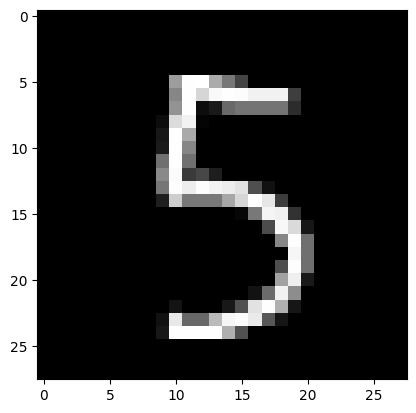

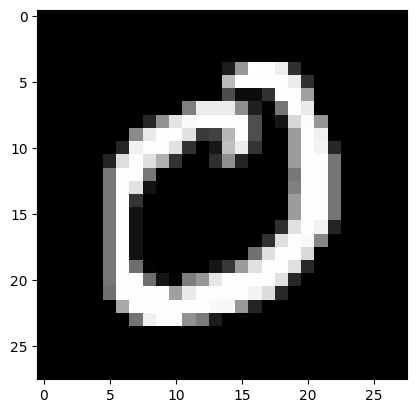

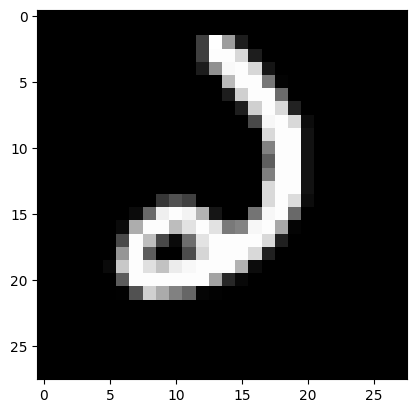

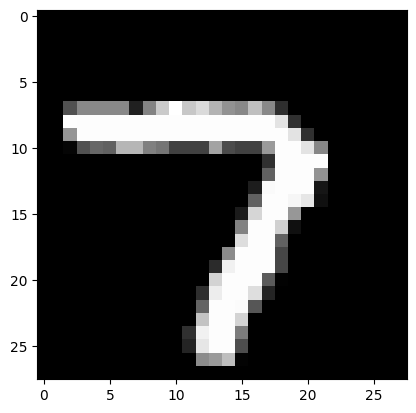

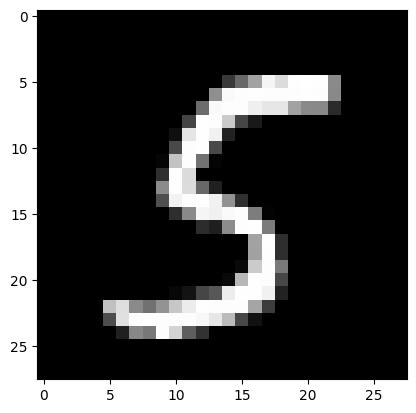

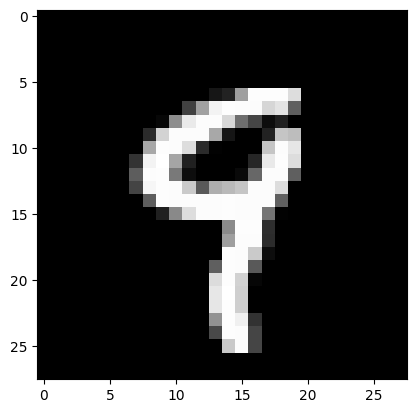

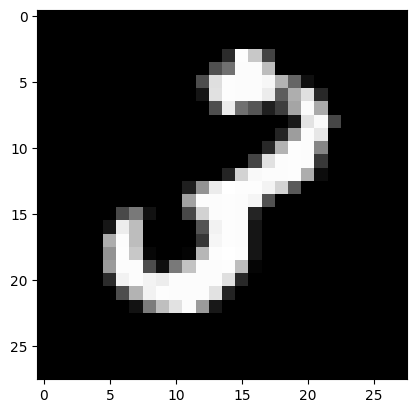

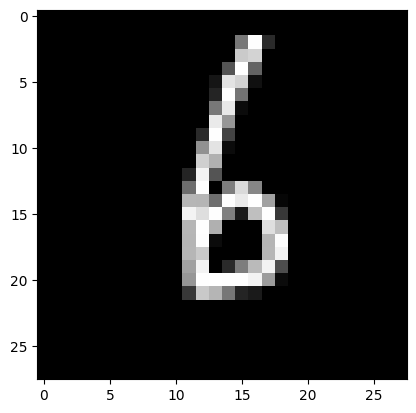

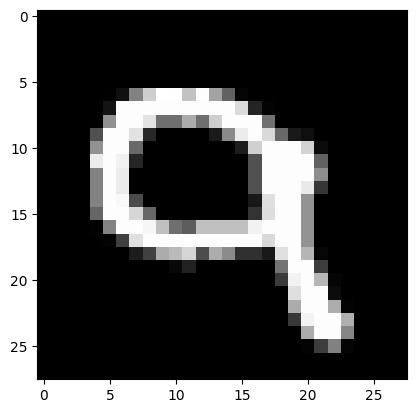

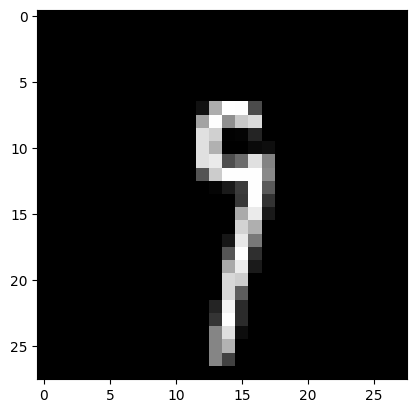

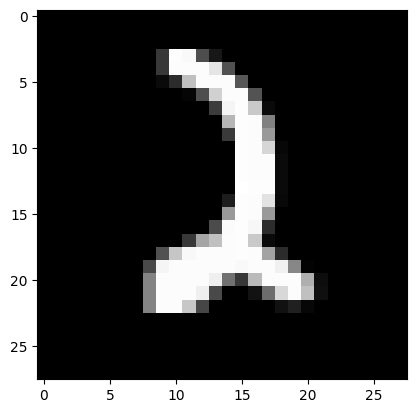

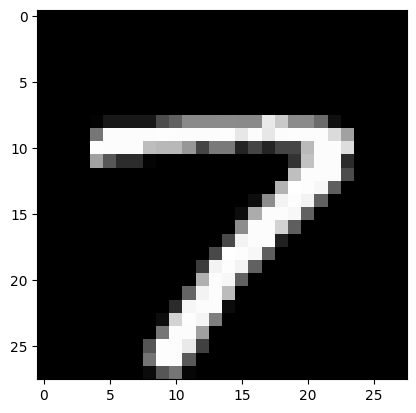

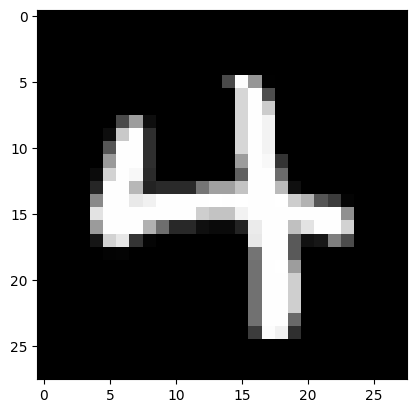

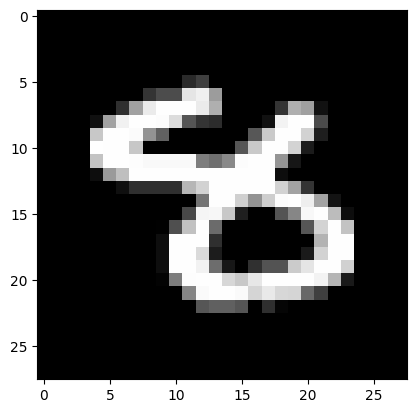

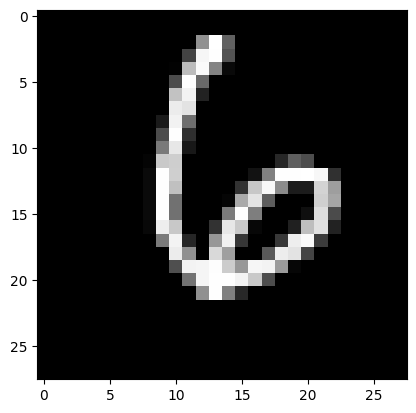

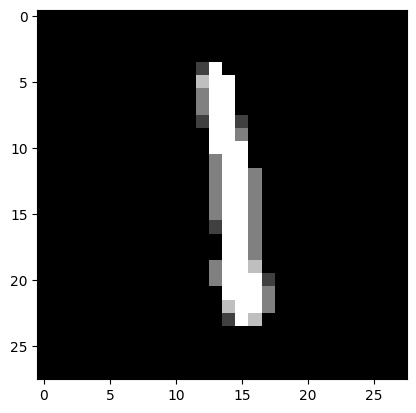

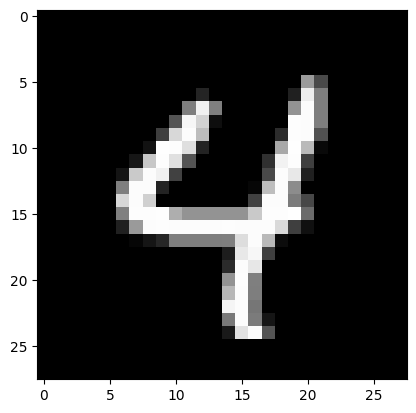

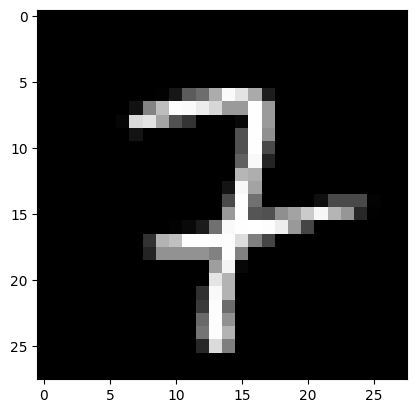

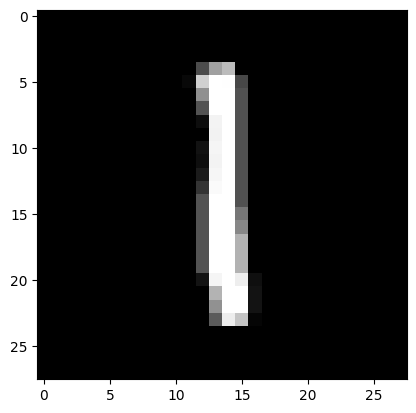

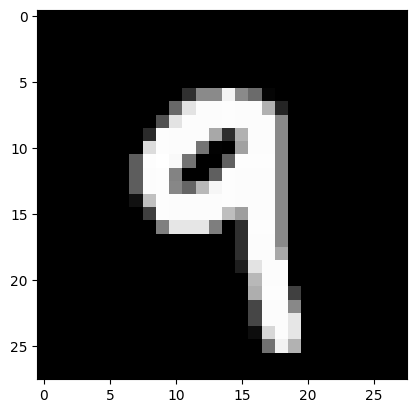

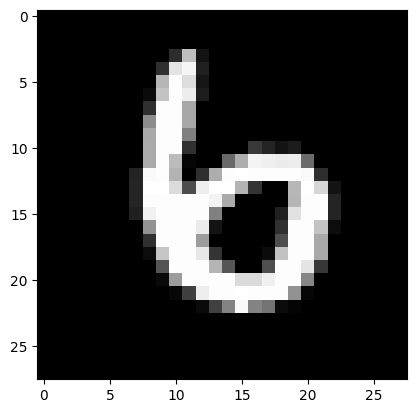

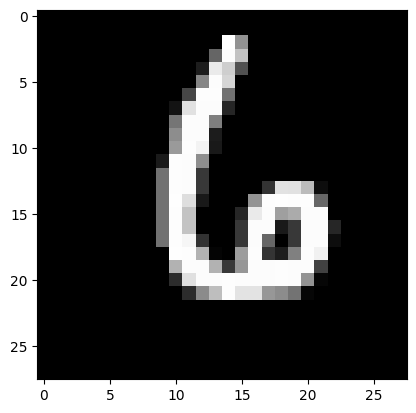

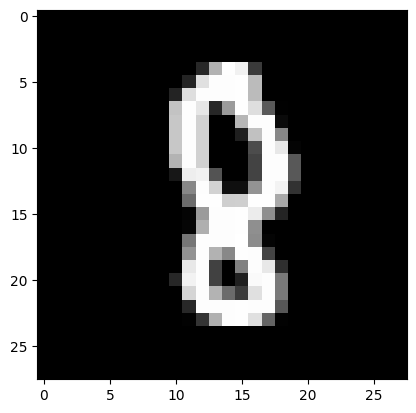

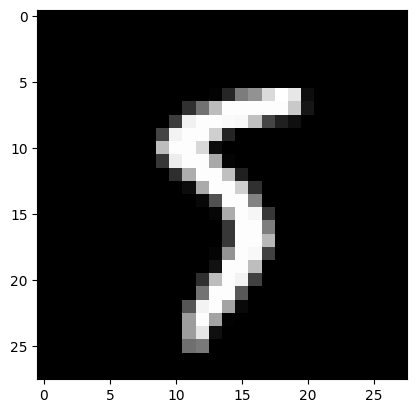

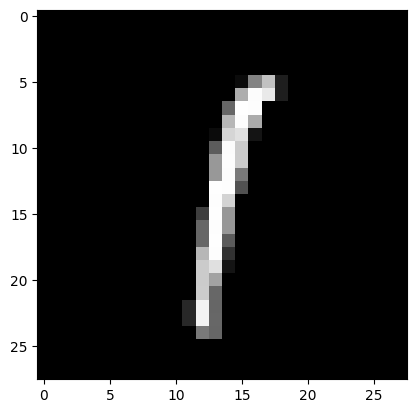

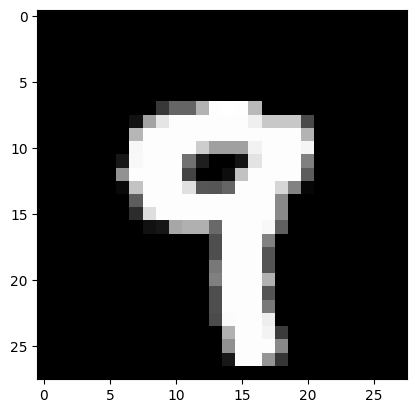

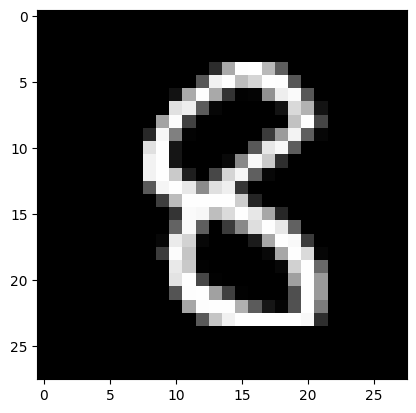

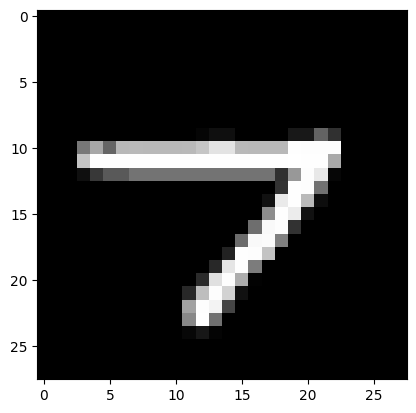

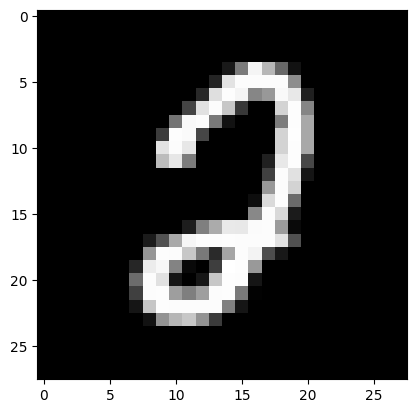

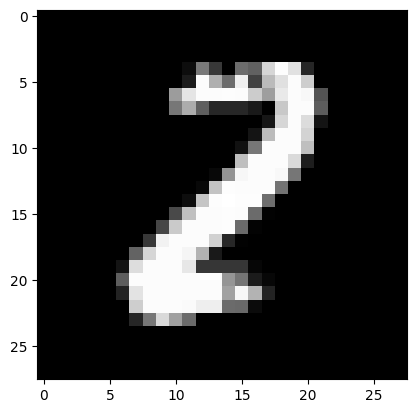

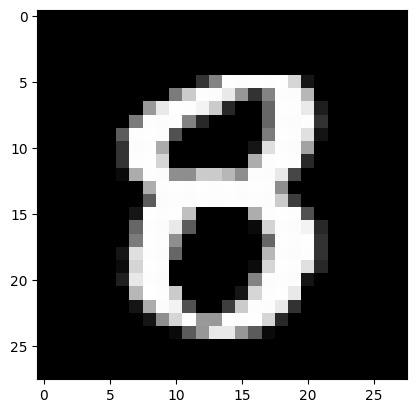

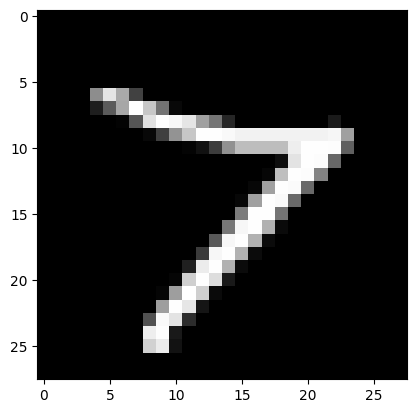

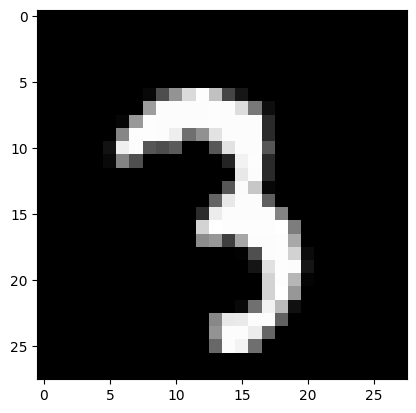

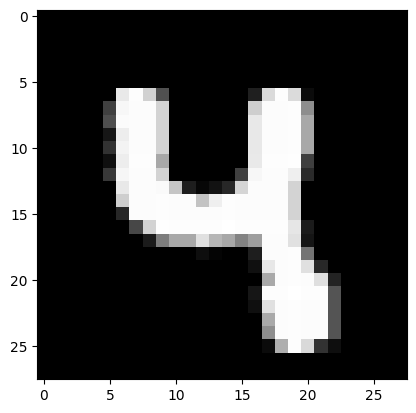

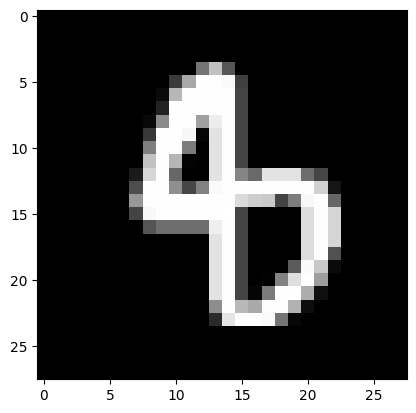

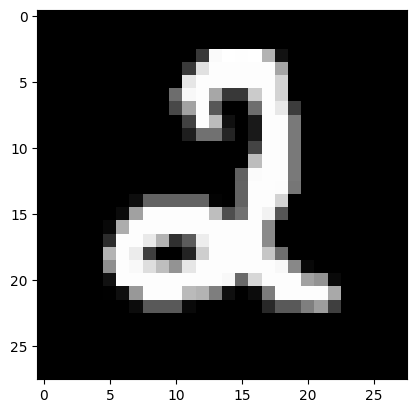

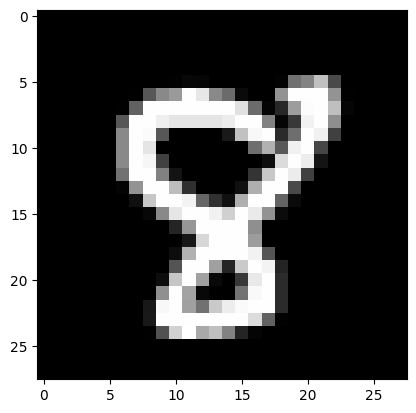

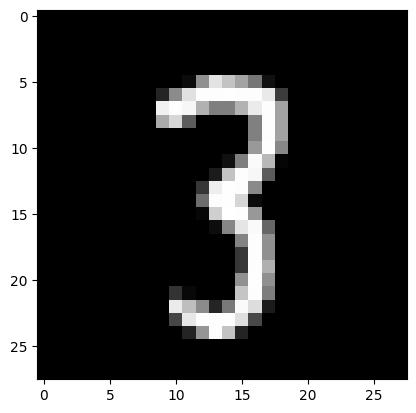

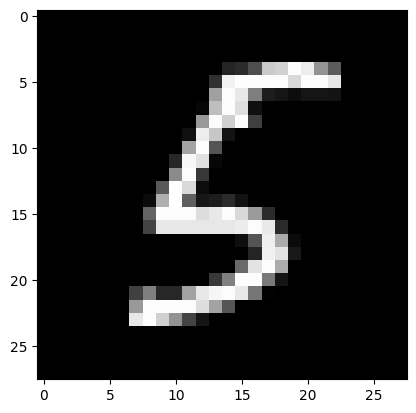

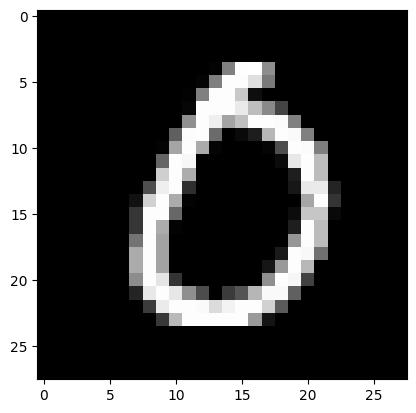

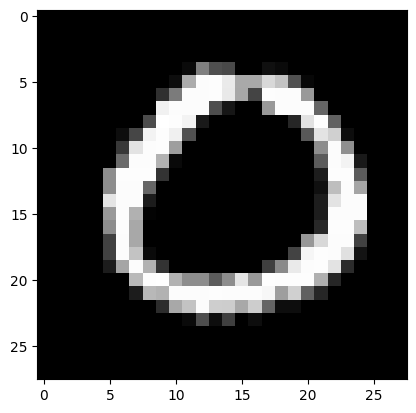

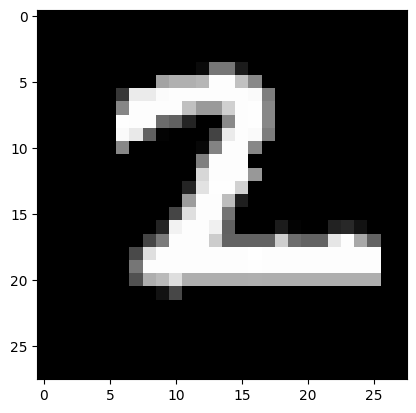

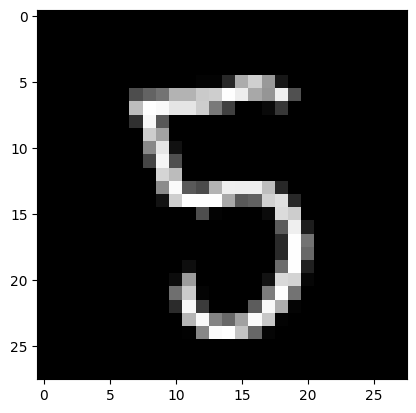

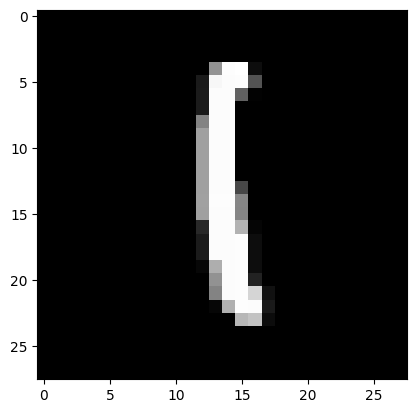

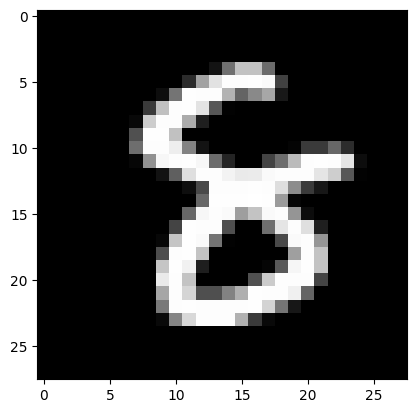

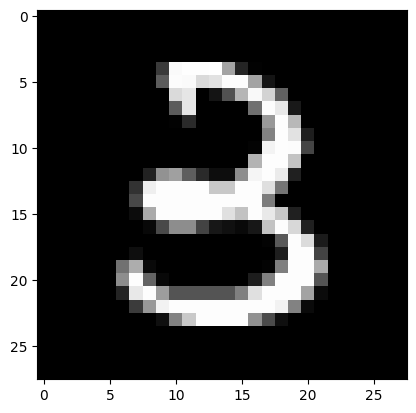

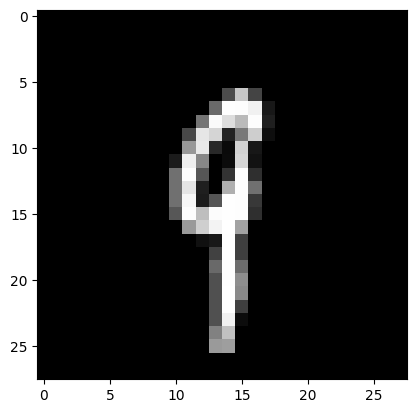

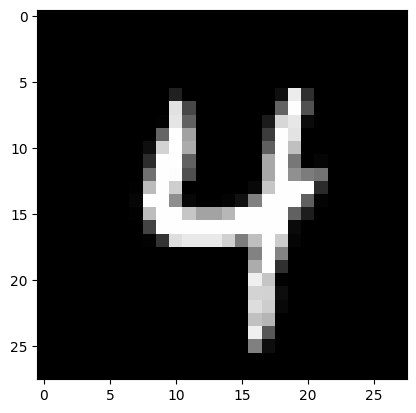

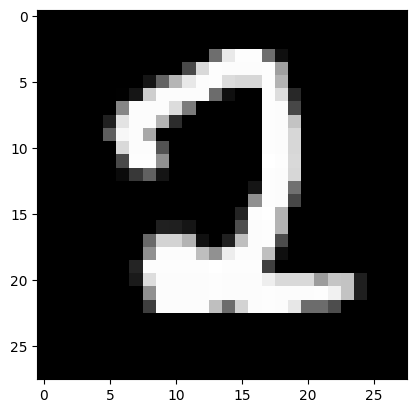

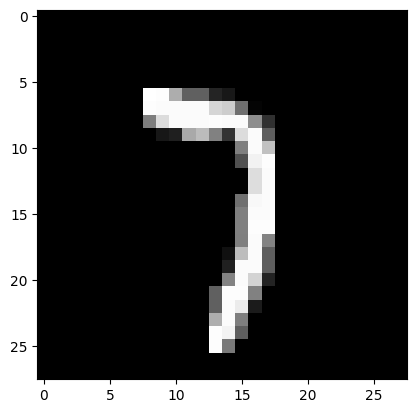

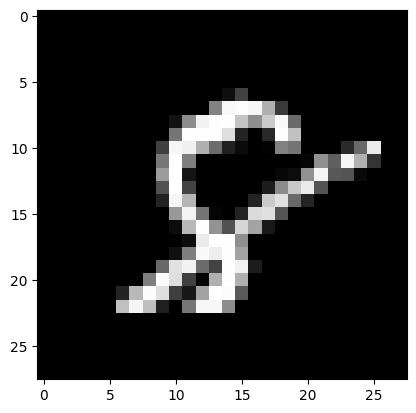

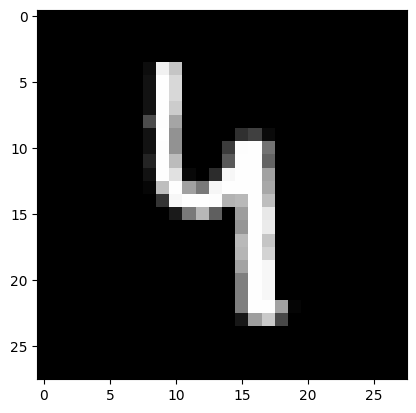

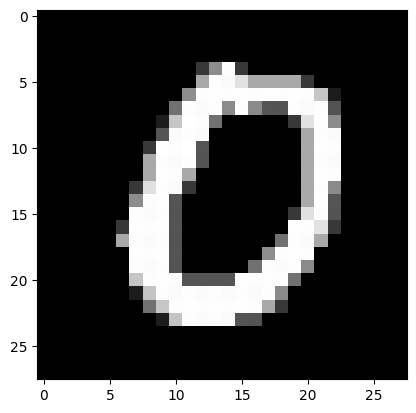

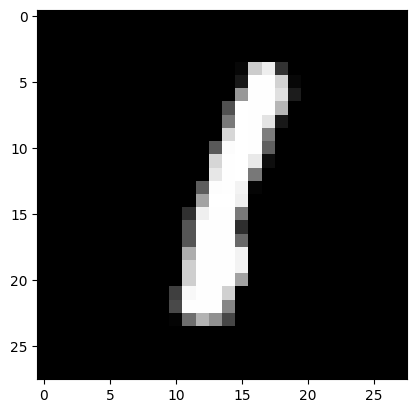

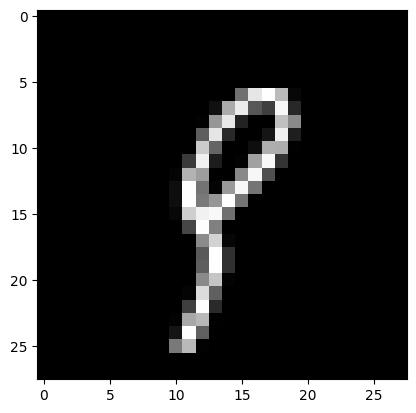

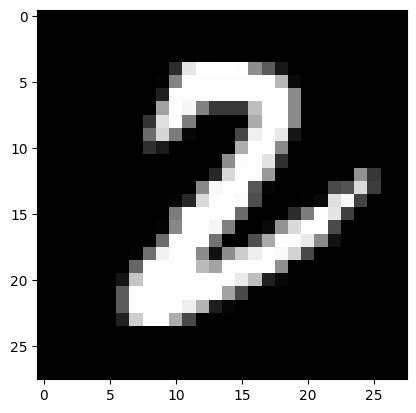

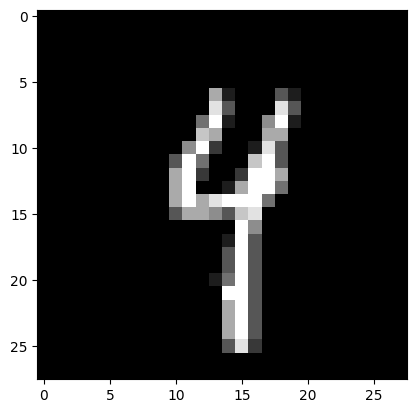

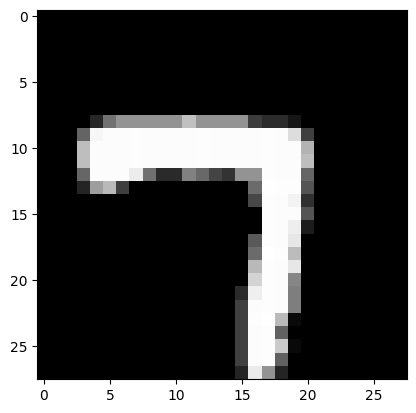

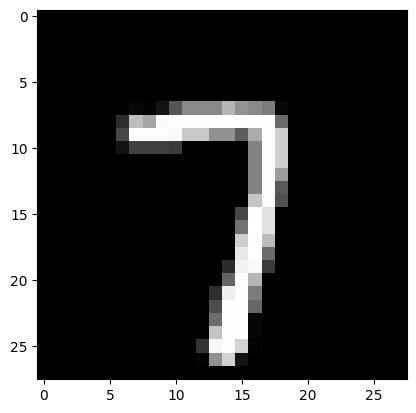

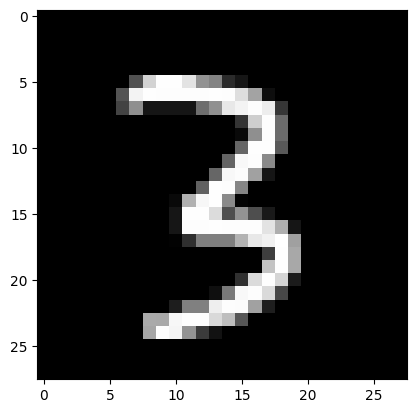

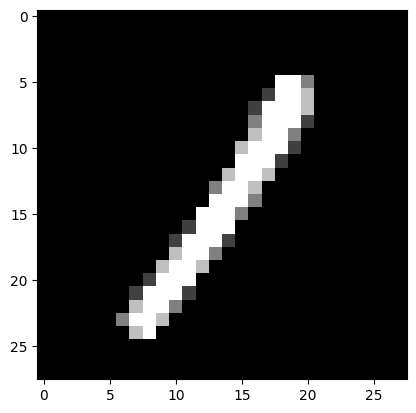

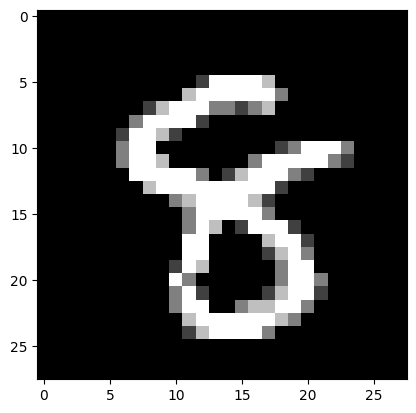

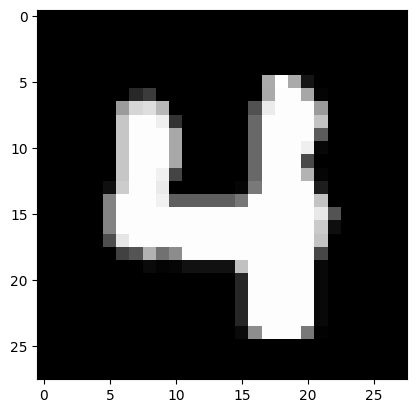

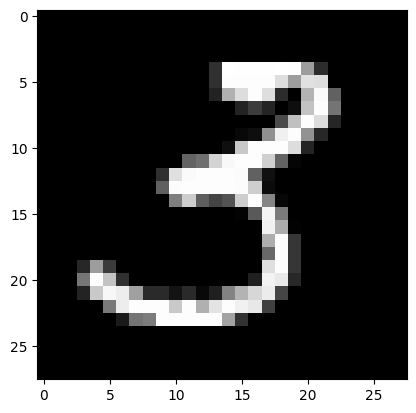

Accuracy of the model on test: 88.61 %
tot loss:  0.6438465118408203
tot loss:  1.2214199304580688
tot loss:  1.8849742412567139
tot loss:  2.5503432154655457
tot loss:  3.1509652733802795
tot loss:  3.776107132434845
tot loss:  4.474259853363037
tot loss:  5.203181266784668
tot loss:  5.8247973918914795
tot loss:  6.492806077003479
tot loss:  7.119202613830566
tot loss:  7.838678956031799
tot loss:  8.511151909828186
tot loss:  9.17683744430542
tot loss:  9.887616395950317
tot loss:  10.605208396911621
tot loss:  11.306936502456665
tot loss:  12.01545399427414
tot loss:  12.793371856212616
tot loss:  13.505968630313873
tot loss:  14.260902464389801
tot loss:  14.985034346580505
tot loss:  15.666926741600037
tot loss:  16.315318822860718
tot loss:  16.885890424251556
tot loss:  17.51920336484909
tot loss:  18.175667941570282
tot loss:  18.748130679130554
tot loss:  19.39265811443329
tot loss:  20.046529531478882
tot loss:  20.704469442367554
tot loss:  21.346192955970764
tot loss:  22.

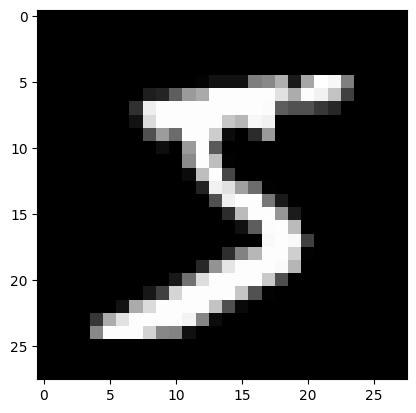

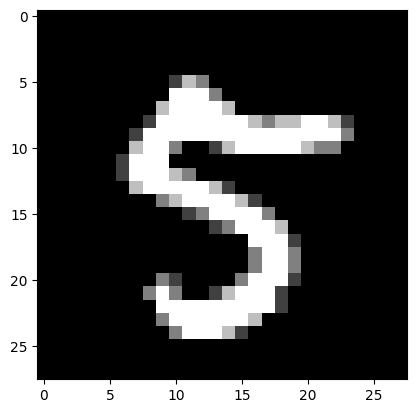

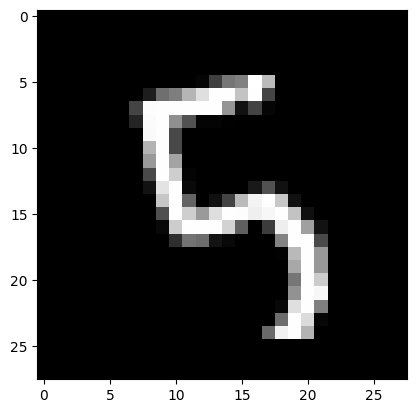

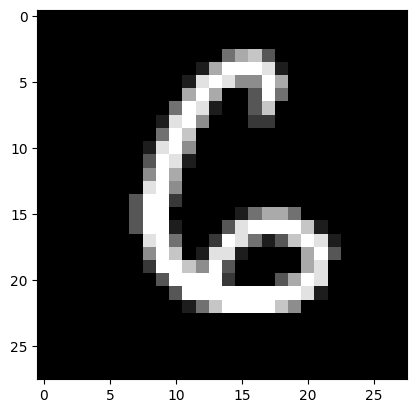

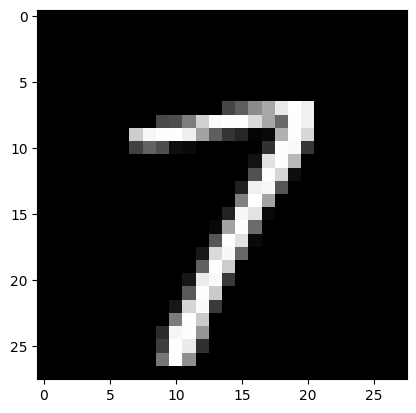

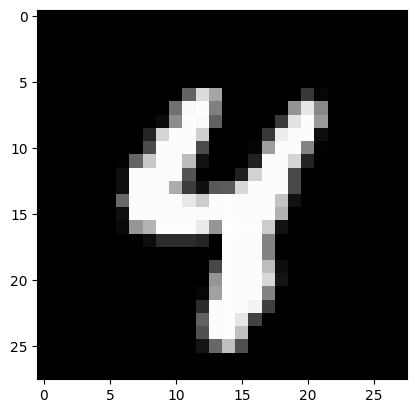

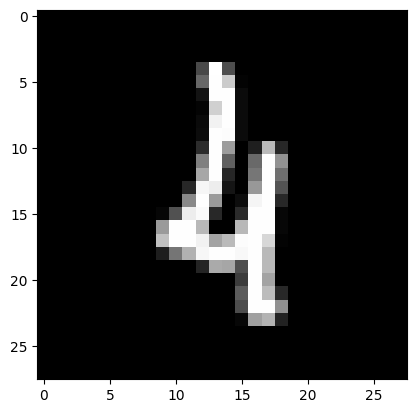

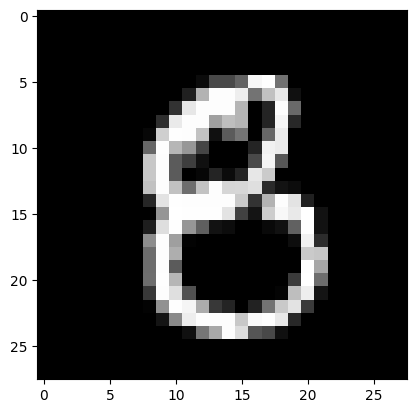

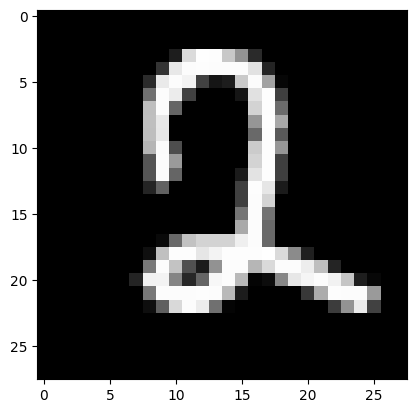

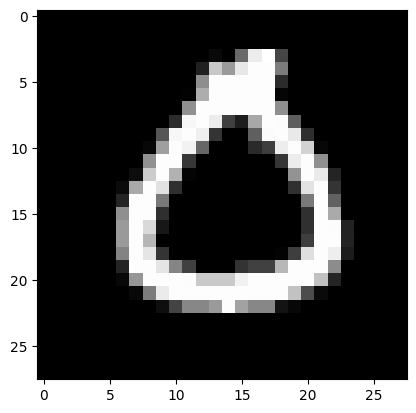

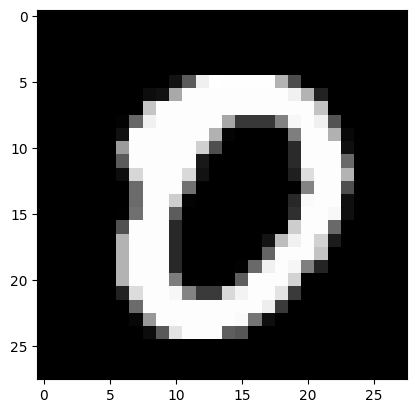

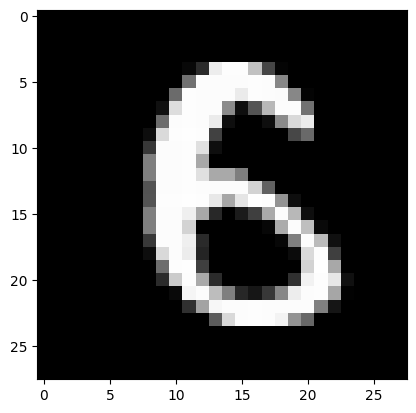

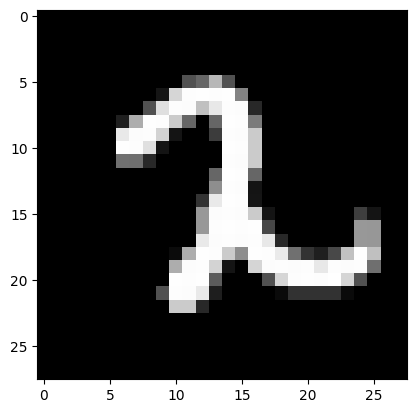

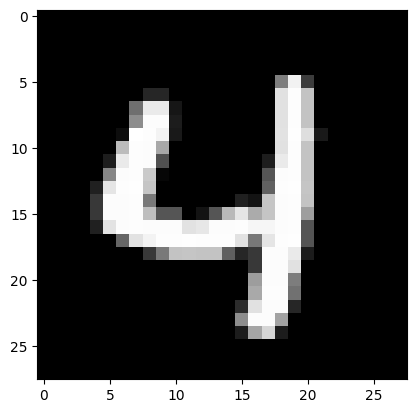

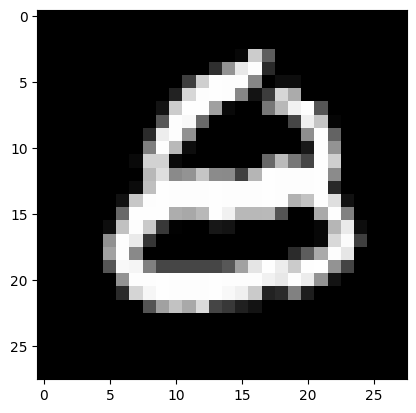

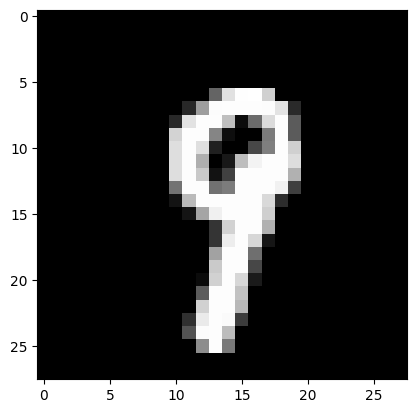

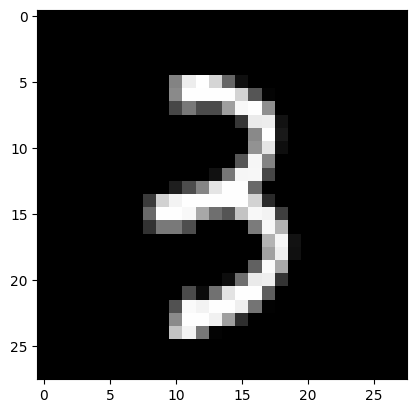

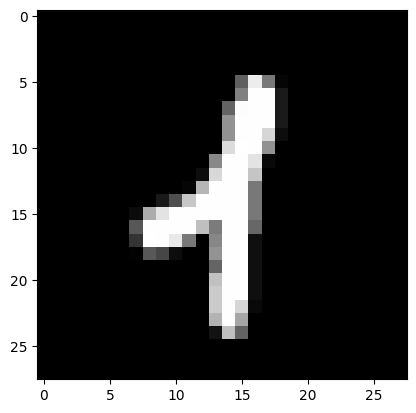

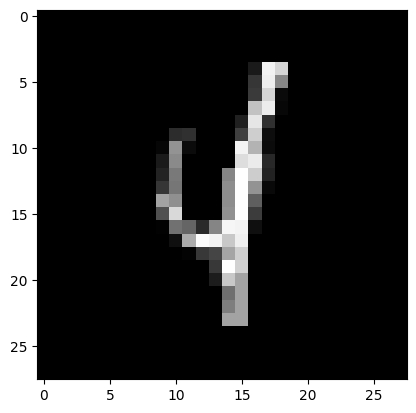

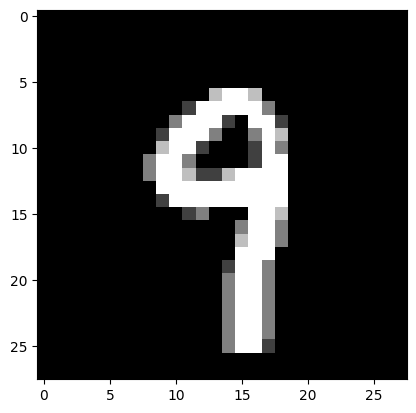

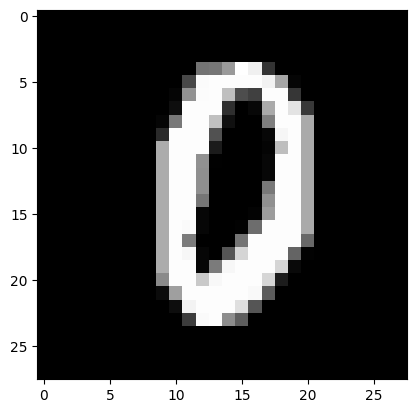

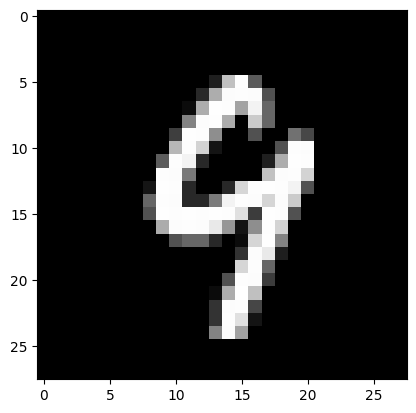

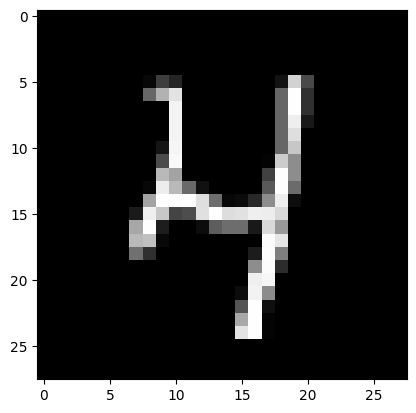

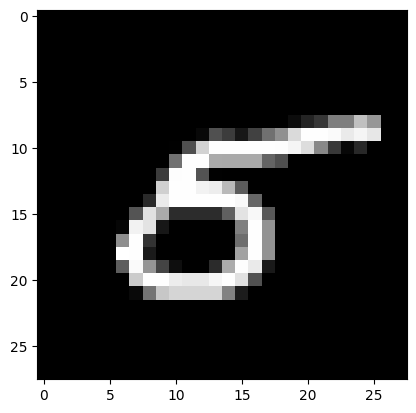

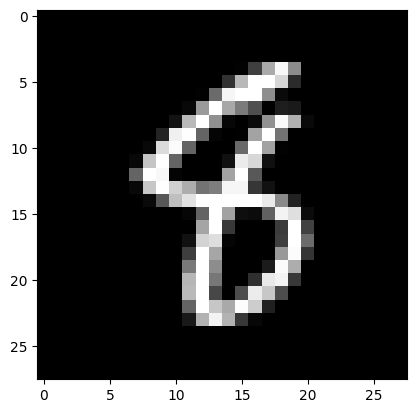

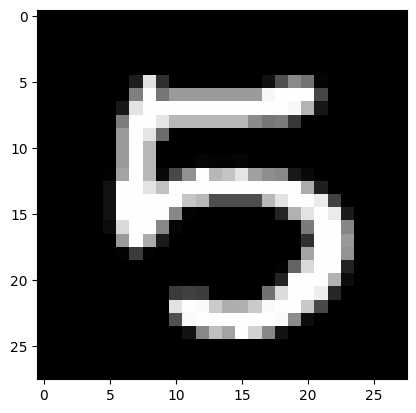

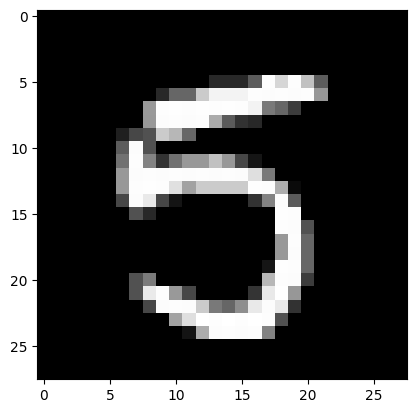

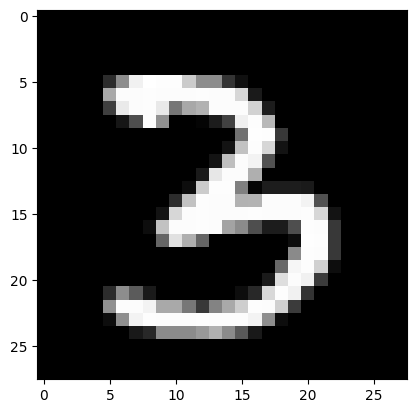

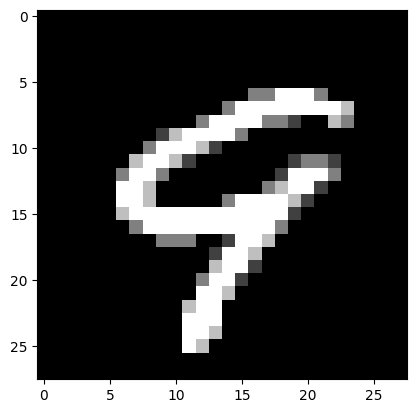

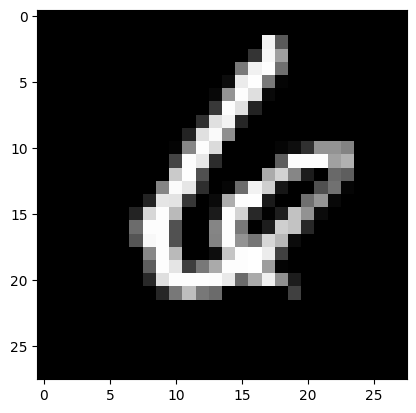

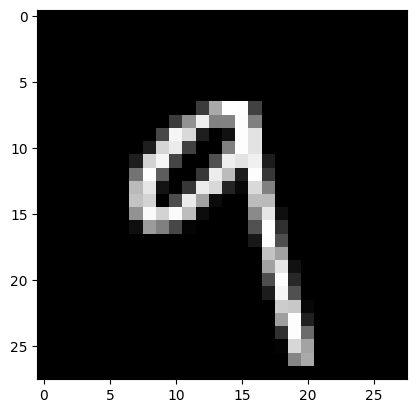

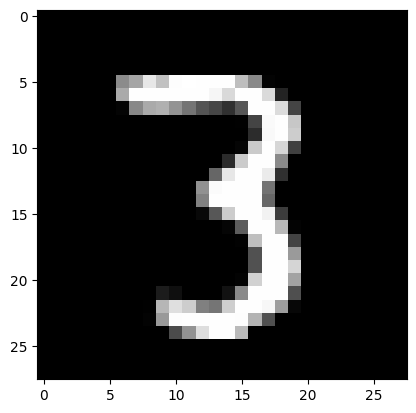

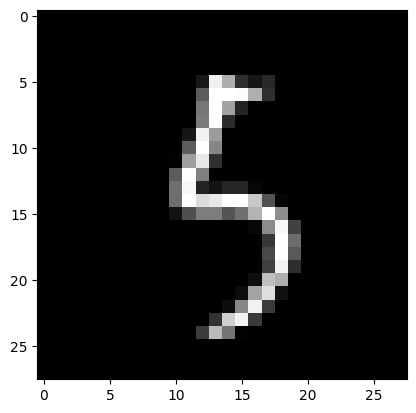

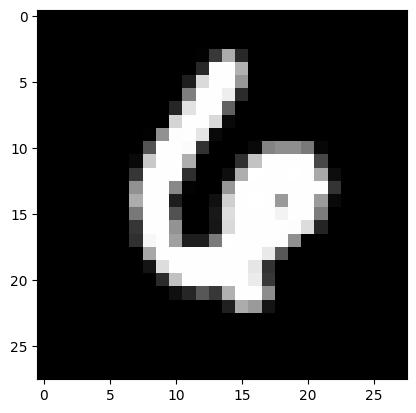

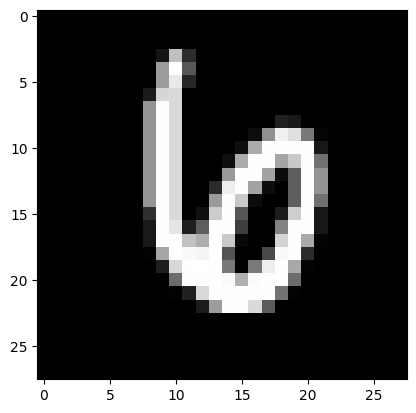

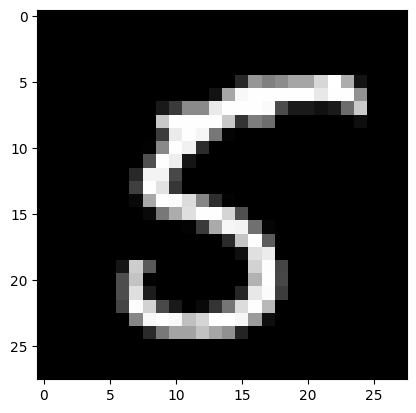

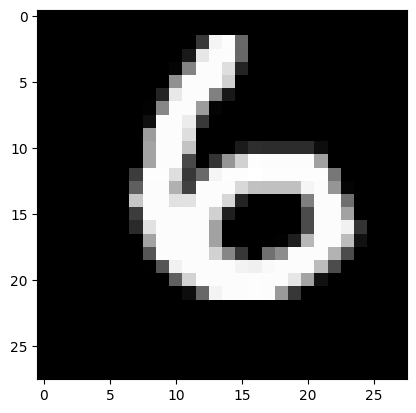

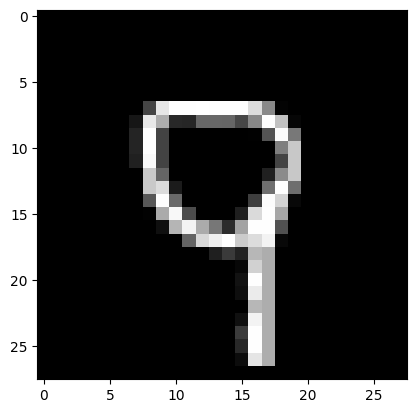

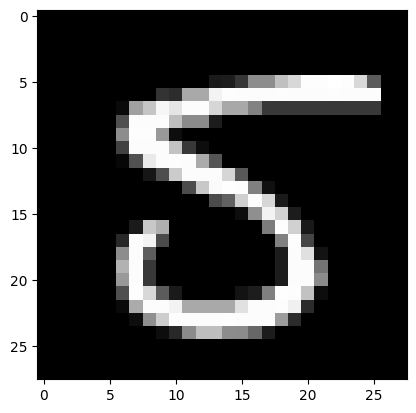

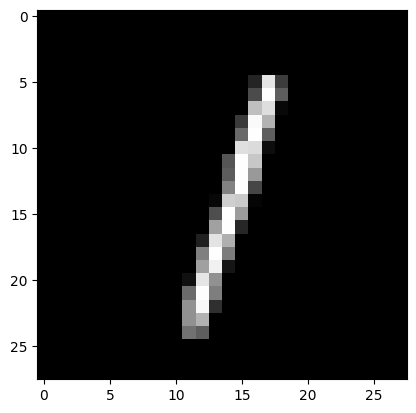

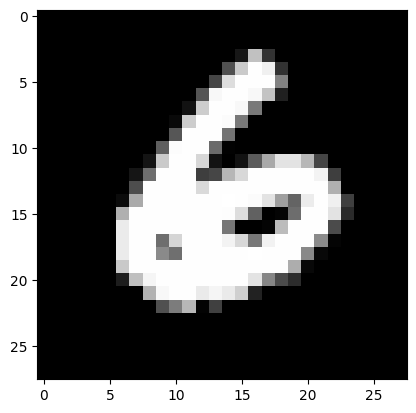

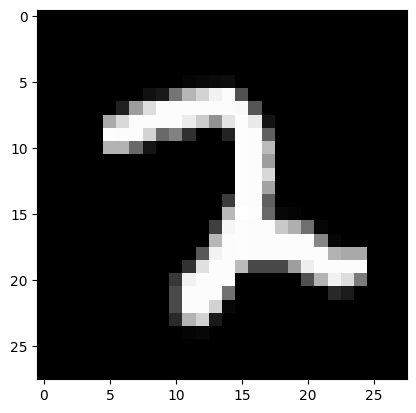

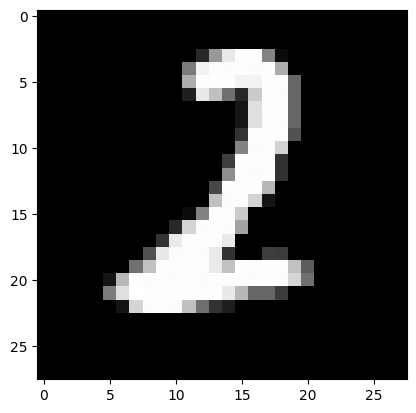

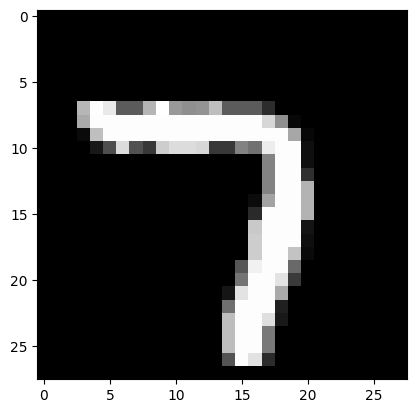

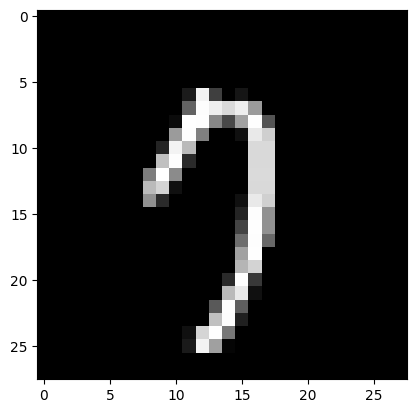

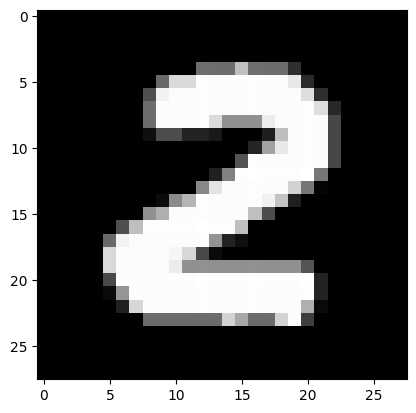

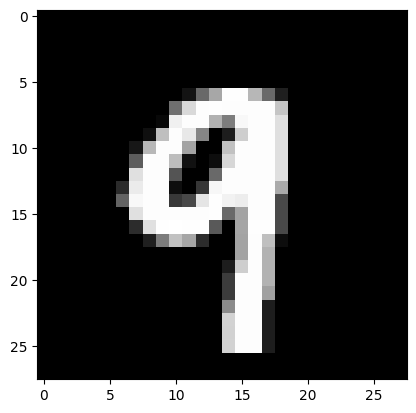

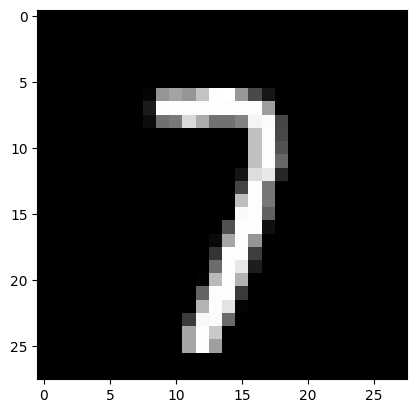

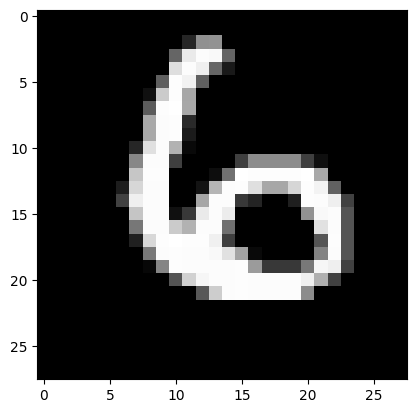

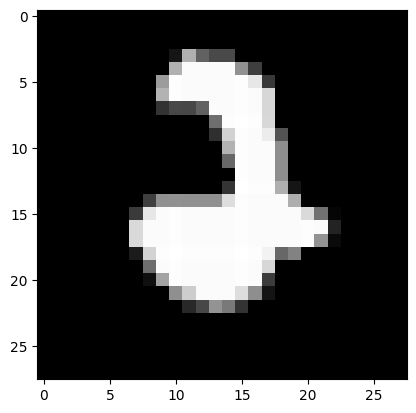

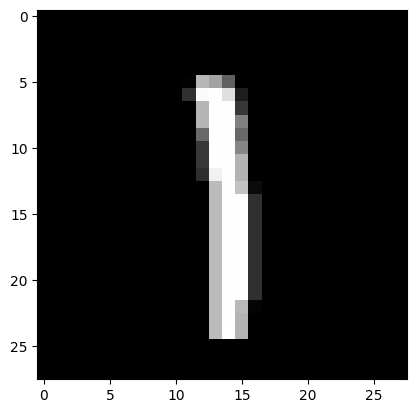

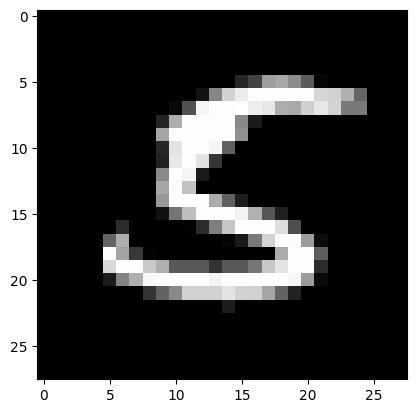

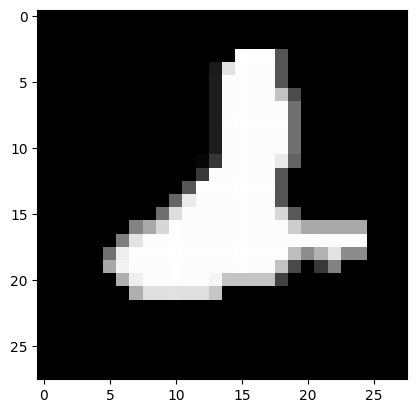

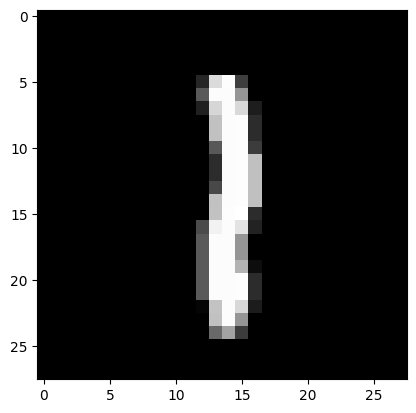

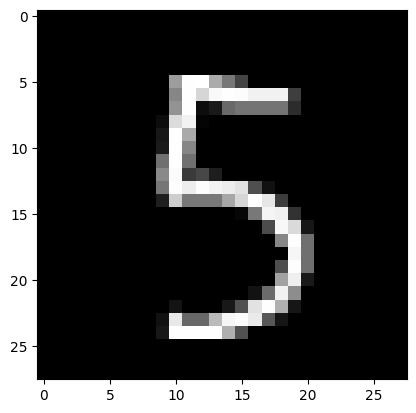

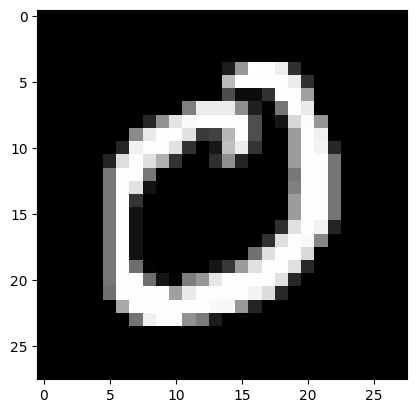

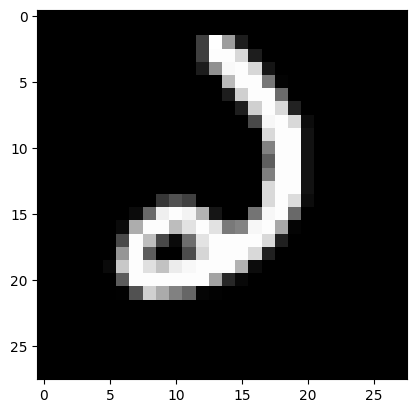

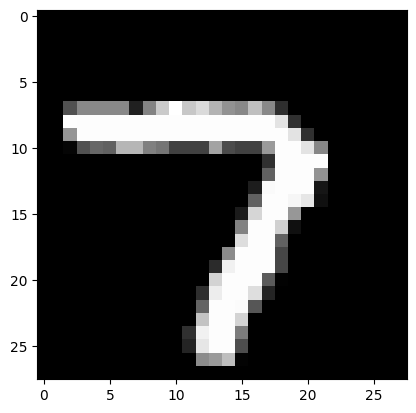

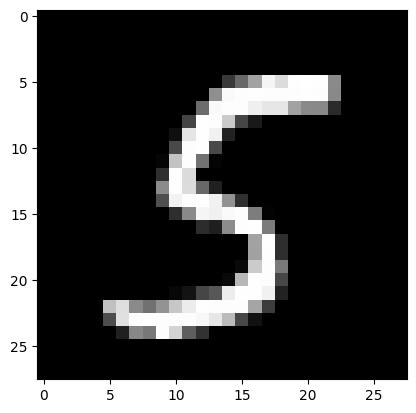

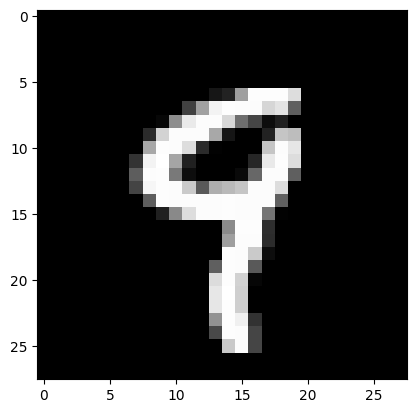

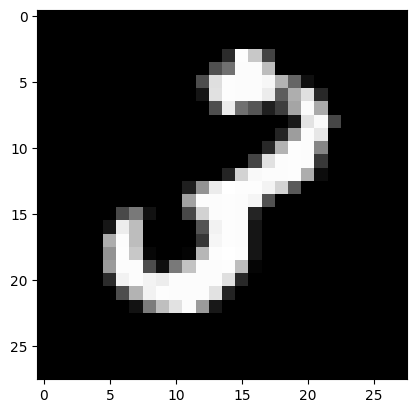

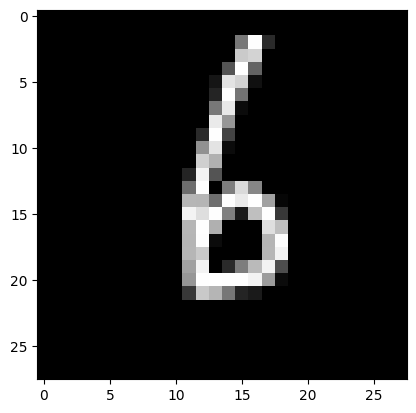

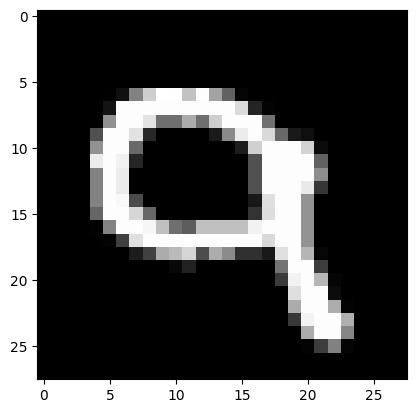

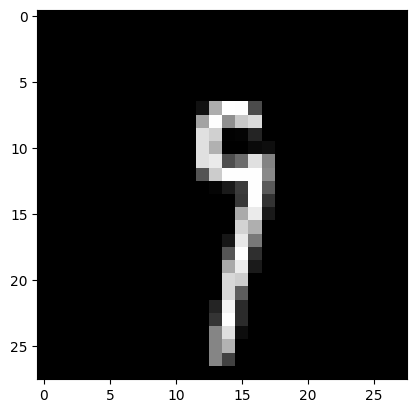

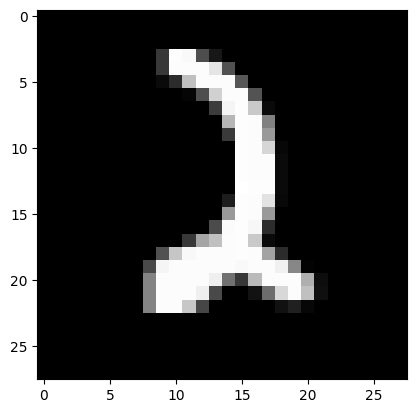

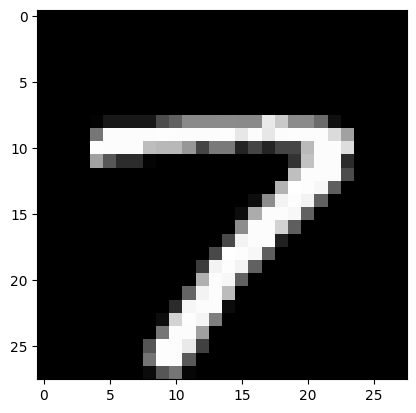

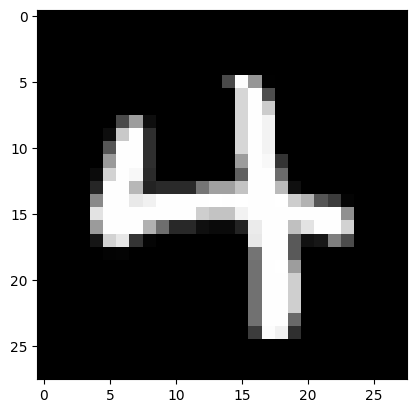

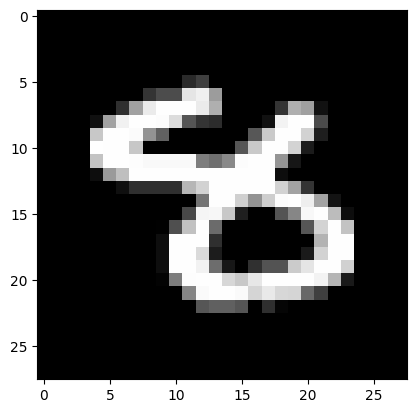

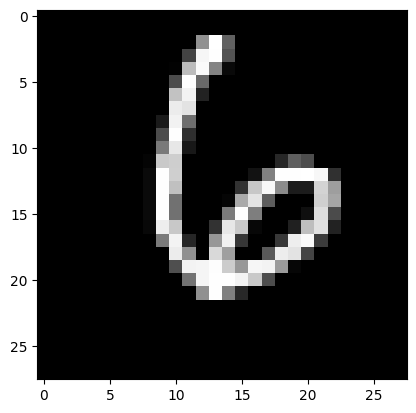

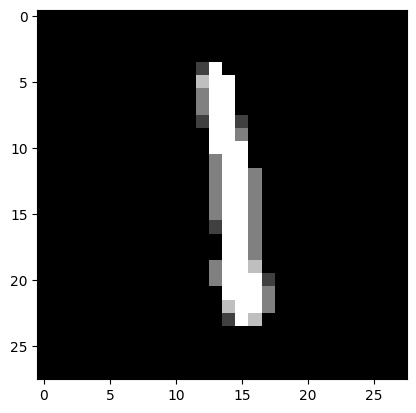

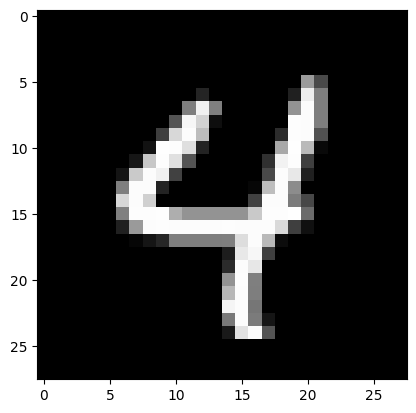

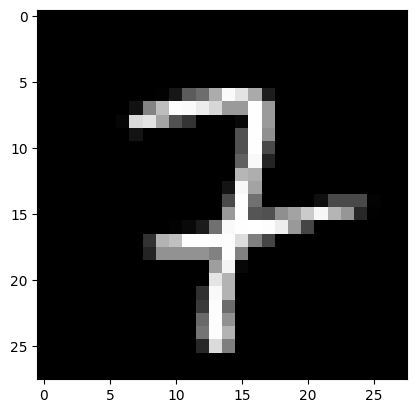

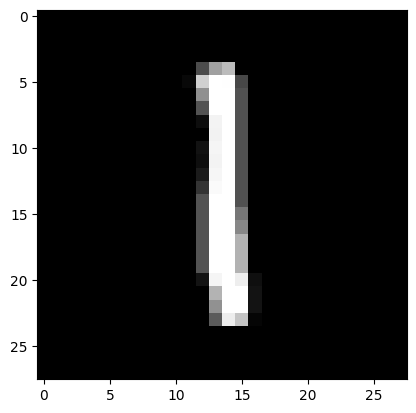

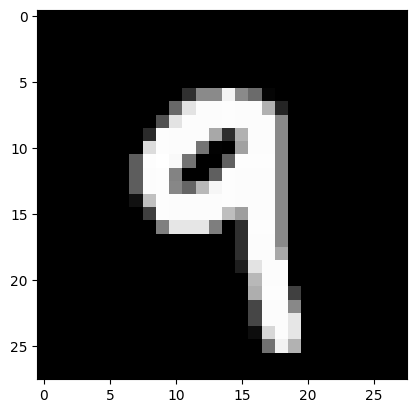

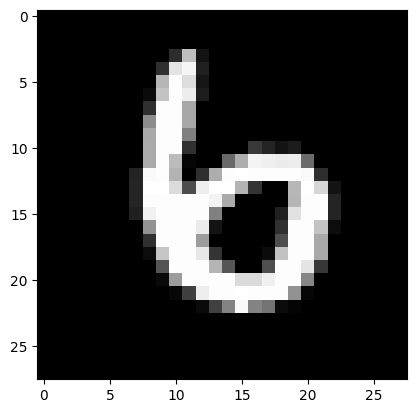

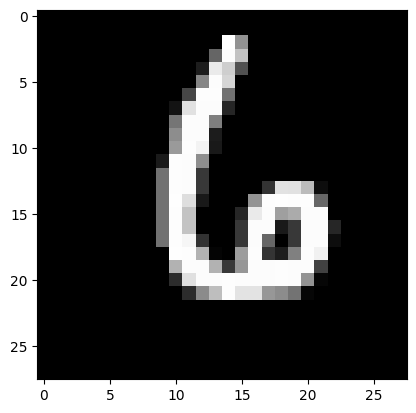

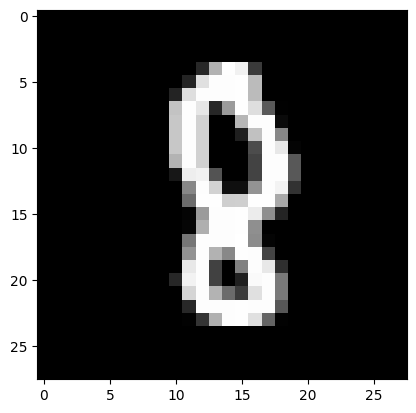

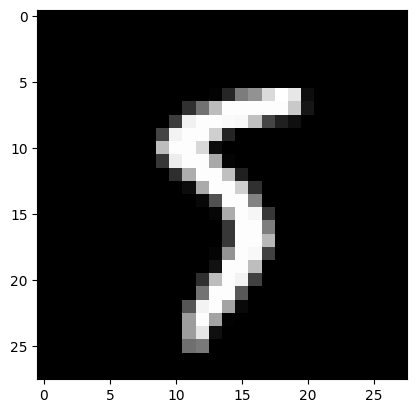

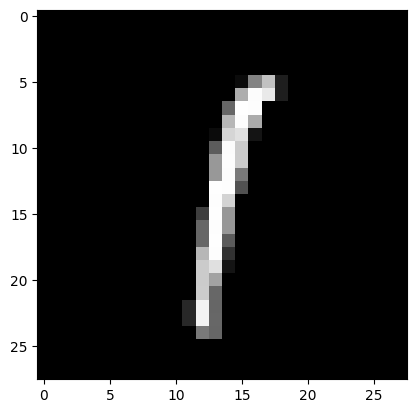

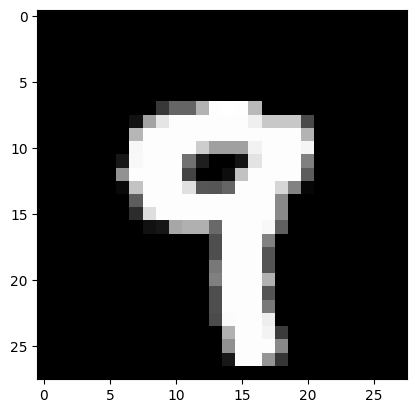

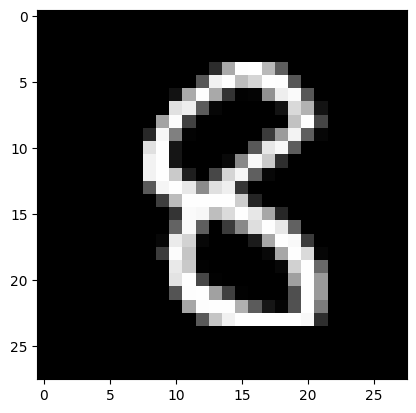

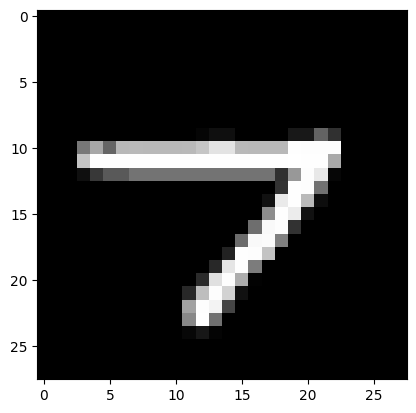

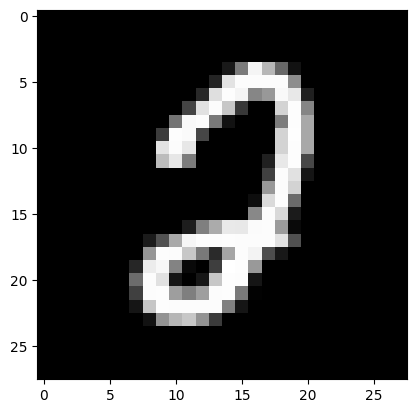

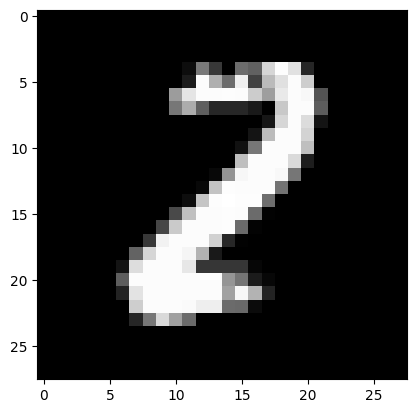

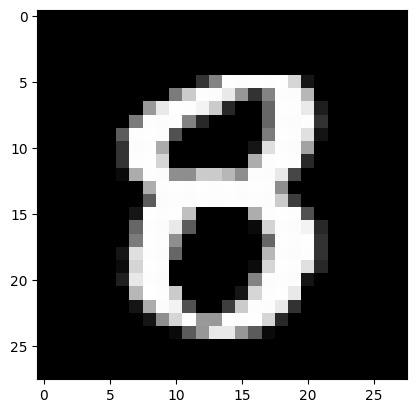

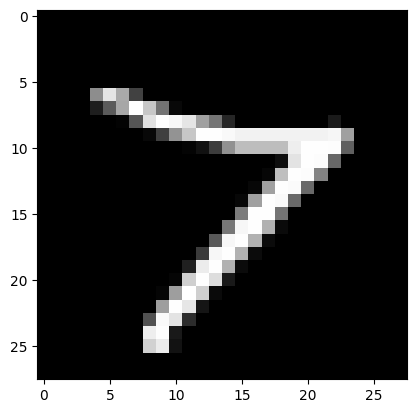

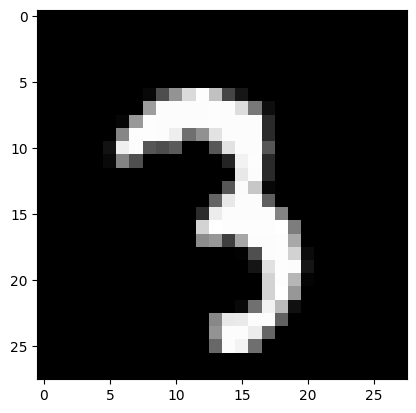

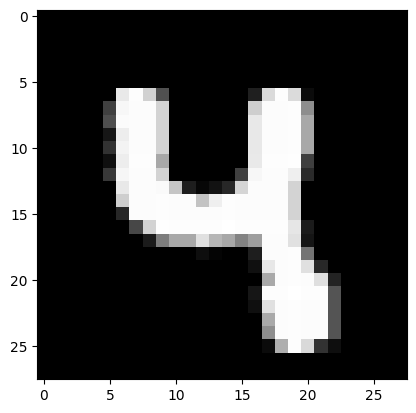

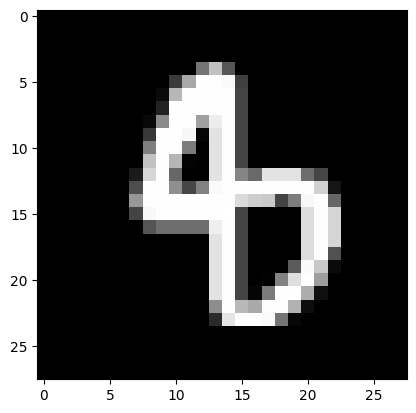

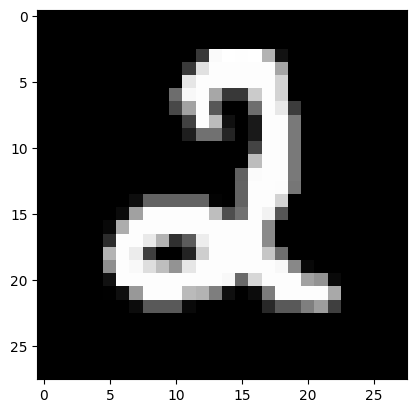

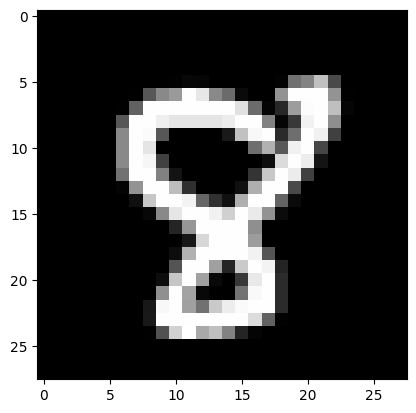

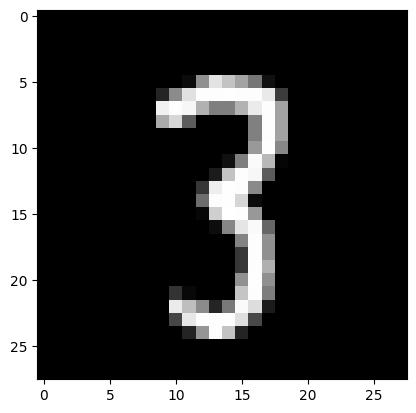

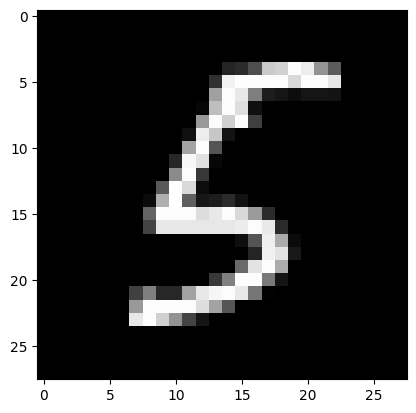

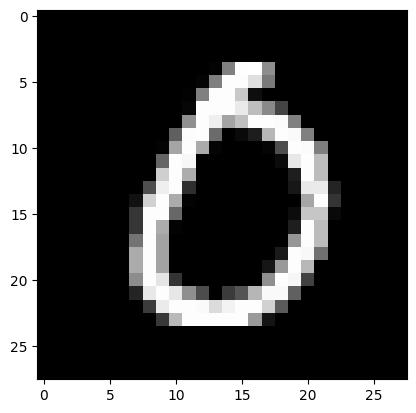

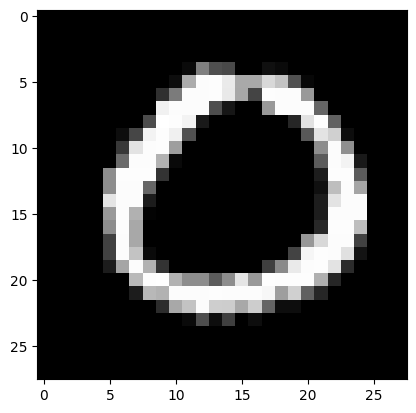

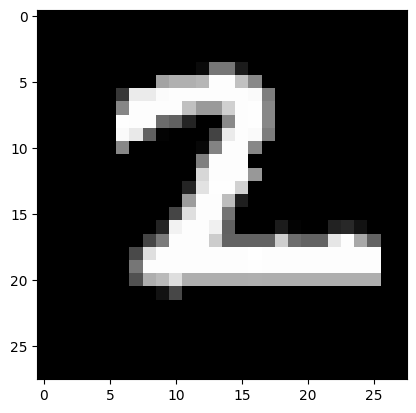

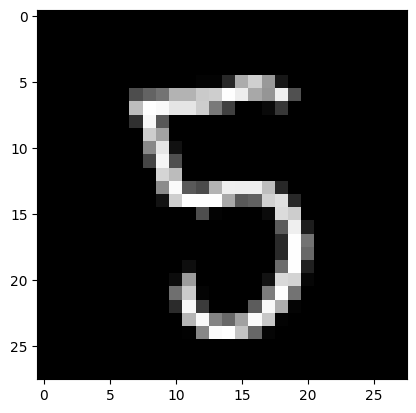

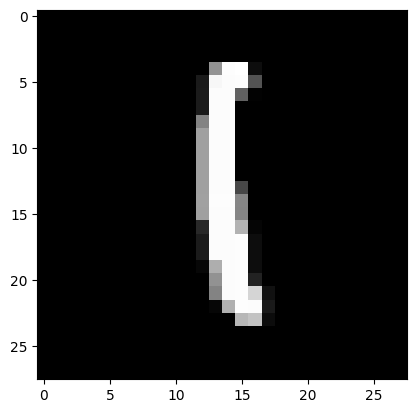

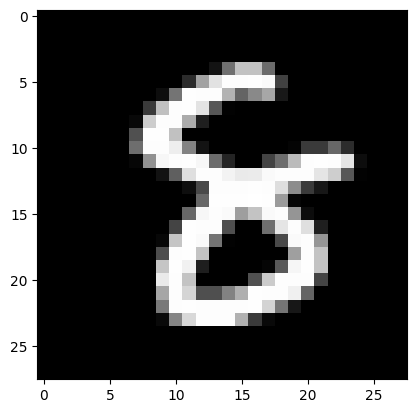

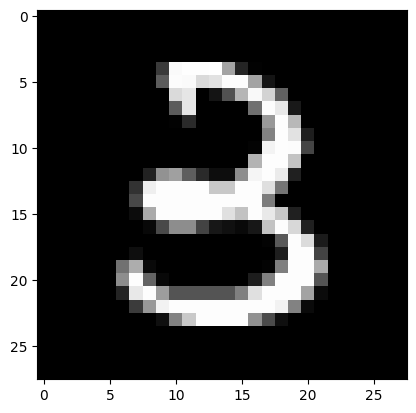

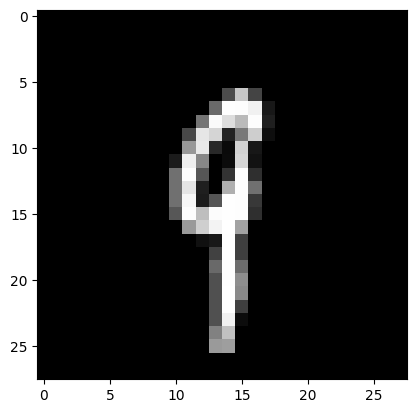

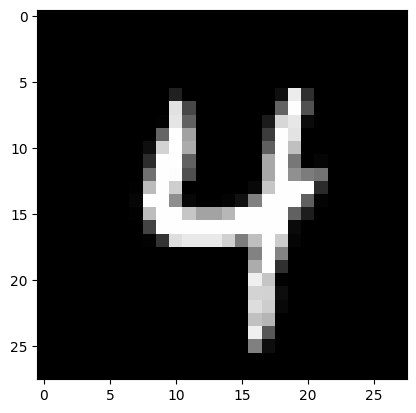

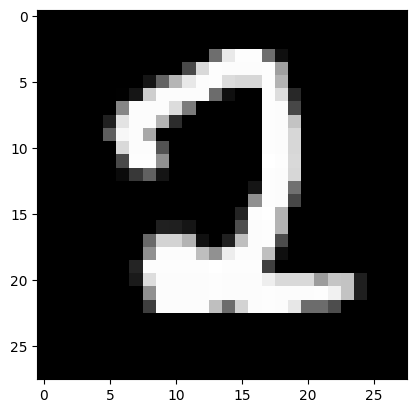

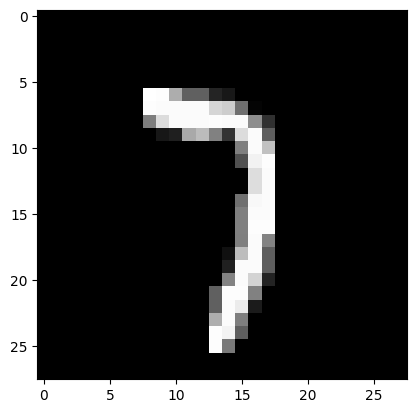

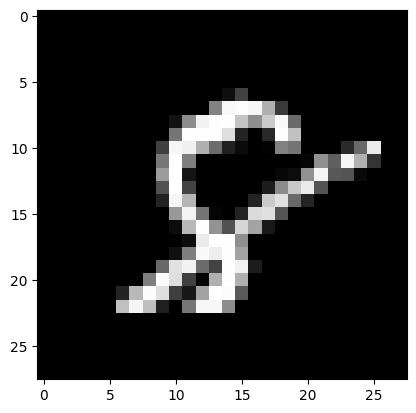

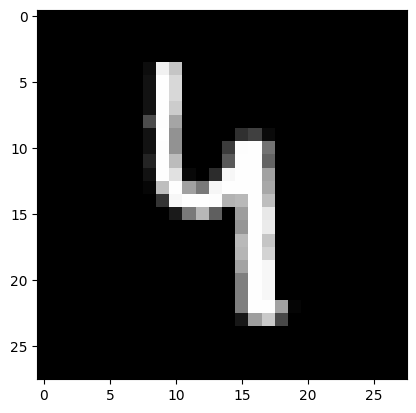

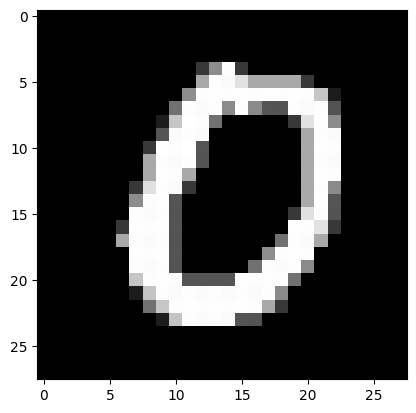

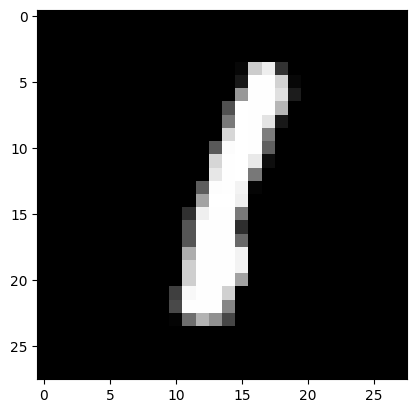

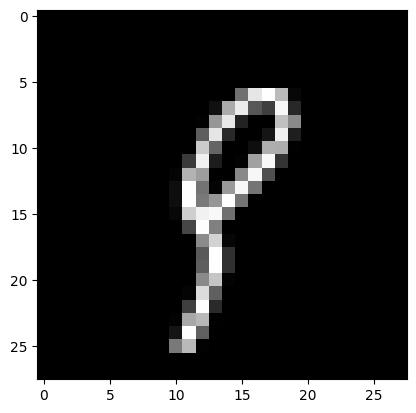

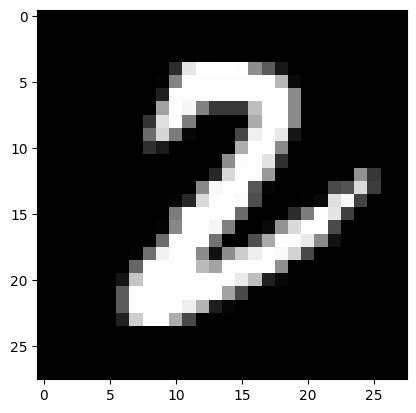

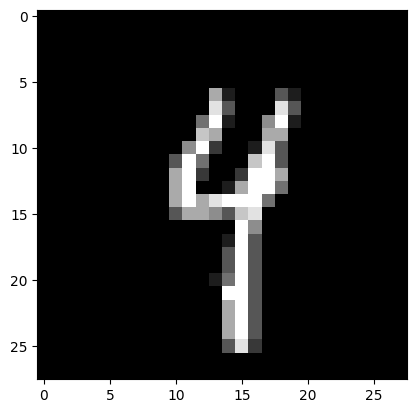

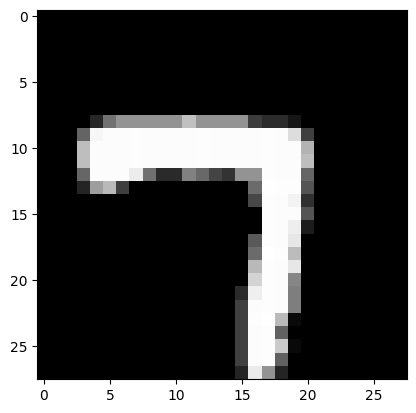

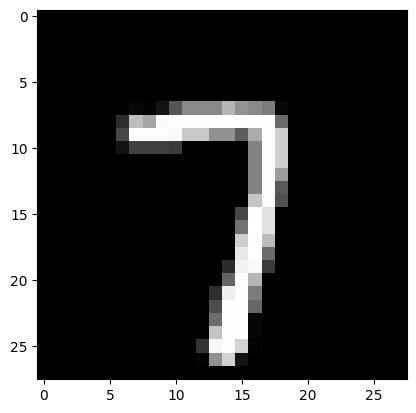

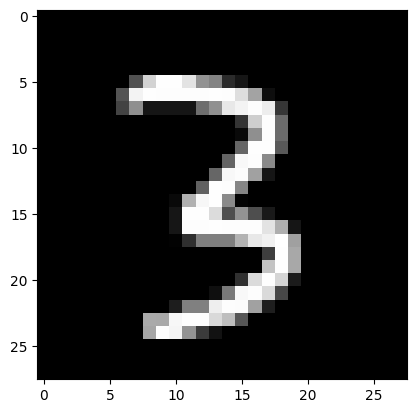

In [ ]:
#Training the Model
for epoch in range(num_epochs):
    tot_loss = 0
    for i, (images, labels) in enumerate(train_loader):
        images = (images.view(-1, 28 * 28))
        labels = (labels)
        if cuda_available:
            images,labels = images.cuda(),labels.cuda()

        # Forward + Backward + Optimize
        optimizer.zero_grad()
        outputs = model(images)
        l1_lambda = 0.001
        l1_norm = sum(p.abs().sum() for p in model.parameters())


        loss = criterion(outputs, labels)+ l1_lambda*l1_norm
        loss.backward()
        optimizer.step()

        tot_loss += loss.item()

        print('tot loss: ', tot_loss )

    if epoch % 1 == 0:
        tot_loss /= len(train_loader)
        print('Epoch: [% d/% d], Step: [% d/% d], Loss: %.4f'
                % (epoch + 1, num_epochs, i + 1,
                    len(train_loader), tot_loss))

    # Test the Model
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = (images.view(-1, 28 * 28))
        if cuda_available: images = images.cuda();labels = labels.cuda()
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        # pick a sample to plot
        #sample = 1
        #image = images[sample]
        # plot the sample
        fig = plt.figure
        plt.imshow(images[0].cpu().reshape(28,28), cmap="gray")
        plt.show()

    print('Accuracy of the model on test: %.2f %%' % (100 * correct/ total))

<!-- 1. Apply both GD and SGD to train the model. Report the observed difference  and give a breif explanation.  -->
## Model Training and Regularization
1. Find the set of hyperparameters (batch size, lr, and epochs) resulting in the minimal test error. Does the same set of hyperparameters produce the minimal training error?
or Find a set of hyperparameters (batch size, lr, and epochs) that allows you to train the model to have test error of above 90%. What is the training error for this solution?"
2. Implement and apply L1 and L2 regularization on weights. Retrain the network with regularization. Do you observe an improvement of testing performance? Can you explain why?

## Interpretation of Learned Parameters and L1 Regularization

Note that in Logistic Regression, the trained model coefficients (model.linear.weight) are the same dimension as the data (784 for each of the 10 classes). Therefore, we can pretend that the coefficients of the solution are an image of the same dimension, and plot it (should have 10 plots).

3. First, do not use regularization, use batch_size = 512, learning_rate=1 to train the model for 10 epochs. You will get a reasonably good model with >90% accuracy. Visualize the learned parameters for 10 classes. Can you interpret these plots?

4. Apply L1 regularization, tune the regularization coeficient as large as possible while still maintaining above or near 85% accuracy. Plot again the learned parameters for 10 classes. Compare them to plots in 3, what do you find? Report the degree of sparsity which we will define as the fraction of the coefficients that have magnitude < (1/10) max pixel value.